# 8. The Logarithm and Exponential Functions

We return to the power rule for differentiation

$$
  (x^p)' = px^{p-1}
$$

and note that although this holds for every integer $p$, the power $x^{-1}$ **never** appears on the right hand side. As a result we are missing the anti-derivative of $x^{-1}$.

It turns out that patching this hole creates the most powerful pair of functions in the universe. As we have discovered that anti-differentiation is akin to integration we explore the function

$$
  L(x) \equiv \int_1^x\frac{1}{t}\,dt
$$

as a candidate for the anti-derivative of $x^{-1}$. Let us first illustrate and evaluate this function in python.

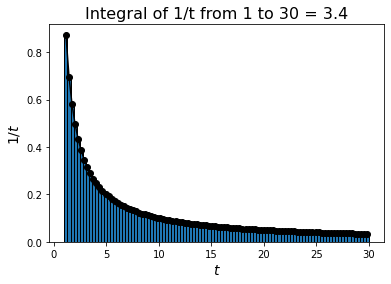

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = 30           # where to evaluate L - please explore!
N = 100         # number of subintervals
dt = (x-1)/N    # width of each subinterval
T = np.arange(1+dt/2,x,dt)   # centers of each subinterval

plt.bar(T, 1/T, width=dt, edgecolor = 'k')  # display the rectangles
plt.plot(T, 1/T, 'ko-')   # place a black dot at each point

plt.xlabel('$t$', fontsize=14)
plt.ylabel('$1/t$', fontsize=14)

L = 0

for t in T:              # careful, T is the array of t points
    L = L + (1/t)*dt     # add up (height times width)

plt.title('Integral of 1/t from 1 to ' + str(round(x,2)) + ' = ' + str(round(L,2)), fontsize=16);

Now that we can "see" the area under the curve, lets build it into a function and take it's (python) derivative at x, and compare it to our target, 1/x.

In [2]:
def L(x):
    N = 10000                      # number of subintervals
    dt = (x-1)/N                 # width of each subinterval
    T = np.arange(1+dt/2,x,dt)   # centers of each subinterval
    sum = 0
    for t in T:                  # careful, T is the array of t points
        sum = sum + (1/t)*dt     # add up (height times width)
    return sum
        
h = 0.00001   # experiment with this!
x = 30   # experiment with this!
dLx = (L(x+h)-L(x))/h   # rise over run

print("L'(x) = ", dLx)
print('1/x = ', 1/x)

L'(x) =  0.03333329430255105
1/x =  0.03333333333333333


This looks good! It is a python "proof" that $x^{-1}$ is the derivative of $L$, i.e.,

$$
  L'(x) = x^{-1}
$$

To obtain a mathematical proof, we revert to the definition of the derivative as a limit of rise over run. In particular

$$
  L'(x) = \lim_{h\to 0} \frac{L(x+h)-L(x)}{h} = \lim_{h\to 0}\frac{1}{h}\left(\int_1^{x+h}\frac{1}{t}\,dt-\int_1^x\frac{1}{t}\,dt\right) = \lim_{h\to 0}\frac{1}{h}\int_x^{x+h}\frac{1}{t}\,dt
$$

If we now approximate that final integral as the area of a thin rectangle, we find a width of $h$ and a height of $1/x$. Their product is now $h/x$. This $h$ cancels the leading $1/h$ and we are left with

$$
   L'(x) = x^{-1}
$$

as suspected.

Let's now see what $L$ looks like at many x values, and contrast it with the built-in log(x) in python.

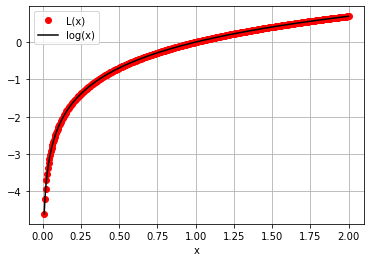

In [3]:
# contrast our novel L function with the built-in log function
x = np.linspace(0.01,2,410)   # explore
y = np.zeros(410,)
for n in range(410):
    y[n] = L(x[n])
    
plt.plot(x,y,'ro')
plt.plot(x, np.log(x), 'k')
plt.grid('on')
plt.xlabel('x')
plt.legend(['L(x)','log(x)']);

Wow, it looks like we have built the log(x) function from scratch, namely, as the area under 1/t for t between 1 and x. There is therefore no need for our tentative L label, instead

$$
  \boxed{\log(x) \equiv \int_1^x \frac{1}{t}\,dt} \hskip 0.25in\hbox{and}\hskip 0.25in \boxed{\log'(x) = x^{-1}}
$$

Our next step is to demonstrate the amazing property

$$
  \boxed{\log(xy) = \log(x) + \log(y)}
$$

Let's derive this at the concrete places $x=3$ and $y=5$ (using the center dot to denote multiplication)

$$
  \log(3\cdot 5) = \int_1^{3\cdot 5} \frac{1}{t}\,dt = \int_1^3 \frac{1}{t}\,dt + \int_3^{3\cdot 5} \frac{1}{t}\,dt
    = \log(3) + \int_3^{3\cdot 5} \frac{1}{t}\,dt
$$

and so we must show that

$$
  \int_3^{3\cdot 5} \frac{1}{t}\,dt = \log(5)
$$

To see this we simply rescale our interval by choosing $t=3u$. In this case, as $t$ moves from $3$ to $3\cdot 5$ we see that $u$ moves from 1 to 5. In addition, as $t$ changes by $dt$, $u$ changes by $du=dt/3$. On placing these observations into our integral above we find

$$
  \int_3^{3\cdot 5} \frac{1}{t}\,dt = \int_1^5 \frac{1}{3u}\,3du = \int_1^5 \frac{1}{u}\,du = \log(5)
$$

as hoped for. Do you agree that this confirmation did not depend on our particular choices of 3 and 5?

Our next job is to explore the **inverse** of the $y=\log(x)$ function. This is specially easy to illustrate, for it simply means reversing the order of $x$ and $y$. We do this below, and then find that the inverse of log is none other than the
exponential function, exp.

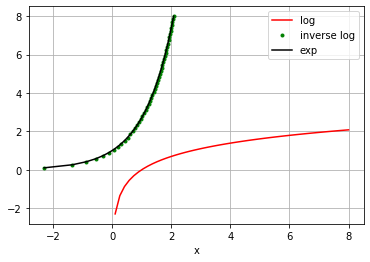

In [18]:
# contrast the inverse of log with the built-in exp functiion
x = np.linspace(0.1,8,51)
y = np.log(x)
plt.plot(x,y,'r')      # plot y = log(x)
plt.plot(y,x,'g.')     # swap x and y
plt.plot(y,np.exp(y),'k')  # plot the true exponential
plt.legend(['log','inverse log','exp'])
plt.grid('on')
plt.xlabel('x');

To say that $\exp$ is the inverse of $\log$ is to say that

$$
  \boxed{\log(\exp(x)) = x}  \hskip 0.25in\hbox{and}\hskip 0.25in \boxed{\exp(\log(x))=x} \tag{Id}
$$

These seemingly obvious statements bear great fruit. For example, using these and the product rule for $\log$,

$$
  \log(\exp(x)\exp(y)) = \log(\exp(x)) + \log(\exp(y)) = x + y = \log(\exp(x+y))
$$

and so

$$
  \boxed{\exp(x+y) = \exp(x)\exp(y)}
$$

Next, using the derivative of $\log$ and the chain rule we differentiate the left identity in (Id) and find

$$
  \frac{1}{\exp(x)}(\exp(x))' = 1
$$

and so

$$
  \boxed{\boxed{(\exp(x))' = \exp(x)}}
$$

that is, **the exponential is its own derivative!**

We claimed above that $\log$ and $\exp$ are the two most powerful functions in the universe. To begin to justify this claim we use them to build all powers. Next week we will use them to build sine and cosine.

Regarding powers, you know that $10^2=10\cdot 10=100$, but what about $10^{1/2}=\sqrt{10}$? We have symbols and calculator buttons - but what is really happening?

What if I told you that

$$
  10^{1/2} = \exp((1/2)\log(10))?
$$

in order to confirm this you should multiply it by itself and see if you get back to 10. Well, using our gorgeous properties of $\exp$ and $\log$ we find that

$$
  \exp((1/2)\log(10))\exp((1/2)\log(10)) = \exp((1/2)\log(10) + (1/2)\log(10)) = \exp(\log(10)) = 10
$$

There is nothing special here about 10 and 1/2. In fact, for any $b$ and any $a>0$, we define

$$
  \boxed{a^b \equiv \exp(b\log(a))}
$$

This is what happens when you take powers on your calculator, or in python, or on any computing device in the universe.

We have a power rule to differentiate $x^p$ with respect to $x$. What if we now ask about the function

$$
  p^x = \exp(x\log(p)).
$$

Do you see that the chain rule delivers

$$
  (p^x)' = \log(p)\exp(x\log(p)) = \log(p) p^x
$$

and that subsequent derivatives then follow. For example

$$
  (p^x)'' = (\log(p)p^x)' = (\log(p))^2p^x.
$$

## Homework 8

1. Develop $\log$ in a Taylor series at $x=1$,

$$
  \log(1+h) \approx \log(1) + \log'(1)h + \log''(1)h^2/2! + \log'''(1)h^3/3! + \log''''(1)h^4/4!
$$

by explicitly computing, showing all of your work, each of these numbers, $\log(1)$,  $\log'(1)$, $\log''(1)$, $\log'''(1)$, and $\log''''(1)$. Here is the how you should start

$$
  \log(1) = 0, \hskip 0.25in \hbox{because integral from 1 to 1 is 0} \\
  \log'(x) = 1/x, \hskip 0.25in \hbox{so, by substitution} \hskip 0.25in \log'(1) = 1 \\
  \log''(x) = ??? \hskip 0.25in \hbox{so, by substitution} \hskip 0.25in \log''(1) = ???
$$

Plot the true function in black and the approximating Taylor polynomials in dashed colors (using our old Taylor cell) and achieve the plot below for $\log(1+h)$ but with a useful legend that identifies each curve.


2. Develop $\exp$ in a Taylor series at $x=0$,

$$
  \exp(h) \approx \exp(0) + \exp'(0)h + \exp''(0)h^2/2! + \exp'''(0)h^3/3! + \exp''''(0)h^4/4!
$$

by explicitly computing, showing all of your work, each of these numbers, $\exp(0)$,  $\exp'(0)$, $\exp''(0)$, $\exp'''(0)$, and $\exp''''(0)$. Plot the true function in black and the approximating Taylor polynomials in dashed colors (using our old Taylor cell) and achieve the plot below for $\exp(h)$ but with a useful legend that identifies each curve.

3. Develop $2^x$ in a Taylor series at $x=0$,

$$
  2^h \approx 2^0 + (2^x)'(0)h + (2^x)''(0)h^2/2! + (2^x)'''(0)h^3/3! + (2^x)''''(0)h^4/4!
$$

by explicitly computing, showing all of your work, each of these numbers, $2^0$,  $(2^x)'(0)$, $(2^x)''(0)$, $(2^x)'''(0)$, and $(2^x)''''(0)$. Plot the true function in black and the approximating Taylor polynomials in dashed colors (using our old Taylor cell) and achieve the plot below for $2^h$ but with a useful legend that identifies each curve.

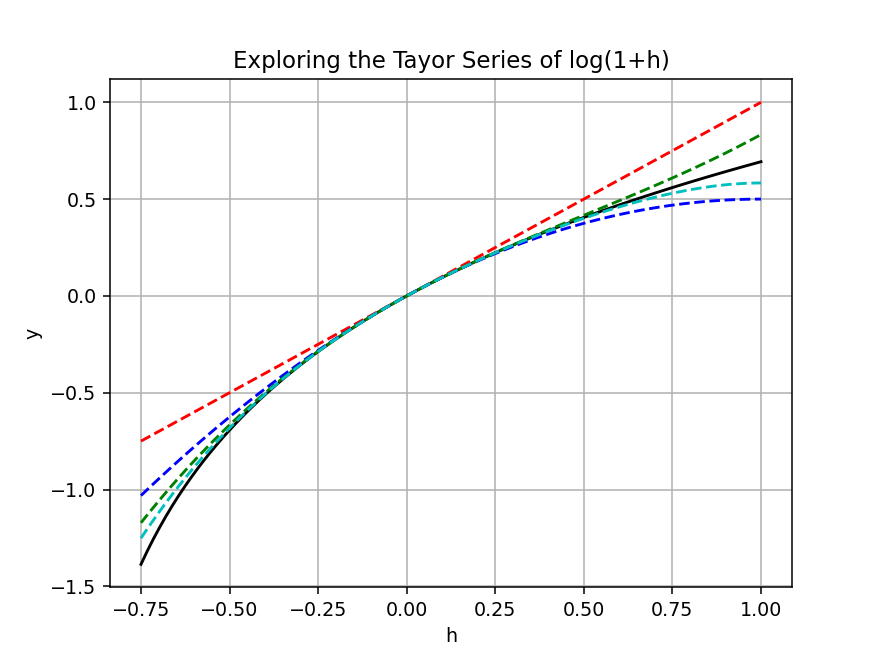

In [12]:
from IPython import display 
from base64 import b64decode

base64_data = "iVBORw0KGgoAAAANSUhEUgAAA3AAAAKUCAYAAABFSNr3AAAgAElEQVR4XuydB5QUxfrF77KEXXKUKGBCBQOYQAREQZ75mbM+nzk8FcWcc1YMz+z7m7OiYkYMCKgIShAwIiIiQZEcFlj2f24PvTszzO70VE9NTS+3ztkDupX691UXdfur+qqgrKysDEoiIAIiIAIiIAIiIAIiIAIiIAJ5T6BAAi7vbaQOioAIiIAIiIAIiIAIiIAIiIBHQAJOA0EEREAEREAEREAEREAEREAEIkJAAi4ihlI3RUAEREAEREAEREAEREAEREACTmNABERABERABERABERABERABCJCQAIuIoZSN0VABERABERABERABERABERAAk5jQAREQAREQAREQAREQAREQAQiQkACLiKGUjdFQAREQAREQAREQAREQAREQAJOY0AEREAEREAEREAEREAEREAEIkJAAi4ihlI3RUAEREAEREAEREAEREAEREACTmNABERABERABERABERABERABCJCQAIuIoZSN0VABERABERABERABERABERAAk5jQAREQAREQAREQAREQAREQAQiQkACLiKGUjdFQAREQAREQAREQAREQAREQAJOY0AEREAEREAEREAEREAEREAEIkJAAi4ihlI3RUAEREAEREAEREAEREAEREACTmNABERABERABERABERABERABCJCQAIuIoZSN0VABERABERABERABERABERAAk5jQAREQAREQAREQAREQAREQAQiQkACLiKGUjdFQAREQAREQAREQAREQAREQAJOY0AEREAEREAEREAEREAEREAEIkJAAi4ihlI3RUAEREAEREAEREAEREAEREACTmNABERABERABERABERABERABCJCQAIuIoZSN0VABERABERABERABERABERAAk5jQAREQAREQAREQAREQAREQAQiQkACLiKGUjdFQAREQAREQAREQAREQAREQAJOY0AEREAEREAEREAEREAEREAEIkJAAi4ihlI3RUAEREAEREAEREAEREAEREACTmNABERABERABERABERABERABCJCQAIuIoZSN0VABERABERABERABERABERAAk5jQAREQAREQAREQAREQAREQAQiQkACLiKGUjdFQAREQAREQAREQAREQAREQAJOY0AEREAEREAEREAEREAEREAEIkJAAi4ihlI3RUAEREAEREAEREAEREAEREACTmNABERABERABERABERABERABCJCQAIuIoZSN0VABERABERABERABERABERAAk5jQAREQAREQAREQAREQAREQAQiQkACLiKGUjdFQAREQAREQAREQAREQAREQAJOY0AEREAEREAEREAEREAEREAEIkJAAi4ihlI3RUAEREAEREAEREAEREAEREACTmNABERABERABERABERABERABCJCQAIuIoZSN0VABERABERABERABERABERAAk5jQAREQAREQAREQAREQAREQAQiQkACLiKGUjdFQAREQAREQAREQAREQAREQAJOY0AEREAEREAEREAEREAEREAEIkJAAi4ihlI3RUAEREAEREAEREAEREAEREACTmNABERABERABERABERABERABCJCQAIuIoZSN0VABERABERABERABERABERAAk5jQAREQAREQAREQAREQAREQAQiQkACLiKGUjdFQAREQAREQAREQAREQAREQAJOY0AERCCrBH799Vdssskm6NChA/j3XKUnn3wS//73v/Gvf/0L/HvUU9++fTFixAg88cQTOPHEE6P+OOp/Dgl07NgRM2bMwPTp08G/V6f0v//9Dw888AC+//57rFixwnu0srKytI9YUFAQOG/ayrKU4dVXX8Xhhx+O6667DldffXWWas1eNddee63Xt0zn1OXLl3v/BjRu3BiTJ09GrVq1stcp1SQCIuARkIDTQBCBiBDwF/Tpurv99ttjwoQJ6bJZ+70EXHq0FJjkdNBBB6Fr164pC+SLgPPFQPqnSszxySefgM9Q3RNF0n333Yfhw4d7gmnNmjVo3rw5Wrduje7du2P33Xf37JzLRWx1FXAUb6eccoo3pLbaais0a9bM+/uoUaPSDrN8E3CrV69G586d8ffff3vjpmHDhgnPMG7cOO+5+OfYsWPx008/eUL1/vvvx3/+85+0z5uNDKYCjm3ffffdGDRokPdunHPOOdnojuoQARGIIyABp+EgAhEh4C/oN954Y7Rv377SXm+xxRae18ZVciXgXn/9dVx22WU4+OCDccstt7h6/EDtBhFnQfIEaixkJnoIZs+evV4tXFiWlJSA422jjTZa7/dcaHbr1i1k6/ld/I033sCxxx4LehwKCwvBd5MsFi5ciGnTpqG0tNR7gJkzZ6Jdu3Y5e5h+/fph1qxZ+Oijj9C2bductWu7oR133BHffPMN7rzzTk8cZJLyTcDx/Tj33HNx/fXX46qrrlrvUfhhZ+LEiSnfqygIOHpH/X+nKFDr16+fibmUVwREIA0BCTgNERGICAF/QX/NNdeAX0bzNbkScPnKI1W/goizIHlcPrPv5dlQt3hSlNELRPF2zDHH4Pbbb08QS8uWLcMHH3yAxx9/3Ptp06aNS3NVi7br1q3rbZucMmWK573KJOWTgKMnbcstt/REPre6phL3hxxyCGrXro2ddtrJ++HHqS+//NLYA+fPy/QIf/rpp4HQhfHAsQEKVArVhx9+GKeffnqgNpVJBEQgGAEJuGCclEsEnBOQgHNugqx1IIg4C5Inax0yqGhDF3AUbJdccgk233xz7zwWPXBKdgn4IszkbF8+CThut91rr72w5557el7SIMmfD0y3ULoQcF999ZW3jZieeHpOlURABLJHQAIueyxVkwhYJWAi4PiPNrfiLFq0CM888wyOO+649fp4wAEH4O2338Y+++yDd955B/5CJ15A8O88ZP/hhx9iwYIFXmCE448/HhdeeCHq1KmTUGc6D9zixYsxePBgDBkyxPsCzcRFML84n3/++WjQoMF6ffTFAs9VNWnSBDfddBM+++wz/Pnnn7jrrrswcOBAL3BJqiAmfn9YKb98f/zxx94WS54r4TmU7bbbDpdffjnIIVXiNjgGTaAXhedQ2L8+ffp4XtC//voLe+yxh3fOKchXbeZh/spSfLCAeP777ruv197QoUO9Z+a2uKOOOsqzSVFRUcrqli5d6n39Jucff/wRq1at8gLL8DzWxRdfjKZNm4Yar5UJOHpI3nzzTbz11lsYP368t5WPnLmdis/Btlu1apXQ9gUXXOCNiZNPPtnjnCrxbBk9FXPnzvWCu9AGfuJWzgcffBAvvPCCJ6bYHp+VNmV7LVq0WK/K5PHNYA0c33PmzPHOGN1zzz1V8qFH4dFHH8Vhhx2GV155xYglAzzwrBDHNbep0pZ8X0877TTPq5ec/DHO8UYRwD7yvf7555+9M3bcusmU7gzc559/7p1N4hkrjieO6V122cXzmOy9997rtbt27VrPLk8//bTn/aJ3kefP6FXs3bu3513ZeuutM2JAG7L/X3zxhXcOjOOxZ8+e3hzAOuOTPyelaiCoB7gqAWcyftgX8ua44TvGcdmyZUv885//9N5V8uXvUu2YOOmkk7xt7nz+8847LxA31wLuscce8+ZajoFffvnFO7P3j3/8AzfffLO3dbiyxLOgfKemTp2a8RgJBEaZRGADJSABt4EaXo8dPQImAo5PyUUtF4P8B5cL6k033bT84f1zGDy3M2nSJG8B4ie/vSuvvNJbHC9ZsgTbbLMNKAwoZJiY57333ksQEVUJuN9++w39+/f3yteoUcPbBsWFFReFXCRyWxEXpslbivwFKRdEXDDQ28EFI4UpF9tcBAURcFyEnnrqqd7ikwt8LkQoSNmHl156yYsIF5/YJ/4/LtD8hTEDVHz33XeeGKSAuvTSSwMLOPLngf5vv/0WFLLJ58cocCgmfbZc5PKMzCOPPIJ58+ahS5cuXjl6INj+/vvv7wml5MQFPRfiFMg1a9b0npVCm9wpbsiToiFMhMLKBBxFARfgtBHHE8UaRR3HBf/kop95GKXOT+TJscBzMlzs1atXb71n4nkznm8kMwpSP3ERzYUkv/YzcQxxqx3FEZ+V7Q8bNgzbbrttQp3++Kb9uMWLWyHJl4t51kdhVVW66KKLvLNYm222mbc45Xa3TBIXxGeddZYX9IQCiu8lbeyfN2Tk0eSzrP4Yp3hlGX5wIUeOZwoIvl/+OK0sCiUFBccUEz+G0I6///67J+SYKD6YJz7xw89zzz3n/S++m2TK94bifOXKlZ745keUoIkfUPxxTnHtR6zlBxEmejfJ10+9evXy/jp69GjvT24p9D8cXXHFFd7Hp3SpMgFnOn5oK45zjkV/LuOfHHe0yX777eeJuFQCjrbmO0whveuuu6bruvd7lwKO/35wfNFb2KlTJ2+s//DDD977RfHGoFmVfRDiByN+0OG/IWeeeWagZ1UmERCB9AQk4NIzUg4RyAsCpgKOnadnh19Oe/TogZEjR3qLei40dt55Z28BxoUgxUN88tvjl31ug3n55Ze9yHpMXIDzSzO/nHMhRo+Yn6oScFyIcRHGSJmvvfaat/hlorDg4pxCLpU3yxcLFAV8Fi6M/EU+RUFxcXEgAcd8/IpMjwEXW/Su0fvD+rgQYd/5//1EzxsFItvi8/uMKGYZDY+BU7iICeqB8+sNsj0ynj8Fxf/93/+Ve5Io7LhApCeE4oTbsfxEe+6www6eyKSXlCLDDzLCRTq//tPjuttuuwWK3lfZ4K9MwFE48KwOF9XxkfUo/NkXinCKSwr/+OSPDT4nPanJ6cADD/TEKhf/FF1+8sUF7UeRx2dnohA88sgjPU8tF538QBHvLfb5ckyxPxRHFOdM/piq6sWnAOYWOCbWRc8R/0yOJpiqDpblhwyOR449ijV/3PF3XDCz/xR5ftRF1uMLOPaZ4osfFnxvVXyfK/PAPfXUU15bFNYUrVxc+4leRI4N2il+THFxzi1wfC7yj/d8cuy///773u/4DgRJ9HIOGDDA+2hyxx13eNz8d5Hjg7bl7/ghx+fr12tjC6Xp+OGHHV4DwA8GFCj8k4kfTcjVFzjJAo6ilyKYNiTryjzoySxdCjj+G8AxxTnb/xDCjwV8bzjPJP8bEN93fnCjyD766KPx/PPPBxkiyiMCIhCAgARcAEjKIgL5QCDoNQKpvoZzocCtWVxc8B9TetX4FZuCiR4hLiIrWzDwayu/FicHYfBDetMT8Mcff5RHGatMwFF08Bm4WGO7DAARn+iVorCjZyl5i5y/IOV2R56lSHXeKIgH7owzzsBDDz2U0C49Ltzexy/qXKyyD0zsB7+kU5Dce++93vay+MRy9AKSjU0BR/FFgZssDOh1pN3o+aDN/cTno2eHrPnFPF6QMg/HAtlzIUkxzW1rJsn0DByFGj0PHDPxWyl9ccHf8yNDfKKYoUCjTRg8xP+QQPbcfktPKQOGUBjEJ9qUNqR3jfWfcMIJ5b/23yeKGXosTaLk+UEa/EopMOgh5IcRimpuC061JZgfROgxrEysVuZt9Mc426Pg4vbNVCmVgKPYoueH3jZuI061lZdb+iio2HeKOKYXX3zRW3xTlPCDRdjEdrmVuLIFPZ+JQoH52M/4lG0BZzp+OI/SzhyP8XOG31du46U3l+MyWcDxneMY58cC3+sZhKlLAcf+casrPwDGJ44HjnH+28LdBamSP2bpaeR7ryQCIpAdAhJw2eGoWkTAOgH/H/B01whwYZ+8FZCd44KRXhcuKhhmnF/C+TWV/z/VV2C/PZ614jbM5MQzVVz8cgsSv8LTS8RUmYDjl/XbbrvN88y8++67KXmxDi4cGXGNX2795C9I+cWe5+6qWigkXzobfwaOi4xU96757fKL+qGHHupVz21xXIRRLNLTmMqz4m9HsyngaM9U57H8rbHJ2yhpWy58n332WS/EfapEDxcXVvSc+lvZMh3AVQk4Lmw5vmhniiNu++S4Y6IYpbCiBy7+vBVFFj8ScFssvRf0mvmJ44bjh2faeA7QT/QicVsWhTTtlSr5Z9WSBYM/vs8++2z897//zfTxy/PTm0khTVFCkRSfuK2MWzE5Jv1EAcV3mNs8uQ0x1dZLbqvk71kf8/tXAfiLYY5FjsnKAqekEnAUxfSeUfD6W6CTH5ofK1iW8wGFPuv3BQdFMxfgYbbd0mPcqFEjz/M9ZswY79xdcqJQ4EcF7hLg3BK/nTbbAs50/HA7IMcNP4LxLG2qxDmB3t9kAeeLHo5vjvOgyaWAq+xuUW735TvLjx/clZAq8X3lbg3utuBcoCQCIpAdAhJw2eGoWkTAOoEwWyj9zvnbWfjfXKRx8cFzbamS315l9xSxDD0NvA8s3kNVmYDjFkl6Fni2hWdcUiWKM25xZF7/3Bnz+QtSLpa5dTBVCuKB46I01fkqemYYDIJ1+Itt3wtS1cLDX4zZFHAUF1wsJieKNIq1ZE8FzxTxLBEXXZV5lbhQpzCg+OFi1CRVJuC4kKO3Jtl7ktxGKoFJzyE9iIzueOutt5YXoceQi13yjt/2R28RxS0/WHCLa6pEfvQyJ0fC88d3ZXwzZUIB+vXXX3vvA72B3ALo3wPH85VHHHGEVyW3K1N0U6BVdU8e301+JIkXOv4Yr0o4xL8v8dEa/e3A3HpZWQh+Cm/fS8IzT/T+Unhzmyb/P0UVuXG804tEr0pyEKOquPFeM/8DSmXvIv+/77Vkfnrd/ZRtAWc6fuj15pxXVdAd30OeLOD8Dy98rlT3vFXGL6iAi/fSZjqGaf/45F8jUFmgHo4Ninzaxf9Ak9ymv2WWHyE45yiJgAhkh4AEXHY4qhYRsE4gGwLOD+vMzqbaohT/EH57Vd3hw4UoF6Q33nijtzWTqTIBxzM/3NJX1SW8/B0FHvPyH34/xUehZL9SpSACLnmB4tfDc0HcYhcf0Y4Cg2fIqtoe5IcDtyngKouy50e0TG6b51XowQmSkr2VQcok2yS5f4ygyLNbtBk9fPT6cqukv9D3xXKq56KHlGfY6O3hVsl4DxC9vVwAUkT4iefDuJWX5xQZkCdVoleVAi/Z8xTkHGImPJLz8swdPbvc/hnvbWEwkFTRYCtri2fi/DEfH4WyqqinqTxwtAW3TgdN8eKPXlG+4/zIQWHnJ3rT+HGBwXyCCDk/wE1VHhvWzd/TW8f8HD9+yraAMx0/frnk7cvxbMmazJMFHHcYcFzQC+sHnQlik6ACjp7t+DPJft3c8s2PC/TeJgf08fOQd3wKcg9cuusZ+PGCuzgyFaxBmCiPCGzIBCTgNmTr69kjRSCsgOOCiF/8/QiQ/GJa2RkcgslHD1z8YjbZeNkWcPnigctUwNHDwq1n9ODQU2MrpfLAUTiyfXpReKYxlXeXHlRurazsudhnerIYMIMfCOjl4DhN5bk19aDEj++gYehNOPpeL5bllkeyYcALehG5PZeBhDJJYQQcPUYUHORPT7ZpYtAKLvT54Yb10MtIzymfNV2SBw6e140fheiB5ZwcNAUVcJXVZ+seuHQCzt9umvxRLuhzK58IiEBqAhJwGhkiEBECYQWcf/cQAyhwew8j3fFLN70e9E4kpyBn4Pxw4tk6A8czUdx+VtkZuFwKuPgzcDyrlCoYhf+FOlMPnB/IoSrxkM5DVJkHjtvduMCuSpxnY8inEnD+mRie/Zo/f/56zVDgcSsVz8BV9uy8MoHBZihy6AXlGKMgpHBIDnwT5AwT62KdlZ2Bsyng+F74Ie7piaMXkQEw+L5xCzNFHSNRBk1hBBy931xE+yH7g7ZZVT4/wAm9b7RRvHc0VbkgZ+AYwZRbM1kXPX8UOn7KtgfOdPz4ooRbyP3rKyqbP5M9cNwWS88lo8VSVNEeQVJUBRy94xT3vI+RZ1mVREAEskNAAi47HFWLCFgnEEbAMWIdz+BQsDFqGs91+Z4NLkIYqIBb7+KT3x6DLHCh4Uf+8/NQILAO1smFu3/eyjQKJSNTcmsPtzny8H/8Zb4utlDGR6Hk9jwuROITF2I8S8QFeaYCjtcRcKtTVXcjmQo4BtSgQKe3leenku2arYGaSsBxwd24ceOUi2+2648Z/r0y4cQzdBxr5MvzlxTzlV15kC6KIM8CcoHM82m8RoNbYv2Ujm86ThSh/vUMleW96qqrvK2HZEJB60cE5TZRfjipKihPqjrDCDhuoaPNKCSrimCZ7rnjf+8HZOH/88/MpSufLgol5yn2j1cIUHTGp2wLONPx40ehZN/oUUveksi74Tg30DuZ6h44n0H82ch03KIq4Pxz0qmuqkn3zPq9CIhA5QQk4DQ6RCAiBEwFHM8S8fwBt9XFB+mI31KZ7PEiEr89CgBGhePXdj/sOwMa8F4uLkoZHZB3c/mpqnvgfO8QtxAxVLh/qTgXRAxcwm13Vd0Dl0sPHJ/HD4BBccpFpR81kd4GnvXi+SqTe+AYVIN1c7FKrv7CNJWAznQLJe8D23HHHT2PFftL8RnvYeWikpH+OBZ4dolXKJikyoKYMHgKz3/R48sv736EU7LimTtu3aX3oSrPl+8tpheGXjuec+P/S5X8e7z4HNye6AfJoKCg141jpqp74Ew9cNyOSO8LPXx8FyjS/MR369FHH/XeDQrR5LNSDPDi34XG80r8OBDvaeK7yu2JFHkM6uOnMAKOdfhXNXA8M/gLzyPGC3wyY6AYvtf+mVZ6QRk9kJzjxxFFMe9QpHeT7PnepxrHyTaLvweOETp5FQOFLccF/5tbZV3cA5fp+PGvO2AEVI47XivARFHIqIu8SoBzQyoBxyBODNSTSQTUKAo4Rp/ldQkcY/xwkGoXg8ncozIiIAKABJxGgQhEhEDQawT4OP5hdC6K+LWXHi2KBX7xjU881E5xxkU9F5Xxl/H67fEwPj1FFC08t8OFmx/+moKMWx7jt4FVJeB4aJ+RE7kg5KKNZ6To6aL3jX3lQptf3XnRbXxy4YFj++wTA2D4ETF5p1izZs08ccTfUQBR/KbyFlQ1rCiAGcWPz85gBvQS+RdK+5dUp/MQVbaFku3SBjw/Rq5MFMr0FlFYkD1FHhPPQ6baPhvklahMwHHbINvmmOJWMdbPxRvvneMWPn4EoCioSjj5oeTZj2QPb3LfKHYYFMLfysYFNUUjz5dxAc1ti/6VGfFl0/FNx8A/f8d8FBwcG1yssj8c5xSpTLxTjaIoOfopA4LwIwDzcQsit4fyT94NRvtxbCR7HsMKOPaH29h4dQTHL/vEC6g59mgjfuxh4vUTtBGTfzcc/06WHK/kynHE8cQ+U8D414ik48bfx0fD5bj0t3X696Kxj9xyl5yy7YFj/abjhx5Yzn/0tnEu49zI/vGd4/PwHaA3PFUUXwplcuSZSL4XqbaeUuTFR+uld5sfM2iz+GtfKPJZV7rk4gycf1doVdE60/VbvxcBEUhNQAJOI0MEIkLAX3AG6a4fbZHbt7iNi//A0ysS7yXw62G4dooQ5uF2IC4qmOIXuPw762HURZ7b4QKF29G4yEqOPleVgGO9/CrLL+30wP3yyy9eW9zSyS/aXBSn+krrSsCxbxQi9JY9/vjjnuBh/yi+eP6NW8i4UDO55JjPz8Ux7cJtg7RZfFTIdAKjKgHHflMYcMsiPYd+G7xigOKY/afHkwIhiNck1Zir6h44er1uuOEGT1TxuWhfnrkcNGgQTj311PUifqaqn1vQKJSDLP64PZAfGZ5//vlyzwfHKO+N4xhNtdUxHd907xlFMD+M8AMGz21xIc6FORfzFDr0gjL6Hu8VrIwxxz8X+RSYvNqBrHivFnlxmy1tFL84z4aA43NxPNAzSzux3/SQ8GwiP6CQGT1IHCtMFHX88MMPK/QqUbhQSLBf/DhEmyafTUzHjr/n+GVgFX7M4JzCc5P8mMQ5gPfVpUo2BBzbMRk/LMezsRRofJf9LaTkx7HPeZVRdfmOc0tzcjryyCO9qy8q21ron69NxzI+WmhVeV0IOH+rKOcBbqVUEgERyB4BCbjssVRNIlCtCIRd4FYrGJU8jH/tQVXhxDcEDtl+RopmCgouirnAZ1ALJRGIEgH/ihVGs6UgTk7cLs5zqpxn+WGsuiV6BvkRg0F8KFKVREAEsktAAi67PFWbCFQbAhJwVZuSXggGo+BCjF/gDznkkGpje9cP4l+QTi+cvw3UdZ/UvggEJUCvJbcOc5sqPZyVBbuhN5qe/REjRlTqdQzaZr7loyeSgZro7a3s4vh867P6IwJRIiABFyVrqa8ikEMCEnAx2NwKxa/p8Xea8awOgy8wAAmDH3BrJaN1KoUnwLOW3NrJhd9DDz3kBQlREoF8I8Azadz+ShHmB3diH3n2kgFfuB2dW2hfeOGFSrvOc4e8yoCeuFReunx75qD94TlpRljl2dv4yK9ByyufCIhAegIScOkZKYcIbJAEJOBiZqdwoxeI5wcZqIIBHHg2i9v8eB6Ol1LzTJlSOAIUymTJ+/cYBZHBSHjlhYRxOK4qbYcAr6jwzwny2gueLeW49c/1MjgMPWs8D6kkAiIgAtkmIAGXbaKqTwSqCQEJuJghn3vuOS+IA7+o0/PGQBM8n8Xoggx57l+FUE3M7uwxTjzxRC+4CYPocOwNHjw48CXHzjqthjdYArwegl4mRl1lRE4GYuHHBm6dZPAZnott2LDhBstHDy4CImCXgAScXb6qXQREQAREQAREQAREQAREQASyRkACLmsoVZEIiIAIiIAIiIAIiIAIiIAI2CUgAWeXr2oXAREQAREQAREQAREQAREQgawRkIDLGkpVJAIiIAIiIAIiIAIiIAIiIAJ2CUjA2eWr2kVABERABERABERABERABEQgawQk4LKGMncVdenSxYt4tdlmm+WuUbUkAiIgAiIgAiIgAiIgAmkITJs2DU2bNvWu4FGyQ0ACzg5Xq7Xyzplly5Zhu+22s9pOqsoXL17s/W+FR7aHXoztsWXN4muXrxiLr30C9iBweM0AACAASURBVFvQPGGXsfja5et6Hp40aRLq1auH2bNn23/QDbQFCbgIGt6/NHjUqFE57/3IkSO9Nnv37p3ztjeUBsXYrqXF1y5f1i7GdhmLr12+GsPia5+A/RZczhMu16n2yeZHCxJw+WGHjHrh8sVwOSFkBCnCmcXYrvHE1y5fLX7F1z4B+y1onrDLWHzt8nU9D7tcp9onmx8tSMDlhx0y6oXLF0OTbkamMsosxkbYAhcS38CojDOKsTG6QAXFNxCmUJnEOBS+tIXFNy2i0BlcMna5Tg0NLiIVSMBFxFDx3XT5YricECJoKqMui7ERtsCFxDcwKuOMYmyMLlBB8Q2EKVQmMQ6FL21h8U2LKHQGl4xdrlNDg4tIBRJwETGUBFwEDWXYZZeTrmGXI1VMfO2bS4ztMhZfu3xZuxjbZSy+dvm6HsMScPbtKwFnn3HWW3D5YmjSzbo516tQjO0yFl+7fF0vHOw/nfsWNIbt20CM7TIWX7t8Xc/DLtep9snmRwsScPlhh4x64fLF0KSbkamMMouxEbbAhcQ3MCrjjGJsjC5QQfENhClUJjEOhS9tYfFNiyh0BpeMXa5TQ4OLSAUScBExVHw3Xb4YLieECJrKqMtibIQtcCHxDYzKOKMYG6MLVFB8A2EKlUmMQ+FLW1h80yIKncElY5fr1NDgIlKBBFxEDCUBF0FDGXbZ5aRr2OVIFRNf++YSY7uMxdcuX9YuxnYZi69dvq7HsAScfftKwNlnnPUWXL4YmnSzbs71KhRju4zF1y5f1wsH+0/nvgWNYfs2EGO7jMXXLl/X87DLdap9svnRggRcftgho164fDE06WZkKqPMYmyELXAh8Q2MyjijGBujC1RQfANhCpVJjEPhS1tYfNMiCp3BJWOX69TQ4CJSgQRcRAwV302XL4bLCSGCpjLqshgbYQtcSHwDozLOKMbG6AIVFN9AmEJlEuNQ+NIWFt+0iEJncMnY5To1NLiIVCABFxFDScBF0FCGXXY56Rp2OVLFxNe+ucTYLmPxtcuXtYuxXcbia5ev6zEsAWffvhJw9hlnvQWXL4Ym3aybc70KxdguY/G1y9f1wsH+07lvQWPYvg3E2C5j8bXL1/U87HKdap9sfrQgAZcfdsioFy5fDE26GZnKKLMYG2ELXEh8A6MyzijGxugCFRTfQJhCZRLjUPjSFhbftIhCZ3DJ2OU6NTS4iFQgARcRQ8V30+WL4XJCiKCpjLosxkbYAhcS38CojDOKsTG6QAXFNxCmUJnEOBS+tIXFNy2i0BlcMna5Tg0NLiIVSMClMNSzzz7r7X8fN24cJk+ejFWrVuH111/HQQcdlJFZp0yZgiuuuAKfffYZSkpK0KVLFwwaNAhHHnlkRvUkZ3b5YricEEJBi1BhMbZrLPG1y5e1i7FdxuJrl6/GsPjaJ2C/BZfzhMt1qn2y+dGCBFwKO3Ts2BEzZsxAixYtUFRUhJkzZ2Ys4CZMmIDevXtjzZo1OOqoo9C8eXMMGTIEv/zyCwYPHoyBAwcajwCXL4bLCcEYWMQKirFdg4mvXb5a/IqvfQL2W9A8YZex+Nrl63oedrlOtU82P1qQgEthh+HDh6NTp05o3749rr32Wlx33XUZC7hdd90VY8aMwbBhw9C/f3+vlSVLlqB79+6YPn06fvrpJ7Rr185oFLh8MTTpGpkso0JinBGujDOLb8bIMi4gxhkjy6iA+GaEyyizGBthC1xIfAOjMs7okrHLdaoxsIgVlIBLYzATATd16lRvuySF24cffpjQArdnHn/88bj11ltxySWXGA0Xly+GywnBCFYEC4mxXaOJr12+rr/82n869y1oDNu3gRjbZSy+dvm6noddrlPtk82PFiTgLAi4hx9+GGeeeSZuu+02XHzxxQktzJ07F61atcI+++yDd99912gUuHwxNOkamSyjQmKcEa6MM4tvxsgyLiDGGSPLqID4ZoTLKLMYG2ELXEh8A6MyzuiSsct1qjGwiBWUgLMg4C688ELcddddeO2113DIIYes10KDBg3QunVr/Pjjj1W27r8AyZkmTZoEntN74IEHcj7cFi9e7LXZsGHDnLe9oTQoxnYtLb52+bJ2MbbLWHzt8tUYFl/7BOy1ULhsGdo9/zxWrVyJH/71LyfrtbPPPttrd9SoUfYedAOvWQLOgoA77bTT8Nhjj3nbJ/3zb/HNtG3b1gtuQm9cVUkCbsN8O7U4s2t38bXLV4tf8bVPwH4LmifsMhbf7PMtWL0arYYORYcnn0StRYuwtmZNfPrww6jVqVP2G0tTowScfeQScBYE3KmnnorHH38cDIbSr1+/9VoIKuAq65pL17RLl7z91yE/WhBju3YQX7t8WbsY22Usvnb5agyLr30CWWyhrAx49VXg8suBn39OqHjauedis3vvzWJjwapyuU4N1sPo55KAsyDgsrWFUgIu+i+YyRNocWZCLXgZ8Q3OyjSnGJuSC1ZOfINxCpNLjMPQS19WfNMzCpSDWxQvvBAYMyYxe58+GH/MMVjaubN3pVWukwScfeIScBYEnIKY2B+41bkF/cNm17ria5cvaxdju4zF1y5fjWHxtU8gSy1cdBFw550VlXXuDNx2G7Dffhi57vyZBFyWWOdZNRJwFgRckGsEbrnlFlx66aVGw8Hllw0tHIxMllEhMc4IV8aZxTdjZBkXEOOMkWVUQHwzwmWUWYyNsAUuJL6BUVWdccECYLPNgKIi4PrrgRNPBGrW9Mq4ZOxynZolsnlfjQRcSAE3bdo0rF69Gpttthlq1apVXpsu8s77sZ+3HXQ56eYtlCx2THyzCLOSqsTYLmPxtcvX9eLX/tO5b0FjOEMbLFkS87R16wYcdFBi4S+/BLbdFqhXL+H/u2QsAZehfQ2yS8ClgMYAJH7o0wkTJmDixInYY4890L59ey/3KaecAn9wMpz/jBkzMH36dC+0v59YjnlKS0tx1FFHoXnz5nj99ddBwTd48GAMHDjQwFyxIi5fDJcTgjGwiBUUY7sGE1+7fLX4FV/7BOy3oHnCLmPxDch39WrgsceA664D5s0DNt8cmDIFqF07bQUuGbtcp6YFU00ySMClMOSJJ56Ip556qlITP/HEE2AepsoEHH83efJkXHnllRgxYgRKSkrQpUsXDBo0yBN0YZLLF8PlhBCGWZTKirFda4mvXb4ScOJrn4D9FjRP2GUsvmn4MrLk668Dl10GJN8Z/Pbb3hm3dMklY5fr1HRcqsvvJeAiaEmXL4bLCSGCpjLqshgbYQtcSHwDozLOKMbG6AIVFN9AmEJlEuNQ+NIWFt8qEI0eDTA4yRdfJGbq1Qu4/XZg113T8nX9Ic3lOjUQnGqQSQIugkZ0+WJo0rU/YMTYLmPxtcvX9cLB/tO5b0Fj2L4NxNguY/FNwfeHH2IeN3re4tOWW8YiSx54IFBQENgwLhm7XKcGBhTxjBJwETSgyxfD5YQQQVMZdVmMjbAFLiS+gVEZZxRjY3SBCopvIEyhMolxKHxpC4tvEqKVK4F27YD58yt+0bJlLLLkSSeVR5ZMCzYug0vGLtepmTCKcl4JuAhaz+WL4XJCiKCpjLosxkbYAhcS38CojDOKsTG6QAXFNxCmUJnEOBS+tIXFNwWiW24BLr88Fk3y4ouBCy4A6tdPy7KyDC4Zu1ynGgOLWEEJuIgZjN11+WK4nBAiaCqjLouxEbbAhcQ3MCrjjGJsjC5QQfENhClUJjEOhS9t4Q2a75o1wIsvAgxot+7ONg/Y8uWxaJMUbvS+hUwuGbtcp4bEFpniEnCRMVVFR12+GC4nhAiayqjLYmyELXAh8Q2MyjijGBujC1RQfANhCpVJjEPhS1t4g+TLyJJDhwKXXALwvNsjjwCnnZaWlWkGl4xdrlNNeUWtnARc1CwmD1wELZZZl11Oupn1NJq5xde+3cTYLmPxtcuXtYuxXcYbHF9ets3IkqNGVYCll23atPUu4M4WeZeMJeCyZcXK65GAs8846y24fDFcTghZB5mnFYqxXcOIr12+WvyKr30C9lvQPGGX8QbD96efYufaXn01EWinTgDPvB18cEaRJTOxikvGLtepmTCKcl4JuAhaz+WL4XJCiKCpjLosxkbYAhcS38CojDOKsTG6QAXFNxCmUJnEOBS+tIWrPd9584AbbgAefhjgmTc/bbQRcO21wCmnALVqpeUUJoNLxi7XqWGYRamsBFyUrLWury5fDJcTQgRNZdRlMTbCFriQ+AZGZZxRjI3RBSoovoEwhcokxqHwpS1crfmOHAnstx+wZEkFh7p1gQsvjP00aJCWTzYyuGTscp2aDXZRqEMCLgpWSuqjyxfD5YQQQVMZdVmMjbAFLiS+gVEZZxRjY3SBCopvIEyhMolxKHxpC1drvkuXAltsAcyZA9SoEfO20evWunVaLtnM4JKxy3VqNhnmc10ScPlsnUr65vLFcDkhRNBURl0WYyNsgQuJb2BUxhnF2BhdoILiGwhTqExiHApf2sLVhi8jS86eDbRpk/jMjz4KvPNO7Jxb585pedjI4JKxy3WqDZb5WKcEXD5aJU2fXL4YLieECJrKqMtibIQtcCHxDYzKOKMYG6MLVFB8A2EKlUmMQ+FLW7ha8B07NhZZ8uefAQYrKS6ueG4Ku4KCtBxsZnDJ2OU61SbTfKpbAi6frBGwLy5fDJcTQkA8kc8mxnZNKL52+bJ2MbbLWHzt8tUYFt8qCTD0/xVXAC+9VJGNnrZLL7UPLoMWXM4TLtepGSCKdFYJuAiaz+WL4XJCiKCpjLosxkbYAhcS38CojDOKsTG6QAXFNxCmUJnEOBS+tIUjyfevv4AbbwQefBBYvbriGZs3B269FTj55LTPncsMLhm7XKfmkrHLtiTgXNI3bNvli+FyQjDEFbliYmzXZOJrl6+8F+Jrn4D9FjRP2GUcKb7LlwP33hsTaYsXV4DhlslBg2LbKBs2tAvMoHaXjF2uUw1QRbKIBFwEzebyxXA5IUTQVEZdFmMjbIELiW9gVMYZxdgYXaCC4hsIU6hMYhwKX9rCkeH78svABRcAs2ZVPBMjS550UiyyZNu2aZ/VVQaXjF2uU13xznW7EnC5Jp6F9ly+GC4nhCygi0QVYmzXTOJrly9rF2O7jMXXLl+NYfEtJ/Df/wLnnFMBhPe73XYb0KWLfUghW3A5T7hcp4bEFpniEnCRMVVFR12+GC4nhAiayqjLYmyELXAh8Q2MyjijGBujC1RQfANhCpVJjEPhS1s4b/kmR49ctSom1po0AW6/HejbN+2z5UsGl4xdrlPzhb/tfkjA2SZsoX6XL4bLCcECyrysUoztmkV87fKV90J87ROw34LmCbuM847v9OnAlVcCO+0EnH9+4sP//nvsnjdunYxQcsnY5To1QiYK1VUJuFD43BR2+WK4nBDc0M59q2Jsl7n42uUrASe+9gnYb0HzhF3GecN3/nzg5psBbpWkt42eNl4TwD8jnlwydrlOjbjZAndfAi4wqvzJ6PLFcDkh5I8F7PZEjMXXLgH7tWsM22Usvnb56iPEBsB3xQrg/vtj4m3RoooHLioChgwB9tnHPgTLLbicJ1yuUy1jzZvqJeDyxhTBO+LyxXA5IQQnFO2cYmzXfuJrl68Wv+Jrn4D9FjRP2GXsjG9pKfDcc7HtkjNnVjxkQQHwr38BN9wAtGtn9+FzVLszxgBcrlNzhNd5MxJwzk2QeQdcvhguJ4TMSUWzhBjbtZv42uUrASe+9gnYb0HzhF3GTvgOGwZcfDEwcWLiw+29dyyy5Hbb2X3oHNfuhPG6Z3S5Ts0xZmfNScA5Q2/esMsXw+WEYE4sWiXF2K69xNcuXwk48bVPwH4LmifsMs45X55v23JL4NdfKx6sW7dYZMn+/e0+bA5rnzR3Ej6e/jEG9hjo9DoXl+vUHOJ22pQEnFP8Zo27fDFyPumaIYp0KTG2az7xtctXAk587ROw34LmCbuMnfB9/nng2GOBDh1iZ9+OOipykSUrs8pvi37D1Z9cjacnPu1lGX/6eCz+abH39969e9s1ZoraXa5Tc/6wjhqUgHMEPkyzLl8MJ5NuGFgRLCvGdo0mvnb5SsCJr30C9lvQPGGXsVW+CxYAd90FXHQR0KhRxYOsXQs89RRwzDFAnTp2HzBHtf+94m/cMvIW3P/V/SgpLSlv9bDOh+HcVudKwOXIDi6akYBzQT1kmxJwIQHmeXGr/7Dl+bPnonvia5+yGNtlLL52+eojRET5rlwJPPAAcNNNAEXc5ZfH/l4N07JVy3DfmPtw2+jbsKikIopm7cLaOGeXc3BZr8sw9eupEnDV0Pb+I0nARdC4EnARNFoGXdbiLANYBlnF1wBahkXEOENgGWYX3wyBGWQXYwNoGRTJKl961l54AbjiCmDGjIpe1KsH8BLuxo0z6Fl+Z11duhqPf/M4rv/sesxZOqe8swUowHHbHYcb9rgBHRp38P5/VhlniMXlOjXDrkY2uwRcBE3n8sVwOSFE0FRGXRZjI2yBC4lvYFTGGcXYGF2gguIbCFOoTGIcCl/awlnj+9FHsa2S48cntjlgQCyyZNeuafsSpQynDj0Vj49/PKHL+26xL27e82Zs32r7hP+fNcYGgFyuUw26G8kiEnARNJvLF8PlhBBBUxl1WYyNsAUuJL6BURlnFGNjdIEKim8gTKEyiXEofGkLh+Y7aRJwySXA++8ntrX99rHIkhRw1TBNnDMR3R7phjKUoefGPXFLv1vQp0OflE8amnEIfi7XqSG6HamiEnCRMlessy5fDJcTQgRNZdRlMTbCFriQ+AZGZZxRjI3RBSoovoEwhcokxqHwpS0ciu/IkcDuuwNlZRXtbLwxcOONwHHHVZvIkiN+HYEW9Vqgc4vOCTwZbXKnNjvhgE4HoIAXkFeSQjFOa8GqM7hcp4bsemSKS8BFxlQVHXX5YricECJoKqMui7ERtsCFxDcwKuOMYmyMLlBB8Q2EKVQmMQ6FL23hUHxLSwHe4fbtt7Eokzz7ds45QFFR2najkGHcH+NwxcdXYNi0Ydi/0/546+i3jLodirFRi/mxTg3Z9cgUl4CLjKny48VwOSFE0FRGXRZjI2yBC4lvYFTGGcXYGF2gguIbCFOoTGIcCl/awoH5lpTEzrf16JFY57BhwAcfxCJNNmuWtr0oZJg8bzKu+fQaDPluSEJ3R5802tsumWkKzDjTigPkd+loCNC9apFFAi6CZnT5YricECJoKqMui7ERtsCFxDcwKuOMYmyMLlBB8Q2EKVQmMQ6FL23htHwZWfLll2MCbd484OefgVat0tYbxQw/zv8R1356LV6c/KJ3ts1PTYqa4JLdLsF/dvkP6tWul/GjpWWccY3BC7hcpwbvZbRzSsBF0H4uXwyXE0IETWXUZTE2wha4kPgGRmWcUYyN0QUqKL6BMIXKJMah8KUtXCXfTz+NRZYcN66injPOAB56KG29UcowfcF07zqApyc+jbVla8u7Xq9WPZzf43wM6jkIjYvMr0BwOYZdrlOjNAbC9FUCLgw9R2VdvhguJwRHuHPerBjbRS6+dvmydjG2y1h87fLVGHbEd/Jk4NJLgXfeSezAttvGIkvuvbf9juWohblL56LDPR1QUlpS3mJRzSKcvfPZnteNwUvCJpfzhMt1alhuUSkvARcVS8X10+WL4XJCiKCpjLosxkbYAhcS38CojDOKsTG6QAXFNxCmUJnEOBS+tIUT+M6aBVx9NfDkkwC3TvqpXTvghhuA448HCgvT1hm1DMcOORbPf/s8atWohdN3PB2X9b4MbRq0ydpjuBzDLtepWQOY5xVJwOW5gVJ1z+WL4XJCiKCpjLosxkbYAhcS38CojDOKsTG6QAXFNxCmUJnEOBS+tIXL+TKS5IUXAitWVJRp2BC47DLgvPOA4uK0deV7hjlL53iBSc7a+ayErv40/yfcPvp2XNnnSnRo3CHrj+FyDLtcp2YdZJ5WKAGXp4apqlsuXwyXE0IETWXUZTE2wha4kPgGRmWcUYyN0QUqKL6BMIXKJMah8KUtXM53wQLgn/+M5a9VCzj77Ni1AM2bp60j3zPMWzbPE2gPjn0QK9aswMh/j0Sv9r1y1m2XY9jlOjVngB03JAHn2AAmzbt8MVxOCCasolhGjO1aTXzt8mXtYmyXsfja5asxbIkvL97mtQBFRRVzRK9eQN++QJs2wE03AZtuaqnx3FXL8213fH5HuXDzW+63ST8MP2F4zjricp5wuU7NGWDHDUnAOTaASfMuXwyXE4IJqyiWEWO7VhNfu3y1+BVf+wTst6B5IsuMP/ssFlmS97nde2/iRx6Kujp1stxg7qvjVsk7Rt+Bh8Y95Hnc/FSAAhy5zZG4us/V2LrF1jnrmMsx7HKdmjPAjhuSgHNsAJPmXb4YLicEE1ZRLCPGdq0mvnb5SsCJr30C9lvQPJElxt99F4ssOXRorMKaNYHvvsPI2bO9/+zdu3eWGnJXTVXC7YguR+CqPlehy0Zdct5Bl2PY5To156AdNSgB5wh8mGZdvhguJ4QwzKJUVoztWkt87fKVgBNf+wTst6B5IiRjCrRrrgH+97/EyJLcKvn00xhZu3a1EXCnv3U6Hv3m0XJg9Li5FG5+R1yOYZfr1JAjNzLFJeAiY6qKjrp8MVxOCBE0lVGXxdgIW+BC4hsYlXFGMTZGF6ig+AbCFCqTGBviW7IEuOMO4K67gOXLKypp0CDmiRs4EKhbt1qdk5329zRs+d8tvcu4uVWSHrfOLTobAsxeMZdj2OU6NXsE87smCbj8tk/K3rl8MVxOCBE0lVGXxdgIW+BC4hsYlXFGMTZGF6ig+AbCFCqTGGeIr7QUeOQR4NprgT//rCjMLZNnnglcdRXQouJy6ijynb5gOm4ZdQuO7HIk+m3aLwHQI+MeQe8OvfNCuPkdc8nY5To1w5Eb2ewScBE0ncsXw+WEEEFTGXVZjI2wBS4kvoFRGWcUY2N0gQqKbyBMoTKJcYb4GGGyZ0/gyy8rCh5+OHDzzcDmm69XWZT4fv/X955we27ScygtK/WuAvjsxM9QUFCQIaTcZnfJ2OU6NbeU3bUmAeeOvXHLLl8MlxOCMbCIFRRjuwYTX7t8WbsY22Usvnb5agwb8h05EujTh5FJYtsou3evtKIojOFJcyfhppE34ZUpr6AMZeXPUrNGTUw5awo6NetkCCo3xVwydrlOzQ1d961IwLm3QcY9cPliuJwQMgYV0QJibNdw4muXrxa/4mufgP0WNE9Uwfj774GrrwZuvx3o2DExIz1wFG5pvFP5zPerWV95wm3oD+siZ657wtqFtfHvrv/Gpb0uRcfGSc9tf0hm3IJLxi7XqRmDimgBCbgIGs7li+FyQoigqYy6LMZG2AIXEt/AqIwzirExukAFxTcQplCZxDgFvjlzgOuuAx57DOCZt+OOA555xohzPvLlVslz3jsHw39JvGy7uGYxTt/xdFzY80K0bdjW6HldFCLjtWvXok+fPjnf7ulyneqCtYs2JeBcUA/ZpssXIx8n3ZA48664GNs1ifja5cvaxdguY/G1y1djOInv0qWxqJLcFrlsWcUvGzYEpk0DmjfP2CD5OIZnLZ6FTe7dBKvXrvaep0HtBvjPLv/BwB4DsVG9jTJ+RlcFZs+ejQ8//BDPPvssxo0bhy+++AJbbrllTrvjcp2a0wd12JgEnEP4pk27fDHycdI15Ziv5cTYrmXE1y5fLX7F1z4B+y1ongCwZk3sHjfe5zZ3bgX0wkLgtNNi/79lSyNjuOa7Zu0a8ALudg3bJfT/tLdOw2vfvYbzup+Hc3Y5B02Kmxg9Xy4LrVixAqNGjcKwYcO8n0mTJiU0f++99+Lcc8/NZZfgcp2a0wd12JgEnEP4pk27fDFcT7qmzKJUToztWkt87fKVgBNf+wTst7BBzxOMKDl0KHDJJcAPPyTCPuSQWGTJkB4dV3xXrlmJpyY8hds/vx1Nippg7KljE7YX/rX8LxTVLEL92vXtDzLDFsrKyjB16lR88MEHnmAbMWIEVq5cmbK2GjVq4LzzzsPdd99t2JpZMZfrVLMeR6+UBFz0bOb0y4arSTeCZjLushgbowtUUHwDYQqVSYxD4UtbWHzTIgqdYYNm/NVX60eQ5BUB3ELJP7OQcs13ccliPDT2IQz+cjDmLqvwJn5w3AcYsNmALDyR3Sr+/vtvDB8+vFy0/f7775U2uPHGG+Mf//gH2rdvjx122AH77bef3c6lqF0Czj5yCTj7jLPegssXI9eTbtbhRaBCMbZrJPG1y5e1i7FdxuJrl6/GMIB99wXeew/o1Am49VbgoIPSRpbMxCq5GsNzl87FvWPuxYNjH8SikkUJXdxmo20w+B+D0X/T/pl0PSd5S0tLMXbsWLz//vueaPvqq6+8gCSpUt26dbHHHnt4om3AgAHo1KmT51XMFeNUfXK5Ts2JgfKgEQm4PDBCpl1w+WK4nBAy5RTV/GJs13Lia5evFr/ia5+A/RY2mHli3jzgww+BY49NhDp5Mr/EAKecAtSqlXXgtvlO+3sa7vz8Tjwx4QmUlJYk9H+3jXfDZb0uw75b7Jvz6IxVgfzjjz88sUbRxiAkCxYsqDR7165dPbFG0bbbbruhTp066+W1zbiqZ3G5Ts36YM3TCiXg8tQw+fpiuJwQImgqoy6LsRG2wIXENzAq44xibIwuUEHxDYQpVKZqz5jRJHkuine5LV8OTJgAbLttKGaZFLbJd/nq5Wh9V2tw22R82m+L/bw73Hq175VJV63lXbVqFT7//HNPsL333nvrBR+Jb7h58+aeYNt7772x1157oVWrVmn7ZZNxusYl4NIRCv97CbjwDHNeg8sXw+WEkHPQjhoUY7vgxdcuX9YuxnYZi69dvtV6DDOy5BNPxCJIzp5dAXL//YG33rIPdl0LtsfwwPcHelsnCwsKceQ2R+KS3S7Bdi23y9nzVdbQb7/95ok1ijaeaVvKKiMGyAAAIABJREFUKxpSpMLCQvTs2dPzsFG0devWDQxIkkmyzbiqvrhcp2bCKMp5JeAiaD2XL4bLCSGCpjLqshgbYQtcSHwDozLOKMbG6AIVFN9AmEJlqnaMGVny7bdjkSW/+y6RzYEHxs65bb11KGaZFM4G39Wlq/HylJcx5PshePmwl1FYo7C8CzMWzsBdX9yFC3a9AB0bd8yka1nNW1JS4n3Q8kUbo0dWlhh0hGKNoq1fv35o1KhRqL5kg7FpB1yuU037HLVyEnBRsxigKJQRtFkmXXY56WbSz6jmFV/7lhNju4zF1y5f1l6tGDOq5EUXAZ99lgiuR49YZMleud9SGIbvkpIlePybx3HPmHvw26LfvGcacsQQHLz1wfYHRoAWZsyY4Qk2/nz00UdYFn/5eVz52rVrY/fdd8c+++zjCbetttoqq2fywjAO8JhVZpGAC0swfXkJuPSM8i6HyxfD5YSQd4aw1CExtgR2XbXia5dvtVv82seVcQsawxkjy7hAtWFMz9pllyU+/+abxzxuvNOtoCBjNtkoYMJ39pLZuP+r+/HQuIewcOXChG4c1vkwvHL4K9noWsZ18Czb6NGj8e6773o/VXnZNt10U0+w8adv376oV69exu0FLWDCOGjd6fK5XKem61t1+b0EXAQt6fLFcDkhRNBURl0WYyNsgQuJb2BUxhnF2BhdoILiGwhTqEzVhvE33wA77hhj0aJF7OzbaadZiSyZCfBM+E6ZN8XbDvnct89hVemqhGZ2bL0jLup5EQ7tfChq1qiZSRdC5WXESHrYKNgYMXLJkiUp62N0SAo1X7RtscUWWfWyVfUQmTAOBSNFYZfr1Gw/S77WJwGXr5apol8uXwyXE0IETWXUZTE2wha4kPgGRmWcUYyN0QUqKL6BMIXKFEnGjCa5eDGQHKGQgq1ly9g2yoYNQ3HJVuGgfI9//Xg8O+nZ9Zrde/O9cXHPi9G3Y9+cCCLeyzZmzBhPsL3zzjuYwKidlSR62fbdd99yLxvvaXORgjK20TeX61Qbz5OPdUrA5aNV0vTJ5YvhckKIoKmMuizGRtgCFxLfwKiMM4qxMbpABcU3EKZQmSLFuLQUePpp4KqrgJ13Bl5/PdSz56JwUL5XfXwVbhx5o9elWjVq4Zhtj8GgXQdh25b2rzz4+++/vWiRFGz8k/+dKvln2Sja+JNLL1tVtgrK2Ia9Xa5TbTxPPtYpAZePVpGAi6BVstdll5Nu9p4if2sSX/u2EWO7jMXXLl/WHgnGjCz53nuxyJK8eNtPvIDbQWCSTKySzHfBigV4auJTOGvns1C7sHZ5VXOXzkXXR7rixO1PxDndz0GbBm0yaSajvGVlZfj22289wcafL774AmvXrk1ZR7t27bDffvt5gm3PPfdE/fr1M2orF5ldjmEJOPsWloCzzzjrLbh8MVxOCFkHmacVirFdw4ivXb6RWfzax2CtBY1ha2jjNNBI7++9e/e235hJC+PGARdfDHzySWJpeuAeeCDmicvj5I/httu0xb1f3ov/jf8flq1ehqcOegonbH9CQs95XUCtwlpWnmbFihX4+OOPPcH29ttvY+bMmSnb4R1svJeNoo0/22yzTU62boZ5aJfzhMt1ahhmUSorARcla63rq8sXw+WEEEFTGXVZjI2wBS4kvoFRGWcUY2N0gQqKbyBMoTLlLePp04ErrgBeeCHx+TbdFLjlFuDww51FlgwKnJ6uB99+EC/PfBmj/hqFtWUVXi5etj3h9AlWxdHvv/9eLtgY5p8iLlVq1qyZd46Ngo13szVp0iToI+ZFPpdj2OU6NS/g56ATEnA5gJztJly+GC4nhGxzzNf6xNiuZcTXLl/WLsZ2GYuvXb55OYa5le/CC4H//hdYvboCQLNmwNVXA2ecAdSu2Hpon1DmLdCT9urUV3H3l3dj3B/jEiooQIF3j9sFPS5Az417ZlXAcRvkuHHjPA8bf8aPH19p57fffvtyL1v37t1RWFhxOXjmT+y2hMt5wuU61S313LUuAZc71llryeWL4XJCyBrAPK9IjO0aSHzt8s3Lxa/9R85pCxrD9nHnJeMjjgBeWXfXWVERcP75sfNvjRrZBxKyBV68fd2I6/D74t8Taqpbqy5O6noSBvYYiM2abhaylYrivDyb4f0p2Lg9cs6cOSnrLi4uRv/+/cvPs2288cZZ64PrilyOYZfrVNfcc9W+BFyuSGexHZcvhssJIYsI87oqMbZrHvG1y1cCTnztE7DfgvN5ggFKki/ZnjYN6NIFOOYY4PrrgXbt7IPIUgt3jL4DFw+/uLy2FnVa4NB2h+LmQ29Gk+LsbE3k1kgKtrfeegvcGllSUpKy9wxAcsABB2D//ffHHnvsAYq46phcjmGX69TqaMtUzyQBF0FLu3wxXE4IETSVUZfF2Ahb4ELiGxiVcUYxNkYXqKD4BsIUKpMzxhRuw4bFPGuPPAJ07574HHPnxu50y9PE820f/vIhdm23KxrUaVDey4UrF6Ld3e3QZaMuOL/H+Wg5v6V38XaYIDFsi9shhw4d6om2b3hpeYpUUFCAXXbZxRNsFG7bbbddVrdo5qkpnG5ld7lOzVd7ZLtfEnDZJpqD+ly+GM7+UcsB13xpQoztWkJ87fJl7WJsl7H42uXrbAzzbBYjSw4fHnvAPn2ATz/N+6Ak7Ory1cvx3KTncM+YezD1z6m4f5/78Z9d/pNgqBkLZ6B9o/aeeDIdw/SqffLJJ+WijV63VImXZw8YMMATbAxC0jKPRW+q/q8tK8Py0lIsLS0FQ7y0qVMnIdtXixfjlxUrUFJWhpK1a7GmrAwsUwrE/iwrwy/Tp+PoGjVCiWTTN83lOtW0z1ErJwEXNYuB17v08no9atSonPfedNLNeUcj3KAY2zWe+Nrl62zxa/+x8qYFjWH7psgp4xkzgCuvBJ59NvHBOnYEPv8caN3a/gMbtjBz0Uw8OPZBPPrNo/h7RcVF15s33Rw//OcH1CiokbLmTPjOnz8f7777Lt5880188MEHWLp0aco627Zt6wk2/vButiKeE3ScKK7+XLUKNQsK0CpJhF0zfTp+XrECC9eswYI1a7w/+bNozRosj7t/rlejRhjZrVvCkxw3dSqemzcv7dN9VlgoAZeWUjQzSMBF0G4ScBE0WgZdzuQftgyqVdZ1BMTX/lAQY7uMxdcu35x9hPj7b+Dmm2ORJePPazFc/VVXAWedBSQt+u0/efoWuHXxi9+/wL1j7sVrU19DaRn9PhVpi6Zb4Lzu5+G0HU+r9P62dGN42rRpnmDj9kh+rC4tTWzDb22HHXbAgQce6P107do1p1sj6eX6cvFizFy5ErNWrcLskhLMXrUKc/j3dT8UZExntGmDhzp1SuDUbdw4TKhEjMZn7Fq/PsbvtFNC2ZO//x7/V0lglviMI2rUQB96cnOcXK5Tc/yozpqTgHOG3rxhly9GuknX/KlU0icgxnbHgvja5Zuzxa/9x8jbFjSG7ZvGKuOVK2Oi7aabgIULKx6GYu2884BLLwXy9M6xd396F9d8es161wDwIfpv2h/n7nIu9uu0X6Wet8r+nWOo/6+//hpvvPGGJ9ymTJmS0si1a9f2vGv//Oc/vTNtDEhiI60oLcWMlSsxfeVK/Lruz72bNsWecXahgCv67DNv+2K6dFiLFniFAWji0h4TJuDTePsDqFVQgEY1a6JBYSHqFRaifmEhtiwuxpNbb51Q9rU//8TXS5agTo0aqFNQ4Hn4ahQUoJB/At6fv/z8Mw4oKMDuEnDpzBPJ30vARdBsEnARNFoGXba6cMigH9U1q/jat6wY22Usvnb5Wv8I8cMPsWiSvleJ0SaPPx644QagfXv7Dxeihce+fgynvX1aeQ3FNYtx/HbH49zu53oBSoImjuHVq1d7PxRs/Pnjjz9SFm/atKl3jo2ijefaGjSoCI4StL3K8vGc2Tvz53tbGfnz07o/6UFLTld26IAbNtkk4X93/OILzKgk2iVFWKvatbFRrVrYo0mT9cpSgHGLZeOaNct/imvUyJoX0eU84XKdGnZMRKW8BFxULBXXT5cvhssJIYKmMuqyGBthC1xIfAOjMs4oxsboAhUU30CYQmWyzpgXbzPK5D/+Adx2G7D99qH6a6PwV7O+wqZNNkXzus3Lq2ewEkaTrF+7Ps7e+WycuuOpaFrcNHDzixcvxvvvv49HH30UX375JXhfW6q06aabeoKNP7vtthtq1qwZuI34jAzoMbOkBN8vX44fli/HHo0bY9v69cuzLFy9Gk1Gjw5U93EtW+KZJE8Yz7HxvFq7OnXQpnZttK5d2xNtrevU8TxoLpP1MVzFw7lcp7pknsu2JeBySTtLbbl8MVxOCFnCl/fViLFdE4mvXb6sXYztMhZfu3yzOoYnTgRefhm48cbEaJI8v/Ttt8Bee9l/mAxaWFW6Cq9MeQX3f3U/xswag5v2vAmX9748oYZv536LrVts7V0DECTxEm2eZeP2SN7PtiqFd4v17LTTTp5gO+igg9ClS5eMPFE8lzerpASTly3DlOXLMWXZMu/vU5ctw7K4gCB3brYZBiVd1t1i9Gj8tXp1+aNQdnUoKsIm/CkuRseiIu9nu3r1EsRfkGd3mcflPOFyneqSeS7bloDLJe0steXyxXA5IWQJX95XI8Z2TSS+dvlmdfFrv6uRbEFj2L7ZQjP+7bdYIJJnngF4Rur992PetjxNs5fMxsPjHsYjXz+CucvmlveybYO2mH7e9EqDkVT2OAxC8vrrr3s/X3zxBSiwklNhYaF3no2CjUFITM+zMYjItmPHYlElgU7i2z2ldWs8tuWWCV0ZPHOmd/Zs8+JibFG3LtrXqYNaNVJHz8xT86XsVugxHOJhXa5TQ3Q7UkUl4CJlrlhnXb4YLieECJrKqMtibIQtcCHxDYzKOKMYG6MLVFB8A2EKlcmYMYNS3HILcO+9iZEld989dqdbHiU/miS9ba9OfRVr1sYiJvqpTYM23jbJgT0Gom6tulX2nHVNmjSpXLTx76lS/fr1sc8++2CrrbZCjx49sO+++1ZZ7/zVqzF+yRJ8s3QpxvNnyRJc3qEDTmjVqrwcg4k0GDkSK+I8bf4vGQSkc9262LpuXWxVty52a9QIvRs3ziMr2OuK8RjOQpdcrlOz0P1IVCEBFwkzJXbS5YvhckKIoKmMuizGRtgCFxLfwKiMM4qxMbpABcU3EKZQmTJmzEAWDz4Y2yrJ6wH8VLs2cM45wOWXA02DnxUL1fkAhd/76T1c+cmV+Gb2N+vl7tW+F87Z5RwcvNXBVXreGDlyzJgxGDJkiPfzyy+/pGy5RYsWnoft4IMPRr9+/bz72VLxpVgbt2RJ+c83S5bgtxQBQga2a4fBm2+e0Fbf8eO9S6+3qVcPXeJ+6E3jxeEbYsp4DGcRkst1ahYfI6+rkoDLa/Ok7pzLF8PlhBBBUxl1WYyNsAUuJL6BURlnFGNjdIEKim8gTKEyBWZMr89LL8UE2q+/JrZ57LExQccLufMsvTT5JRz12lHlvSqqWYRjtjkG53Q/B11bda20t4wa+dlnn3mCjdsjZ8+enTJvhw4dPMF2yCGHoGfPnuB2yfiUzHfxmjVoPGoU0gfkB45o0QIvJYXkpwdwQxVqlRkr8Bi2MDZdrlMtPE5eVikBl5dmqbpTLl8MlxNCBE1l1GUxNsIWuJD4BkZlnFGMjdEFKii+gTCFyhSY8XXXAddem9hWv37A7bcDO+wQqg/ZKExhM/yX4V7QkXYNK+5MW126Gh3u6eB52M7c6UycusOpaFa3WcomS0pK8OGHH+K1117zgpH8He9hjCuxzTbbeKKNP/GXarMPDM/PS6/5M2bxYvRctgxH1KiB3r17l9fQacwYL5+f6DfborgYOzRogB3q10c3/jRogGa1amUDTbWvI/AYtkDC5TrVwuPkZZUScJWYZdSoUbjuuuvw1VdfgdsEdtxxR1x55ZXo379/IEN27NgRM2bMSJn3iiuuwI38KmeYXL4YLicEQ1yRKybGdk0mvnb5snYxtstYfO3yzWgM//47sMUWAC/n3nZb4I47gAEDEiNO2u/uei0sLlmMpyY8hQfGPoAf5v+AS3a7BLf2vzUh34/zf8RmTTZDYY31w90zvD/D/VO0vf3221iyZEnKp9hll108LxtFW6dOnbw8vFtt7JIl+HzRIoxetAhfLF6Mv9cknq/rA+DGwsIEAXfRtGn4vaQEOzdogJ0aNPAEWwPD6wMcIM+7Jl3OEy7XqXlnCEsdkoBLAfaDDz7wLo3kYdujjz4aderUwUsvvYS5c+fi1Vdf9SardIkCbuHChRg4cOB6Wfv06eNFXjJNLl8MlxOCKa+olRNjuxYTX7t8M1r82u9KtWxBY9i+WVMyplhbsCAm1OLT4MGx823HHQc4vvtryrwpnmh7euLTWLa64o61ZsXN8PsFv4NbJStLvKPtnXfe8UTbu+++ixVx3jC/TI0aNcA1zKGHHupFj4yPHElPW/+JE/HZokVYkyLqZHy7PMH2f0kCzr5VN6wWXM4TLtepG4qVJeCSLM37SfgVad68eRg7dqx3FwkT93n7WwJ4ULdu3aojMlHAMf2avCc+CyPL5YvhckLIArpIVCHGds0kvnb5SsCJr30C9ltImCcWLYpdtk2h1rkzMHYskEdh5rkd8s0f3vSE26e/rh/pcqvmW3nRJE/udjKKaxUnwFuwYAHeeust7+P0sGHDwO2SyalWrVpe8BGKNgYjWdGwIT5buBDFNWrgsI02Ssjeb8IEfMxInHGJIfrpTevRsGH5z8yxY70za/FbKO1bdcNqweW/dS7XqRuKlSXgkizNr070vp1yyil47LHHEn7LbY9XXXUVXnzxRRx55JFVjhEJuA3lFcr+c7qcdLP/NPlXo/jat4kY22Usvnb5+h8hClavRq/Jk4Hrrwfmz69o9LnngGOOsd+JAC0wGMkFwy7AH0v+SMhdo6AGDtzyQPxn5/9gz032TAjwwTNsvFSbom348OFgYJLkxJ1He++9Nw459FBsP2AAvlm7FiMWLsSnCxdixjqRx62OX+24Y0LRq6ZPx0OzZqFno0bo2bChF7af2yGL0wQxCfCoypIhAZfzhARchsYyyC4BlwTt0ksvxW233eZtmTziiCMSfstwuby35Mwzz8SDDBdcRaKA45esW2+9FbNmzULTpk29+9t4yDdscvliuJwQwnKLSnkxtmsp8bXL11/88k99XbfDWmPYDtfyWsvK8N3116Pjo4+i+I9EYYSjjwZuugnYZBPLnQhWPa8D2Pf5irvUmtdtjlO6nYIzdz4T7Ru1L6/kr7/+8kTbK6+8go8//hhrks6kMSN3FvEDdt/DD0eNnXbCFytXeoItVSh/5ufJuYW9eqF+3Dm1FaWlKKpRI21ESI3h9e3LgKY8SsmfVatS/9BsdALHX2W3bBkwfHjsvvj4n6lTp6Jv3/lO5mGX69Rgb070c0nAJdnwsMMO8/Z/f/3119ghKYLU/Pnz0bx5c+y1117eVoN0Ai5VEBNuP3jqqafQOMBFkv4LkNwOL8ikQHzggQdyPgK5R56pYcOGOW97Q2lQjO1aWnzt8mXtYmyXsfja49towgRs8uCDaPD99wmNLOzWDdPPPBNLt9rKXuNV1Lx8zXJ8OPdDdG3cFR3qdSjPubZsLY798lg0rtUYB7c7GH036ovaNWp7v+c5fAqlTz75BOPHj0dpael6LVC0Mcx/3759wYAkvKPt+rVrMbyKM2yUrtsXFGB7AL0KClDH4J61qI9h4kl+7F9+qYuff66H5ctrYvnyQixbVuj9uWJFIVau5E8N7+/8ueeeb1G3boU9PvqoOa67butAY+uuu77FzjtXbFP9/fciHHPMzinLvv32O07Wa2effbbXLgMCKtkhIAGXxHXAgAFeuNyffvoJmyddFMltBrVr1/YmOXrjqkqMYMmDvjxDV1xcDIoubr/kRLrPPvt4B4TTJQm4dISq5++j/g9bvltFfO1bSIztMhZfC3zLyrDVNdegxaeJZ8iWbbIJpp9xBhb06OEksuT0pdPxxqw38MGcD7C8dDkOansQLtjyggQAi1cvRsNasY+qgURb06bY6vDDUbdPH5S0aoU7a9ZM8Ji9vXYtbo8TcBRsXXmObZ1oa2Ig2JItlq9jeMqUBpg5sxiLFtXC4sU1sXix/2fs70uW1MTSpTVRr94avPLK2ITHeuyxDnjmmQqvZ1WjdMiQMWjefFV5lpEjm+GKKzoHGti33z4ZPXosKM87a1YRjj46tYB766130KhR7j+4S8AFMmWoTBJwSfjoXeOe8J9//hmbbbZZwm+55YCHeYMIuFRWYYAUlp04caJ3PcHOO6d+4dJZ1KVrWtse0lkn/O/FODzDqmoQX7t8WbsY22Usvpb4XnQRcOedXuUlLVpgxsknoxOv/MlxZEkGJXnj+zfw4LgH1wtKUr92fcy6YBYa1qlYlPNMGy/Vfvnll/HRRx+t72krKED9bt2wxdFHo7RrV3xfqxZWxQm0n7t3x2bFFcFNZqxcidt++w17NG6M3Rs3xka1Yx69bCbbY5jH9HjHOHfA8s85c4C5cxP/3Hpr4MknE5/q4IOBN95I/6T16wPJNyvw6r9LLklfljl+/DF2+4Sf+N3g5JOBoiKgTp3YD7H7f/LvvP6OP4MGAd26VZTl8cwbboh9X2BsHf7Jn1mzZuKMM35Fnz4Vd+0F6134XC7XqeF7H40aJOCS7JStLZSVmf/uu+/GoEGDcO+99+Lcc881GiUuXwzbk64RkGpWSIztGlR87fKVgBNf+wSy0AJX31yFx3uTeEUAj06cdhpG77QT1hYV5fT80O+Lf8djXz+Gx755DLOXzk54yAIUYP9O++Osnc/CgM0GYPGixd6ZNoo27hpa70xbw4Yo3mMPtDrgAPy96aZYVIXX7MmttsK/WrXKAtTgVZjOw9SdPMkxcybAWx2aNQOSv4XvskssUGi6RFN//XVirtNOA5Li1yXaoQBo1Ch2Bu3nnxO1/ejRwPvvAw0a8JhJ7E/+cJjVqxf78f/OWydsfxcwZZyOW5Dfu1ynBulfdcgjAZdkxWwFMalscDzzzDM44YQTcMstt4BtmSSXL4bLCcGEVRTLiLFdq4mvXb4ScOJrn0CIFhgd4tFHY5ElH3oIOPTQxMoYJaJmzZx7ke8bcx8u+OAClJYlnlPzg5KcvtPpaFqjKYYOHeoFWeN9tamiR/LcEe9n2/joo3ET3TkpUoPCQs+7tleTJtiraVN0Ki5OG3QkBPGURauahynSeEqFtzDNmBH7+e23ir/He7549d4zzyQ2sfvuwGefpe9x+/axOuPT0KHAuHFA8+YxcUih5f/Jv1O82RZe6XseLIfLf+tcrlOD0Yl+Lgm4JBsGuUbghRdewFFHHWVk/fPOOw/33Xcfnn/+ee+ScJPk8sVwOSGYsIpiGTG2azXxtctXAk587RMwaIGq4LXXgMsui7lOmHjOferU2L60pJTreeLzmZ9jt//brbwXPTfuibN2Ogv7dNgHwz8Y7ok2XrKdcE8blcUuu6DmbrthwLx5OKN/f/AcP68AWLxmDZqNHu1dqF0DQPeGDTFgnWDbpUED1HJ4jx2jLL7yyjjMmlWMoqIu2G47YM89Ew3QpAnP86W3M8Va0rFFbysiBVybNkDr1hU/LVsCdDT6f1KkxQXQTN9YxHLkegzH43G5To2YmYy7KwGXhI7n1LbYYgv8+eefKS/yZnZe5F2PvnAA06ZN876C8bwcz8cx/fjjj961AYxYGZ9GjBjhTa4MajJ9+nQ04QxlkFy+GC4nBANUkSwixnbNJr52+bJ2MbbLWHwz5DtyJMDzbcnBx/r0AV54IbbSz5GAG/fHODw09iGcuuOp6NGuR3mrZWVl6P1Eb3Rp0QUnb38yZo+f7d05S4/b8uXLY/kouhgFs0cP1OjZE2vjzulf37EjrurYMeEpeI5t06Ii9G/SBE1SiNQMKWaUnSHxf/ghdtaLPz/9FNPN06bFtj/GB7k8+2zgv/9NrJ7Xy33zzfpNcksiPWcbbwy0awd07QqwvNL6BFzOEy7XqRvKWJCAS2Hp999/H/vvvz/q16/vecn4NYtfv+bOnetdfHnIIYeUl2I4f14XQEHmX959zz33eNsj+/Xrh0022cQLyzt58mTv6oGaNWviueeew+GHH248xly+GC4nBGNgESsoxnYNJr52+UrAia99AgFb4FUAPKrw5puJBRi94rbbgP33rzSyZDbnieWrl4MXbj807iGM/SN2OOvYbY/Fs4c8W94vnmFjABKuNYYMGYJFixbFfsePxTvtBOy6qyfcvD18KVKvRo0wMj6yRUBEYbJRhP31F/DddzEvV3xQDt4NXrcukOK6ufWa3GcfIDkw9113xYKPdOgQ+6Fo4588e5aFIJhhHjsyZbM5hjN9aJfr1Ez7GtX8EnCVWI53V1x77bXedQH8Mrbjjjt61wD0798/oUQqAccIk4MHD/bukpszZw5WrlyJli1bYvfdd8eFF16IrvxkFCK5fDFcTgghkEWqqBjbNZf42uUrASe+9gmkaYGq4sorgccfB+LvPqPKuO464N//Trt3LhvzxI/zf8TD4x7GExOewMKVifsB69Wqhz8u+AMTx04Ej2Xw4zB3/iQketxefz0WESNFalenDvZt2hT7NmuGPRs3RgNL+wEp1BjFcfJkYMqU2A9FG3/+/jvWsSuuABiwMz5tuWXM+xaf+EgUY82bL0DbtivRq1drz4uWtLRyPoSqQweyMYZNObhcp5r2OWrlJOCiZjFenNmrl9drFxckupwQImgqoy6LsRG2wIXENzAq44xibIwuUEHxTYOJQojn2xiukImh/xjf/fzzYx6tAMmUMa8AGPrDUM/b9tH0j9ZrqV3DdjiwzYEo+6YMb7/wNmZyPyFdStwayX6OHYvCwkJvBw/P2g/p2hVvr/PG8Sxbj4YNsX/g5JhBAAAgAElEQVSzZtivWTNsW6+e1eAjPKu2114xwcYAnVUlbkziEcP4dNVVAEPcd+oU887xh7s8GRLflG8A0ynLOgIuGbtcp24oA0ACLoKWdvliuJwQImgqoy6LsRG2wIXENzAq44xibIwuUEHxDYDplluAq68GTj899udGGwUoVJHFlPFFwy7CnV/E7pKLT71a9UK7Oe0w/qXx+OG7H2KBUxjHnh9ke/b0wh0Wz5uHO//6C7zOaKN1/X1p3jy8/uefnmjbm2frs3QnGx2TPJM2YQIwcSIwaVIsICedk/GJTkt631IldoXijDtS+/YFzjorOGJTvsFbUE6XjF2uUzcUy0vARdDSLl8MlxNCBE1l1GUxNsIWuJD4BkZlnFGMjdEFKii+6zBxbx/Ptz3xRMz9E7+FkIE/eFEYFYZBCsJ4bdlar+YaBfSNxdKkuZOw/cPbe39vUqcJupZ1xV8f/IVvR3wb8/7xHBtFGy8r4yGxpPTjLrtgixT/3+ARyovQk0aBRrHGn/HjY//tx0bxM554YgxlfOLWxlGjYiKtS5eKn86dgU02MQ+pH4RvmGdWWbdeTpfr1A3F9hJwEbS0yxdDk679ASPGdhmLr12+rF2M7TIWXwBffBGLLMnbk5keecS7gDtbqSrG85fPx5MTnsTDXz+M+/e5H3tvvnd5sww+cvDjB2PuN3Px3avfoWxVWczTxquHGGSkknNq3Rs0wD+bN8dJrVujZQgvGzVtfJAPetoY92TZsvRkGPmRd6DFJ26BZOCQbN99pjGc3h5hc7hk7HKdGpZbVMpLwEXFUnH9dPliuJwQImgqoy6LsRG2wIXENzAq44xibIwuUMENmi+jYvAutyFDElntsQfw8ceB+AXJlMyYwczGzBrjnW1jRMmS0hKvmgO3PBAvH/wy3nvvPS/C9FtvvZV4VxszsW/cxhmXahcUoF+TJjioeXMc0KwZWtepE6RbCXl4J/m333rH5sp/GFjz5psTq9p55/WFGY/bMXgIf7bfHt5dbPSwBTwimHFfkwts0GM4NL1gFbhk7HKdGoxO9HNJwEXQhi5fDJcTQgRNZdRlMTbCFriQ+AZGZZxRjI3RBSq4QfKdOxe4/vqYpy0+siRvZWZkSd7enMUojD7jbt274flvn/eE24Q5E9azT9PVTbH2kbVYWLsuwHvleLM0ryj49Vc0btzYuzLooGOOwcEFBahTo4YXfISibZ+mTdEwg/7SszZ9OvDll7Gfr76KbYcsienI8tSvHzB8eOL/u/zyWF46APlD0bbpprFr5VylDXIM5xi2S8Yu16k5xuysOQk4Z+jNG3b5YricEMyJRaukGNu1l/ja5cvaxdgu4w2KL/f+3X03cPvtwNKlFWDpKuIWykGDYtEbs5yeef8ZvP776/jor4+wuGRdNMt1bdQoq4Gi6UVY/kMzYPN1oi3uErQuX32Fm7bcEnvvvbd3jyzT2MWLsV39+p6IM0kUXhRh6RLPqk2dmi6X+99vUGPYEW6XjF2uUx3hznmzEnA5Rx6+QZcvhssJITy5aNQgxnbtJL52+UrAiW9WCdCbxcu4/cTDWDzrxi2JrVpltan4yo554hi88NsLCfXXXl4bq35sCTTrC/TsG3NjpUj/aNIE73NfYsBE79qvvwKffx77YQDKa65JLMwIkcm7Rnm2jXd8c4skY6Lwz7Zto3HRtebhgIMjRDaXjF2uU0Mgi1RRCbhImSvWWZcvhssJIYKmMuqyGBthC1xIfAOjMs4oxsboAhXcoPjS68Y73biF8qCDAF4PwDvTsph+Xfgr2jZoi1qFtcprfXLok/j3+H8DZQB+AjCuABj4QCwcY4rUoU4dHNaihfezS8OGqBEfSSQpP3eAMnQ/ozuOHBn7Mz5UP515yRdgDx4MPPcc0L17LJAlBRvzGTr0skjPrKoNagybIQpdyiVjl+vU0OAiUoEEXEQMFd9Nly+GywkhgqYy6rIYG2ELXEh8A6MyzijGxugCFay2fMeMid0YvXdFVEcPCK8KaNYsFn4/S6l0bSne/eld72zb+z+/j5cOewmHbn0oPv30Uzz99NN46c03sXKThcAvABata5Rn7XjObV3atKjIE2yHt2iBHRs0SHupNkP0v/hiLIDmkiVVP8i8eUCLFll62DysptqO4Txi7ZKxy3VqHpnAalck4KzitVO5yxfD5YRgh2b+1SrGdm0ivnb5snYxtsu42vHljdKMtPHKK7E9gD/9BBQXxyByfyFTFR6tTGjPWToH//vmf3j0m0fx26Lfyou2L22P1W82xmzeG7fnnrGLtk891ft9w4YNvWAkbY47Ds8WFeGIFi1wxEYboVv9+ilF24oVMQ9a8i7K884D7rtv/d7y0bbdFthtt9gP7/Xu2DFrj5wJnpzlrXZjOGfkgjfkkrHLdWpwQtHOKQEXQfu5fDFcTggRNJVRl8XYCFvgQuIbGJVxRjE2RheoYLXh++efsciSDz8MrFlT8ex33hkLTpKlxCsARswY4Xnbhnw3BGvWxrVVsyHQpC9Qf0+g3bYJexK73nMPLj/2WOy///4oLi5GaVkZGIKkIElM8qJsRob85JPYTQZ0JBYVAX//nRgYk/r0iCMAxjXhVsjevWNOxV13jd3VtiGlajOG89hoLhm7XKfmsUmy2jUJuKzizE1lLl8MlxNCbui6b0WM7dpAfO3yZe1ibJdx5PkuXw7wUBcDlMTvJaxbNybcLryQbq+sQHx20rO4eeTN+O6v7yrqKywGmu0GNOwHtNoJKKy5XltN1q7F5TVr4sK4LZN+JmpN3r1GscYfBh6hiEtOzMMgI35auDAWIZIXZhtc+5YVHvlSSeTHcL6ArKIfLhm7XKdGwDRZ6aIEXFYw5rYSly+Gywkht5TdtSbGdtmLr12+EnDiWykBRu948slYBMk//qjIxkgcp5wCXHst0Lp1VgHeMOIGXP1p3CXa9bYHtr8VqFW0vmgrKMCRrVvjqI02QtmkSSgsKEBvusni0gsvAKefXvUZNnrTWIyRJOMFXFYfLOKVaR62b0CXjF2uU+2TzY8WJODyww4Z9cLli+FyQsgIUoQzi7Fd44mvXb4ScOKbkgDPsvFs2aefJv76wANjkSU7dw4FbsXqFXhl6is4rPNhqFurLubOnYtnnnsOj73yBH7cazKwgJEkAfxYF3jhdaB2ba+9umVlOLRlSxzTsiX6N2mCmuvCOg4d+iXGjm2MSy7ZKuGaOXrbeE4tPvFKOjrq9tgj9oi8KJu3HShVTkDzsP3R4ZKxy3WqfbL50YIEXH7YIaNeuHwxXE4IGUGKcGYxtms88bXLVwJOfCslcP/9wLnnxn7NS8vuuAPYffdQwH7++2c8PO5h/N/4/8OClQtwVtuzMHXUMoyoXRtlVFNDhwIfvQDMizXTt29frBw0CBu1a4fj27TBfs2aobiwECUlwOjRwLBhsZ/x42P5334b2G+/ii6uXg20aRMLOtKvX0yw0cvGmCdKwQloHg7OyjSnS8Yu16mmvKJWTgIuahbTPXARtFhmXXY56WbW02jmFl/7dhNju4wjwfeXX2JKh9E8/LRqFXDAAcBJJ8WieRhGlmQQknd+fAcPjnsQw6YNi9Veqwmw0Z5A0wFA004Vbf76Kza54Qac+K9/4YQTTkDHjh3BoCYMRMIuvvde7IcBSHg0Lzmdc876kSMp4iTYwo3xSIzhcI/ovLRLxhJw9s0vAWefcdZbcPliuJwQsg4yTysUY7uGEV+7fFm7GNtlnNd8//oLuPFG4MEHgVv/n73zAK+i+Nr4m05voXekiSBFihQDSlM6Ih0BaQIiSO8gIAqIFBX4VFAUQUFRBJEuqKD8EQRpKl1AeieUkPo9czdwE1p2595zz25y9nnyiLln5pz5vTNz52R3ZyYC/ft7DYY6AmDO9jn48I8P8d/V/wD/EGMzkhx1gCwVAb97n1ssCmBz1aoIjX9kUgWjQlS7P+7b9+DQsma9hUqVLuHVV3OiXj2vNUEqiidg6z6cTFTiZMy5Tk0m8iXZDEngkkRkPwPOgcE5IdhPCZqIhDEN19u1Cl9avpLApVC+6vCzd9813me7etWAkDkzcOiQ8V8PryFrh2Dq/6a6jwDI8wJQsBMQmPaemkOjo9EpXz50ypsXGS+nhQqtSBG3mXodT52zdsx9DJzrRqF6mrNuXeDZZ4ELFza6bhDevYmJh82Q4pLA+awPcH7Xca5TfQaY2ZEkcMwC6LjnHBicE4IOKyeWEca0qglfWr6SwKUwvmpnyc8/B0aNAv77z914tRlIx47GUQHZsnkE5fDhw+jxaQ+sDVjrrieoDlB1+J3/D46ORpOMGdGjcBGk3p8JK37wc72/9uefQLt2wPz5iUPo0cM4AkDdXVM/Knm7fXa49GGP5DJVWOZhU5g8MuJkzLlO9QiagwpLAucgsW6HyjkwOCcEB0qlFbIw1sJmupDwNY1K21AYa6MzVdAWfNVtrNWrgcGDgd27E8etdv1Qj0+WKmWqPQmNdp/Z7XpEckSVEfhh5Qa8s20b9hUoAEyfBLQ8Bfxj7CYZcj0j4hYtQtngYPR8pATS/JkNa74PcCVtZ84kdhsaavwu4c6QatOSh53FZgvGluk5p4DwpdeKkzHnOpWerD08SAJnDx0sRcE5MDgnBEuQHGwsjGnFE760fOXuRQrgq85w69AB+PHHxI1VJ1SrnSXVfvoWrsiYSHzz1zeuTUk2HfsVyFQGAWiImGJV3bfF5s4FFsxDxScqonPnzmjdujVWrE+PL+cGYN26+x+krULIl8/YRVLlk+p8NrOXzBNmSenZCV89blZKcTLmXKdaYeRkW0ngHKge58DgnBAcKJVWyMJYC5vpQsLXNCptQ2Gsjc5UQXa+6vZV8eLA0aNGvIUKAW+9ZewsGX+OmpmGHL9yHB/98ZHr52yMH5DzOSDHs0Dqew/zznnxItYULYrH1f798dfQocYTmgkv9d5a5cpAw4bGjzLX2eySnbEZgA62Eb704nEy5lyn0pO1hwdJ4Oyhg6UoOAcG54RgCZKDjYUxrXjCl5avql0Y0zL2OV/1ntvdJ1MvWGCc6TZyJPDKKw9/HjEBDrWF/49HfsSsrbOw9J+liM1WA8jVAMhc/h5ofjExeOyKH0ocLYWjX2fFxg3+iR57vH2otnp3TW0+os4EV3fbcuTwnL/PGXsesqNqEL70cnEy5lyn0pO1hwdJ4Oyhg6UoOAcG54RgCZKDjYUxrXjCl5avJHDJiG9EBKAO3549G9i2DciQwd242Fhjt8lMmSw1uMn8Jlh2aJm7TKkJQGjlRHVkuXgLxQ4Xxol5+XF8d/Cdz1asMDYcuX2pvHLVKuMw7YQbkFgK6AHGMk94g+KD6xC+tHy552HOdSo9WXt4kATOHjpYioJzYMika0kqLWNhrIXNdCHhaxqVtqEw1kZnqiA5X5WcqTts6u7a7b32R4wwznfTuGJjY7F0wwa8/eOP2Lr2bcQ0jDFqiQRwozrQZCwCb0Qh375QXPu6KM5tTn9fL0OGGO+y+eIiZ+yLRtjYh/ClF4eTMec6lZ6sPTxIAmcPHSxFwTkwOCcES5AcbCyMacUTvrR8Ve3CmJYxKd+1a42dJdX++wmv558HvvnG1AtlUTFRWPLPErz72/soFNUUS8Ojca1cOUAdpt2pA1DzOLAHKHKjCF5oMgizdjZB+OpsQJT/PeBKlwaaNTN+1KaWOu+z6ahBylgnoGRWRvjSC8rJmHOdSk/WHh4kgbOHDpai4BwYnBOCJUgONhbGtOIJX1q+ksA5lK9K2NQtrjVrEjdAJV5vvw3Urp1kw06Fn8KH2z7Eu9vm43LWykDOekDqPInKBXz9PdqGn0O3bt1gfJf5QZ0ScPy426xiReCFF4yfhAdwJxmAFw1knvAizPtUJXxp+XLPw5zrVHqy9vAgCZw9dLAUBefAkEnXklRaxsJYC5vpQsLXNCptQ2Gsjc5UQa/yVY9IqkO41WHc6my325fKqt58E2jT5qE7S6pNSX47/hsmb5yCZRdPIS5XfSC0KuAXkLgtUXEI/C0UT1/OhbXTEh/sPXAgsHkz0KKFcactf35TGEiNvMqYNFJnVi586XXjZMy5TqUnaw8PksDZQwdLUXAODM4JwRIkBxsLY1rxhC8tX+6//NK3jt+DV/vwp58CnTq5G5U5M6Ded+vVC0iV6oGNvRl1Ewt2L8CkDZNw8Pq/QMVP77nbpgr7/RuMuO/zA+tyAFeDXHueqEO11dOUty/1yp2F0wd8IoBXGfskYmc5Eb70enEy5lyn0pO1hwdJ4Oyhg6UoOAcG54RgCZKDjYUxrXjCl5avJHAO46u2clSPSe7fD/TuDQwbBmTJ8tBGXLp0CU/Negp/Rf/ltnvsdSDb08b/R8QB63IDP+QC/lEbkvjdsatSBVi40B532R7WSJknaPux8KXlyz0Pc65T6cnaw4MkcPbQwVIUnANDJl1LUmkZC2MtbKYLCV/TqLQNhbE2OlMFtfiq21wqc7pyBejZM7GfHTuMpE09NnmfSz0mqa4ftmzB6M2bsfPGDcR+MRJoGW98CfC73AVxVbsB3+cDfswO3Ay8U9MTTwCtWxvnfD/Ahal2+9JIi7EvA3S4L+FLLyAnY851Kj1Ze3iQBM4eOliKgnNgcE4IliA52FgY04onfGn5qtqFMS1jy3zXrwcGDQK2bwfSpgUOHTJ12vW1yGv4cMtsvLVrNaLwHMIffdx9oHeP7kCp/chzKQ/6N+yPxx7rgnrPZbzT8EcfNV6fU4lbsWK0PChqt8yYIohkXKfwpReXkzHnOpWerD08SAJnDx0sRcE5MDgnBEuQHGwsjGnFE760fCWBsxHf3buNnSVXrkwc1LhxxsYlD7gOXjyIEWvexjfXbyAm9707SapiBdcfxdyaBVCjRg34+fm59j+pUQN48kmgXTugTBnfbflPQVzmCQqq7jqFLy1f7nmYc51KT9YeHiSBs4cOlqLgHBgy6VqSSstYGGthM11I+JpGpW0ojLXRmSqYJN///gNGjwbUBiUJd5bMl884jFtlWAGJd4mMjYvFyn2r0P/nj7E/06NAthqAf4KdRlRkN/2BH3MA3+dGh8rp8dlnpsJ1pFGSjB3ZKvsELXzpteBkzLlOpSdrDw+SwNlDB0tRcA4MzgnBEiQHGwtjWvGELy1f7r/80reO38MD+7B6v23iRGD6dCAiwh1oxozGzpJqk5K7dpZUj0nO2DgDUzZNwfmAm0CVb4CAkMSN/C8WWFwMWJsTuBGIoCDj0ch58/hZUEUg8wQVWaNe4UvLl5sx5zqVnqw9PEgCZw8dLEXBOTBk0rUklZaxMNbCZrqQ8DWNSttQGGujM1XwgXzDwoBNm9x1qL36X30VGD4cCA1NVLfamGTtpk3o+l07HM+Q4BTt4oONA7ijY4Bf0wOLiwN7Mrh2kqxWDXjxRWMzkiQ2qjTVDjsbSR+mVUf40vKVBI6eL7cHSeC4FdDwLwmcBjQHFZEvNlqxhC8tX+6FA33r+D08sA8vXQo0bWoE2Lat8bhkoUJ3AlZJW/iNGxiybBnmh4fjmkrwxncC2sebnAfSXByAG37dgeUFgCvBKFgQ6NDB+ClcmL/tvopA5gla0sKXli/3PMy5TqUnaw8PksDZQwdLUXAODJl0LUmlZSyMtbCZLiR8TaPSNhTG2uhMFVR8M+7YgdJqm8ds2dxl1PtuAwcayVv58nd+HxEdgTfXz8TU4/txM3NtxGVJUKb/AATk34lauWthfOfxCAyoiOrVgRYtgI4dAXVTz26HbJuC5KGR9GEPASZRXPjS8pUEjp4vtwdJ4LgV0PAvCZwGNAcVkS82WrGELy1f7oUDfeuYPezdiwvduiF082agTx/g3XcfGNCJqyfQedlkrAtIh9gc1e/dlORKIGrsuoxvXqmC0PhHLFUOePMmkCYNczuZ3cs8QSuA8KXlyz0Pc65T6cnaw4MkcPbQwVIUnANDJl1LUmkZC2MtbKYLCV/TqLQNhbE2ugcXPHECeP11YO5cQB3KrS61m8jff9/zbOP6g7+g609f4Ej2MkCGEvfW+Xd64Ls8wIZs6PZSAD76iCBeh1cpfZhWQOFLy1cSOHq+3B4kgeNWQMO/JHAa0BxURL7YaMUSvrR8uRcO9K3zsYerV4G33wamTjVujcVf0WnTInDkSOMuXJo0iImNwUe/fITxP47HyZBLQOWvgcC07mBjooHfY4HPKyHkcCY8/zzQpQtQs2bKfEQyKRVlnkiKkGefC1/P+JkpzcmYc51qhk1ysJEEzoEqcg4MzgnBgVJphSyMtbCZLiR8TaPSNhTG2ujcBSMj4bo1NnYscP68+/dBQTjRpAmOdeiAKo0aITY2Fks2bMDAJV3xb7Z/3XaFewF5mwPh14EfsgKLyuHxfMHo1s04Bi657yLpqQLShz0l+PDywpeWL/cf0jjXqfRk7eFBEjh76GApCs6BIZOuJam0jIWxFjbThYSvaVTahsJYG51R8ORJoEYN4ODBxBWp/fvfegsbT57EtVu38M358/gi4hZuhqQFhrQCusQ/WnkNyHC2M66eGoa0Wx5Bu9b+6NoVqFAB8PPzMLYUUlz6MK3QwpeWryRw9Hy5PUgCx62Ahn9J4DSgOaiIfLHRiiV8aflyLxzoW+cDD2onkSpVgC1bDGcqmZs8GXEVKuDz7d+jz7a1uJqjJuIyZXYHM/J1BOb8DU8XfBrTu05HutQlsW4d0KoVkC6dD2JOZi5knqAVVPjS8uWehznXqfRk7eFBEjh76GApCs6BIZOuJam0jIWxFjbThYSvaVTahsLYIrqLF+99pvGXX4BXXgEmTkR0vWcxYNUsfHjxHG7luc9ukmdDEPZXOJb3r4wMGdSh23J5SkD6sKcEH15e+NLylQSOni+3B0nguBXQ8C8JnAY0BxWRLzZasYQvLV/uhQN967zo4dQpYMwYYMECYO9eoECBRJVfCD+PVsvexfpUoYgLLXuv471pgcUF8MSNUIwfE4B69bwYWwqvSuYJ2g4gfGn5cs/DnOtUerL28CAJnD10sBQF58CQSdeSVFrGwlgLm+lCwtc0Km1DYZwEuvBw4J13jJ8bNwzj9u2BefNc//z75N/oNa8XNlzfDIR9CQRnclcYGw3svoyAzyuiY5kC6NnTeLdNLu8SkD7sXZ531yZ8aflKAkfPl9uDJHDcCmj4lwROA5qDisgXG61YwpeWL/fCgb51HniIigLmzDHuup09664oMBAqEzvYvz96fdQda4LWAP7xHxfsBBToANy6BvwciwLrqqNx5Qt47rmzqF+/igfBSNGHEZB5grZ/CF9avtzzMOc6lZ6sPTxIAmcPHSxFwTkwZNK1JJWWsTDWwma6kPA1jUrbUBjfhU5tSrJkCTBsGLB/f+IPmzfHt+3bo99/F3BM7e3fvznQPfqOTfCZyoi8+SYaXq+Gfj1C8MwzwKZNG12fh4WFaWskBR9OQPowbQ8RvrR8JYGj58vtQRI4bgU0/EsCpwHNQUXki41WLOFLy5d74UDfOose/vgD6N0b2Lw5UcGIp6rgpbbV8H1wKdwonODdt4lTgczfI1+WfHj92dfRLKwzrl/3Q9687uLShy1qoGEujDWgWSgifC3A0jTlZMy5TtXE5bhiksA5TjKAc2BwTggOlEorZGGshc10IeFrGpW2oTBOgG79eqBWrTu/OF2mOFq8VAebClcA0ifetASRfsj/yxWsbFsEjz322AP5C1/trmm6oDA2jUrLUPhqYbNUiJMx5zrVEiQHG0sC50DxOAcG54TgQKm0QhbGWthMFxK+plFpGwrju9DVr489R/egRbdm+OfRMCBVaGKDcD/4LcuLRtFZ8Ua/jChd+uHoha921zRdUBibRqVlKHy1sFkqxMmYc51qCZKDjSWBc6B4nAODc0JwoFRaIQtjLWymCwlf06i0DVMk42vXgKlTAXWm2/Tpd9it2bEG/ef3wd6aw4C0d91xu3oeQesC0S+0Dgb0TIvs2c0hT5F8zaHxmpUw9hrK+1YkfGn5qto5GXOuU+nJ2sODJHD20MFSFJwDg3NCsATJwcbCmFY84UvLl3vhQN+6uzxERwMff2zsLHn6NODvD+zciW8v7UfvZb1xMt1Jo0DeVkDhHsa/T59E6I+hmP5MbbRsHoDgYGtRSx+2xkvHWhjrUDNfRviaZ6VrycmYc52qy8tp5SSBc5pikHfgHCiZpZA5J11LgTrUWPjSC5ciGKudJZctA4YOBf75xwU1DsCashXRt/XL+Gf6q8DLt9zHASA9kPNdlNpeFLM7PYXKlfV1SBF89fF4paQw9grGB1YifGn5cv8hTRI4en0lgaNn7HUPnANDJl2vy3lPhcKYlrHwpeXLvXCgbx2A//0PGDxYPaPkchcR6I9ZtZ7FpKY9cPbRDEYI784BghYAhYGy0WXxTosZKJqzGvLn9zxC6cOeM0yqBmGcFCHPPhe+nvEzU5qTMec61Qyb5GAjCZwDVeQcGJwTggOl0gpZGGthM11I+JpGpW2YbBkfOAAMHw4sXuxiczFNENp3boaVzzZGXLrciXj5HbyG3kfXovfLvVEkXxFtlvcrmGz5epWSZ5UJY8/4JVVa+CZFyPPPORlzrlM9J+eMGiSBc4ZOiaLkHBicE4IDpdIKWRhrYTNdSPiaRqVtmGwZP/ccsHo1jmVOjZbdX8SWGs/eu6Pk2RBk+TE9ZtQriDZN02kzfFjBZMuXhJZepcJYj5vZUsLXLCl9O07GnOtUfWLOKikJnLP0ckXLOTA4JwQHSqUVsjDWwma6kPA1jUrbMLky3rt8Idr9ug47azYBgtIn5nP5NHJtSosvn38WNapZ3JXEIunkytciBlJzYUyKl3WHRNqW2ad2zj7MuU61jwK0kUgCR8uXpHbOgcE5IZDAtGGlwphWFOFLy1fV7njGamfJzz5Tfy0DihfHpr2b0HN+T+wJ3APkawwU6+eGePY4iu9IhSjRqQwAACAASURBVO+7PI+iRQLp4SYHvj6h5JkTx/dhz5pPXlr4kiNmnYc516n0ZO3hQRI4e+hgKQrOgSGTriWptIyFsRY204WEr2lU2oaOZax2llyxAhgyBNi7F1tbtMbk0BB8HfoZEBSPwz8YePJL4PQVVDuYFUt6N0C2bP7arHQKOpavTmOZyghjWvDCl5Yv9x/SONep9GTt4UESOHvoYCkKzoEhk64lqbSMhbEWNtOFhK9pVNqGjmS8dSswaBDw88/4uXA59Go3BHtr5EDO2V/g9M3ZQDkAsUCBqwVRO+tsvN+/NlKn1kbkUUFH8vWoxb4vLIxpmQtfWr6SwNHz5fYgCRy3Ahr+JYHTgOagIvLFRiuW8KXly71wsNy6Q4eAESOARYsw6ekqeKvdS7hapJi7mouRCHjteRRrXQAz287EM+WesezC2wWkD3ub6L31CWNaxsKXli/3PMy5TqUnaw8PksDZQwdLUXAODJl0LUmlZSyMtbCZLiR8TaPSNnQE4/PngfHjETdrJkbWDMM7HVogMneJxG2O8EfGjUHY2DUXHi9UUJuHtws6gq+3G+3j+oQxLXDhS8tXEjh6vtweJIHjVkDDvyRwGtAcVES+2GjFEr60fLkXDqZad+4cYooWQd8aT+GDtk0QnSPBHTdVwa1bCF2fCbNqF0LLOtlNVelLI+nD9LSFMS1j4UvLl3se5lyn0pO1hwdJ4Oyhg6UoOAeGTLqWpNIyFsZa2EwXEr6mUWkb2plxbGwsxnw5BtMO78a1sNcStzEyHOn/PIYvnmqIhlULaLefuqCd+VK33Vf1C2Na0sKXlq8kcPR8uT1IAsetgIZ/SeA0oDmoiHyx0YolfGn5ci8c7mmd2lnyzz8RV7YsRn4+EtN2TMPNTDcBvwCg0nwgVU7g1mVk3nEC39Vvhuqlc9ED8tCD9GEPAZooLoxNQPLARPh6AM9kUU7GnOtUk3gcbyYJnAMl5BwYnBOCA6XSClkYa2EzXUj4mkalbWgbxn/8gehBg/FmdDEsKxCE7ZfeByomaFa6ZsgeVROrX2iNskVDtdvr64K24evrhvvQnzCmhS18afly/yGNc51KT9YeHiSBs4cOlqLgHBgy6VqSSstYGGthM11I+JpGpW3IzvjIEUQOH46xJ7NhesdmuPEIEHQ1GlHdmwDdbiDgRgBa5W6FWS//HzKmy6DdTq6C7Hy5Gu5Dv8KYFrbwpeUrCRw9X24PksBxK6DhXxI4DWgOKiJfbLRiCV9avqwLhwsXEDl+PFqdu4SlLWojLmPeRI3N9PlSdCsXhNFdRiNd6nT0IIg8SB8mApugWmFMy1j40vJlnYcBcK5T6cnaw4MkcPbQwVIUnANDJl1LUmkZC2MtbKYLCV/TqLQNfc745k3cmj4drf4+iGXNnkFcpsSJG04GocI+YEXfCsiWOUS7XXYp6HO+dmm4D+MQxrSwhS8tX0ng6Plye5AEjlsBDf+SwGlAc1AR+WKjFUv40vL19cLh1tq1aLXgayxrWv3exO3aWTyxPSPW9a2JzBmC6BvuIw/Sh+lBC2NaxsKXlq+v5+G7W8O5TqUnaw8PksDZQwdLUXAODJl0LUmlZSyMtbCZLiR8TaPSNvQFY3UcwOsLXsfUbR/gxnPTgdR53PFeO4vCf53Hby93RPZMabXbYdeCvuBr17b7Ki5hTEta+NLylQSOni+3B0nguBXQ8C8JnAY0BxWRLzZasYQvLV/qhUNcZCQ+WP4xBm0chOuZrhuNyVEXeHQYcP0sHtl7DptffilZJm63lZM+7Ow+TB+9/T1IH6bXiJMx5zqVnqw9PEgCZw8dLEXBOTA4JwRLkBxsLIxpxRO+tHzJErijRzF2yAJ8WqEo/p3SGeh6DQg02uIfng4FQ9/E5p6dkT2TczcnMauM9GGzpPTthLE+OzMlha8ZSp7ZcDLmXKd6Rs05pSWBc45WdyLlHBicE4IDpdIKWRhrYTNdSPiaRqVt6FXGly7hjYEfYGrJJ3H5CX9XTPnmLcXxU9MRUCoArXK1woc9P3T0rpJWQXuVr1XnKcReGNMKLXxp+ZL9Ic1k2JzrVJMhOt5MEjgHSsg5MGTSpe8wwpiWsfCl5eu1hUNEBIaOnIBppXMiMn+JREGHHL+FMZd2okfnl5EpXSb6BtnMg/RhekGEMS1j4UvL12vzsGaYnOtUzZAdV0wSOMdJxnu+hky69B1GGNMyFr60fD1eOMTGYvwbU/Fm3hBEFH48cbCXA1Dq91tY/tqTKJAjPX1DbOpB+jC9MMKYlrHwpeXr8TzsYXiSwHkI0ERxSeBMQLKbCefAkEmXvjcIY1rGwpeWrycLh49mfIL+AVdw/dHSgF+AO9Co68i57Sg2tGuLR/OnvDtudysmfdi+fZg+suThQfowvY6cjDnXqfRk7eFBEjh76GApCs6BwTkhWILkYGNhTCue8KXlq5PA7TmyB20/bIvd+fMAjw1xBxgTgUw792BxnSao9XhR+sAd4kH6ML1QwpiWsfCl5aszD3szIs51qjfbYee6JIGzszoPiI1zYMikS99hhDEtY+FLy9fKwuHy5ctoMqUJfon9BQhWJf2BCnNcZ7ql370b86rURdNKdz1GSR++7T1IH6aXSBjTMha+tHytzMMUkXCuUynaY8c6JYF7gCqbNm3C2LFj8fvvv0MdGFu+fHmMHDkStWvXNq3j3r17MWLECPzyyy+4desWSpYsiQEDBqBVq1am67ifIefAkEnXI+lMFRbGpjBpGwlfbXSmCybF+MTBE2gx7TecvboJh86+B1SNrzoWyB7eAuPq9kb358JM+0tphknxTWk8KNorjCmouusUvrR8JYGj58vtQRK4+yiwevVqNGjQAOnSpUObNm0QEhKCRYsW4cyZM1i8eDGaNWuWpG5//vknwsLCEB0djdatWyNr1qz49ttvcfjwYUybNg19+/ZNso4HGUgCp43OEQXli41WJuFLy/dhC4fLFy+jzaiVWPN0XsRmi0HAzVjEdG0OdLiEPLfy4KPWH6F+pfr0ATrcg/RhegGFMS1j4UvLVxI4er7cHiSBu0uByMhIFCtWDGfPnsXWrVtdd83UderUKZQtWxZ+fn6uJCxNmjQP1a5KlSrYsmUL1qxZc+euXXh4OJ588kkcOXIEBw4cQN68ebX0lwROC5tjCskXG61UwpeW7/0WDtGRUaj9xmT8XLEgkCF3ogAqf70eb7SrjtpVzT/dQN8Ce3uQPkyvjzCmZSx8aflKAkfPl9uDJHB3KbBixQrX3beuXbti9uzZiT4dP348Ro0ahYULFz70Mci//vrLlfipxy3Xrl2bqI758+ejffv2mDhxIoYMSfCyvoWeIAmcBVgONJUvNlrRhC8t37sXDm3HT8ei4hkRm61QIsep/vFH9wvXMH2E3HGzqoj0YavErNsLY+vMrJQQvlZo6dlyMuZcp+rRcl4pSeDu0mzo0KGYNGmS65HJli1bJvpU3VGrXLkyevbsiVmzZj1Q7Q8++MBlo+oZPHhwIjv1GGbOnDlRr149qGRR5+IcGJwTgg4rJ5YRxrSqCV9avrcTuPnrNmNu4fSIuusQboSfQoPNEVg6rgMCAhMcFUAfVrLxIH2YXkphTMtY+NLyvfsPafTeEnvgXKf6uq1c/iSBu4t88+bN8c033+CPP/7AE088kejTCxcuuN5lq1OnjuvRyAddAwcOxJQpU1z13O99ufTp0yNXrlzYv3+/lu6cA0MmXS3JLBUSxpZwWTYWvpaRWSqw/cB2NH67DU40GQKke8RdNuIiHv3f39jUtzdCM2WwVKcYJyYgfZi+RwhjWsbCl5avJHD0fLk9SAJ3lwJ169Z1Pfao3lErUqRIok+joqIQHByMSpUqud5ve9D18ssvux6/VPXcb9fKPHnyuDY3UXfjHnbdTtTuttm1axcKFiyImTNn+rz/XL161eUzQwZZgFHBF8ZUZI16hS8N33NXz2HM2jHYnW43EAQgtCpQ6k0g+gZybt6OKcUfQ75c2Wicp7BapQ/TCy6MaRkLX1q+3N91vXr1cq0T1Y7uctEQkATuLq7q7tq6detw8OBBFC5cONGnKukKCgpKMoHr1q0b5syZ46qnVq1a9ygnCRxNZ04utcoXG62Swte7fK+HR+DdVfuwafUEXHvhJBASX3+MHzIHDMPIHEVQsWTiP4Z5N4KUV5v0YXrNhTEtY+FLy1cSOHq+3B4kgbtLAXmE8uFdUh57oB+ywpiWsfD1Dt+Y6Bh0G7IY80vnRlSBGOT7ZgOO7x4HPANkP5sdwyoNQ9+O+seleCfK5FmL9GF6XYUxLWPhS8tX1c7JmPNVH3qy9vAgCdxdOsgmJpLAcQ9NzkmXu+2+8C98PafcZ9IsfJA7HaLy5b9TmV90HMq/9zZ69mqBommKun6vzsKUy/sEpA97n+ndNQpjWsbCl5avJHD0fLk9SAJ3lwJmjhH48ssvXYdzP+gyc4zAhAkToJJFnYvzLxsy6eooZq2MMLbGy6q18LVKzG0/d8F36HXtKG4WL5OoksBjAWi75yzmTmgK/4AA1r/86rfOOSWlD9NrJYxpGQtfWr6SwNHz5fYgCdxdCqiDvIsWLYpz587d9yBvZa4O8k6bNq2r5KFDh6A2N1Hvy6n3425fcpA3d9d2rn/5YqPVTvha57t7207UWbsCZyqVAwJSuSuICEf1lbewbFw9ZMxozIncCwfrrXNeCenD9JoJY1rGwpeWL/c8zHmjgZ6sPTxIAncfHVatWoWGDRsiXbp0aNOmDUJCQlznwqldIxcvXpzoaAC1G+TRo0dx5MgR186Qt68///wTqgPHxMS47tap4weWLFniSvimTZuGvn313w3hHBgy6dIPXGFMy1j4mucbHRONBv1ew5r6tYBUWdwFYyKRZcefWF6nMaqUefSeCoWxecY6lsJXh5q1MsLYGi+r1sLXKjHr9pyMOdep1kk5s4QkcA/QTW19OmbMGNdxAXFxcShfvjxGjRp1z7EAD0rgVLV79uzByJEj8fPPP+PWrVsoWbIkBgwY8NDHL810I86BwTkhmGGTHGyEMa2Kwtcc3+nfTcfwn4fjZqYIoNxMIEMJV8GQA7sxPVtx9Gha94EVCWNzjHWthK8uOfPlhLF5VjqWwleHmrUynIw516nWKDnXWhI4B2rHOTA4JwQHSqUVsjDWwma6kPB9CKq4OOzd8js6zH4F2/NvdxtmKAm/vAPQ4WQsPn2tS5KshXGSiDwyEL4e4TNVWBibwqRtJHy10ZkuyMmYc51qGpDDDSWBc6CAnAODc0JwoFRaIQtjLWymCwnf+6M6+N16tFhzEXufy4zoXm0R1+YskBYIuBaALvl7YWbPqQgMDDDFWRibwqRtJHy10ZkuKIxNo9IyFL5a2CwV4mTMuU61BMnBxpLAOVA8zoHBOSE4UCqtkIWxFjbThYRvYlQ3d+5Gi+nrsLJBRcRmjXZ9mPvHXTi/ZhDCGoThq75fIUuGBO+/mSAtjE1A8sBE+HoAz2RRYWwSlKaZ8NUEZ6EYJ2POdaoFRI42lQTOgfJxDgzOCcGBUmmFLIy1sJkuJHzjUZ0+jV6j3sH/PVcKcaHuDZjUp3k3XcWvncojf548prkmNBTGWthMFxK+plFpGwpjbXSmCgpfU5g8MuJkzLlO9QiagwpLAucgsW6HyjkwOCcEB0qlFbIw1sJmulCK53vtGpaMnIT2xbPgeolyibiF/O2PwalTYdxLlUzzvJ9himfsEb2kCwvfpBl5aiGMPSX48PLCl5avqp2TMec6lZ6sPTxIAmcPHSxFwTkwOCcES5AcbCyMacVLyXxP/98chB07ioO1qgCBadygb15Emd0nsLX/Kwgy+Z7bw1RKyYxpe69Ru/ClpyyMaRkLX1q+3PME5zqVnqw9PEgCZw8dLEXBOTBk0rUklZaxMNbCZrpQSuX7xsI38MaBXxAVNsLNKjYSGXfuxqbmbVAqX27TDJMyTKmMk+Lirc+Fr7dIPrgeYUzLWPjS8pUEjp4vtwdJ4LgV0PAvCZwGNAcVkS82WrFSGt+fdv6E1p+2xplMZwywpd4EQqsi4NjfmJzjMfR7tobXgac0xl4HmESFwpeeuDCmZSx8aflKAkfPl9uDJHDcCmj4lwROA5qDisgXG61YKYLvgQM4NWgsJuYqhJl/T0DMMzF3oAZGlsTTufthba+kz3PTVSJFMNaF44VywtcLECVJpof4EA/Sh+nxczLmXKfSk7WHB0ng7KGDpSg4BwbnhGAJkoONhTGteMma79mziBs7DgP+zID3ejVATI5IBPboguh6R4D0QIN0DbCw70KkS52OFHKyZkxKzlzlwtccJ0+shLEn9JIuK3yTZuSpBSdjznWqp9ycUl4SOKcolSBOzoHBOSE4UCqtkIWxFjbThZIl3+vXgWnT8OHi9RjUqQ/Cy2S6wyP1zhOosWsBJgx/C2ULlzXNyRPDZMnYEyBeLit8vQz0PtUJY1rGwpeWr6qdkzHnOpWerD08SAJnDx0sRcE5MDgnBEuQHGwsjGnFS1Z8o6OBuXNxZPwUPNW5HU4+9SQQEHwHoP+RAPQLDMY77Z+khXpX7cmKsU/JmXMmfM1x8sRKGHtCL+mywjdpRp5acDLmXKd6ys0p5SWBc4pSCeLkHBicE4IDpdIKWRhrYTNdKFnwjYsDli9H3OAhaFG8Kr7pWgdIl8PN4FYUym7zx8b+TyFd6hDTbLxlmCwYewsGQT3ClwCq/BGCHmoCD9KH6XFzMuZcp9KTtYcHSeDsoYOlKDgHBueEYAmSg42FMa14yYLvtWuYX6UJuvRthsjCJRMBCzy0G1+VCcPzFXzzuOT91EoWjGm7oUe1C1+P8JkqLIxNYdI2Er7a6EwX5GTMuU41DcjhhpLAOVBAzoHBOSE4UCqtkIWxFjbThZzO90bEDbSc2hIrAv9DXKXp7nZfPYmW56OxqHMH0yyoDJ3OmIqLt+oVvt4i+eB6hDEtY+FLy1fVzsmYc51KT9YeHiSBs4cOlqLgHBicE4IlSA42Fsa04jmO77lzwHvvASNH4qP1n6HP2j64lfGWAanoACBHbeTYvRd7unRD1vQZaOGZrN1xjE22yy5mwpdeCWFMy1j40vKVBI6eL7cHSeC4FdDwLwmcBjQHFZEvNlqxHMP3xg1g+nRg4kTsiM2PSa1bYNGfY4BGbj6ZLpXDtBYz8VK1KrTQLNbuGMYW22UXc+FLr4QwpmUsfGn5SgJHz5fbgyRw3Apo+JcETgOag4rIFxutWLbnGxMDfPYZMGoUIk6eR/uaU7C4VzkgSxQC+g9ATLntCMgcgOFlhmNc+3G0sDRrtz1jzXbZpZjwpVdCGNMyFr60fCWBo+fL7UESOG4FNPxLAqcBzUFF5IuNVizb8lU7S65cCQweDOzdi8mP1cfIV3sgskR6N5B/r+Llv1Zg/PA3kC1TNlpQHtRuW8YetMlORYUvvRrCmJax8KXlKwkcPV9uD5LAcSug4V8SOA1oDioiX2y0YtmS77ZtRuK2YQOOBOdA1YF9cLpmeSDAfQRA4L5YzCoSim61ytAC8kLttmTshXbZpQrhS6+EMKZlLHxp+UoCR8+X24MkcNwKaPiXBE4DmoOKyBcbrVi24/v990DjxoiFHzpV74x5/WoAmfK5IdyKwDN/A2t610FgQAAtHC/VbjvGXmqXXaoRvvRKCGNaxsKXlq8kcPR8uT1IAsetgIZ/SeA0oDmoiHyx0YplO74REVhXujGavFwPN8qXBvzcSVrQv7vxfcUaeLZkaVooXq7ddoy93D7u6oQvvQLCmJax8KXlKwkcPV9uD5LAcSug4V8SOA1oDioiX2y0YrHyvXkT+OsvoHz5O40ctWAUJuz/FjE1pgH+wcbvb5xHo7MXsOyl7rQwiGpnZUzUJjtVK3zp1RDGtIyFLy1fSeDo+XJ7kASOWwEN/5LAaUBzUBH5YqMVi4Wv2llywQLXWW5QSdyhQ9hz6Rjqv18fx9MfNxpcoANQoCPS79uO7c3aokj23LQgCGtnYUzYHrtVLXzpFRHGtIyFLy1fSeDo+XJ7kASOWwEN/5LAaUBzUBH5YqMVy+d8V682NijZtcvVsHMIxYxOAzB1zwRcaxB+p7HBl7KhX80ZmNi4JS0AH9Tuc8Y+aJOdXAhfejWEMS1j4UvLVxI4er7cHiSB41ZAw78kcBrQHFREvthoxfIZ3x07jMRt3TpXg+IAvJ+1Gwb2746oKuHAuElA1lVAMeC5kOfw7eBvkTokNW3jfVS7zxj7qD12cyN86RURxrSMhS8tX0ng6Plye/BpAjdy5Eh06dIFhQoV4m63o/1LAudo+ZIMXr7YkkTkkQE536NHjUcl58+/E+c+/0Ko0+ENHG+eH0gbY/z+UhTKzh6PSeNGoG6Fuh61yW6FyRnbrcE+jkf40gMXxrSMhS8tX0ng6Plye/BpAufv7w8/Pz88/fTT6Ny5M1544QWkSpWKm4Hj/EsC5zjJLAUsX2yWcFk2JuX79tvAqFFAZKQrrmgEoEfZPvh4SEkgZ2F3rDeAZ49dxvJujRxzNIAV0KSMrQSSTG2FL72wwpiWsfCl5SsJHD1fbg8+TeBWrFiBTz75BMuXL0dUVBQyZMiAtm3bolOnTqhQoQI3C8f4lwTOMVJpBSpfbFrYTBci5Tt3LtC5syuW30MqoFbfDrhWpygQ4P5DVdq9V7Cqbik8VTRBQmc6emcYkjJ2BgLSKIUvKV5X5cKYlrHwpeXL3Yc516n0ZO3hwacJ3O0mX7hwAfPmzcPcuXOxZ88e1125UqVKoWvXrmjXrh2yZMliDzo2jYJzYMikS98phDEtY6/xjY0FoqOB4Pit/1XYMTGIKFsZbfK+hO86pQKyJ0jSIsPx1H8H8FPH1xDgkAO5dZXwGmPdAJJ5OeFLL7AwpmUsfGn5SgJHz5fbA0sCl7DRW7duxccff4xFixbh6tWrCA4ORpMmTVzvytWpU4ebjy39SwJnS1m8FpR8sXkN5X0r8gpftTHJoEFAs2bGI5PxV0RUBJ547RX83aQhEOL+Q1TQ8V1YXflpPFPUWQdy6yrhFca6zlNAOeFLL7IwpmUsfGn5SgJHz5fbA3sCdxvAypUrXUnb6dOnXb9Sd+UeeeQRqI1POnbsyM3JVv4lgbOVHF4PRr7YvI40UYUe8d25ExgyBFBHA6grXTrg4EEgRw4s37YcrRe2xvX014FcDYFiA4DIcNQ+dRCr278G9Q5wSrk8YpxSIHnQTuHrATyTRYWxSVCaZsJXE5yFYpyMOdepFhA52pQ1gTt58iQ+/fRT16OUhw8fdi1wGjRogBdffBHbt2933Zk7f/48Xn/9dYwePdrRoL0ZPOfA4JwQvMnQznUJY1p1tPgeOwaoOWjePCBOHQgQf+XPj5OzvsbHh9di9NmRQKD7o7SZB2Jlg44IK1yKtkE2rF2LsQ3bYdeQhC+9MsKYlrHwpeWraudkzLlOpSdrDw8+T+Cio6OxdOlSV3K2du1axMTEuI4VUHff1GYmuXLlukMmPDwctWvXxrFjx3Dq1Cl7ELNBFJwDg3NCsAF6n4QgjGkxW+J7+TIwYQLw7rvArVvuwDJlwoW+b6DdoVZY88RRxP2sPp8PPAn4hfthYPGBmNR1kutJgpR4WWKcEgF52Gbh6yFAE8WFsQlIHpgIXw/gmSzKyZhznWoSj+PNfJrA9e/fH/Pnz4faxCQoKMj1rlu3bt1cSdqDrjFjxuCNN95wJXpyGQQ4BwbnhJBS9BfGtEqb4hsVBcyYAYwfD1y86A5IbVjSpw8WlRiJl1ZeRkSnY0CaGOBmHNDzRTxSLxV+GPIDHi34KG0jbF67KcY2b4OdwxO+9OoIY1rGwpeWr6qdkzHnOpWerD08+DSBU49IFi9e3LXbpHqvLWvWrElSUB1w/fr1rsco5ZIELiX0Ac5JV/jGE1C7S5YqBezb50by4os4+9qbaPr+RWyuuwXIU9z9WXg0+l67gKmtW6bYu24J+470YdqRJHxp+XIvfulbx+9B+jC9BpyMJYGj19enCZzqTGFhYfStSuYeOAcG54SQzGW90zxhTKu0ab5LlwJNmwK1aiHu7cn4cl8ZdNz4GaKfzwoEpb8TZKZ9J7CmblVULFSINnAH1W6asYPaZKdQhS+9GsKYlrHwpeXL/UcIznUqPVl7ePBpAmePJjs/Cs6BIZMuff8RxrSM7+G7ezfwxhvArFlAwqcC1GYlv/2G049URasBB/FLrdVAwg1Jom+g3ql/sbxdjxS1w6QZdaQPm6GkbyN89dmZLSmMzZLSsxO+etyslOJkzLlOtcLIybaSwDlQPc6BwTkhOFAqrZCFsRY204Xu8FV3zNSj2Z9+CqhDufv2BaZNS1TPgQNxKDnmS0S1DwZSuR/5Djj7DxY/WhZNS1c27TclGUofplVb+NLy5b57Qd86fg/Sh+k14GTMuU6lJ2sPD5LA2UMHS1FwDgzOCcESJAcbC2Na8X5buRJ5v/gC+RcvBiIi3M6yZQOOHAHSpnX97vjF46g5tSYO5soNlBxr2MVG4vF/t2Fr+0EICQqiDdTBtUsfphVP+NLylQRO+NIToPfAOU9wrlPpydrDgyRw9tDBUhScA4NzQrAEycHGwphIvMhI4IMPEDV6NIKuXHE7UYlYr17AiBF3HqGctXYWXlv/GqJTRRt2jw6DX3BRzMyeGz2rPUsUYPKpVvowrZbCl5avJHDCl54AvQfOeYJznUpP1h4eJIGzhw6WouAcGJwTgiVIDjYWxl4WT73L9vXXwLBhwOHDiStv3Rp4803gkUdw5gzwWv9YpCm7EPPWdkBMtfijS6KA6ngO3w37GpnTpvNycMmzOunDtLoKX1q+ksAJX3oC9B445wnOdSo9WXt4kATOHjpYioJzYHBOCJYgOdhYGHtZvFWrgHr1ElV6uVw5ZProI6BCBdfvv/oKeHnEDVx5ZT/w+GXg1e5A9f0ICg7C7Hqz0bFBRy8HlbyrgrcbmwAAIABJREFUkz5Mq6/wpeUrCZzwpSdA74FznuBcp9KTtYcHSeDsoYOlKDgHBueEYAmSg42FsZfFU3fgKlcGfv8dKFkSezp0wKXKlRFWvTrOnwd69orG4ojdQNfrQPr4RyaPnUH9NQsxd/qHyJ41u5cDSv7VSR+m1Vj40vKVBE740hOg98A5T3CuU+nJ2sODJHD20MFSFJwDg3NCsATJwcbC2APxTp4E/vc/oFmzxJVs3gz88w/QoQM2/vab67PLl8Pw0tCDuNh/GVD4Cbf9tZvocfMaZjVvLodya0ohfVgTnMliwtckKA/MhLEH8EwUFb4mIHlowsmYc53qITbHFJcEzjFSuQPlHBicE4IDpdIKWRhrYLt6FZg8GZgyxTgSYP9+IH/++1a0cuVvmDHjEazw/xnoGQukyXXHLv3hw/ihWjWEFS+uEYQUuU1A+jBtXxC+tHxV7cKYlrHwpeXL3Yc516n0ZO3hQRI4e+hgKQrOgSGTriWptIyFsQVsamdJ9S7buHHAuXPugh07Gue73XWtXw+06nQa51+eB1R5AvAPNCxio1H6yDb83mGAHA9gAf+DTKUPewHiQ6oQvrR8uRe/9K3j9yB9mF4DTsac61R6svbwIAmcPXSwFAXnwOCcECxBcrCxMDYhnnqv7ZtvjJ0lDx5MXKBlS2NnySJF7qnoqfYb8Gujv4DsJd2fhZ/E22nSY1CtRiYci4kZAtKHzVDStxG++uzMlhTGZknp2QlfPW5WSnEy5lynWmHkZFtJ4ByoHufA4JwQHCiVVsjCOAlsmzYBAwcCW7YkNqxeHXj7beDJJ++pIDo2Gl0+64J5/84DivUG8hjvyGU6sgU7GnZCwWyyUYlWZ31AIenD3qR5b13Cl5avql0Y0zIWvrR8ufsw5zqVnqw9PEgCZw8dLEXBOTBk0rUklZaxMH4INnXHbeLExAYlSgCTJgENGwJ+fnc+i4oynqoMynAOFd6pgGN+x4zP/IKAx6agaYQfvm3XSzYq0eqlDy8kfZgAaoIqhS8tX+7FL33r+D1IH6bXgJMx5zqVnqw9PEgCZw8dLEXBOTA4JwRLkBxsLIwfIt6PPwK1axsGuXIBY8cCnToBgfHvssUXVRtOtm8PXE5zFelyvYI/Uy0AChkfpt+XHlOenYpuHbs6uJfYO3Tpw7T6CF9avpLACV96AvQeOOcJznUqPVl7eJAEzh46WIqCc2BwTgiWIDnYWBjHixceDqhNSkJDE6up3nErXRro1w9ImzbRZ2oDyhkzgCFDgIgqZ4AB+4HwG0C/5kCLa3g28FkMrD8QISEhCAsLc3AvsXfo0odp9RG+tHwlgRO+9AToPXDOE5zrVHqy9vAgCZw9dLAUBefA4JwQLEFysHGKZ6yefZwzBxgzBmjUyPi3ievECeNm3Nq/9gIdbgF1r94pFbR2LT4vWxqtWrSSd1tMsPTUJMX3YU8BJlFe+BIDlnfgyAFLHyZHzPpdx7lOpSdrDw+SwNlDB0tRcA4MmXQtSaVlnGIZq50lly4Fhg4F9u0z2Pn7Azt3AqVKPZTl118DL3ePw+VKnwOvxgLpCt6xT3/gANY8/TQqFy3q+l2K5avVG/UKCWM9bmZLCV+zpPTthLE+OzMlha8ZSp7ZcDLmXKd6Rs05pSWBc45WdyLlHBicE4IDpdIKOUUy3rwZGDQI+PXXxMyqVQP+7/+Axx+/L8srV4A+fYB5C8OBAe8AtSoDAakN29gYVN23H+s6d0bqkJA75VMkX62eqF9IGOuzM1NS+Jqh5JmNMPaMX1KlhW9ShDz/nJMx5zrVc3LOqEESOGfolChKzoHBOSE4UCqtkFMU4/37jbPcvv02MavixY2dJRs3TrSzZEKjv/4C6tcHjsbuAMZ+DxSq7v74+nmMiInF+MYt79EgRfHV6oGeFxLGnjN8WA3Cl5avql0Y0zIWvrR8ufsw5zqVnqw9PEgCZw8dLEXBOTBk0rUklZZximCsNidRm5B8+CEQE+PmlCOHsbNkly737Cx5N8yrV+NQoPMHuNwxGEhf+M7HqY7txsaq9VDhPgd5c3+paXUIBxZKEX2YURfhSw9fGNMyFr60fLm/6zjXqfRk7eFBEjh76GApCs6BIZOuJam0jFMEY/W+mzoOYP16g5HaTVIdzq1+0qVLktuViCto8kkT/Hz+N6Dsu0CGEkBcDEr9sw1bO/dFqgSPTN5dWYrgmyRBWgNhLHxpCdDXLn2YlrHwpeUrCRw9X24PksBxK6DhXxI4DWgOKpIsv9hUwpbgkG2XHH/8AVSpAnTtCoweDeTM+UCVVPEvvgCaNgX+vb4X1T+ojotxFw37kBxA8UkYHBeCSc1aJ6l0suSbZKt9ayCMaXkLX1q+3Itf+tbxe5A+TK8BJ2POdSo9WXt4kATOHjpYioJzYHBOCJYgOdg4WTFWmdf33wMjRwJqq0j1blvC69Qp40Duh1znzwPdugHffQe07BWOC1c64secSwB1oy4ayL0nN9ZN+BElHn3UlOrJiq+pFvveSBjTMhe+tHwlgRO+9AToPXDOE5zrVHqy9vAgCZw9dLAUBefA4JwQLEFysHGyYbxli7Gz5MaNhhrPP3/vZiVJ6LRuHdChA6DyPDxxCRj1F/D3bmD2K0CDODSKaoRF0xYhder4nSdN6J5s+JpoK5eJMKYlL3xp+UoCJ3zpCdB74JwnONep9GTt4UESOHvoYCkKzoHBOSFYguRgY8czPngQGD7cuOOW8FLnsG3bBmTIkKQ6ao+TESOAd94BELofqBcEvHQUCDCKBsyZg5k1wtC9W/ck67rbwPF8LbfY9wWEMS1z4UvLVxI44UtPgN4D5zzBuU6lJ2sPD5LA2UMHS1FwDgzOCcESJAcbO5bxuXPAG28Y57ZFR7sVyJYNGDPGeA4yKChJZdTJAm3aANu3A3hyPjDgBJDtyTvlgo8cwVePPYYmT7p/l2SlCQwcy9dKI5lthTGtAMKXlq8kcMKXngC9B855gnOdSk/WHh4kgbOHDpai4BwYnBOCJUgONnYc4xs3gGnTjHPbwsPd5NOkAQYMMB6jTJ8+SUXU63Jz5wK9ewM3bt0CXnwdaPU4kDrPnbJ5duzA/9q1Q97s2ZOs70EGjuOr3VK+gsKYlr3wpeUrCZzwpSdA74FznuBcp9KTtYcHSeDsoYOlKDgHBueEYAmSg40dx1i961a5spu4v7+xs6S665bEBiUJZVJPXU6YACDjUWDQeKByMyAg/t226Ft4dv9f+KF7HwQExD9Hqamx4/hqtpOzmDCmpS98aflKAid86QnQe+CcJzjXqfRk7eFBEjh76GApCs6BwTkhWILkYGNHMm7RAli8GGjc2MjCHnvMsgK7dgHl26xG9IBVwCNN3OUvn8aUgLTo36iR5TrvV8CRfL3Sct9VIoxpWQtfWr6SwAlfegL0HjjnCc51Kj1Ze3iQBM4eOliKgnNgcE4IliA52NjWjLduBdauNTYpSXgdOgScOAFUr65FPjYuFmM3jMW4LR8CFWYDQcYjl6kO7saGarVRuUQJrXolgfMaNksV2boPW2qJPY2FL70uwpiWsfCl5cv9RwjOdSo9WXt4kATOHjpYioJzYMika0kqLWNbMj582NgWcuFCo03qsclKlbTapwqpXG/BAuP1uMsRl9BiYQv8eOxHo74slYCSb6Hg9v9he7dXkTljRm0/ksB5FZ3pymzZh01Hb39D4UuvkTCmZSx8aflKAkfPl9uDJHDcCmj4lwROA5qDitjqi02doj1+PDBrFhAV5abYtCmwZIkWVXWud6dOwIULwKefApG5ZuPlX18G/OOr2wq8Uv0tvD9wCPzV+3RevmzF18tts0t1wphWCeFLy5d78UvfOn4P0ofpNeBkzLlOpSdrDw+SwNlDB0tRcA4MzgnBEiQHG9uC8c2bwLvvGu+zXb3qppkqFdC/PzB4MGDxzpjaWFLdcXv//fjq/GMR0ncfYs5MRPSRecAzQKp1qfDViK/QyEvvu92vG9iCr4P7p5nQhbEZSvo2wlefndmSwtgsKT074avHzUopTsac61QrjJxsKwmcA9XjHBicE4IDpdIKmZVxTAzw+efAqFHAf/+54/fzM26bjR0L5M1ruV3qbLfWrYEdO1TROCB9NELe3I5bj98ElM9hw1Aw5hxWLliJRx991HL9Vgqw8rUSqINthTGteMKXlq+qXRjTMha+tHy5+zDnOpWerD08SAJnDx0sRcE5MGTStSSVljEr4759jTtvCa/69YGJE4HHH9dqj3rXrUcP4No1AGnPAF37IKB6R8RkSXOnvqI//YTf+/ZFpkyZtHxYKcTK10qgDrYVxrTiCV9avtyLX/rW8XuQPkyvASdjznUqPVl7eJAEzh46WIqCc2BwTgiWIDnYmJXx338DpUoBsbFA+fLA228DNWtq0bx+3TiUWx3O7bpyb4Vf3zcRV+5lIDA+ebt5Ew337sV3/fp5fL6b2SBZ+ZoN0uF2wphWQOFLy1cSOOFLT4DeA+c8wblOpSdrDw+SwNlDB0tRcA4MzgnBEiQHG/uM8b//GhuTFC2amJZ6TLJYMaBVK0BzExGV/z35JLBtW3zVZeYBfTYAj3R0+7pwGmMjYjC6XTufquUzvj5tlb2cCWNaPYQvLV9J4IQvPQF6D5zzBOc6lZ6sPTxIAmcPHSxFwTkwOCcES5AcbEzO+OJF4M03gRkzgBo1gDVrSGipHSY7dYkG6g8BXkwD5Kh1x0/gP7uxrHR51KtalcT3wyol5+vzFtnPoTCm1UT40vKVBE740hOg98A5T3CuU+nJ2sODJHD20MFSFJwDg3NCsATJwcZkjCMijC0g33oLuHzZTWj1aqBuXa8TO3f9PMpPaovjFZ4HMrgP4g79bSO2tn8JhfLl87pPMxWS8TXjPIXYCGNaoYUvLV9J4IQvPQF6D5zzBOc6lZ6sPTxIAmcPHSxFwTkwOCcES5AcbOx1xup5xvnzgZEjgePH3WTUzpIdOwLjxgEeJlM7dwL79gEtWxrV7zy9E02+bIKjV48ChboC+dsBsTEo/dPP+G3IEKRNm5ZNIa/zZWuJfR0LY1pthC8tX0nghC89AXoPnPME5zqVnqw9PEgCZw8dLEXBOTA4JwRLkBxs7FXGa9cah6+pDCvh9eyzxgYlpUt7RCouDpg9G+jTx6hmyxbAL+cuVJ5TGTejbxq/jPQD0g1Cq4BQfDFwIMnh3FYa4VW+VhynIFthTCu28KXlKwmc8KUnQO+Bc57gXKfSk7WHB0ng7KGDpSg4BwbnhGAJkoONvcI4OhpQh2GvWpWYRLlyRuJWu7bHhMLDge7dgS+/dFdV99k49B2/Dc/PCsOtAreAi0Dg4kB8NP4jdFLnyNng8gpfG7TDziEIY1p1hC8tX0nghC89AXoPnPME5zqVnqw9PEgCZw8dLEXBOTA4JwRLkBxs7DXGKmFSO4moq0ABY+OSNm20d5ZMiHTXLqBFC0Ad0H37atw8Fhc7b8CvNy4jrk8PoNx5ZNqeCd99+R1qqM1SbHJ5ja9N2mPHMIQxrSrCl5avJHDCl54AvQfOeYJznUpP1h4eJIGzhw6WouAcGJwTgiVIDjbWYqxOyU6XLnGr//sPqFwZ6N8feOUVIFUqj6moRybVuW69egFqTxR1BYYeRf/XgW8K78WhNPHnux08iCLTpmHl0qUoUqSIx369WYEWX28GkALqEsa0IgtfWr6SwAlfegL0HjjnCc51Kj1Ze3iQBM4eOliKgnNgcE4IliA52NgS41u3gJkzjbtrixcDzzyTuOXqnLegIK/QUAdzq8Tts8/c1eWouAk327yK648OQ0zqHMYHMTEovGoVfh82DFmyZPGKb29WYomvNx2noLqEMa3YwpeWryRwwpeeAL0HznmCc51KT9YeHiSBs4cOlqLgHBicE4IlSA42NsVY7Sy5cCEwYgSgDuRWV4UKxi4imodvPwzZ1auAOrJt7163VZmXPsaech8ipsQoICi98cGNG6jxyy9YPXYsQkJCbKmCKb62jNw5QQljWq2ELy1fSeCELz0Beg+c8wTnOpWerD08SAJ3lw6bNm3C2LFj8fvvvyM2Nhbly5fHyJEjUdvCpg8FCxbE0aNH76vwiBEjMH78eI/U5xwYnBOCR9AcVDhJxuvXGztLbt+euFWqjy5aBBDd9erWDZgzB/APjMFTY4bgl9C9QLEB6hdGHOfOoNvhf/Hh4MHwU0cU2PRKkq9N43ZSWMKYVi3hS8tXEjjhS0+A3gPnPMG5TqUnaw8PksAl0GH16tVo0KAB0qVLhzZt2rjuICxatAhnzpzB4sWL0axZM1OqqQTu8uXL6Nu37z321atXR82aNU3V8yAjzoHBOSF4BM1BhR/IePduYMgQYOXKxK1RRwFMnkxyGHdCRzdvAk1bhuPac+3wW7qsQIEO7o/3/YMpIanQ/6WXbE9a+jC9RMKYlrHwpeUrCZzwpSdA74FznuBcp9KTtYcHSeDidYiMjESxYsVw9uxZbN26FSVLlnR9curUKZQtW9Z1R+Hw4cNIc3uThofopxI4df17+9E2L2vNOTA4JwQvY7RtdfcwPn0aGD7c2FFS7SJy+1KHb6u7ue3aAQEBXm2PuoGs9kWJHwauuo9dOYZGXzbCrpDSQKEud/wF/vYrvq1YCY3q1PFqDFSVSR+mIuuuVxjTMha+tHwlgRO+9AToPXDOE5zrVHqy9vAgCVy8DitWrHDdfevatStmq5OJE1zqkcdRo0Zh4cKFaNWqVZLKSQKXJCIxeAiBeyZd9YeA4sWByEijVMaMRkLXuzeQOrXXWa5YAbz4ovEk5h9/GO62/LcFTRY2wZnrZ4CgzEC5mUDqXEi7fDk2tW+PsmXKeD0Oqgo5v9So2mS3eoUxrSLCl5avJHDCl54AvQfOeUISOHp9JYGLZzx06FBMmjTJ9chky5YtE5HfsmULKleujJ49e2LWrFlJqqISuFu3bmHixIk4ceKEayc+1ZlLlSqVZFkzBpwDg3NCMMMmOdjcl/GAAcCMGcCrrxrJW2io15saEwO8/rqxoeXtSx0l99GcaJScVRL7L8Qf+nYdwC/5kbPMc9gyYgTy58/v9VgoK5Q+TEnXqFsY0zIWvrR8pQ8LX3oC9B445wnOdSo9WXt4kAQuXofmzZvjm2++wR9//IEnnngikToXLlxA1qxZUadOHaxZsyZJ5R60iUnjxo3x2WefIVOmTEnW8TADzoHBOSF4BM0JhdXOkl9/jbNz5mDfqFEIq17dHfWlS8Dly0ChQiQtOXsWaNsW+PFHd/XqCLmvvgKuZ7mOGdOHYeaN94HLAL4AqpWshmXLltnymICkAEkfToqQ558LY88ZPqwG4UvLVxI44UtPgN4D5zzBuU6lJ2sPD5LAxetQt25drF27FgcOHLjn4OGoqCgEBwejUqVKUHfjkrrULpZqsxL1Hl3q1Kmxa9cu1yOYGzZsQL169aAe1zRz3R4Ad9uq+lSSOFOd/+Xj66raTx5AhgwZfOw5ebvLuGMHCv3f/yH9P/+4GvrH8OG48dxzPmn03r3pMXp0CZw75972v3nzE+jZ8wi2+UdjeGQkYn74AVjyHnAWCKsUhtGjR9v2mICkoEkfToqQ558LY88ZPqwG4UvLV9UujGkZC19avtx9uFevXq51otrZXS4aAskugRswYIDr8UWz1wz1WBrguru2bt06HDx4EIULF05UPDo6GkFBQaYTuPv5VpukqARw586driMKKlasmGSIksAlicjxBmmOHEHBDz5A6ObNidpyukoVHJg0ibR9aj+UJUtyYcaMRxAd7e/ylTp1NHoP2YrY4t/CP3s9TI6LQ9ztDVImT0bT4GC89tprCPDypimkDb2rclk40NMWxrSMhS8tX+7FL33r+D1IH6bXgJOxJHD0+ia7BE4dAXD9unpJx9wVF7+rnzcfoXyQ56lTp0IlmO+++y769OljLsD7WHHemua8Ja8NzI4FT5wwXjibOxdQj07evvLkwf727XHm2WcR9vTTZJHfuAF07w7Mn+92UaIEMH3eIbz6v/o4kLYiUKir+8PduzHi5k28MWiQrc94MwNM+rAZSp7ZCGPP+CVVWvgmRcjzz4Wx5wwfVoPwpeWraudkzLlOpSdrDw/JLoHTxerNTUweFMPnn3+ODh06YMKECVD+dC/OgcE5IejyslU59Qjq228DU6cC6mC125d6JHXYMOC117Bx2zbXb8PCwshCVwlclSrArl2GC7VvT9dxv6LNsma4kLsNkKep2/fGjZiZOzde6eI+OoAsMB9ULH2YHrIwpmUsfGn5ci9+6VvH70H6ML0GnIw516n0ZO3hQRK4eB3MHCPw5ZdfonXr1trKqUfP3nvvPXzxxReug8J1L86BwTkh6PKyVbnBg41Dt29fQUHAK68AI0cCWbO6fusrxocOAWqjkhEjgFy1v0KHZV0RWXQgkM29eYr/smVY+NRTaGHyEHtbsX5AML7i6wQWVDEKYyqyRr3Cl5avMBa+9AToPXDOE5zrVHqy9vAgCVy8DuodtaJFi+LcuXP3PchbmamDvNOmTXtHuUOHDkFtcKLemVPvyKlr//79rp351K6VCa+ff/4ZaqMUtanJkSNHkDlzZu0ewDkwOCcEbWB2KnjuHKDesQwPN257vfWW8f8JLgrG6ogA9Wro3efQX7kSh9l7p2DQhrFAqTeBjKXvRBL8+edY+eKLqPnMM3Yi6HEsFHw9DiqZVSCMaQUVvrR8JYETvvQE6D1wzhOc61R6svbwIAlcAh1WrVqFhg0bQr1Hp+6QhYSEuM6FO3PmDBYvXoxmd92FuH1cgErIbh/ePX36dNfjkbVq1UKhQoWQKlUq7Nmzx3X8QGBgIBYsWIAWLVp4pD7nwOCcEDyCxlF440ZAvWOZ8DgAFceXXxpJW6VK943K24wvXADatQPU3x4WLwb8/Ay3MbExeG3Va5i57QOg3P8B6YvGfxCD9B98gJ+GDbvnSA0OjN726W2+3o4vOdQnjGlVFL60fCWBE770BOg9cM4TnOtUerL28CAJ3F06qC1Px4wZ4zouQG1wUr58edcRALVr175HsfslcGqHyWnTprnOkzt9+jQiIiKQI0cO1KhRAwMHDkTZsmU9Vp5zYHBOCB6D81UFf/8NqHccly0DHnsM2LkTCAw07d2bjHfsANTfHf7913A/cSIwZAhwPfI62nzTBt/v/974IGcDoPhA13t52WfNwsYpU1CsWDHTMTvJ0Jt8ndRuX8YqjGlpC19avpLACV96AvQeOOcJznUqPVl7eJAEzh46WIqCc2BwTgiWIHEYnzoFjBkDzJmTeGfJTz4BOnUyHZG3GM+bZ+w0GRFhuFaPT6rQ1OuXX+z+Au2+beeOSR3gnaM5Cl6/jk2zZyNPnjym43Waobf4Oq3dvoxXGNPSFr60fCWBE770BOg9cM4TnOtUerL28CAJnD10sBQF58DgnBAsQfKlsXqf7Z13jB+1vePtK316QG1a0q+f8fyiyctTxpGRQP/+QMJz3tUTm99+C5SOf8XtekwMWv9fUyw/uxz4DsBuuB6XXL169T3vb5oM2zFmnvJ1TEMZAxXGtPCFLy1fSeCELz0Beg+c8wTnOpWerD08SAJnDx0sRcE5MDgnBEuQfGEcFQXMng2MHQucPev2qB6X7NEDGDUKyJ7dciSeMD59GlCvWG7a5HZbv75x3tvtfXOWnDuHjrt24VqvXoi7vA84A1SrVg0//PADMmbMaDlepxXwhK/T2soVrzCmJS98aflKAid86QnQe+CcJzjXqfRk7eFBEjh76GApCs6BwTkhWIJEbawO365QAVAvmSW8mjc3dpYsGr8hiEYcuoy3bDHedzt50u1UnRU+ejSw4uByPJL5EfwvOjO6/vMP4tROJpcuAa++ijolS2LJkiWJdljVCNsxRXT5OqaBNghUGNOKIHxp+UoCJ3zpCdB74JwnONep9GTt4UESOHvoYCkKzoHBOSFYguQLY5UdjRtneHrqKeN8N3WwmoeXDuPr14GCBYHz5w3n6lxwddetUSNg9h+z0eOHHsjwSGdczpvgvbdt29Dg99/xzeefu3ZcTSmXDt+UwsZb7RTG3iJ5/3qELy1fSeCELz0Beg+c8wTnOpWerD08SAJnDx0sRcE5MDgnBEuQvG188CBQqBAQEOCuWb37pjIk9Y5b48bu/fk99K3L+LvvgOefB0qUANS/ixaNw9ifx7p+UKAjUPAld2Q//YQ2R45g3scfu463SEmXLt+UxMjTtgpjTwk+vLzwpeUrCZzwpSdA74FznuBcp9KTtYcHSeDsoYOlKDgHBueEYAmSt4zPnDHecfvoI+Djj4GOHb1V8wPr8YTxokWAeuctddpo9FjeAx/v+Bgo/AqQN8HZgytWoOvVq/hw1iz4+/uTt8duDjzha7e22DUeYUyrjPCl5SsJnPClJ0DvgXOe4Fyn0pO1hwdJ4Oyhg6UoOAcG54RgCZKnxteuAVOmGI9FqucT1ZUvH7BvH5A6tae1P7S8Gcbqfbe//rr/6QQ3om6g1eJWWL5/BVBsAJCrvtvf11+jl78/3n/vPfjdPtGbtDX2q9wMX/tF7ayIhDGtXsKXlq8kcMKXngC9B855gnOdSk/WHh4kgbOHDpai4BwYnBOCJUi6xtHRxp029X6buvt2+1KPTr78srFBSaZMurWbKpcU47lzjU0uY2KAdeuAp592V3vp5iU0+rIRfv1vC1BiBJAtwYdz56JvaCimTpmSYpM3WZiZ6oIeGyXVhz12kMIrEL70HUAY0zIWvrR8ub/rONep9GTt4UESOHvoYCkKzoGRbCfduDhg2TJg6FDgn38S66FeLJswAShe3JJOusYPYqxOLVDnu82Y4a65enXgp5+M1+9OXD2B5xY8hz1n9wD+qYAyU4EMJQzjGTMwpEgRTJgwIUUnb9xfarp9wmnlku08YRMhhC+9EMKYlrHwpeXL/V3HuU6lJ2sPD5JjQ5RfAAAgAElEQVTA2UMHS1FwDoxkOekePmy825bw8DSlSJUqxiOU1apZ0sdT4/sxPnfOON/t55/dtat9Uz7/3NhxUl3qztvy/ctd/w6MC0T0ktRA76muE7xHVaiAsWPHpvjkjftLzdO+4ZTyyXKesBF84UsvhjCmZSx8aflyf9dxrlPpydrDgyRw9tDBUhScAyNZTrpXrgCFCwMXLhg6qDPc1B03dagaw3tidzNWR801bQocO+buJrfPd0u4B8nJ8JOo+nFVnLl0BhEfRwAn4No1840xYzBy5EhLfSw5GyfLPmwzwYQxrSDCl5Yv9+KXvnX8HqQP02vAyZhznUpP1h4eJIGzhw6WouAcGJwTgiVIDzNWh3Dfvfviu+8a77eNGQN07QoEBXnNndWKEjJWu0p26gTcvGnUki6dcddNJXQJr4tRUZh2/DgOvz8GX8z/HIg/D27ixIkYMmSI1RCStX2y6MM2V0gY0wokfGn5SgInfOkJ0HvgnCc416n0ZO3hQRI4e+hgKQrOgcE5IViCdD9jtZvk9OnA118DahvHhIdXR0YCt24B6dN77MbTChRj9UremjVhePNNd23qJuHSpUDJksbvtvy3BRXzVMT5qGjU2bkTu1T71qwBJk6EqkC97zZUvdMnVyICju7DDtFSGNMKJXxp+UoCJ3zpCdB74JwnONep9GTt4UESOHvoYCkKzoHBOSFYgpTQWO0s+emnwOjRwKlTxidTpxoHcNvwus14yZIwTJtmBFinDrBwIZAli/H/c7bPQffl3dG50mD8muV5/H3jhvGBulXXowfe7N4dw4cPt2Hr+ENyZB/mx2YpAmFsCZdlY+FrGZnlAsLYMjJLBYSvJVxaxpyMOdepWrAcWEgSOAeKxjkwOCcEy1Kp21grVgDqEcK9exMXf+klQO3Hb8PrNuMqVcLQoAFQqhQwaRIQGGgEO/nXyRi8bjAQnBUoMw1Ik9f4QJ1dN3QoxrVqhVGjRtmwZfYIyVF92B7ILEchjC0js1RA+FrCpWUsjLWwmS4kfE2j0jbkZMy5TtUG5rCCksA5TDAVLufA4JwQLEm1dSswaFDibRtVBU8+aewsGRZmqTpfGKubZ+qM8ISM1dEBt1/Hi4uLw/Afh2PirxOBkOzGMQGp8xihqY1YBg/GmLZt8bra4USuBxJwTB92sIbCmFY84UvLV9UujGkZC19avtx9mHOdSk/WHh4kgbOHDpai4BwYtp90Dx0CRowA1O4fCa8iRYydJV94gWVnyYcJrG4UzpwJTJkCbN4MHDiw0WUeliDJjImNQa8VvfDhHx8CITnik7fcRrWXLwMDBmBUu3YYN26cpb6UEo1t34eTgSjCmFZE4UvLl3vxS986fg/Sh+k14GTMuU6lJ2sPD5LA2UMHS1FwDgzOCcEUpHfeMe683b6yZjXefeveHQgONlWFL43U3im9ewMffWR4VUfPvfHGJgQHx91J4CJjItFhSQcs2rsoPnmbBqTOZRS4dMl1uvfwtm0xfvx4OefNhHi278Mm2mB3E2FMq5DwpeUrCZzwpSdA74FznuBcp9KTtYcHSeDsoYOlKDgHBueEYApSRARQvDigTr4eMMBI5m6fdG2qAt8ZnT8PNG+e+CnPtm3VsQG/IiQk1pXA3Yy6ieZfN8eKAysAvyCg4lz3Y5MXL7qStwHNm2Py5MmSvJmUzvZ92GQ77GwmjGnVEb60fCWBE770BOg9cM4TnOtUerL28CAJnD10sBQF58DgnBASQYqJAebNM+6qtWuXmN9vvwEFCgB54t8Ps0TXN8ZqT5VGjYAjRwx/6rxwdQyd2m9l0ybjEcqq1aqi7vy6WH9kvWEDPzxVcDQ25g0zHpvs1w89GzbEzJkzJXmzIJtt+rCFmJ1mKoxpFRO+tHwlgRO+9AToPXDOE5zrVHqy9vAgCZw9dLAUBefA4JwQXJDUC2OrVrk27MCePUC2bIB6780G57eZFXH5cqBNG2PTSHWpw7kXLAAaNzb+PyHjWVtnud59C/QPRI/sPTCz50zE1ajhanPHmjXxySefwP/uQ8nNBpJC7dj7cArgLoxpRRa+tHwlgRO+9AToPXDOE5zrVHqy9vAgCZw9dLAUBefA4JwQ8McfRuK23rgjded6/33g1VctMeQwVrmn2qhENUH9W10FCwLLlgGPP+6OKCHj2Lg4TNs8FRcOXMDbXd5GjLrzCKBVq1ZYsGABAgICOJriaJ+sfdjR5MwHL4zNs9KxFL461KyVEcbWeFm1Fr5WiVm352TMuU61TsqZJSSBc6BunAODZUJQzxmOHAl88UVitQoVMnaWbNECcMBdKBVqwrO1q1cHFi82biLevtRRAZs2bXL9b74KFdBozx50unQJQxs2RJQ6UwDqTl1jLF68GEG3zxdwYB/mDJmlD3M2mMG3MKaFLnxp+arahTEtY+FLy5e7D3OuU+nJ2sODJHD20MFSFJwDw6eT7oULwJtvGnvsq+0ab1+hocbOkj162HJnyQeJeeIEUKkScPIk0KULMGtW4vAPXzqM5l81x6v5XkWGdEUwKDgY/6pNWdQBcfGPjNatWxdLly5FqlSpLPUZMXYT8GkfTqHghTGt8MKXli/34pe+dfwepA/Ta8DJmHOdSk/WHh4kgbOHDpai4BwYPpsQ1DOG6rlCtdvH7UslLX37AkOHAhkzWmJmF2P1FOjGjcBrryU+jm7f+X2oNa8WToSfQIa0hZHqiQ9w1j/QCFvtNtm3L6rlz481a9YgTZo0dmmOI+PwWR92JB3vBC2MvcPxQbUIX1q+ksAJX3oC9B445wnOdSo9WXt4kATOHjpYioJzYPh0QvjkE+NWldqi8aWXAHVIdd68llhxGm/ZAlSoACT1mtqes3tQe15tnLl+BggOhX/Z9xF7+5w3lbz164cymTPjp59+QqZMmTiblCx8+7QPJwti1hshjK0zs1JC+FqhpWcrjPW4mS0lfM2S0rfjZMy5TtUn5qySksA5Sy9XtJwDg2xCWLsWqFoVSJvWrYjasKNPH+NRyYS7fNhcM3Xz8L33XEe0uX4mT35wwDtO7UCdz+vgws0LQFBmBD4xE9Gp4g/pjj8qoEhgoOu9uBw5cti85c4Ij6wPO6P5PolSGNNiFr60fFXtwpiWsfCl5cvdhznXqfRk7eFBEjh76GApCs6B4fVJd8cO4/AzlcCpO2yjRlliYTdjtc+Iyjk/+MAd2dKl7iMCEsa79cRW1zlvlyMuA0EZEfTETESlij+77soVV/aXOyICv/76Kwqq7Srl8goBr/dhr0SVvCoRxrR6/n975wFdVbH18X8ChF6FT3giUgQLUqRjoUlVFAQbCoqK/akoilQFOypFnz55T1FBQOWJ8EQRkS5Kh4AICI8iTRBFBOkk+dbMJSEJCfece+/OnnvzP2u5JLl7Zu/92zP7zs45Z4Z8ZflqL37lvdPXwDEsHwNNxprrVHmybmhgAedGHHxZoTkxIpYQfv45UKyNHXtqT31zIJo50+3//s8XD1eEzQ2zm24K1KKp1+23A//+N5A/f0Yrv9v6HdqNa4cDxw4AeYsgf523cLRghYDQ/v22eCv1xx+YN28eqlev7oqLMWFHxMZwTNCQcYKMZbim9kq+snxZwJGvPAF5DZp5QnOdKk/WDQ0s4NyIgy8rNCdG2Anhjz+AF18EzNltR4+e8rtkycBRAQ89dHq144uOjrCpO9u3B9atO6XfHBtgbi6aV/jSX3O2zEH78e1x8PhB++uSNZ7FH6WuDIiY07179ULBbdswe/ZsNGzYUMehGNYa9hiOYTaRco2MI0Uy637IV5YvCzjylScgr0EzT2iuU+XJuqGBBZwbcfBlhebECDkhmO3wzXEA5lgAU8SlXubWlHnmsG9fwBRxUXiZXSWvvx4wpx6Yq2BB4MMPgc6dT3fGnPN2+XuXY8H2BfbD2mVrY2KXr3DZV3Oxu1gxe1xA3nXrMGTIEDxuXqDjFXECIY/hiFsSux2SsWxsyVeWLws48pUnIK9BM09orlPlybqhgQWcG3HwZYXmxAgpIWzYALRqBZjHJlMvc1uqa1fgueeA887z5b9LwqZQMxtlnjxjG2XLAp9/DtSvn72Vvx36DS1Gt0CBvAXwddevMfSFoXhh6FDLIW79ejzzzDNo0aIFrrzy5F05lxyOAVtCGsMx4HdOukDGsrTJV5YvCzjylScgr0EzT2iuU+XJuqGBBZwbcfBlhebECCkhmOrG7CL5008BP1u3BoYMAWrX9uW3a8L/+x9w4YWA2SzTXMYdU7yde+6ZLT2enIw9B39D4Xz5Mf798XjwwQfTGowYMQJ16tSxP7OAk4l4SGNYxpSY7ZWMZUNLvrJ8WcCRrzwBeQ2aeUJznSpP1g0NLODciIMvKzQnhqeEYB6RzPw45KRJwODBwCuvBAq4GLnefBN4+GHg2muB8eMBsw9L5sscFVDz7JrIE58HSSkp6Lp2LY4mJ+OWDRtwS+fOMI9VmuuJJ57Aq6++yu2rhceGpzEsbEOsd0/GshEmX1m+LODIV56AvAbNPKG5TpUn64YGFnBuxMGXFZoT44wJYdu2wM6S5jbU+vVA6dKn/DJFivkvPt6Xr9EgbGrT667L+sDuL9Z/gc4TOuPWGrfi3WvfxQMb/od3fvnFuhW/aBGS+/Sx/77tttswZswYxMfHs4ATDrrml5qwa850T8ayoSBfWb4s4MhXnoC8Bs08oblOlSfrhgYWcG7EwZcVmhMjy4Rg9s9/+WVgxIhTO0v27AkMH+7LL9eFzQ6TpvZq3tybpZ//9DlumHADjicftw2atfgYc5LSHcb92mvAl1+iZcuW+PLLL5GQkGDlNJOuN8+iW4p85eNHxrKMyVeWL/Mw+coTkNegmSc016nyZN3QwALOjTj4skJzYmRICOYYgLffDmxEsnfvKR9MIWJ2UDT76MfINXs20KlT4H23778HLrnkzI5lLt4q1RyAzSWvOtXIcJswAbVr18bcuXNRzOxAefLSTLoxEq4zukG+8lEmY1nG5CvLlwUc+coTkNegmSc016nyZN3QwALOjTj4skJzYtiEkJyMK3fuBPr3BzZvzmj7bbcFCrpKlXz55LLwmDFAjx6ndpq84gpg3rzTz3dL9WHKT1PsY5Opd96q1XgS60tdfcpFs3Xle++hYsWKWLBgAcqarSvTXZpJ1+U4RMo28o0Uyez7IWNZxuQry5cFHPnKE5DXoJknNNep8mTd0MACzo04+LJCc2Ik/vOfqPLGGyiauqNkquUtWgQ2KKlb15cvLgubV/bMvivmv9SrXr3AK37lymVtuXnnrdMnndKKt4urP4K1pa9HYJsSAOaFuTfeQIkSJWzxdqHZxjLTpZl0XY5HpGwj30iRZAEnTzJrDRzD8uTJWJYx+cry1f4jhOY6VZ6sGxpYwLkRB19WaE6MtYMH46JBg07Za44HMIVbmzbZ35Ly5Z0bwseOBe66mZtlqVeHDsC4cUDhwlnbOHXDVFz/yfU4lnTMCtS46F6s+b8uOHnKADB9un1XMF/evJg+fTqaNWuWZUf8YpMdA+Qry1d74SDvnb4GjmH5GJCxLGPyleWrnYc116nyZN3QwALOjTj4skJzYnw7bx5q33cfiv71V+BRyW7dst5+0ZdHbgmbUxDM+25z5pyyy+zJYvYcyZMna1un/W8aOnzcIa14u6xyO6w6rw/+Sk4ONPjuO+CZZ+xLdKNHj8btt9+erdP8YpMdD+Qry1d74SDvnb4GjmH5GJCxLGPyleWrnYc116nyZN3QwALOjTj4skJzYpikm3/nTjQw++YXLOjL7mgQNq/0XX01YHacNJc59cBsrmnOejvT9f6K93H353cjBSlocl4TTL11KmbsP4ybfvgBx1auBHr3ti/RPf300xic/pnMLDrlF5vsSCFfWb7aCwd57/Q1cAzLx4CMZRmTryxf7TysuU6VJ+uGBhZwbsTBlxWaEyPWk+4ddwBm0xJzFSoEfPRR4Iw3L9cHiR9g9MrRmNJlCookFMHy5ctxeY8eOGLeFzx0CF27drVnvcXFxZ2xu1hn7IWlpAz5StIN9E3GsozJV5YvxzD5yhOQ16CZJzTXqfJk3dDAAs6NOPiyQnNiaCYEX5BCFDZPhjZtCphNNr/4wt+eLCkp5v5bCuLj4rFjxw40aNAAO01HAJo0aWLfe8ufP39Qy2KdcVAAwgLkKwyYBZw4YI5hccT8I4QwYo5hYcDKeVhznSpP1g0NLODciIMvKzQnRm5IuuawbrOJyXnnZR+WBdsWIF+efKj3t3pW6MCJE7hu9Wr0r1ABlxUoYAu2ZcuW2c+qVatmd5wsVaqUpzjnBsaeQAgJka8Q2HTdkrEsY/KV5Wt6J2NZxuQry1d7DGuuU+XJuqGBBZwbcfBlhebEiKWka/YXeest4O67A49Ler2W7FiClh+2tOLTbpuGOuc0xDWrVmHmvn3IFxeHetOmYcHLL9vPTdG2aNEinH/++V6758LBM6nQBGNpDIdGQL4VGcsyJl9ZvtqLX3nv9DVwDMvHQJOx5jpVnqwbGljAuREHX1ZoTgzNhOALUhDhI0cAsxHkf/4DdOwIfPqpt800E3clovno5th3ZJ/VcHmFK3FOg7cxYc8e+3Pe5GSceOwxYNUq5D15XEDz5s19mR4rjH05nYPC5CsPm4xlGZOvLF8WcOQrT0Beg2ae0FynypN1QwMLODfi4MsKzYmhmRB8QTqD8O+/A+ZMN7Ozf+pl3ne75poza1j962o0+6AZfj/8uxW8uEx1XN5sPN75da/9OT4lBckDB6Z1PHLkSNx3332+zY4Fxr6dzsEG5CsPm4xlGZOvLF8WcOQrT0Beg2ae0FynypN1QwMLODfi4MsKzYmhmRB8QcpG2BwT0K4dYDaGNJc5123kyMCh3We61v22Dk0/aIpfD/5qxaqdVQ23tP0Mz24P3HkzV77XX8fxyZPtv//+97/jH//4R0gmRzvjkJzOwUbkKw+bjGUZk68sXxZw5CtPQF6DZp7QXKfKk3VDAws4N+LgywrNiaGZEHxBykLY7Cli7rLt3h34sEiRwCOUbdueuedNf2zCle9fiZ0HAjtKVilZBT2vm4KHt5zsCECxTz/FfvNCHYCWLVviq6++so9QhnJFM+NQ/M3pNuQrT5yMZRmTryxfFnDkK09AXoNmntBcp8qTdUMDCzg34uDLCs2JoZkQfEHKJPzVV8CNNwIHDwY+KFsW+PJLoE6dM/e6ff92NHm/CTbv22wFKxSvgJc7f407Nu3G8ZQU+7syixZhT58+9t9Vq1a1m5aULFkyZHOjlXHIDudwQ/KVB07GsozJV5YvCzjylScgr0EzT2iuU+XJuqGBBZwbcfBlhebE0EwIviClEx41CjCvoiUlBX554YWAKegqVjxzj+ZxSVO8/fR74HnLckXK4b0us3Dzxj3Yf7Kz8tu2YXv37kByMkqUKIGFCxfiggsuCNVU2y4aGYflcA43Jl954GQsy5h8ZfkyD5OvPAF5DZp5QnOdKk/WDQ0s4NyIgy8rNCeGZkLwBemk8K5dgNnBP/XO2+WXA59/brb3D97b3sN70XZsWyzZuQRnFTwL8+6chwolq+GmNWvw1d69OO/QIfzcuTNw5Aji4+PtY5OtW7cO3nEQiWhjHLbDOdwB+coDJ2NZxuQry5cFHPnKE5DXoJknNNep8mTd0MACzo04+LJCc2JoJgRfkNIJm7tt114bOC5g7FigQAHvPe0/uh9dP+uKQc0GoU65wPOWx5OTcfe332L8DTcg6bff7O+GDh2Kxx9/3HvHZ5CMRsYRcTyHOiFfedBkLMuYfGX5soAjX3kC8ho084TmOlWerBsaWMC5EQdfVmhODM2E4AtSJuEFC4AGDbyd9RZMz/bt21G3bl38+mtgR8ouXbpg3LhxiIuLC9bU0+fRytiTcw4Ika98EMhYljH5yvJlAUe+8gTkNWjmCc11qjxZNzSwgHMjDr6s0JwYmgnBCyRznvb33wfOefN7HUs6hjcXv4lHGj6CvPGBHSRTUlIwcudOdC9bFgXz5MHRo0fRpEkTLF682H5eq1YtfP/99yhUqJBfddnKu844Yo4qdUS+8uDJWJYx+cryZQFHvvIE5DVo5gnNdao8WTc0sIBzIw6+rNCcGJoJIRgkc8ZbmzbApk3Af/8b/GDu9P0lJSehy8Qu+M+a/6DTRZ0wvtN45M+bH4O3bMGgLVvQqFgxTK5eHf0fegijzK4oMO/RlcLSpUtRqVKlYKb5+txlxr4ccVSYfOUDQ8ayjMlXli8LOPKVJyCvQTNPaK5T5cm6oYEFnBtx8GWF5sTQTAhngrR8OXD11afOeDPHBJhCrmDB4GjNXbZ7p9yLd1e8a4Xj4+Ixo9sMbCt4Ee5Yty6tg26//IIPb701IBMfj2nTpqFVq1bBFfiUcJWxTzecFSdf+dCQsSxj8pXlywKOfOUJyGvQzBOa61R5sm5oYAHnRhx8WaE5MTQTQnaQvvkG6NQJ+OuvgIQp3szGJbVrB8dqirenZjyFV79/NU34nWvfwfmVOqP1qlVpZ73dGB+PyS1b4vjx41ZuyJAh6N27d3AFIUi4yDgEN5xtQr7yoSFjWcbkK8uXBRz5yhOQ16CZJzTXqfJk3dDAAs6NOPiyQnNiaCaErCCNHw+YY9hO1lUwR7BNmxb8jLfUvl6e/zL6zuyb1vWrrV7FNbUewGUrVmDfiRP2922LFsXKDh3wy44d9ucbb7wRn3zyScQ2Lcnsl2uMfQ3OKBAmX/kgkbEsY/KV5csCjnzlCchr0MwTmutUebJuaGAB50YcfFmhOTE0E0JmSMOHA+l37m/cGJgyBTjrLG84Ry4diQe+fCBNuN8V/fDolc+g0fLl2HzkiP19vSJFUGTgQMwxVSGA6tWr28O6ixQp4k1JCFIuMQ7BfOebkK98iMhYljH5yvJlAUe+8gTkNWjmCc11qjxZNzSwgHMjDr6s0JwYmgkhFVJyMtCnD/Dqqace0b498MkngNfNID/64SPc9tltSEGK7fbBeg/i1Tavo8XKlVh04ID9XYX8+dF55kwMHzjQ/myKNrNpyQXmNp/g5QJjQffUuyZf+RCQsSxj8pXlywKOfOUJyGvQzBOa61R5sm5oYAHnRhx8WaE5MTQTQiqkMWOAO+44heyuu4B//QvIG9j5P+j11YavcN3H1+FEcuARyVtr3IoxHceg67qf8PHJs92K5cmDVw4dwv1t26b1Zx6bvOmmm4L2H66AC4zD9cHl9uQrHx0ylmVMvrJ8WcCRrzwBeQ2aeUJznSpP1g0NLODciIMvKzQnhmZCSIWUlGTeQwMmTQL69QOefx7wc4b22FVj0X1ydySlJKF9tfb47KbPsOHIMdRftgyHkpORB8DosmXx6BVX4Pfff7dqH374Ybzxxhu+4hSqsAuMQ7U9GtqRr3yUyFiWMfnK8mUBR77yBOQ1aOYJzXWqPFk3NLCAcyMOvqzQnBiaCSE9JPOKmnnfzRRyoVxfrv8S/1j8D0y6eRIK5gucNbD8wAFc+8MP6Fu+PMbedBMWLVpkf9+wYUPMmzcPCQkJoajy3cYVxr4Nj5IG5CsfKDKWZUy+snxZwJGvPAF5DZp5QnOdKk/WDQ0s4NyIgy8rNCeGRkLYujVwnluZMr4wBRU2RwjEZbp19+eJE3i6V6+0u23msO4VK1agQoUKQfuLlIAG40jZHg39kK98lMhYljH5yvJlAUe+8gTkNWjmCc11qjxZNzSwgHMjDr6s0JwYOZ0Q1qwB2rQJnO02axZQtKgvVFZ4z8E92LJvC+qfUz9D46SUFOTJVMD95z//yfCe29SpU9GuXTv/SsNokdOMwzA1KpuSr3zYyFiWMfnK8mUBR77yBOQ1aOYJzXWqPFk3NLCAcyMOvqzQnBg5mRAWLACuuQb4448Ani5dAHPum5/rwNEDaD66Odb+thYTb5qItucHNiU5cOKE3XHygb/9DXeVK2d/t3HjRlx66aU4cHIXygEDBuC5557zoy4isjnJOCIGR1kn5CsfMDKWZUy+snxZwJGvPAF5DZp5QnOdKk/WDQ0s4NyIgy8rNCdGTiWEr74CbrgBOHQogKZiRWD6dKBqVe+ojp44iqvHX41Zm2fZRqULlcamRzahUEIRXL96Naac3KDkuYoV0ftvf8Pll19ujwkwV4sWLTB9+nTkyWO2NMnZK6cY56xX7mgjX/lYkLEsY/KV5csCjnzlCchr0MwTmutUebJuaGAB50YcfFmhOTFyIiGMGwd07w6cCOzyj5o1AXOO9skbZZ5YJacko8vELpjw4wQrnz9Pfnzd9Ws0rdgUfTZuxJBt2+zvE+LiMKt2bUx67jkMHTrU/q5MmTJYuXIlyvlR6Mkqb0I5wdibJbEpRb7ycSVjWcbkK8uXBRz5yhOQ16CZJzTXqfJk3dDAAs6NOPiyQnNiSCcEs1P/o4+ewnHllcDnnwMlSnhHZDYn6TmtJ95YHNj2Pz4u3h4V0OHCDhi3eze6rl2b1tmYCy9E6RUrcPXVV6f97quvvkLbdOe/edccGUlpxpGxMnp7IV/52JGxLGPyleXLAo585QnIa9DME5rrVHmybmhgAedGHHxZoTkxpBJCSgrwzDNA+lfOrrsO+PjjwA6Ufq5XvnsFT814Kq3JO9e+gx51emDJ/v1okpiII8nJ9rPe556LnoUKoVatWtizZ4/93RNPPIFXX33Vj7qIy0oxjrihUdoh+coHjoxlGZOvLF8WcOQrT0Beg2ae0FynypN1QwMLODfi4MsKzYkhlRD69wdefPEUBvMI5TvvAHnz+kKDMSvH4I7Jd6Q1GtxsMJ5u+jR+OXoU9ZYtw85jx+xnV5cqhUkXX4x2bdpgltneEkD9+vUxf/78HDvvLTvPpBj7Ixm70uQrH1sylmVMvrJ8WcCRrzwBeQ2aeUJznSpP1g0NLODciIMvKzQnhlRCSEwEmjYF9u83d8GAV14BMu3wH5TRtF7ulzAAACAASURBVP9Nw7UfXYsTyYGX5+6rex/evuZtHE1ORrPERCw6ubvkBQULYlHdunjrlVfQ31SOMMcTFEViYiIqV64cVI+0gBRjabujpX/ylY8UGcsyJl9ZvizgyFeegLwGzTyhuU6VJ+uGBhZwbsTBlxWaE0MyIXz7LbBwIfDkk75wWGHz3pvZcdIUcebqcEEHe2yAef/tjnXr8OHu3fb3JfLmxaI6dfBbYiKaNGmCpKQk+/uPPvoIt9xyi3/FAi0kGQuYG3Vdkq98yMhYljH5yvJlAUe+8gTkNWjmCc11qjxZNzSwgHMjDr6s0JwYkUoIR48C+fP7cjuo8OHjh3HrZ7fi14O/Yka3GSiYryDMYd1/37ABI3fuRDyAr2rWRIP4ePve29atW22fd911F0aNGhW0/5wSiBTjnLI32vSQr3zEyFiWMfnK8mUBR77yBOQ1aOYJzXWqPFk3NLCAcyMOvqzQnBiRSAg7dwKtWwMPPQQ88IAv14MKJyUn4eDxgyiWv1gG2bd37MCxlBQ8Wr48brvtNow/eSL4hRdeaM9+K1y4cNC+c0ogEoxzytZo1EO+8lEjY1nG5CvLlwUc+coTkNegmSc016nyZN3QwALOjTj4skJzYoSbEDZtAlq2BDZvDrzjZs5869LFl/tpwuaOW974vMiXJ5/nDsyjkrfeequVT0hIwOLFi+3dOJeucBm75IuLtpCvfFTIWJYx+cryZQFHvvIE5DVo5gnNdao8WTc0sIBzIw6+rNCcGOEkhNWrA3fefvkl4G6pUsBXXwENGvhy3wqbO22dJnTCsaRjmHDDBBTNXzStk4NJSXbjklL5MhZ227ZtQ40aNfDnn39aWXNcgDk2wLUrHMau+eKiPeQrHxUylmVMvrJ8WcCRrzwBeQ2aeUJznSpP1g0NLODciIMvKzQnRqgJYdEioF074I8/Aq6WKwdMnw5ccokv162w2bDk71P/jn8u/af9ueE5DfHdXd8hT3we+1mXNWuw5MABTLrkEtQsUsTKJCcno2XLlpg9e7b9uVmzZpg5cybi482bcW5doTJ2ywt3rSFf+diQsSxj8pXlywKOfOUJyGvQzBOa61R5sm5oYAHnRhx8WaE5MUJJCDNnAh06AAcPBtw0O/XPmAFUquTL7TThzAd1j+k4Bt1qdbOfv7Z1K540z2me3HFyc8OGKJEvH4YNG4ZevXrZ3xcvXhyrVq1ChQoVQjNAuFUojIVNiqnuyVc+nGQsy5h8ZfmygCNfeQLyGjTzhOY6VZ6sGxpYwLkRB19WaE4Mvwlh8mTg5puBk+dno0YN4OuvA3fgQrnG/zAet312W1rTF1q8gH5X9rM/f7N3L9quWoXkk5++VbUqHjznHPzwww+oV68ejp00Yty4cWnvwYVig3Qbv4yl7Ym1/slXPqJkLMuYfGX5soAjX3kC8ho084TmOlWerBsaWMCli8PYsWNhBrzZlXD16tV2wT9p0iR07NjRd7R+/PFHe0j0vHnzcPToUVSvXt3eAbrZVDNhXpoTw09CGDPGbNEPnDxqDY0aAV9+GXj3LZRrzpY5aP1haxxPPm6b31vnXoxsPxJxcXHYfPgw6i1bhr0nAod431W2LN694ALLvkGDBraIM5c5681sZOLy5Yexy364ahv5ykeGjGUZk68sXxZw5CtPQF6DZp7QXKfKk3VDAwu4dHGoWLEifv75Z5QpUwYFChSA2fQilAIuMTERV155JU6cOGELhtKlS+Ozzz7Dpk2bMHz4cPTs2TOs6GtODD8J4bHHgBEjAq6anScnTQJOvpLm2/81e9bgslGX4c+jgQ1Irql6DSbfMtnuQnkoKQmXLV+OlSef0axftCjm1a6NAnny2E1Khg4datuUL1/ePjpZsmRJ3/pzsoEfxjlpV6zoIl/5SJKxLGPyleXLAo585QnIa9DME5rrVHmybmhgAZcuDjNmzEC1atXsu1GDBg3C4MGDQyrgGjdujEWLFmH69Ol24wxzHThwAA0bNsTmzZuxYcMGW0yEemlODD8JITkZuPtuwGz6aG56hXpw9+6/dqPRqEbYsm+LRVbvb/Uw+47ZKJJQxG5a0nXtWoz/9Vf72f/ly4eldevi3AIFMGfOHLRo0cLKmMvE96qrrgoVe46188M4x4yKIUXkKx9MMpZlTL6yfFnAka88AXkNmnlCc50qT9YNDSzgsolDqAXcmjVr7OOSpnD75ptvMvRuHtHs1q0bXn75ZTz11FMhjwDNieE3IZx8ohF584bmrim+mnzQBPO3zrcdnFf8PCzssRBli5S1P7+1Ywf+vmGD/XfeuDjMrFULTUqUwF9//WWPDNiyJVD0Pf7442l34kKzJOda+WWcc5bFhibylY8jGcsyJl9ZvizgyFeegLwGzTyhuU6VJ+uGBhZwES7gRo4ciQceeABDhgxB7969M/S+e/dulC1bFu3atcPUqVNDHgGaEyO7hGDutg0eDNx7L3DOOSG7lmXDmZtmovOEzvaz7+/+HheXudj+e+Gff6JJYiKOn7zDNrxKFfQ891z72YMPPoi3337b/vviiy/GsmXL7GOx0XBpJt1o4BOujeQbLsHg7ck4OKNwJMg3HHre2pKxN06hSpFvqOS8t9NkrLlO9U4ouiVZwEW4gEt952rixIno1KnTab0XLVoU5cqVw/r160MeOZoTI6uEcPw40L07MH48cNFFwLx5QOnSIbuXZUPzDtyeg3vQtGLTtM83Hj6MzqtX23ffbi5TBh9dfLHd0GTWrFlpj0rmyZMHCxYsQP369SNrkGBvmklX0C1nuiZf+VCQsSxj8pXla3onY1nG5CvLV3sMa65T5cm6oYEFXIQLuHvvvRfvvPOOfXwy9f239CrOOeccu7mJuRsX7EqdAJnlzEYcZsOVt956K1gXEf98//79ts9ixYrZ/x87FodBgy7E/PmnKra+fX9Cu3aBd9Kkr6MpKfgwJQW3xsWhUFwcDh06hO7du2PXrl1WddeuXWFiEk1XZsbRZHs02Eq+8lEiY1nG5CvL1/ROxrKMyVeWr/YYfuihh+w6cf78wOsvvCJPIOYKOLNVv9k63uv15ptvZika6jtw99xzD959991sN8yIpQLuyJF49O9/MZYsCezqGBeXgsce24iOHX/xij9LuQW/LcCJlBO4ssyVvvsxO07+97//te1MkWtikZCQ4LsfzQb8YpOlT76yfLUXDvLe6WvgGJaPARnLMiZfWb7aeZgFnHx8Y66AK1KkCA6e3E7eC77UHQozy4ZawOWWRyhr1boS7dubx0wC5OLjgQ8+ALp180I9e5nEXYm44r0rcOj4IQxvMxyPNno0g/D6Q4dQtWBB+6hk5mvmzJlpdz2j8dHJVH/4aEl4YyhYa/INRij8z8k4fIZn6oF8Zfma3slYljH5yvLVHsN8hFI+vjFXwEUKWagFXG7YxOTPP/Ni8ODGWLo0QDtfPuDjj4EsXvnzFY5fDvyCBu82wPb92227KypcYY8LMGe9met/hw6h7rJlaFGyJD648EIUT7e1pTmmwew6ac7xM1ffvn3x4osv+tLvijC/2GQjQb6yfLUXDvLe6WvgGJaPARnLMiZfWb7aeZgFnHx8WcBlwzjUAs7LMQIvvfQS+vTpE3J0NSfG5MkL8fjjNbB5c2Frv9nY0RzQ3bZtyO7YhuaOW9MPmmLpzkBVeH6p87Hw7oU4q9BZ9ufDSUlotHw5Vp28u3r72WdjtNkx5eR1//3341//+pf9yRzjYHadzB/qwXPhuRJ2a36xhY3wjB2Qryxf7YWDvHf6GjiG5WNAxrKMyVeWr3Ye1lynypN1QwMLuDAKuI0bN+L48eOoUqUK8pnbUCevWD7Iu27dfVi+vIT1tEgR4IsvgKanNoYMaVQnpyTjpv/chIlrJ9r2JQqUsMXbBaUvSOuvx7p1GHVyY5KyCQlYXrcuyp0s0MwB3a1atbKy5tHJhQsXol69eiHZ4kIjfrHJRoF8ZflqLxzkvdPXwDEsHwMylmVMvrJ8tfMwCzj5+LKAS8fYbHiRumNOYmIiVq5ciebNm6NChQpWqkePHki/M6TZJMM8srd582a7YUbqZdoauaSkJNxyyy0oXbo0Jk2aBFPwDR8+HD179gwrspoTY9y4pXj44ZoAEjBtGtCgQViu2Mb9ZvbDS/Nfsv82j0tO7zodzSs1T+t4zK5duGPdOvtzPIDZtWvbw7rNZd53vOSSS9IO7O7Xrx9eeOGF8I1S7IFfbLLwyVeWr/bCQd47fQ0cw/IxIGNZxuQry1c7D2uuU+XJuqGBBVy6OJjt50ePHp1tZN5//327RX3qlV0BZz5fvXo1BgwYgLlz59pdMc1jfWaHTFPQhXtpTgyTdDduLIQ6deqipqnjwrw+SPwAd/73zrRe3r32Xdxd5+60n388eBANli3DIXNSOIAXK1VC3/POS/vcMB02bJj92RzYvXz58qh9dDLVKX6xhTmogjQnX1m+2gsHee/0NXAMy8eAjGUZk68sX+08rLlOlSfrhgYWcG7EwZcVmhMjkkl33s/z0HJMSxxPPm79f/KyJ/FKq1fSWPx14gQaLF+OtYcO2d+1K1UKX9SogfiTO1Ca99waNGiA5ORkuyvld999B/P4arRfkWQc7Swk7CdfCaoZ+yRjWcbkK8tXe/Er752+Bo5h+RhoMtZcp8qTdUMDCzg34uDLCs2JEcmEcN+U+/Dv5f+2vne8sCMm3jQR8XHmIUnAHO9gHpv88OSB5+fmz48V9erhrJPvGprD0E3xtmLFCitvzhzJ7kw/X3AdEI4kYwfccc4E8pUPCRnLMiZfWb4s4MhXnoC8Bs08oblOlSfrhgYWcG7EwZcVmhMjkgnBbF4ycNZATNs4DfO6z0PhhMDOluZ6d+dO3LN+vf133rg4zKtdG42LF0/7/LXXXsOTTz5pfzaHo5vdP4sVK+aLo6vCkWTsqo+adpGvPH0ylmVMvrJ8WcCRrzwBeQ2aeUJznSpP1g0NLODciIMvKzQnhkRCOHz8MArmK5iBwaQ9e9B93TrsT0rC0CpV8Pi556Z9vmnTJrtxyeHDh+3vJk+ejA4dOvhi6LKwBGOX/c1p28hXnjgZyzImX1m+LODIV56AvAbNPKG5TpUn64YGFnBuxMGXFZoTI9yEcCzpGBLyJHjyd+Phw3hn5068VLmyfcfNXObRyjZt2uCbb76xP3fu3Bmffvqpp/6iRShcxtHip5ad5CtPnoxlGZOvLF8WcOQrT0Beg2ae0FynypN1QwMLODfi4MsKzYkRTkIYtXwU3lzyJj6/5XOcW/zUHTU/zo8dOxbdunWzTYoXL461a9eiXLlyfrpwXjYcxs4754CB5CsfBDKWZUy+snxZwJGvPAF5DZp5QnOdKk/WDQ0s4NyIgy8rNCdGqAkh/Y6TZxc+G4t6LMJ5JU4dB2AA/HniBIrnzZsti99++w0XXXQRzP/NNXLkSNx3332+2EWDcKiMo8E3F2wkX/kokLEsY/KV5csCjnzlCchr0MwTmutUebJuaGAB50YcfFmhOTFCSQib/tiEBu80wO+Hf7d+dr6oMybcOCFtx0nzu3UHD6LxihUYcN55eKx8+bSjAtKDuf322/Hhhx/aXxkG5oy9+PjArpWxdIXCOJb8l/aFfKUJA2Qsy5h8ZfmygCNfeQLyGjTzhOY6VZ6sGxpYwLkRB19WaE4Mvwlh/9H9aDyqMdbsWWN9vLTspfj2zm8z7Dh5JCkJDZcvx6qDB63MsxUrYmDFihmYzJkzB82bN7e/S0hIQGJior0bF4uXX8axyEDSJ/KVpBvom4xlGZOvLF+OYfKVJyCvQTNPaK5T5cm6oYEFnBtx8GWF5sTwkxCSkpPQ8ZOO+GL9F9Y/8+jkknuWnPb+20Pr1+OfO3damb+Z4qxePZRJOLXRyfHjx1G7dm17VIC5nn76aQwePNgXs2gS9sM4mvxyxVbylY8EGcsyJl9ZvizgyFeegLwGzTyhuU6VJ+uGBhZwbsTBlxWaE8NPQug3sx9emv+S9S1/nvyY030OGpVvlMHXz/bsQecff7S/M/tMzqpVC81Klswgk/7Mt8qVK2P16tUoWDDjsQO+ADou7Iex4644aR75yoeFjGUZk68sXxZw5CtPQF6DZp7QXKfKk3VDAws4N+LgywrNieE1IXyy+hPcMvGWNL/GdByDbrUCu0emXj8fOYLaS5di34kT9ldPn3ceBleqlEFm+/btuPDCC3Hw5OOVX3zxBa655hpfvKJN2CvjaPPLFXvJVz4SZCzLmHxl+bKAI195AvIaNPOE5jpVnqwbGljAuREHX1ZoTgwvCWH5L8txxXtX4PCJwEHbvRr3wmutX8vg4/HkZDRNTMSC/fvt75sUL46ZtWohb6ZNSW655RZ88sknVsYc1m0O7Y71ywvjWGcg6R/5StIN9E3GsozJV5YvxzD5yhOQ16CZJzTXqfJk3dDAAs6NOPiyQnNieEkIP+z+Add9fB227NuC1lVaY+qtU5EnPk8GH/tv2oQXt261vyuVNy9W1quH8gUKZJCZOXMmWrZsaX9nHpk078BVzLS5iS9wUSLshXGUuOKkmeQrHxYylmVMvrJ8WcCRrzwBeQ2aeUJznSpP1g0NLODciIMvKzQnhteE8Nuh39D7m94Y2nooShbM+E7b3H370DwxESknvf78kktwbenSGRgcO3YMNWvWxE8//WR///zzz6N///6+OEWrsFfG0eqftt3kKx8BMpZlTL6yfFnAka88AXkNmnlCc50qT9YNDSzg3IiDLys0J0YkEsJzW7bg6S1brM8Pn3MO3qha9TT/hwwZgj59+tjfn3/++Xbjkvz58/viFK3CkWAcrb7nhN3kK0+ZjGUZk68sXxZw5CtPQF6DZp7QXKfKk3VDAws4N+LgywrNiZFdQli7Zy0uKuP9XLYvfvsNw7dvx5c1aqBAnoyPV27bts1uXHLo0CHLZdq0aWjTpo0vRtEsrJl0o5mbV9vJ1yup0OXIOHR2XlqSrxdK4cmQcXj8grUm32CEwv9ck7HmOjV8ctHRAwu46IhTBis1J0ZWCeHbn79FizEt0OPSHni93etIyHPqDLcz4U1JSUFcnDk8ION1ww03YOLEifaXnTt3xqeffhqFUQrdZM2kG7rV0dOSfOVjRcayjMlXlq/pnYxlGZOvLF/tMay5TpUn64YGFnBuxMGXFZoTI3PS3b5/O+r+uy5+Pfir9eHZZs9iYNOBvvxJL/zNN9+gdevW9leFChXC2rVrUaFChZD7i8aG/GKTjRr5yvLVXjjIe6evgWNYPgZkLMuYfGX5audhzXWqPFk3NLCAcyMOvqzQnBjpk+6RE0fQ9IOmWLxjsbW/5tk18f1d36NwQuEM/hxLTkaXNWvwWPnyuKJEiWx9PXHiBGrXro0fTx7s/eKLL6Jv376+2MSCML/YZKNIvrJ8tRcO8t7pa+AYlo8BGcsyJl9Zvtp5WHOdKk/WDQ0s4NyIgy8rNCdGatI1NvT4vAfeS3zP2l6yQEksvXcpKpesfJovfTZuxJBt2xAP4NUqVfD4uedm6e/bb7+NBx980H5WuXJle2xAbtm4JD0QfrH5mg6+hcnXNzLfDcjYNzJfDcjXF66QhMk4JGyeG5GvZ1QhC2oy1lynhgwsyhqygIuygBlzNSdGakJYXWA1HpwaKLbi4+Ix7bZpaFWl1Wk0Z/3xB1quXJl2ZMBXNWqg7VlnnSa3b98+u9vk77//bj/77LPPcP3110dhdMI3WTPphm+9+z2Qr3yMyFiWMfnK8jW9k7EsY/KV5as9hjXXqfJk3dDAAs6NOPiyQnNimKS7at8q9EzsiRPJJ6zdr7R8BU9e/uRpPuw9fhw1lyzBjmPH7GePnnMORmRxZID5rFevXhg2bJiVa9asGWbNmpXlBie+QEWpML/YZANHvrJ8tRcO8t7pa+AYlo8BGcsyJl9Zvtp5WHOdKk/WDQ0s4NyIgy8rNCfGZzM+wz1L7sHeY3utzTdXvxkfdf4oy2LLvPf28a+BzU1qFC6MxXXqnHZkgPls/fr1qF69Osw7cGZXyuXLl9t34XLrxS822ciTryxf7YWDvHf6GjiG5WNAxrKMyVeWr3Ye1lynypN1QwMLODfi4MsKrYlh7rjVer0W1uxfY+3NbtMS89lHu3fj1rVrrVxCXByW1q2LGkWKZOlnhw4d8Pnnn9vPevTogXfeeccXj1gT5hebbETJV5av9sJB3jt9DRzD8jEgY1nG5CvLVzsPa61T5am6o4EFnDux8GyJ5sR46pOnMPyn4SiSv0i2m5ZsO3IENZYswZ9JSdanoWfYuGTGjBlo1Srw7lzRokWxYcMGnH322Z5ZxKIgv9hko0q+sny1Fw7y3ulr4BiWjwEZyzImX1m+2nlYc50qT9YNDSzg3IiDLys0J4ZJuj/++SOqXlwVV1W+6jS7k1NS0GrlSszat89+1rxECcyoVQvxWRzYbR6ZvPTSS7F69WorO2TIEPTu3dsXi1gU5hebbFTJV5av9sJB3jt9DRzD8jEgY1nG5CvLVzsPa65T5cm6oYEFnBtx8GWF5sQIlnRH79qF7uvWWX+K58mDVfXro0KBAln6N3LkSDzwwAP2s9x8bEBmOMEY+xosFD6NAPnKDwoylmVMvrJ8tRe/8t7pa+AYlo+BJmPNdao8WTc0sIBzIw6+rNCcGMESgjm0e9CWLRiydSvGXHQRbsvmcUhzbEDVqlXx22+/Wd8nTpyITp06+eIQq8LBGMeq3znlF/nKkyZjWcbkK8uXBRz5yhOQ16CZJzTXqfJk3dDAAs6NOPiyQnNieE0Iaw8exIWFCmV7FMCTTz6J1157zfrdtGlTzJ49O9ceG5A5+F4Z+xo0FE4jQL7yg4GMZRmTryxfFnDkK09AXoNmntBcp8qTdUMDCzg34uDLCs2JEYmEsHXrVlSrVg1Hjx61RduyZcvsu3C8AgQiwZgssydAvvKjg4xlGZOvLF/mYfKVJyCvQTNPaK5T5cm6oYEFnBtx8GWF5sTIKiGs/usvlMufH2fly+fJjzvvvBMffPCBle3WrRvGjBnjqV1uEdJMurmBMfnKR5mMZRmTryxfFnDkK09AXoNmntBcp8qTdUMDCzg34uDLCs2JkTkhHExKQq0lS3AwORn/rlYN15YufUZfzI6TtWrVQnJyMhISEvDTTz+hYsWKvvyPdWHNpBvrbLkwy5kIcwzLciZfWb7ME+QrT0Beg2ae0FynypN1QwMLODfi4MsKzYmROSE8vGED3tyxw9pfrWBB/FC/PhLi47P157rrrsOUKVPs5z179sTw4cN9+Z4bhDWTLvnmBgLyPnIMyzImX1m+LODIV56AvAbNPKG5TpUn64YGFnBuxMGXFZoTI31CmPnHH2i5cqW13ZRs8y+9FI2LF8/WF9O2SZMm9nNzaPemTZtQOsgdO19gYkRYM+nGCMIzukG+8lEmY1nG5CvLlwUc+coTkNegmSc016nyZN3QwALOjTj4skJzYqQmhFqNG6PGkiXYevSotb1PhQp4qXLlbP1ISUnB5ZdfjgULFliZ5557DgMGDPDld24R1ky6uYEx+cpHmYxlGZOvLF8WcOQrT0Beg2ae0FynypN1QwMLODfi4MsKzYmRmhBGlymDUbt2WbsvKVwYS+vWRf4zPDr53//+Fx07drTyZ599NjZu3IjChQv78ju3CGsm3dzAmHzlo0zGsozJV5YvCzjylScgr0EzT2iuU+XJuqGBBZwbcfBlhebEMAlhQUoKnkpOtjbnjYvDojp1UKdo0Wx9OHHiBGrWrIm1a9dambfffhv333+/L59zk7Bm0s0NnMlXPspkLMuYfGX5soAjX3kC8ho084TmOlWerBsaWMC5EQdfVmhOjC/nzcPtycnYe9LiwRUr4ukgu0iOGjUKPXr0sC2qVq2KH3/8Efk8HjngC0yMCGsm3RhBeEY3yFc+ymQsy5h8ZfmygCNfeQLyGjTzhOY6VZ6sGxpYwLkRB19WaE6MVnPnYkZKirW3bpEiWFCnDvKd4dHJw4cP26Jtx8mdKidMmIAbb7zRl7+5TVgz6eYG1uQrH2UylmVMvrJ8WcCRrzwBeQ2aeUJznSpP1g0NLODciIMvK7QmxqGkJDT+9lusApAQF4fl9eqhepD32F555RU89dRT1r/69etj0aJFiIuL8+VvbhPWTLq5gTX5ykeZjGUZk68sXxZw5CtPQF6DZp7QWqfKU3VHAws4d2Lh2RLNiTF33jx8mpKC86tUwaPly5/R5j///BOVKlXCH3/8YeVmzZqF5s2be/YztwpqJt3cwJx85aNMxrKMyVeWLws48pUnIK9BM09orlPlybqhgQWcG3HwZYXmxPCTEJ599lk888wz1rdWrVph+vTpvvzMrcJ+GOdWRuH4Tb7h0PPWloy9cQpVinxDJee9HRl7ZxWKJPmGQs1fG03GmutUf5SiV5oFXBTGTnNieE0I+/btQ8WKFWHuwpnLnP/WqFGjKKSd8yZ7ZZzzlsWGRvKVjyMZyzImX1m+pncylmVMvrJ8tcew5jpVnqwbGljAuREHX1ZoTgyvSdfceTN34MzVrl07TJ061ZePuVnYK+PczCgc38k3HHre2pKxN06hSpFvqOS8tyNj76xCkSTfUKj5a6PJWHOd6o9S9EqzgIvC2GlODC8JYe/evfbdt/3791u6ZuOSBg0aRCFpHZO9MNaxLDa0kq98HMlYljH5yvI1vZOxLGPyleWrPYY116nyZN3QwALOjTj4skJzYnhJugMGDMALL7xgfWrfvj2mTJniy7/cLuyFcW5nFI7/5BsOPW9tydgbp1ClyDdUct7bkbF3VqFIkm8o1Py10WSsuU71Ryl6pVnARWHsNCdGsITw+++/23ff/vrrL0t26dKlqFu3bhRS1jM5GGM9y2JDM/nKx5GMZRmTryxf0zsZyzImX1m+2mNYc50qT9YNDSzg3IiDLys0J0awpNu3b1+8/PLL1p8OpkLqjgAAHyxJREFUHTpg8uTJvnyjMBcO0mMg2BiW1p8b+idj2SiTryxf7cWvvHf6GjiG5WOgyVhznSpP1g0NLODciIMvKzQnxpkSwp49e+y7bwcPHrT+rFixArVr1/blG4VZwEmPAc0vNWnfXOmfjGUjQb6yfFnAka88AXkNmnlCc50qT9YNDSzg3IiDLys0J8aZEkLv3r3x6quvWl86deqEiRMn+vKLwgECmkk3N8SAfOWjTMayjMlXli/zMPnKE5DXoJknNNep8mTd0MACzo04+LJCc2JklxB2796NypUr49ChQ9aXlStXombNmr78ojALuJwYA5pfajnhnws6yFg2CuQry5cFHPnKE5DXoJknNNep8mTd0MACzo04+LJCc2JklxB69eqFYcOGWT9uvPFGTJgwwZdPFD5FQDPp5oY4kK98lMlYljH5yvJlAUe+8gTkNWjmCc11qjxZNzSwgHMjDr6s0JwYWSUEc/fNvPt2+PBhxMXF4YcffkD16tV9+URhFnA5NQY0v9RyykdtPWQsGwHyleXLAo585QnIa9DME5rrVHmybmhgAedGHHxZoTkxskoI6XeevPnmm/Hxxx/78ofCGQloJt3cEAvylY8yGcsyJl9ZvizgyFeegLwGzTyhuU6VJ+uGBhZwbsTBlxWaEyNzQti3bx/OO+887N+/3/qwatUq1KhRw5c/FGYBl5NjQPNLLSf91NRFxrL0yVeWLws48pUnIK9BM09orlPlybqhgQWcG3HwZYXmxMicEF588UX079/f2t++fXtMmTLFly8UPp2AZtLNDfEgX/kok7EsY/KV5csCjnzlCchr0MwTmutUebJuaGAB50YcfFmhOTHSJwSz42TFihVhzn8z13fffYfLLrvMly8UZgGX02NA80stp33V0kfGsuTJV5YvCzjylScgr0EzT2iuU+XJuqGBBZwbcfBlhebESJ8Q3nzzTTz88MPW9qZNm2LOnDm+/KBw1gQ0k25uiAn5ykeZjGUZk68sXxZw5CtPQF6DZp7QXKfKk3VDAws4N+LgywrNiZGaEBo1aoTzzz8fW7dutbZPmzYNbdq08eUHhVnAaYwBzS81DX81dJKxLHXyleXLAo585QnIa9DME5rrVHmybmhgAedGHHxZoTkxUhPC5s2bcccdd1i7L730UixbtsweIcArfAKaSTd8693vgXzlY0TGsozJV5YvCzjylScgr0EzT2iuU+XJuqGBBZwbcfBlhebEMAkhOTkZDzzwANauXWvtNod2m8O7eUWGgGbSjYwHbvdCvvLxIWNZxuQry5cFHPnKE5DXoJknNNep8mTd0MACzo04+LJCc2KYhDBv3jwMGDDA2lytWjWsWbMGefLk8eUDhbMnoJl0c0NcyFc+ymQsy5h8ZfmygCNfeQLyGjTzhOY6VZ6sGxpYwLkRB19WaE4MU7zdd999WLdunbV51KhRuOuuu3zZT+EzE9BMurkhNuQrH2UylmVMvrJ8WcCRrzwBeQ2aeUJznSpP1g0NLODciIMvKzQnxogRI/DYY49Ze8uXL4+NGzciISHBl/0UZgGnOQY0v9Q0/c5J3WQsS5t8ZfmygCNfeQLyGjTzhOY6VZ6sGxpYwLkRB19WaE6MevXq2Q1LzGWKuUcffdSX7RQOTkAz6Qa3LvolyFc+hmQsy5h8ZfmygCNfeQLyGjTzhOY6VZ6sGxpYwLkRB19WaE2MxYsXo2HDhtbWs846Cz///DMKFy7sy3YKByegmXSDWxf9EuQrH0MylmVMvrJ8WcCRrzwBeQ2aeUJrnSpP1R0NLODciYVnS7QmxvXXX4/JkydbO5999lkMHDjQs80U9E5AM+l6tzJ6JclXPnZkLMuYfGX5soAjX3kC8ho084TWOlWeqjsaWMC5EwvPlmhNjFWrVqFXr15YuHChPcC7ZMmSnm2moHcCmknXu5XRK0m+8rEjY1nG5CvLlwUc+coTkNegmSe01qnyVN3RwALOnVh4tkRzYpiE8Ndff6Fdu3ae7aWgPwKaSdefpdEpTb7ycSNjWcbkK8uXBRz5yhOQ16CZJzTXqfJk3dDAAs6NOPiyQnNiaCYEX5CiWJiMZYNHvrJ8ufglX3kC8hqYJ2QZk68sX+08rLlOlSfrhgYWcG7EwZcVmhODSddXqEISJuOQsHluRL6eUYUsSMYho/PUkHw9YQpLiIzDwhe0MfkGRRS2gCZjzXVq2OCipAMWcFESqPRmak4MzYQQhaEKyWQyDgmb50bk6xlVyIJkHDI6Tw3J1xOmsITIOCx8QRuTb1BEYQtoMtZcp4YNLko6YAEXJYFiAReFgQrRZM2kG6LJUdWMfOXDRcayjMlXlq/pnYxlGZOvLF/tMcwCTj6+LODkGUdcg+bEYNKNeDhP65CMZRmTryxf7YWDvHf6GjiG5WNAxrKMyVeWr3Ye1lynypN1QwMLODfi4MsKzYnBpOsrVCEJk3FI2Dw3Il/PqEIWJOOQ0XlqSL6eMIUlRMZh4QvamHyDIgpbQJOx5jo1bHBR0gELuCgJVHozNSeGZkKIwlCFZDIZh4TNcyPy9YwqZEEyDhmdp4bk6wlTWEJkHBa+oI3JNyiisAU0GWuuU8MGFyUdsICLkkCxgIvCQIVosmbSDdHkqGpGvvLhImNZxuQry9f0TsayjMlXlq/2GGYBJx9fFnDyjCOuQXNiMOlGPJyndUjGsozJV5av9sJB3jt9DRzD8jEgY1nG5CvLVzsPa65T5cm6oYEFnBtx8GWF5sRg0vUVqpCEyTgkbJ4bka9nVCELknHI6Dw1JF9PmMISIuOw8AVtTL5BEYUtoMlYc50aNrgo6YAFXJQEKr2ZmhNDMyFEYahCMpmMQ8LmuRH5ekYVsiAZh4zOU0Py9YQpLCEyDgtf0MbkGxRR2AKajDXXqWGDi5IOWMBFSaBYwEVhoEI0WTPphmhyVDUjX/lwkbEsY/KV5Wt6J2NZxuQry1d7DLOAk48vCzh5xhHXoDkxmHQjHs7TOiRjWcbkK8tXe+Eg752+Bo5h+RiQsSxj8pXlq52HNdep8mTd0MACLl0cxo4da//qtnTpUqxevRrHjh3DpEmT0LFjR1/RqlixIn7++ecs2/Tv3x/PP/+8r/4yC2tODCbdsELnqTEZe8IUshD5hozOc0My9owqJEHyDQmbr0Zk7AuXb2Hy9Y3MdwNNxprrVN+gorQBC7h0gUstvMqUKYMCBQpg27ZtIRdw+/btQ8+ePU8bFk2aNEGLFi3CGi6aE0MzIYQFLYoak7FssMhXlq/2X37lvdPXwDEsHwMylmVMvrJ8tfOw5jpVnqwbGljApYvDjBkzUK1aNVSoUAGDBg3C4MGDQy7gTLdbtmwRibLmxGDSFQlphk7JWJYx+cry1V44yHunr4FjWD4GZCzLmHxl+WrnYc11qjxZNzSwgMsmDizgsgbDpCs/cclYljH5yvLVXjjIe6evgWNYPgZkLMuYfGX5audhFnDy8WUBJ1TAHT16FC+//DJ27NiBUqVKwQzmSy65JCIR1ZwYTLoRCeEZOyFjWcbkK8tXe+Eg752+Bo5h+RiQsSxj8pXlq52HNdep8mTd0MACTqiAy2oTk+uuuw6jR49GiRIlPEU/dQJkFl61ahXM+3pvvfWWp34iKbR//37bXbFixSLZLftKR4CMZYcD+cryNb2TsSxj8pXlyzFMvvIE5DVo5omHHnrIrhPnz58v72gu1cACTqCAM+/Omc1KqlevjoIFC8IUXAMHDsTs2bPRrl07TJ061dNwy66AW7x4MfLly4cqVap46ieSQklJSba7PHnyRLJb9pWOABnLDgfyleVreidjWcbkK8uXY5h85QnIa9DMExs3brQF3C+//CLvaC7VEHMFXK9evWAeX/R6vfnmm1mKhvMOXFYdmiMJGjRogJUrV8IUYPXr1/dq4mlypjDcu3evSgFnilFz1axZM2T72fDMBMhYdoSQryxf0zsZyzImX1m+HMPkK09AXoNmnjAFnHl96Mcff5R3NJdqiLkCrkiRIjh48KDncKakpORIAWeUDBs2DKbAfP311/HII494ttElQT7XLB8NMpZlTL6yfE3vZCzLmHxl+XIMk688AXkNzBPyjDU1xFwBFymYkb4DZ+z68MMPcfvtt+Oll15Cnz59ImVqjvbDhCCPm4xlGZOvLF8ufslXnoC8BuYJWcbkK8uXeVier7YGFnDZRECigHv00UfxxhtvYPz48ejSpYt27EPSz6QbEjZfjcjYFy7fwuTrG5nvBmTsG5mvBuTrC1dIwmQcEjbPjcjXM6qQBck4ZHRR0ZAFXBgFnHnG9/jx4/ZdNLOpiLnWr19vn/stXbp0hp7nzp2L1q1b201NNm/ejJIlS0bFAMlsJBOCfNjIWJYx+cry5V9+yVeegLwG5glZxuQry5d5WJ6vtgYWcOki8O6776ZteZqYmGg3HGnevDkqVKhgpXr06JH2bof52Wzlb44LMAWZ+be5RowYYR+PvOqqq1CpUiUUKFAAq1evxvTp05E3b16MGzcON954o3bcQ9bPpBsyOs8NydgzqpAEyTckbL4akbEvXL6Fydc3Mt8NyNg3Ml8NyNcXrpCEyTgkbFHTiAVculB1797dntOW3fX+++/DyKReWRVwZofJ4cOHY9myZdi1axeOHDmCs88+G02bNsUTTzyB2rVrR83gyMpQJgT58JGxLGPyleVreidjWcbkK8uXY5h85QnIa2CekGesqYEFnCZ96iYBEiABEiABEiABEiABEiABHwRYwPmARVESIAESIAESIAESIAESIAES0CTAAk6TPnWTAAmQAAmQAAmQAAmQAAmQgA8CLOB8wKIoCZAACZAACZAACZAACZAACWgSYAGnSZ+6SYAESIAESIAESIAESIAESMAHARZwPmBRlARIgARIgARIgARIgARIgAQ0CbCA06RP3SRAAiRAAiRAAiRAAiRAAiTggwALOB+wKEoCJEACJEACJEACJEACJEACmgRYwGnSd0j3/PnzMXjwYJiDyJOTk1G3bl0MGDAALVu29GTlnDlz0Lx58zPKtmjRAjNnzkyTadasGebOnZtlm9tuuw1jx471pDsahMLla3xMPTg+K3/79++P559//rSPtm3bhn79+uHrr7/GgQMHULVqVdx///144IEHEBcXFw3oPNsYLuPff/8dn376KaZMmYIff/wRO3fuRPHixdG4cWP07t0bl19++Wm2xOIYDpejgWT4mTE5b948HD16FNWrV0evXr1w8803ZxlPjlNvuZZj1Fs6CHcMM9eemXM4fLlWCD6Gzdrn22+/xdKlS7F69WocO3YMkyZNQseOHYM3TifBPOwLV9QJs4CLupBF3mCzuL/mmmtQpEgRdOnSBfnz58cnn3yC3bt32wVtp06dgirdsmULPvjggyzlJk+ejJUrV+Lll1/GU089dVoB98wzz5zWrmbNmp70BjXMAYFI8E0t4Pbt24eePXue5lWTJk1gCuT0l1kUN2zY0MbxhhtusAWgscXE4tFHH8WIESMcoBMZEyLBeOTIkbawLV++PK666iqUK1cOGzdutF+cSUlJGDNmDLp27ZrB4NQCLlbGcCQ4JiYm4sorr8SJEydwyy23oHTp0vjss8+wadMmDB8+/LTxy3HqPddyjAbPF5EYwyZXMtdmzTpcvlwrBB/DqX9AKFOmDAoUKACTI/0WcMzDwTlHuwQLuGiPYJj2m7/sVKtWDb/++iuWLFli/1Jurl9++QW1a9e2d2nMwqtQoUIhaTIL33PPPdf2b5KQWRSnXqmL35SUlJD6joZGkeRrkrq5zBegl8sU4x9//DFGjRqFu+66yzY5fvw42rRpg9mzZ9t416tXz0tXTstEivGsWbNw+PBhtGvXDvHx8Wk+f//99zBj1cyBXbt22S/UWBzDkeJo7lguWrQI06dPT7uDb+7+mj8mbN68GRs2bLBFcurFceo91+b2MRosEUVqDDPXZk06Unyz6j23rxXSM5kxY4Zdl1WoUAGDBg2yT0f5LeCYh4Nli+j/nAVc9McwLA+mTp1q77716NED77zzToa+zCN5AwcOtEVAdo8+BVP+xRdf4Nprr0X79u3to2npr9xQwEWSr59FxZ9//gnz1zvTZv369Rm4m8dfzB0S8yjl22+/HSyEzn8eScbZOWuKXlOQZC56Y2kMR4LjmjVr7B+BzKPX33zzTQac5rGgbt26ZbgTz3EaQBSJXJsbxmiwZBSJMWx0MNdmTTpSfLPqPbevFbIb26EUcMzDwTJFbHzOAi424hiyF3369MGQIUPsI5M33XRThn7MX9EbNWpkHyv75z//GZIO8/il+cuReYTq+uuvz7KA++ijj+xf5s0jnA0aNLB/qY+VK5J8zaLCvE9kHkXdsWMHSpUqhSuuuAKXXHLJabimTZtm7yRlFTvzl07zbpf5655J9NF+RZJxdizMHyC+/PJLrFixwt6ZTr1SC7hYGMOR4Jj6iJ/JKea9wfSXeZS3bNmydlyahaC5OE4DhCKRa3PDGA2WqyIxhlMLOOba02lHim9Wcczta4VIFnDMw8EyRWx8zgIuNuIYshfm3aiJEydi2bJlqFOnToZ+zAvz5v2VVq1a2bsPfq89e/bgnHPOQcmSJbF9+3bky5cvywIuc79mswhz1y/9Y1Z+dbsiH0m+2b1Yf91112H06NEoUaJEmttvvvkmHn74YQwdOhSPP/74aThq1KiBn376yb4cHe1XJBlnxcIUy2bzF1P0mnGcJ0+e0wq4WBjDkeD4xBNP2DFnckpW784WLVrUPkadeleY4zQwcsLNtblljAbLVZEYw6kF3M8//3yaOuZamfUC1wrZj+xQ7sAxDwfLFLHxOQu42IhjyF60bt3aPupk3ks5//zzM/Rj3pdKSEiwd8XMX4j9XsOGDbM7z5n/XnvttdOamw0NLrjgAntHwxQfpqB48cUX7cYppsBYvnw58ubN61etU/KR5GuegzeblZhH1AoWLIhVq1bZR1zN+2zp72oYAIaj2QXQPBZrHo/NqsAw73YdOnTI9hXNVyQZZ+ZgNuJo27at3T31/fffR/fu3TOIxNIYjgTHe++91445k1Oy2sHW/EHHMDV34zhOTw2lcHJtbhqjwfJUJMaw0cFcmzXpSPHN3DvXCpEt4JiHg2WK2PicBVxsxNEWSeaRD6+X+cu3uczdNfPC7P/+9z9UqVIlQ3OzMDB3zUIt4EwRZrbANVvZXnzxxV5Ns+/kmUesJkyYgBtvvNFzO0lBF/kaf80dNBMfs7OkOQKifv36FsMLL7xgj4F49913cffdd0dFAecaY7O5zj333GM3gbnzzjvx3nvveR5iLo7hYMZHIhcYXmbMmZxidvLMfGUu4KJxnAbjmN3nkeCbue/cNkaDsZdgnKozlnJtMI45OYaNrlhaK4TKNrt2odyBYx6OdBTc7I8FnJtx8W2VeX/s4MGDntul7vwYqUdOMis2xYR5l838t3DhQs92GUHzvlznzp3x2GOPwfxlzoXLNb7pmaT+9fL111/HI488Yj+KxkfTXGNsHkE1HM27oePHj8/w6GSwMeniGA5mcyRyAR/dyZ5yJPhm7j23jdGcGMNn0hEruTYYx+w+lxjDsbZWCJVtJAs45uFIR8HN/ljAuRmXHLNK6qVks8Phv/71L/z73/+2dzH8XOYAS/Oo4H333QfzMm40X1J80zP58MMPcfvtt+Oll16C0Wcubg4RIBTq5hDmjwfmnDyz8Y65E+z3Ud5oHMORGKt8eT77bBUJvul7z41jNNh3QaQZZ9bHXBv5Tc+4VjjzqA7lDhzzcLBMERufs4CLjTiG7IWXbYHNDnvmQF6vlzlLy2xUYN7rMOfJFStWzGtTK2feKzIbb5j3uPr27eurrWvCEnwz+2gO5X7jjTfsXSJzppa5vGzPHgsFsvE10oyffPJJ+86m2dXP3EnLvPmOlzEWjWM4Ehy9bF+d/g8NHKeB0ZR6jIDXXJtbx2iwuReJMXwmHcy1wY8d8jqGDWeuFYKNaIR0DhzzcHCusSDBAi4WohiGD+a5frPDntkFKquDvE3X5iDvwoULp2nZuHGjLc7MO3NZLW5Tz3syd4XM7ohZXeZQb3NIeOadJk3iMWeUmYWd+bc5zDKar0jxNbv2mWMDzK6g6a+5c+fCvFhuNiIxRzGYHT9Tr+wOSDabcpgDgdO/M0fGAQL9+vWzdzINo8mTJyN//vzZoom1Mex3rGaXByJ1gGxuH6fZ8c3NYzRYnorEGGauzZ5yJPim751rhWAjOngBxzwcnGGsSrCAi9XI+vDLPG5n7jaYd5DMot8sWs25cGanOLMjZObtwFO3szcFQ+qBp+nVtWjRwu6MOGfOHDRt2jRLS8zi2DxPb87RMgWk2V7c7IRpDvM055SZrcjNI0KxcEWCr3mczzweZDaGqFSpEgoUKGA3iDHHO5jH+8aNG3fahi+mwDAbnPz666+WtWlnbDEbnpi/JJs+Y+WKBGOzy+Rdd91lx3/Pnj0t48xXx44d086Bi8Ux7IdjdnkgMTHRnk9o5rG5c2/+6GDOgjQLDXNn0rBNf3GcZp1rs+LLMRo8Y4U7hplrz8w4XL5cKwQfw2YjqPnz51tBk0/Nd3bz5s3t2a3mMjtLmxxrLubh4DxjVYIFXKxG1qdfJlmYZ63NO0Nmg5O6devaLeqz2gr8TAXcli1bULlyZfufKcjMXbasLvOZ2YHO3PUzZxiZDVjMQs/89d4UF9kVfj7dckY8XL7mbplZ/Jrz+nbt2oUjR47g7LPPtpzMC8vpD5dO7/TWrVvtXaWvv/4aBw4csEdFmMO9H3zwwWxj4ww0n4aEyzj1XYMzqU1/lECsjmGvHM+UB8wfF8wuqOYOsdkd1xx9YXYZze5RbI7T03NtVnw5Rr0lhXDGMHNtcMbh8E3tnWuF7Dmb42qye3rJtEr/PcQ8HHy8xqoEC7hYjSz9IgESIAESIAESIAESIAESiDkCLOBiLqR0iARIgARIgARIgARIgARIIFYJsICL1cjSLxIgARIgARIgARIgARIggZgjwAIu5kJKh0iABEiABEiABEiABEiABGKVAAu4WI0s/SIBEiABEiABEiABEiABEog5AizgYi6kdIgESIAESIAESIAESIAESCBWCbCAi9XI0i8SIAESIAESIAESIAESIIGYI8ACLuZCSodIgARIgARIgARIgARIgARilQALuFiNLP0iARIgARIgARIgARIgARKIOQIs4GIupHSIBEiABEiABEiABEiABEggVgmwgIvVyNIvEiABEiABEiABEiABEiCBmCPAAi7mQkqHSIAESIAEghGYM2cOmjdvjmeeeQaDBg0KJs7PSYAESIAESMAZAizgnAkFDSEBEiABEsgpAizgcoo09ZAACZAACUSaAAu4SBNlfyRAAiRAAs4TYAHnfIhoIAmQAAmQQDYEWMBxaJAACZAACeQ6Aizgcl3I6TAJkAAJxAwBFnAxE0o6QgIkQAIk4JVA+gKubdu26NevHxYvXox8+fLh6quvxogRI1CmTBmv3VGOBEiABEiABHKMAAu4HENNRSRAAiRAAq4QSC3g2rVrh9mzZ6NVq1aoVq0avvvuOyxcuBCNGjXC999/j7i4OFdMph0kQAIkQAIkYAmwgONAIAESIAESyHUEUgs44/inn36Kzp07WwbJycm2mJs1a5Yt4Bo3bpzr2NBhEiABEiABtwmwgHM7PrSOBEiABEhAgEBqAdesWTN7By79NXr0aHTv3h1vvPEGHn74YQHt7JIESIAESIAEQifAAi50dmxJAiRAAiQQpQRSC7jHHnsMw4YNy+DFjBkz7F24Z599FgMHDoxSD2k2CZAACZBArBJgARerkaVfJEACJEAC2RI40y6U3KGSA4cESIAESMBlAizgXI4ObSMBEiABEhAhwAJOBCs7JQESIAESyAECLOByADJVkAAJkAAJuEWABZxb8aA1JEACJEAC3gmwgPPOipIkQAIkQAIxQoAFXIwEkm6QAAmQQC4kwAIuFwadLpMACZBAbifAAi63jwD6TwIkQALRS4AFXPTGjpaTAAmQAAmESIAFXIjg2IwESIAESECdAAs49RDQABIgARIgARIgARIgARIgARLwRoAFnDdOlCIBEiABEiABEiABEiABEiABdQIs4NRDQANIgARIgARIgARIgARIgARIwBsBFnDeOFGKBEiABEiABEiABEiABEiABNQJsIBTDwENIAESIAESIAESIAESIAESIAFvBFjAeeNEKRIgARIgARIgARIgARIgARJQJ8ACTj0ENIAESIAESIAESIAESIAESIAEvBFgAeeNE6VIgARIgARIgARIgARIgARIQJ0ACzj1ENAAEiABEiABEiABEiABEiABEvBGgAWcN06UIgESIAESIAESIAESIAESIAF1Aizg1ENAA0iABEiABEiABEiABEiABEjAGwEWcN44UYoESIAESIAESIAESIAESIAE1AmwgFMPAQ0gARIgARIgARIgARIgARIgAW8EWMB540QpEiABEiABEiABEiABEiABElAnwAJOPQQ0gARIgARIgARIgARIgARIgAS8EWAB540TpUiABEiABEiABEiABEiABEhAnQALOPUQ0AASIAESIAESIAESIAESIAES8EaABZw3TpQiARIgARIgARIgARIgARIgAXUC/w9xuxYPED/qAgAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data), width=400, height=200)

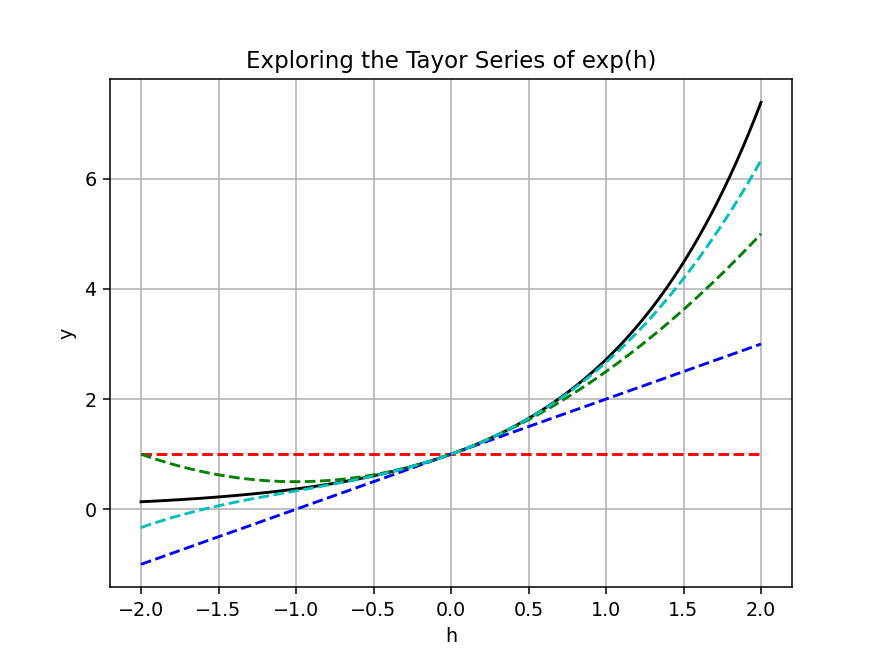

In [13]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAAA3AAAAKUCAYAAABFSNr3AAAgAElEQVR4XuydB5hV1dX+18zAIEWKKKAiTVDpSBFLQMCKNfZeYouxovw1JsYaNZ/GYLDGaKLE3tFYsCIqGilSRAQEREGK0qTXmf/zbjjjZbgz9651yz57eM/zfM9nmL322ee31t53vWeXU1BaWloqvEiABEiABEiABEiABEiABEiABGJPoIACLvY+YgNJgARIgARIgARIgARIgARIwBGggGMgkAAJkAAJkAAJkAAJkAAJkEAgBCjgAnEUm0kCJEACJEACJEACJEACJEACFHCMARIgARIgARIgARIgARIgARIIhAAFXCCOYjNJgARIgARIgARIgARIgARIgAKOMUACJEACJEACJEACJEACJEACgRCggAvEUWwmCZAACZAACZAACZAACZAACVDAMQZIgARIgARIgARIgARIgARIIBACFHCBOIrNJAESIAESIAESIAESIAESIAEKOMYACZAACZAACZAACZAACZAACQRCgAIuEEexmSRAAiRAAiRAAiRAAiRAAiRAAccYIAESIAESIAESIAESIAESIIFACFDABeIoNpMESIAESIAESIAESIAESIAEKOAYAyRAAiRAAiRAAiRAAiRAAiQQCAEKuEAcxWaSAAmQAAmQAAmQAAmQAAmQAAUcY4AESIAESIAESIAESIAESIAEAiFAAReIo9hMEiABEiABEiABEiABEiABEqCAYwyQAAmQAAmQAAmQAAmQAAmQQCAEKOACcRSbSQIkQAIkQAIkQAIkQAIkQAIUcIwBEiABEiABEiABEiABEiABEgiEAAVcII5iM0mABEiABEiABEiABEiABEiAAo4xQAIkQAIkQAIkQAIkQAIkQAKBEKCAC8RRbCYJkAAJkAAJkAAJkAAJkAAJUMAxBkiABEiABEiABEiABEiABEggEAIUcIE4is0kARIgARIgARIgARIgARIgAQo4xgAJkAAJkAAJkAAJkAAJkAAJBEKAAi4QR7GZJEACJEACJEACJEACJEACJEABxxggARIgARIgARIgARIgARIggUAIUMAF4ig2kwRIgARIgARIgARIgARIgAQo4BgDJEACJEACJEACJEACJEACJBAIAQq4QBzFZpIACZAACZAACZAACZAACZAABRxjgARIgARIgARIgARIgARIgAQCIUABF4ij2EwSIAESIAESIAESIAESIAESoIBjDJAACZAACZAACZAACZAACZBAIAQo4AJxFJtJAiRAAiRAAiRAAiRAAiRAAhRwjAESIAESIAESIAESIAESIAESCIQABVwgjmIzSYAESIAESIAESIAESIAESIACjjFAAiRAAiRAAiRAAiRAAiRAAoEQoIALxFFsJgmQAAmQAAmQAAmQAAmQAAlQwDEGSIAESIAESIAESIAESIAESCAQAhRwgTiKzSQBEiABEiABEiABEiABEiABCjjGAAmQAAmQAAmQAAmQAAmQAAkEQoACLhBHsZkkQAIkQAIkQAIkQAIkQAIkQAHHGCABEiABEiABEiABEiABEiCBQAhQwAXiKDaTBEiABEiABEiABEiABEiABCjgGAMkQAIkQAIkQAIkQAIkQAIkEAgBCrhAHMVmkgAJkAAJkAAJkAAJkAAJkAAFHGOABEiABEiABEiABEiABEiABAIhQAEXiKPYTBIgARIgARIgARIgARIgARKggGMMkAAJeCcwa9YsadmypTRv3lzw3/m6Hn/8cfnNb34j55xzjuC/Q7/69OkjI0aMkMcee0zOPffc0B+H7c8jgRYtWsh3330n3377reC/q9L1r3/9Sx544AGZMmWKrF692j1aaWlpVXpE9yxz5syRPfbYQ/bdd1/54IMPtni+goIC97+1/r377rvlmmuukSFDhsjZZ59d5ZjxgUggVAIUcKF6ju0mgTQIRAl9qqKdO3eW8ePHpyqWs79TwKVGC4EJTr/+9a+lS5cuSQ3iIuAiMZD6qbYsMXz4cMEzVPULSfS9994r7733nkuoN2zYIDvuuKPsvPPO0rNnTznwwAOdn6tXr543FFVVwEG8XXDBBY7jXnvtJQ0bNnT//cknn+SNbb5uBIH1xBNPyMcffyy/+tWvsiLgVq1aJa1atXKxOG3aNKlZs2a+Hof3IQESqIQABRzDgwSqMIEood9tt92kWbNmFT5pmzZt3KyNr8uXgHvllVfkD3/4gxx33HHyl7/8xdfjp3XfdMRZOmXSulmGhU466SSZN2/eVrWMGTNG1q5dK4i3Ro0abfX3++67T/bee+8M7x5v86FDh8oZZ5whSIyLiooEfRMsli5dKjNmzJCNGze6B5g9e7Y0bdo0bw9z0EEHyQ8//CDvv/++7Lrrrnm7b65v1K1bN/niiy8EM0kDBw7M9e281T9x4kT3Yqdv377Oh+Uv6wwc6olm4TBGXnfddd6ekTcmARL4hQAFHKOBBKowgSihv+mmm+Tmm2+O7ZP6EnCxBZKkYemIs3TK+HzmaJZnW13iCVGGWSCIt9NPP13uuuuuLcTSypUr5e2335ZHH33U/d8uu+zi011V4t61atVyyya/+uoradeuXZV4pmQPgVlGzDY+9dRTLrayKeB+/PFHF6eNGzd2y2zx4oEXCZCAXwIUcH758+4kkFMCFHA5xZvXytMRZ+mUyWujy91sWxdwEGy///3vpXXr1m4/FhPh3EdjJjNPuW9ddu6wbNkyJ/bxrAsWLBCI1mwKONR1xBFHyFtvvSWYQT722GOz03DWQgIkYCZAAWdGR0MSiD8Bi4DDbBiW4vz8889uP8WZZ5651YMeffTR8vrrr0v//v3ljTfecIkDrkQBgf++8cYb5d1335UlS5a4gxHOOuss+X//7/9JjRo1tqgz1QwcEpR77rlHXn75ZbfMDBeS4OOPP16uuuoq2X777bdqYyQWsK+qQYMGcvvtt8tHH30kP/30k/ztb3+TAQMGuINLkh1iErUHleKwAxwIgOVDo0ePlvXr10unTp3kj3/8o4BDsgvL4HBoAmZRvvnmG9e+3r17u1nQhQsXumVO2Of04YcfpgwilEH5iq7EA1gS+SPhwv1ee+0198x4g37qqac6n2y33XZJq1uxYoVgGSM4Y7/LunXr3MEy2I917bXXyg477JCyvZUVqEjAYYbk1Vdflf/+978ybtw4t5QPnLHsF8+Bezdp0mSLqq+++moXE+eff77jnOzC3jIsQ0RSi8Nd4IPowlLOBx98UJ555hknpnA/PCt8ivvttNNOW1VZPr5vueUWF9/z58+Xyy67TP7+979Xyue3v/2t/POf/5QTTzxRXnjhBRPLSZMmyaBBgwRxjWWq8CX660UXXZR05iWKccQb9tyhjejX06dPd/uasHQTV6o9cJ9++qnbt4e9Y4gnxPQ+++wjV1xxhRx++OFbPUtJSYnzy3/+8x83+4XZRew/g9Do1auXgEXbtm1VDOBDtP+zzz6TxYsXu3jcf//93RiAOhOvaExKdgPNDDD6AJ4DcRI9B/oSxj4sv05c5ooxE/uJMUt12223yfXXX7/V7S+99FIXdyj3+eefl42FOHQIB4VgtcTll1/u+in6A2IXzBAzN9xwg9StW3erOsEY4wD6KZaFJ7sShSzGY8QufAm/YFYY9zzvvPMq9MfDDz8sF198sZx88sny3HPPqfzGwiRAAtknQAGXfaaskQRiQ8Ai4NB4JCtYhoNkAQk1NrFHFxJ8JG3Yt4N9F1hWE13R/f70pz+5JGX58uXSoUMHgTCAkMGFMniTmygiKhNw33//vRx88MHOvrCw0C2DQjKCZApJ4p577ukS0/L7haKEFInKHXfc4WY7kDAiyUKyfeWVV6Yl4JC8XXjhhS75RII/c+ZMJ0jRBiQy2O+VeKFN+DeIoCgxxgEVX3/9tRODSMywjyRdAQf+SK6+/PJLgZAtv38MAgdiMmKLJPfWW28VJFxY+tS+fXtnh8MycP+jjjrKJYblLyT0SMQhkKtVq+aeFUIb3CFuwBOiIZMTCisScEgkkYDDR4gniDWIOsQF/j8SWJTBSaXRBZ6IhTp16jgBVbt27a2eCbMF2N8IZhCk0QXRcthhh8moUaPcPyGGMGsBcYRnxf3feecd6dix4xZ1RvEN//3jH/9wSyHBF2IQ9UFYVXbhND/sJ9p9991l8uTJUlxcrBorHnnkEbnkkkvcoScQUOiX8HG03xAioPxe1kjAQbzCBi9cwBHxDHGA/hXFaUWnUEJUIKZw4WUI/IgTDyHkcOFFAcokXnjxg+V8uNA3wRT9BuJ8zZo1TnzjJUq6F16gRHEOcR2dWIsXIrgwuwm+0RUd4jFy5Ej3T927dy8TSxBWEGCpLrA98sgjBXs3MfZgvyLGRMQSfA6GWPKKfXbRhThFnGB8wGEiOBEyutDvjjnmGHcQCOpMXNIZCTj0dfgIsY/YwniCWEHfxf9G/44OYonqhfCC3zHOQVQmuyIB99BDD7mxD23ASzAs68Vz4vrrX//qXrAlu3DIFfanon+iv/EiARLwS4ACzi9/3p0EckrAKuDQKLzRxZtdJCBIRJDUI8Ht0aOHS8CQZEA8JF7R/fBmH6fpPf/88+5kPVxIbLD0Bm/OkYhhRiy6KhNwSMSQhOGN9UsvveSSX1wQFkjOIeSSiaFILEAU4FkwexAl+RAFSGDSmYFDOczYYcYASRxm1zD7g/qQ0KHt+PfowswbBCLuheePGEHMYp8K3pBDJKQr4KJ601kemcgfguLf//532UwSEj8ko3jjDnFyyCGHlLUZ/uzatasTmZglhciIDhlBko4EETOuBxxwQEan91Uk4CAc/ve//7mkOnGGAcIfbYEIh7iE8E+8otjAc2ImtfyFZBlJc/nDFyJxAf9B5OHZcSExPeWUU9xMLY5jxwuKxNniiC9iCu1B/ECc44piqrIODQHcr18/VwR1YeYI/z/ZrEr5emCLFxmIR8QeEv4o7vA3vHBB+yHyolMXUUcU42gzxBdeLESzVYltrmgGDrNCuBcSd4hWzPJEF2YRERvwU2JMRck+ngv8E2c+EfvDhg1zz4w+kM6FWc5DDz3UiSKIDHCL+iLiA4Iaf8OLnIhvVG8mSyhRF9jC13ghFb1AwPNCBCHu8G+YwU0U45HghcDGCxg8K0Q2Zu4hOFHX7373uy0ePRJwGDshrDAjjRcPuDDGYWYYL2Hg50gYRxWgHF7AlO/XiTeIOKB+8MJLtqjN0SEleImBdiaLR4x7eAGAmJk6darrH7xIgAT8EaCA88eedyaBnBNI9zMCyd6GI0nB0izMyOCNNX7w8RYbyQTeEiOJLH9F90NigGSj/CEM0ZHeSATmzp3rZk9wVSTgIDpQJ5I13BdLfRIvzEpB2OHtdPklclFCiqQJp9Al22+UjoDDsiG8tU688PYdy/vw5hrJKtqAC+1AQgdBMnjwYDdTWd4Os4Bgk0sBB/EFgVs+EUPSCb9h5gM+jy48H2Z2wBon2CUKUpRBLIA9Zk8gprFszXJZ98BBqGEJH2ImcSllJC7wd7xkSLwgZiDQ4BPMMkQvEsAeCTJmNjB7AmGQeMGn8CFm18p/+yqKb4gZJMxR/GpYICYwix1dSKyRgOPFCEQ1lgUnWxKMFyKYMaxIrFY02xjFOO4HwYWleMmuZAIOYgsiBLNtWEacbCkvljRCUKHtEBC4nn32WTnttNMqXdKnYYb7Yikx6nz66ae3MsUz4eUOymXr+2d4WYCXL4h7jB/lj89H/MBn+Fv5g0MgdiBaEbM4cRRLVhFnEJh4qQBxVv6KBBz+HX5G3YkX+iUEPPomxuTEmXCMt/AVXrBhli7ZFQm4ZC9CUB5j/YQJEyrd4xbFSLJ+o/Eny5IACWROgAIuc4asgQRiSyDdzwggsS+/FDBKJDDrgmQFx4zjTTiWlSHBSLaPKrof9lphGWb5C/tJkPxiCRvewmOWCFdFAg5viu+88043M/Pmm28m5Yw6kDhi6RCWEEVXlGxUtiwoHQGHN+jJvrsW3ffFF1+UE044wd0WS52QQEEsYqYx2Zvs6O18LgUc/JlsP1a0NLb8Mkr4Fonvk08+6RLOZBdmuMALM6fRUjZt4Fcm4CC0EF/wM8QRln0i7nBBjEJYIalO3G8FkYWXBFgWW35WAHGD+MHMBfYBRhdmkTD7ASENfyW7or1q5QVDFN/Yx3T//fdrH7+sPGYzIaQhSpB4J17Y14WlmJg1ji4IKIhRzJBgGWKypZdYVom/oz6Ujz4FEMU4YhExWdHBKckEHEQxhAgEb7QEuvxD42UFbDEeQOijfoh8iGqIZoiYTJbdYsa4Xr16buYbe8aw7678hT1xeKmAVQIYWxKX01pn4LC3EmK5or1saANmhrF8FEussbcx8UrcS4yYxXgHHpjVjWZtE8tHAg4rHvA8yS6MLYhZxDBiFBfiIdqbihcc0YuK8vYRB6wASJxFjcpFMV/Z5xYwU43xsKK90eYOQUMSIAE1AQo4NTIakEA4BDJZQhk9JURRtBkfSRoO8sC+tmRXdD/sl8GG+2QX3ixj/0fiDFVFAg5LJDGzgL0t2OOS7MKeDSxxRNlo3xnKRQkpkmUsHUx2pSPgkJQm218VfTQXdUTJdjQLgmWeECHJLiRQmGXJpYCDuIDIKH9BpEGslZ+pwJ4iLO3CTGJFs0pI1CEMIH6wBMxyVSTgsLwUSWX52ZPy90gmMDFziBlEnO74f//3f2UmmDmBqCufsGK2COIWLyywxDXZBX6YZcaeH8ywRFcU3xXx1TKBAB07dqzrD5jVwAxN9B047K/EgRG4sFwZohsCrbLv5KFv4iVJotCJYhyz5/h7RVcyARctB8bSy4qO4IfwhkjDhT11mP2F8MYyTfw7RBW4Id4h6vbbb7+tDjGqjBtmhaIXKBX1Rfx7NGuJ8ph1jy6rgIvGqcSPf5dvJ54X/byiF0zRCxPYoR3wceLS5cT6IgGHJalYqZDsQszihRFiONpviSWP0UoHCHT4KtkVcaholg57c//85z8n3c8Y1YeXefBp+WW62rhneRIggcwJUMBlzpA1kEBsCWRDwGG2Dcu3cCVbopT48NH9Et8Ql4eDRBQJaeKb7YoEHJYMYelQZW+Fo/0bKIsZnOhKPIUS7Up2pSPgkKAmu6KEK/FEOwgM7CFDwok31ckuJOlI4nIp4Co6ZS860bL8vbEvBjM46VyJp16mUz6xTEUCDicoIinE3zHDh0QRSyWj/WeRWE72XOCMmQHMPGCpZOIMEGZ7ITohIqIr+l4W9ikmLmVMbCeSZCTL5Wee0tmHqGWSWB6zM5jZxfJP7DGCAMWFJXrJToOt6F7YtxXFfOIplJWdeppMwMEXWDqd7oXlqdFsG2ZF0ccxWwOhE12YTcPLBQiG8qfRJrtPdMANXixA6Fd04e+YrUN5xE90WQVctK8snWevqC/jgBgckIM9pqgPs2eJsZhYdzSeYNYYezaTXYhZiGrEMPoLLgj2iCOWViYeOJVYRyoOmEnEjGJl3wzFrDX2++FFGV6Y8SIBEvBHgALOH3vemQRyTiBTAYeECG/8oxMg8Wa9oj04eJg4zsAlJrPlgWdbwMVlBk4r4PDWHkvPMEODmZpcXckEHIQj7o9ZFOxpTDa7ixlULK2s6LnQZsxk4cAMvCCIlr8lm7nNxgyc5hh6Lcto1gt20YwK9kxhhhJL6DCDorkyEXCYJcd+SfDHTLb1wuE4EFZ4cYN6MMuImVM8a6rL1wwcxj3sb61s32BlbcczYjzEc2PfGsZOiFaIpGSXdQYOdUX9N9neuehe2RBwmF3FoUblRXIqH/LvJEAC2SdAAZd9pqyRBGJDIFMBFx1PjRk47KvCCWh4041ZD8xOlL/S2QMXHSeerT1w2F+CpUkV7YHLp4BL3AOHvSnJDqOI3nRrZ+CigxwqEw+pZogqmoHDcjckZZWJ82wEdTIBFy0Bwz6eRYsWbXUbCDzs58IeuIqePfpGFUQOZkERYxCEEA7lD75JZw8cDq5BnRXtgculgEO/iI64x0wcZhExs4L+hiXMEHXlD9SozDeZCLjo4IzoyP5sxEB0wAlmjeCjimakonulswcOJ5hiaSbqwsxf4oesUwmXip4JM+mIpcpEV2U8sIwcs1k4EAdLfPFiITpsKXGGMKojnT1weLmBw5zKr3CITstMXM5dvm2pOKSagcMSayy1xgx3RWNbNuKDdZAACaRHgAIuPU4sRQJBEshEwOHNM/bgQLDhTTT2dUUzG9gfgoMKsPQu8Uo8hRLLIstvqIdAQB2oE4l7pqdQIpnBoSpIjHD0e+LHfH0soUw8hRLL87DkKfHCcifsJUJCrhVwOBEPh3gkO4I8uodVwOFADQh0zDpg/1R5v2Yr+JMJOCTc9evXT5p8475RzOC/KxJOWFqHWANfJM4Q8xV98iDVKZRIVCFYsD8Nn9FAIp8u31ScIEKjzzNUVBZ7R7H0EEwgaKMTQaMDJCo7lCdZnZkIOJy2Cp9BSFpnosq3KTqQBf8e7ZlLxS3VKZQYp9A+CBmIzsQrlXCp6N44+AafPcHLA4wzWPqZ7oVDSHD4SzQu4YAV7C+DGERsYVaxfH2Jp1BiT2Tit+Vw32j/Kp4H40fiNxGjw1Qq25+aikMqARftw8TYH30/MV0eLEcCJJB9AhRw2WfKGkkgNgSsAg57iXAQAJbVJb7VTVxSWX7GCw+d+B0yJC142x4d+47N7zhCG0lp+X0elX0HLpodwr4yHBUe7fFAEoN9GFh2V9l34PI5AwcG0QEYEKdIKqNTEzHbgL1e2F9l+Q4cDtVA3UhWwTVKyJIJaO0SSnzbCQkjZqzQXojPxBlWLAdDUopYQBKKTyhYror2wOHwFOz/wowvltVFJ5yCFfbcYfkZ9hFVNvMVzRZjFgazdjgIAv+W7Iq+A4fnwPLE6JAMCArMuiFmKvsOnHUGDssRkfxihg99ASItutC3cJIh+gaEaPlPPSCBj76Fhr1peDmQONOEvorliZgdx6E+0ZWJgEMd0acaEM84/AX7ERMFPpjhoBj06+iwI8xc4XAPcE6MI4hifEMRs5tgj36fLI7L+yzxO3A4vAOfYoiWJeJ/Y6lstr8DB/GFA38QC1iiC98kHiCDv4M1nhV9MvpgN05PRTzhRUHiB84Tl1Qm+xxC4nfgEHtYjh2xw8w+TlOdOXOmJDvhN9qnXNkS20wFHA4JwkFSeMEQfdTdMgbQhgRIIDsEKOCyw5G1kEAsCaT7GQE0HkvocCFZxhtvzGghMcFpeIkX3g5DnCEhQVKZ+DHe6H44+AAzRRAtSCqQuEUHMkCQYclj4jKwygQcDgJAIoWEEEkblhEhecJbcbQVyQ7eujdt2nSLdvqYgYv44QCM6ERMvClv2LChE0fRPhiI32SzBZUFEQQwTvHDs+NIebzJjz4ojaQ/UUBrBRxs4QMs8wJXXBDKmC2CsAB7iDxc2A+ZbPlsOh2gIgGHZYO4N2IKMxOoH7M++O4cDqfBSwAkypUJp+goebSj/Axv+bZB7OCwkGgmAYczQDRifxnENZYtRp/MSLRNNcOZikG0/w7lkFAjNnCkPNqDOIdIxYVDbiCKyp9+igNB8BIA5bAEEctD8f+xLwn+Q2yUn3nMVMChPfgkAz4dgfhFm3AwB2IPPsLLHlz4/AR8hCv6Nhz+GywRr+CKOEI8oc0QztFnRFJxw98TT8NFXEbLOvHsURuvvfbarapKJVwquzdEKV4SRd8YxBiDGTnwh5iKDlVBrCBOcUUvBzBGYgxN/GwDTnLFywrMOpef3Y0EHF7UYLYL/sRYB+bok/At4hR1JvsMQfQSpPwpnNHzpeJQ2Qwc7o2+i9lTPDfY8yIBEvBLgALOL3/enQRySiDdD3mjEdFpi1i+hbesSLowK5I4SxA1Fse1Q4SgDBKG6OjqxAQX/416cOoi9u3gRx/L0ZBklT99rjIBh3virTbetGMGDgkELizpxAd8kRQn22vmS8ChbRAimC179NFHneBB+yC+kCQhCYJYwX4tJOmaC8+P5Bh+QfIInyWeCplKYFS0By5qAxJTLFnEzGF0D+x7QeKK9iOZhUBIZ9Yk2XNV9h04zHRgmRlEFZ4L/sWey4EDB7rvbGEmKNXMF5anQihjmS7YV3ZheSBeMuDD0DhZDwIDMYqZDsRosqWOqfim8iVEMBJwvMDAvi0IVMxg4cUEhA5mQTHDgu8KVsQY8Y8lrxANEARghWPkwQvLbOEj9MvoyoaAQ12IB8zMwk9oN2bhIGbwAgXMsNwQsYILog4vfvBiBWyxdBSzomgXXg7Bp+X3JqZih78jfnGwCl5mYEzBvkkIJYwBWLKY7EolXFLdF30ZnwPASaA4KAdiG/fFs+ObdOCNZwKP6BRafHMPy84TlzlG94n2AGJMQJloRUEk4LBvDiIOYycO5QE7vMDASyH8W0VLObHPDgfDVPTJlVQcKhNwI0aMcKsrEF8Ql7xIgAT8E6CA8+8DtoAEqgyBTBPcKgOikgeJPntQfonctvDsuXxGJNpIqiGIkODjUAteJBAKgUQBBzGlvfDyBTOjWPWA5ZsQkdm6IM4hJvHSIdmH1LN1H9ZDAiSQPgEKuPRZsSQJkEAKAhRwlQPCLAQOo8C+Pcym4YPevLJDIPpAOmbhomWg2amZtZBA7glkKuDQwuh7gTjUBHtVs3Fh1hF7AJPt28tG/ayDBEjARoACzsaNViRAAkkIUMBtgoIlplgmmfhNM+zVweELWEKFAxywtLK4uJhxlAUCmHXA0k4s88NSMhwSwosEQiKQDQGH5bQ4pRRL1HGqbDYufH8Ry5qxLDlxaW426mYdJEACdgIUcHZ2tCQBEihHgAJuE5Doe03YP4h9MNhfhb1ZWOaHvS9IirCnjFdmBCCUwRKn9OHACRzygH1FFMaZcaV1/glkQ8Dlv9W8IwmQgC8CFHC+yPO+JFAFCVDAbXIqljLhEAcc8IKZN7wZx/4snC6IQwaigwuqYAjk9ZGipBeH6CD27rnnHp6Ql1cP8LNiBv4AACAASURBVGbZIkABly2SrIcEtg0CFHDbhp/5lCRAAiRAAiRAAiRAAiRAAlWAAAVcFXAiH4EESIAESIAESIAESIAESGDbIEABt234mU9JAiRAAiRAAiRAAiRAAiRQBQhQwFUBJ/IRSIAESIAESIAESIAESIAEtg0CFHDbhp/5lCRAAiRAAiRAAiRAAiRAAlWAAAVcgE5s3769LF68WHbfffcAW88mkwAJkAAJkAAJkAAJVFUCM2bMkB122EG++uqrqvqI3p+LAs67C/QN2HnnnWXlypXSqVMnvXGGFsuWLXM11K1bN8Oati1zctP7m8z0zGBBbnpuZKZnxlgjMxsBmxX7qJ6bT2YTJ06U2rVry7x58/QNp0VaBCjg0sIUr0LRB4A/+eSTvDfs448/dvfs1atX3u8d8g3JTe89MtMzgwW56bmRmZ4ZY43MbARsVuyjem4+mfnMU/WkwrSggAvQbz47hs8BIUBXlTWZ3PTeIzM9MybVZGYjYLNiH9VzIzM9M45r4THzmafaaIVnRQEXns/EZ8fgj48tYMhNz43M9MyY6JCZjYDNin1Uz43M9Mw4roXHzGeeaqMVnhUFXHg+o4AL0Gf80dY7jcz0zJjokJmNgM2KfVTPjcz0zDiuhceMAs7mM40VBZyGVkzK+uwY/PGxBQG56bmRmZ4ZEx0ysxGwWbGP6rmRmZ4Zx7XwmPnMU220wrOigAvPZ5yBC9Bn/NHWO43M9MyY6JCZjYDNin1Uz43M9Mw4roXHjALO5jONFQWchlZMyvrsGPzxsQUBuem5kZmeGRMdMrMRsFmxj+q5kZmeGce18Jj5zFNttMKzooALz2ecgQvQZ/zR1juNzPTMmOiQmY2AzYp9VM+NzPTMOK6Fx4wCzuYzjRUFnIZWTMr67Bj88bEFAbnpuZGZnhkTHTKzEbBZsY/quZGZnhnHtfCY+cxTbbTCs6KAC89nnIEL0Gf80dY7jcz0zJjokJmNgM2KfVTPjcz0zDiuhceMAs7mM40VBZyGVkzK+uwY/PGxBQG56bmRmZ4ZEx0ysxGwWbGP6rmRmZ4Zx7XwmPnMU220wrOigAvPZ5yBC9Bn/NHWO43M9MyY6JCZjYDNin1Uz43M9Mw4roXHjALO5jONFQWchlZMyvrsGPzxsQUBuem5kZmeGRMdMrMRsFmxj+q5kZmeGce18Jj5zFNttMKzooALz2ecgQvQZ/zR1juNzPTMmOiQmY2AzYp9VM+NzPTMOK6Fx4wCzuYzjRUFnIZWTMr67Bj88bEFAbnpuZGZnhkTHTKzEbBZsY/quZGZnhnHtfCY+cxTbbTCs6KAC89nnIEL0Gf80dY7jcz0zJjokJmNgM2KfVTPjcz0zDiuhceMAs7mM40VBZyGVkzK+uwY/PGxBQG56bmRmZ4ZEx0ysxGwWbGP6rmRmZ4Zx7XwmPnMU220wrOigAvPZ5yBC9Bn/NHWO43M9MyY6JCZjYDNin1Uz43M9Mw4roXHjALO5jONFQWchlZMyvrsGPzxsQUBuem5kZmeGRMdMrMRsFmxj+q5kZmeGce18Jj5zFNttMKzooALz2ecgQvQZ/zR1juNzPTMmOiQmY2AzYp9VM+NzPTMOK6Fx4wCzuYzjRUFnIZWTMr67Bj88bEFAbnpuZGZnhkTHTKzEbBZsY/quZGZnhnHNT2z0tJSue6666RXr15y1FFH6SvI0MJnnpph04Mxp4ALxlW/NNRnx+CPjy1gyE3Pjcz0zJjokJmNgM2KfVTPjcz0zDiu6ZmNHDnSrdaqXr26XHXVVXLnnXfqK8nAwmeemkGzgzKlgAvKXZsa67Nj8MfHFjDkpudGZnpmTHTIzEbAZsU+qudGZnpmHNf0zM477zx57LHHnCHE27XXXquvJAMLn3lqBs0OypQCLih3UcAF6C7XZP5o6z1HZnpmjDUysxGwWbGP6rmRmZ4ZxzUds2XLlsnOO+8sq1atkqKiIpkzZ440adJEV0mGpSngMgSYhjkFXBqQ4lbEZ8fgj48tGshNz43M9MyY6JCZjYDNin1Uz43M9Mw4rumYPfLII3LRRRc5I+yB++ijj3QVZKG0zzw1C80PogoKuCDctGUjfXYM/vjYAobc9NzITM+MiQ6Z2QjYrNhH9dzITM+M45qOWc+ePWXUqFHOyMfySdzXZ56qoxVuaQq4AH3ns2Pwx8cWMOSm50ZmemZMdMjMRsBmxT6q50ZmemYc19Jn9uWXX0qnTp2cwY477ijPP/+89O3bN/0KslTSZ56apUeIfTUUcLF30dYN9Nkx+ONjCxhy03MjMz0zJjpkZiNgs2If1XMjMz0zjmvpMxswYIAMHjzYGZx11lly4YUXumWU+b585qn5flZf96OA80U+g/v67Bj88bE5jtz03MhMz4yJDpnZCNis2Ef13MhMz4zjWnrM1q5dK7vssossXrzYGTz77LPuf1PApccvtFIUcKF5zPPaYv742AKG3PTcyEzPjIkOmdkI2KzYR/XcyEzPjONaesywXPKUU05xhfv16yc333yz+28KuPT4hVaKAi40j1HABegxfkbA4jQmOhZqjDULNcaahRpjzUKNsWahxlhLh9qhhx4q7777riv61FNPyW677UYBlw64QMtQwAXoOC6hDM9p/NHW+4zM9Mz4pprMbARsVuyjem5kpmfGcS01s1mzZkmrVq2ktLRUGjRoIHPnzpXRo0dTwKVGF2wJCrgAXUcBF57T+KOt9xmZ6Zkx0SEzGwGbFfuonhuZ6ZlxXEvN7KabbpJbb73VFbzsssvkvvvuE5+x5jNPTU2rapSggAvQjz47hs8BIUBXlTWZ3PTeIzM9MyY6ZGYjYLNiH9VzIzM9M45rlTPbuHGjtGzZUmbPnu0Kjh8/Xjp37kwBZwu1YKwo4IJx1S8NpYALz2n80db7jMz0zJjokJmNgM2KfVTPjcz0zDiuVc5s2LBh0r9/f1eoW7duMmbMGPffPmPNZ55qi7DwrCjgwvOZ1y/c+xwQAnRVWZPJTe89MtMz8/2jbWuxfyvGms0H5KbnRmZ6ZhzXKmd20kknyYsvvugKPfTQQ3LxxRdTwNnCLCgrCrig3LWpsT7fbPDHxxYw5KbnRmZ6Zkx0yMxGwGbFPqrnRmZ6ZhzXKmb2008/ya677irr16+XmjVryrx586RevXoUcLYwC8qKAi4od1HABegu7wMpmYVKwNZuJoh6bmSmZ8akmsxsBGxW7KPJuQ0aNEgGDhzo/nj22WfLkCFDygr6ZOZzosEWYeFZUcCF5zPOwAXoM58DaYC4KHozcBpjTQ+PzPTMKODIzEbAZsU+ujU3fDKgbdu2MnXqVPfHESNGSO/evSngbCEWnBUFXHAu4xLKAF3mdTNxiLyYHNq9xkRHz47M9MzYR8nMRsBmxT66NbcPP/xQ+vbt6/6w1157yeTJk6WgoIACzhZiwVlRwAXnMgq4AF1GAWdwGn+wDdA8nzxma7F/K8aazQfkpudGZnpmfFmQnNlpp50mzz77rPvjPffcIwMGDNiioM9Y4xJKW5xrrCjgNLRiUtZnx/A5IMQEv6kZ5KbHRmZ6Zkx0yMxGwGbFPqrnRmZ6ZhzXtmb2448/StOmTd3hJTVq1JC5c+fKDjvsQAFnC68grSjgAnQbBVx4TuOPtt5nZKZnxkSHzGwEbFbso3puZKZnxnFta2Z33nmnXHfdde4P5Q8viUr7jDWfeaotwsKzooALz2c8xCRAn/kcSAPE5ZpMZjbPkZueG5npmbGPkpmNgM2KffQXbiUlJdKmTRuZOXOm+8dPP/1U9ttvv63A+mRGAWeLc40VBZyGVkzK+uwYPgeEmOA3NYPc9NjITM+MSTWZ2QjYrNhH9dzITM+M49qWzN555x057LDD3D927NhRJkyYsMXhJVFpn7HmM0+1RVh4VhRw4fmMM3AB+sznQBogLtdkMrN5jtz03MhMz4x9lMxsBGxW7KO/cDvhhBPk5Zdfdv/wwAMPyCWXXJIUqk9mFHC2ONdYUcBpaMWkrM+O4XNAiAl+UzPITY+NzPTMmFSTmY2AzYp9VM+NzPTMOK79wgyHlTRr1kw2btwotWvXdoeX1K1blwLOFlZBW1HABeg+CrjwnMYfbb3PyEzPjIkOmdkI2KzYR/XcyEzPjOPaL8xuu+02ueGGG9w/XHDBBfLII49UCNRnrPnMU20RFp4VBVx4PuMSygB95nMgDRCXazKZ2TxHbnpuZKZnxj5KZjYCNiv2UXGzbi1btpTZs2c7iGPGjJFu3bpRwNlCKngrCrgAXejzzQYHUVvAkJueG5npmTGpJjMbAZsV+6ieG5npmXFc28Ts9ddfl6OPPtr9d/fu3WX06NGVwvQZaz7zVFuEhWdFAReezzgDF6DPfA6kAeJyTSYzm+fITc+NzPTM2EfJzEbAZsU+Kk68QcThwtJJLKGs7PLJjALOFucaKwo4Da2YlPXZMXwOCDHBb2oGuemxkZmeGZNqMrMRsFmxj+q5kZmeGcc1ke+//94tn8Q34HBoyQ8//CB16tShgLOFU5WwooAL0I0UcOE5jT/aep+RmZ4ZEx0ysxGwWbGP6rmRmZ4ZxzWRG2+8Uf785z87eJdeeqncf//9KUH6jDWfeWpKMFWkAAVcgI702TF8DggBuqqsyeSm9x6Z6Zkx0SEzGwGbFfuonhuZ6Zlt6+Pa+vXrpXnz5jJv3jwHb+LEie4D3qkun7HmM09NxaWq/J0CLkBP+uwYPgeEAF1FAZeB0xhrNnjkpudGZnpm23pSbSPGvb3kpifw/PPPyymnnOIM999/fxk5cmRalfgc13zmqWnBqQKFKOACdKLPjuFzQAjQVRRwGTiNsWaDR256bmSmZ0YBR2Y2AjarbbmP9u7du+xQr6efflpOO+20tCD6ZOYzT00LThUoRAEXoBN9dgyfA0KArqKAy8BpjDUbPHLTcyMzPTMKODKzEbBZbat9dMKECdKlSxcHrXHjxu4wk+Li4rQg+mTmM09NC04VKEQBF6ATfXYMnwNCgK6igMvAaYw1Gzxy03MjMz0zCjgysxGwWW2rffSiiy5ynwzAhYNMbrnllrQB+mTmM09NG1DgBSngAnSgz47hc0AI0FUUcBk4jbFmg0duem5kpmdGAUdmNgI2q22xjy5ZskR23XVXWb16tVSrVk2+++472WWXXdIG6JOZzzw1bUCBF6SAC9CBPjuGzwEhQFdRwGXgNMaaDR656bmRmZ4ZBRyZ2QjYrLbFPjpo0CAZOHCgA3byySfLc889p4Lnk5nPPFUFKeDCFHABOs9nx/A5IAToKgq4DJzGWLPBIzc9NzLTM6OAIzMbAZvVttZH8cHuNm3ayMyZMx2wESNGCA4z0Vw+mfnMUzWMQi5LAReg93x2DJ8DQoCuooDLwGmMNRs8ctNzIzM9Mwo4MrMRsFlta330zTfflCOPPNLBwjffcJhJQUGBCp5PZj7zVBWkgAtTwAXoPJ8dw+eAEKCrKOAycBpjzQaP3PTcyEzPjAKOzGwEbFbbWh894ogj5K233nKwHn74YcFhJtrLJzOfeaqWU6jlKeAC9JzPjuFzQAjQVRRwGTiNsWaDR256bmSmZ0YBR2Y2AjarbamPTp8+3S2fxFWvXj354YcfpHbt2mpwPpn5zFPVoAI1oIAL0HE+O4bPASFAV1HAZeA0xpoNHrnpuZGZnhkFHJnZCNistqU+evXVV8s999zjQF111VWCw0wsl09mPvNUC6sQbSjgAvSaz47hc0AI0FUUcBk4jbFmg0duem5kpmdGAUdmNgI2q22lj65cuVKaNm0qS5cudaC++eYbad26tQmaT2Y+81QTrACNKOACdJrPjuFzQAjQVRRwGTiNsWaDR256bmSmZ0YBR2Y2AjarbaWP4qPd0X63/v37Cw4zsV4+mfnMU628QrOjgAvNYyLis2P4HBACdBUFXAZOY6zZ4JGbnhuZ6ZlRwJGZjYDNalvoo6WlpdKlSxeZOHGig/T666+XnURpoeaTmc881cIqRBsKuAC95rNj+BwQAnQVBVwGTmOs2eCRm54bmemZUcCRmY2AzWpb6KP41lufPn0coFatWsm0adOkqKjIBkxEfDLzmaeagQVmSAEXmMPQXJ8dw+eAEKCrKOAycBpjzQaP3PTcyEzPjAKOzGwEbFbbQh897rjjZOjQoQ7Q3XffLQMHDrTB2mzlk5nPPDUjaAEZU8AF5KyoqT47hs8BIUBXUcBl4DTGmg0euem5kZmeGQUcmdkI2Kyqeh+dOXOmO6wEyyjr1Kkjc+bMcZ8QyOTyycxnnpoJs5BsKeBC8tbmtvrsGD4HhABdRQGXgdMYazZ45KbnRmZ6ZhRwZGYjYLOq6n10wIABMnjwYAfniiuuKPtvG61NVj6Z+cxTM2EWki0FXEjeooAL0Fv+B9JQofn88QmVme8f7VC5MdZsniM3PTcy0zOr6uPasmXL3KcDli9fLgUFBW7vm/XTAYl0fcYaBZwtzjVWFHAaWjEp67Nj+BwQYoLf1Axy02MjMz2zqp7o2IiktmKspWaUrAS56bmRmZ5ZVR/X/v73v7sPduM65phj5NVXX7VBKmflM9Z85qlZgRdAJRRwATipfBN9dgyfA0KAriprMrnpvUdmemZVPdGxEUltxVhLzYgCzsaovBVjzcaxqnLbuHGjtGnTRr799lsH5oMPPpC+ffvaIFHAZYVbKJVQwIXiqYR2UsCF57Sq+uOTS0+QmY0uuem5kZmeGV8WkJmNgM2qqvbRV155RY4//ngHpXPnzjJu3Di3jDIbl09mPvPUbLALoQ4KuBC8VK6NPjuGzwEhQFeVNZnc9N4jMz0zJtVkZiNgs2If1XMjMz2zqjyuHXjggfLRRx85KI899pice+65NkBJrHzGms88NWsAY14RBVzMHZSseT47hs8BIUBXUcBl4DTGmg0euem5kZmeWVVOqm000rNirKXHqXypqsjtiy++kG7durlHbdSokXz33Xey3Xbb2QBRwGWNWygVUcCF4qmEdlLAhee0qvjjk2svkJmNMLnpuZGZnhkFHJnZCNisqmIfPfvss+WJJ55wQG666Sa5+eabbXAqsPLJzGeemlWIMa6MAi7GzqmoaT47hs8BIUBXlTWZ3PTeIzM9MybVZGYjYLNiH9VzIzM9s6o4rs2bN0+aN28u69evl+LiYvn++++lcePGNjgUcFnlFkplFHCheCqhnRRw4TmNP9p6n5GZnllVTHRsFHRWjDUdr6g0uem5kZmeWVUc12644Qa57bbbHAzse8P+t2xfPmPNZ56abY5xrY8CLq6eqaRdPjuGzwEhQFeVNZnc9N4jMz2zqpjo2CjorBhrOl4UcDZe7J/kBgKrV6+WZs2aycKFCx0QnDzZpUsXO5xylh8sWSJ3fPednLlsmexeUCC9evXKWt3pVuQzT023jaGXo4AL0IM+OwYTHVvAkJueG5npmTFBJDMbAZsV+6ieG5npmVW1ce3RRx+VCy+80IHo06ePDB8+3AYlidXG0lLpOmaMTFy5UgpF5C+FhXJt795Zqz/dinzmqem2MfRyFHABetBnx+CPjy1gyE3Pjcz0zKpaomMjoLdirOmZMdbIzEbAZlVV+mhJSYm0a9dOpk6d6kC8+uqrcswxx9igJLF6ZO5cuWjaNPeXJiLyRGGhHEwBlzW+caqIAi5O3kizLRRwaYKKUbGq8uOTT6RkZqNNbnpuZKZnRgFHZjYCNquq0kdfe+01OfbYYx2EPffcUyZPniyFhZgry/z6ecMGafP55/LT+vWuspsLCqRfYSGXUGaONpY1UMDF0i2VN4oCLjynVZUfn3ySJzMbbXLTcyMzPTMKODKzEbBZVZU+2rt3b4me5Z///GfZUkoblS2tfj9jhtw1e7b7xwPq1pU7VqyQAu6BywbaWNZBARdLt1DABeiWSptcVX588ukXMrPRJjc9NzLTM6OAIzMbAZtVVeijn3/+uey7774OAD4ZMGvWrKx9uHvG6tXSbtQoWVda6uof3bWrrJ4wwf03DzGxxVzcrSjg4u6hJO3jDFx4TqsKPz75pk5mNuLkpudGZnpmFHBkZiNgs6oKffTEE0+Ul156yQHAJwSuv/56G4wkVidMmiQvbz7V8pzGjeXxtm3LZvoo4LKGOVYVUcDFyh3pNYYCLj1OcSpVFX588s2TzGzEyU3Pjcz0zCjgyMxGwGYVeh+dPn267LHHHlJaWiq1a9d2H+7eYYcdbDDKWX24ZIn03TzbVquwUL7p2VN2qVGDAi4rdONbCQVcfH1TYcso4MJzWug/Pj6Ik5mNOrnpuZGZnhkFHJnZCNisQu+jl1xyiTz00EPu4a+44goZPHiwDUQ5K3w2oMfYsTJuxQr3lz+3aCF/atHC/bdPZj7z1KyADaASCrgAnFS+iT47hs8BIUBXlTWZ3PTeIzM9M98/2rYW+7dirNl8QG56bmSmZxb6uPbTTz+5D3evWbNGioqKBLNxLTaLLBuNX6xWbNggV06fLo/Nny9Na9SQqfvsIzWLiijgMgUbgD0FXABOooAL0Enlmswfbb0PyUzPLPREx/bEmVsx1mwMyU3Pjcz0zEIf126++Wa55ZZb3IOfeuqp8swzz9ggVGL1xfLlsmTDBjmoQYNYvDj2OdGQdbgxrZACLg+OefbZZ+Xhhx+W8ePHy9q1a6Vp06ay//77y3333Sfbb7+9ugU+OwZ/fNTu8v4mzNZi/1aMNZsPyE3Pjcz0zEJPqm1PnLkVY83GMFRuq1atcrNvixYtcg8+duxY6dq1qw2C0sonM595qhJTsMUp4HLoupKSEvnNb34j//nPf9zm1UMPPVRq1aols2fPlvfff991ZIg57eWzY/gcELSc4lSe3PTeIDM9MybVZGYjYLNiH9VzIzM9s5DHtQcffFAuvfRS99D9+vVzuV++Lp+x5jNPzRdf3/ehgMuhB/7617/KtddeK1deeaUMGjRICgsLy+4GcYcr8d/SbYrPjuFzQEiXTxzLkZveK2SmZxZyomN72uxYMdZsHMlNz43M9MxCHdc2btwoe+65p8yYMcM99FtvvSWHH364DUCCFU6yHDB9uhy7447SL2HJZPmKfcaazzw1Y8CBVEABlyNHYdp81113lYYNG8rUqVPdxtVsXT47hs8BIVv8fNRDbnrqZKZnFmqiY3vS7Fkx1mwsyU3Pjcz0zEId1/DNN3z7DVfHjh1lwoQJUlBQYAOQYPXfhQvlmEmT3L+c36SJPLrXXknr9BlrPvPUjAEHUgEFXI4cNXToUDnuuONk4MCB7oON//3vf93JQzvuuKMcdthhbk209fLZMXwOCFZecbAjN70XyEzPLNREx/ak2bNirNlYkpueG5npmYU4rmGWrGfPnjJ69Gj3wEOGDJGzzz7b9vAJVmtLSqT9qFEyY80a969/b91arqxgK47PWPOZp2YMOZAKKOBy5KgbbrjBCbdrrrlGIOa++eabsjtVr15dbr/9dvc3y+WzY/gcECys4mJDbnpPkJmeWYiJju0ps2vFWLPxJDc9NzLTMwtxXHvvvffkkEMOcQ+Lsw6wjLK4uNj28AlWd37/vVw3c6b7l3a1asn47t2lesL2nMQb+Iw1n3lqxpADqYACLkeOuvjii93Jk1g62aNHD8FG1tatW8unn34qF1xwgcyZM8fNyh111FEVtiDqAOULTJw40X1D5IEHHshR6yuudtmyZe6PdevWzfu9Q74huem9R2Z6ZrAgNz03MtMzY6yRmY2AzSq0PjpgwAD54osv3MPiw93RUkrb02+yWlhaKmeUlMjqzZX8rbBQelSyJNMnMxzcgjzxk08+yeSRaVsJAQq4HIXHRRddJI888og7dRJvXpo0aVJ2p3feeccto0x1IhEFXI6c46FanwOph8fNyi3JzIaR3PTcyEzPjAKOzGwEbFYh9dGvvvpKfve737kHrVevnrzwwguy3Xbb2R48wer2khJ5u7TU/UsvEbk9xdkKPplRwGXs7pQVUMClRGQrgOWRd999t/Tu3VtGjBixRSVYG12zZk3XoZcuXaq+gc+paZ9T8mpQMTIgN70zyEzPDBbkpudGZnpmjDUysxGwWYXUR4899lh57bXX3INiK831119ve+gEq89+/ln2HzfO/UuNggKZvM8+0qpmzUrr9cnMZ56aMexAKqCAy5GjMPuGWbijjz66rCMn3mqnnXZyS53wYW/t5bNj+BwQtJziVJ7c9N4gMz0zJtVkZiNgs2If1XMjMz2zkMa1SZMmuRMncW2//fby/fffS/369W0PvdlqIw5EGTtWxq5Y4f7l+mbN5LZWrVLW6TPWfOapKcFUkQIUcDlyJE6cbNOmjdv3lniACW63cOFCgYDD36dNm6Zugc+O4XNAUIOKkQG56Z1BZnpmISU6tqfLjRVjzcaV3PTcyEzPLKRx7cwzz5SnnnrKPeR1110nf/nLX2wPnGD18Ny5cvHmXHHX4mKZ2rOn1E7j01Q+Y81nnpox8EAqoIDLoaMOPvhgef/99+Wxxx6Tc889190JyyexNhoHnPzhD3+QO+64Q90Cnx3D54CgBhUjA3LTO4PM9MxCSnRsT5cbK8aajSu56bmRmZ5ZKOPazJkz3Yv5kpISt0Vm1qxZ0rhxY9sDJ1j9bfZsuX7mTFlbWirPtmsnpzRqlFadPmPNZ56aFpwqUIgCLodOxMzbfvvtJ4sXL5Zjjjmm7BTKzz77zE2xjxw50k2xay+fHcPngKDlFKfy5Kb3BpnpmYWS6NieLHdWjDUbW3LTcyMzPbNQxrXo9HG0F4d43H///baHTWI1Y/VqGTJ/vtzSokXaHwP3GWs+89SsQY95RRRwOXYQ3sDgm3A4eXLJkiWy6667uuNk8W/Wo/h9dgyfA0KOXZXT6slNj5fM9MxCSXRsT5Y7K8aajS256bmRmZ5ZCOPa3LlzpWXLlrJu3TqpVq2aYBtN8+bNbQ+bJSufseYzT80SvthXQwEXexdt3UCfHcPn6zhPEwAAIABJREFUgBCgq8qaTG5675GZnlkIiY7tqXJrxViz8SU3PTcy0zMLYVyLTh5HW8855xx5/PHHbQ+aRSufseYzT80iwlhXRQEXa/ckb5zPjuFzQAjQVRRwGTiNsWaDR256bmSmZxZCUm17qtxaMdZsfOPMDdtkmjVrJitXrnTLG/EduLZt29oedLPVMwsWSImInN6oUdpLJsvf0Cczn3lqRuADMqaAC8hZUVN9dgyfA0KArqKAy8BpjDUbPHLTcyMzPTMKODKzEbBZxbmP3nLLLXLzzTe7Bzv++OPlpZdesj3kZqtF69fLHp9/Los3bJDe9erJqx06SP3q1dV1+mTmM09VgwrUgAIuQMf57Bg+B4QAXUUBl4HTGGs2eOSm50ZmemYUcGRmI2CzimsfXb58ubRo0cIdVodr9OjR0r17d9tDbra6eOpUeXjePPe/DqxXT4Z36WKahfPJzGeemhH8gIwp4AJyVtRUnx3D54AQoKso4DJwGmPNBo/c9NzITM+MAo7MbARsVnHto/jO2x//+Ef3UIceeqi8/fbbtgfcbDVm2TLZ54svpFREikRkQo8e0r52bVOdPpn5zFNNsAI0ooAL0Gk+O4bPASFAV1HAZeA0xpoNHrnpuZGZnhkFHJnZCNis4thHV6xY4WbfFi1a5B7qk08+kQMOOMD2gCJSUloq+3/xhXy+fLmr4+qmTeVvrVub6/PJzGeeagYWmCEFXGAOQ3N9dgyfA0KArqKAy8BpjDUbPHLTcyMzPTMKODKzEbBZxbGP3nnnnXLddde5BzrooIPkvffesz3cZqt/zp0rv502zf2vJsXFMnWffaRutWrmOn0y85mnmoEFZkgBF5jDKOACdJiI+BxIwyRGZla/Mdb05MhMz4wCjsxsBGxWceujOHESs28LFy50D/TRRx9Jr169bA8nIj+uWyd7jRolSzZscHU81batnN64sbk+3/2TAi4j16VlTAGXFqZ4FfLZMeI2iMbLMxW3htz0niIzPTPfP9q2Fvu3YqzZfEBuem5kpmcWx3Ht7rvvFnz7DVffvn3lgw8+sD3YZqtzv/5ahixY4P7XQfXry7udO5sOLklshM9Y85mnZuSIgIwp4AJyVtRUnx3D54AQoKvKmkxueu+RmZ5ZHBMd21Pk14qxZuNNbnpuZKZnFrdxbdWqVdKyZUv58ccf3cMMHz5c+vTpY3swzN4tXSoHjh/v7IsLCmRijx6yZ61a5voiQ5+x5jNPzRhcIBVQwAXiqMRm+uwYPgeEAF1FAZeB0xhrNnjkpudGZnpmcUuqbU+QfyvGmo15nLgNGjRIBg4c6B6kd+/eMmLECNtDbbZ66aef5MKpU93yyT81by5/btkyo/oo4LKCL/aVUMDF3kVbN5ACLjynxenHJxR6ZGbzFLnpuZGZnhkFHJnZCNis4tJHMfvWqlUrWbB5ueP7778v/fr1sz1UgtVP69bJXbNny60tWkjNInxAIPPLJzOfeWrm5MKogQIuDD9t0UqfHcPngBCgq8qaTG5675GZnhmTajKzEbBZsY/quZGZnlmcxrXBgwfLgAED3EMgF8PhJQUFBbaHyrGVz1jzmafmGGtsqqeAi40r0m+Iz47hc0BIn1D8SpKb3idkpmcWp0TH1no/Vow1G3dy03MjMz2zuIxra9ascbNv8+bNcw/xzjvvyCGHHGJ7oDxY+Yw1n3lqHtDG4hYUcLFwg64RPjuGzwFBRylepclN7w8y0zOLS6Jja7k/K8aajT256bmRmZ5ZXMa1++67T6644gr3APvtt5+MHDnSPPv2xqJFMnnlShnQtKlULyy0QUlh5TPWfOapOYEZw0op4GLolFRN8tkxfA4IqbjE+e/kpvcOmemZxSXRsbXcnxVjzcae3PTcyEzPLA7jGmbfdt99d5k7d657gGHDhslhhx1mepiVGzdKu1Gj5Pu1a6VD7dryZseOstt225nqqszIZ6z5zFOzDjKmFVLAxdQxlTXLZ8fwOSAE6KqyJpOb3ntkpmcWh0TH1mq/Vow1G39y03MjMz2zOIxribNvPXv2lM8++8w8+3bNjBly9+zZDkTn2rVlTLduUi0Hs3A+Y81nnmqLsPCsKODC85nbOIvrk08+yXvrfQ4IeX/YLN6Q3PQwyUzPLA6Jjq3Vfq0Yazb+5KbnRmZ6Zr7HtfInT7755pvSv39/04OMX75cuo8dKxtFBEefjNx7b9mvXj1TXamMfMaazzw1FZeq8ncKuAA96bNj+BwQAnRVWZPJTe89MtMz853o2Frs34qxZvMBuem5kZmeme9x7a9//atce+21ruEHHHCAwIeWkyc3lpbKvl98IWOWL3d1/W6XXeTBPfawAUnDymes+cxT00BTJYpQwAXoRp8dw+eAEKCrKOAycBpjzQaP3PTcyEzPzHdSbWuxfyvGms0HvrgtW7bMnTy5aNEi1/Dhw4dLnz59TA9x75w5cuX06c525+Ji+XqffaRetWqmutIx8sUMbfOZp6bDpiqUoYAL0Is+O4bPASFAV1HAZeA0xpoNHrnpuZGZnhkFHJnZCNisfPXRP//5z3LjjTe6Rh900EHy3nvvmR5g9po10m70aFmxEYsnRV5o105ObNTIVFe6Rr6YUcCl66HMylHAZcbPizUFnBfsGd3U50CaUcM9GpOZDT656bmRmZ4ZBRyZ2QjYrHz00cWLF0vLli0Fs3C4Pv30U/f5AO1VWloqv540SV7bPIt3dMOG8mqHDqZlmJp7+2AWtc9nnqphFHJZCrgAveezY/gcEAJ0VVmTyU3vPTLTM2NSTWY2AjYr9lE9NzLTM/M1rl1//fVyxx13uAYfeeSR8vrrr5sa//JPP8kJX33lbGsXFsrkffaRZjn4bED5xvmMNZ95qslJARpRwAXoNJ8dw+eAEKCrKOAycBpjzQaP3PTcyEzPzFdSbWtpfKwYazZf5Jvbjz/+6Pa+rVy50jV47Nix0rVrV1Pj31+yRM6fMkW+W7tW7tl9dxmw226merRG+WaW2D6feaqWU6jlKeAC9JzPjuFzQAjQVRRwGTiNsWaDR256bmSmZ0YBR2Y2AjarfPfRgQMHyqBBg1xjTzjhBHnxxRdtDd9shY93Pzx3rlzZtKkUFeADArm/8s2MAi73Pk28AwVcfnln5W4UcFnBmNdKfA6keX3QLN6MzGwwyU3Pjcz0zCjgyMxGwGaVzz76ww8/SOvWrWXNmjVun9qXX34p7du3tzXco1U+mZV/TJ95qkfkeb01BVxecWfnZj47hs8BITv0/NRCbnruZKZnxqSazGwEbFbso3puZKZnlu9x7dJLL5UHH3zQNfSMM86QJ5980tZoz1Y+Y81nnuoZe95uTwGXN9TZu5HPjuFzQMgewfzXRG565mSmZ5bvRMfWwvhZMdZsPiE3PTcy0zPL57g2a9Ys2WOPPWT9+vVSVFQkX3/9tbRp00bd6Nu/+07mr1snd7RsKdvn8FtvlTXMZ6z5zFPVzgrUgAIuQMf57Bg+B4QAXVXWZHLTe4/M9MzymejYWhdPK8aazS/kpudGZnpm+RzXzj33XBkyZIhr5Pnnny+PPvqousGTV66ULmPGyPrSUmlWo4aM795dGlSvrq4nUwOfseYzT82UWyj2FHCheCqhnT47hs8BIUBXUcBl4DTGmg0euem5kZmeWT6Talvr4mnFWLP5JR/csNetc+fOgu+2FRcXy7Rp06R58+aqBm8sLZVe48bJZ5u/HXd248YypG1bVR3ZKpwPZhW11Weemi1+ca+HAi7uHkrSPp8dw+eAEKCrKOAycBpjzQaP3PTcyEzPjAKOzGwEbFb56KNHH3102bferrrqqrJTKDUtvm/OHLli+nRnslP16vL1PvtIQw+zb777p888VeOvkMtSwAXoPZ8dIx+DaIAuSdlkckuJaKsCZKZn5vtH29Zi/1aMNZsPyE3Pjcz0zPIxrsEvvXv3do2rW7euzJgxQ3bccUdVY79bs0bajxolK0tKnN2z7drJKY0aqerIZmGfseYzT80mwzjXRQEXZ+9U0DafHcPngBCgq8qaTG5675GZnlk+Eh1bq+JtxViz+Yfc9NzITM8s1+MalkwecMAB8tlnn7nG3XbbbXL99derGoo6+k+cKG8vWeLsjmnYUIZ26OA+Q+Dr8hlrPvNUX7zzfV8KuHwTz8L9fHYMnwNCFtB5q4Lc9OjJTM8s14mOrUXxt2Ks2XxEbnpuZKZnlutxbejQoXLccce5hjVp0kSmT58utWvXVjX0ifnz5ewpU5xN3aIimbzPPrJrjRqqOrJd2Ges+cxTs80xrvVRwMXVM5W0y2fH8DkgBOiqsiaTm957ZKZnlutEx9ai+Fsx1mw+Ijc9NzLTM8vluLZhwwbp1KmT+1wAroceekguvvhiVSN/XLdO2o4aJYs3bHB2D++xh1y0yy6qOnJR2Ges+cxTc8EyjnVSwMXRKyna5LNj+BwQAnQVBVwGTmOs2eCRm54bmemZ5TKptrUmDCvGms1PueL2r3/9Sy644ALXKHzv7auvvpLqykNHzpg8WZ7+8UdXx4H16skHXbpIocelkxHhXDFLx4M+89R02lcVylDABehFnx3D54AQoKso4DJwGmPNBo/c9NzITM+MAo7MbARsVrnoo6tXr3ai7YcffnCNev755+Wkk05SN3DCihVy7pQpMmXVKpnYvbu0qVVLXUcuDHLBLN12+sxT021j6OUo4AL0oM+O4XNACNBVFHAZOI2xZoNHbnpuZKZnRgFHZjYCNqtc9NG77rpLfv/737sG9ejRQz7//HPzoSPrS0pkzPLlsl+9erYHzIFVLpil20yfeWq6bQy9HAVcgB702TF8DggBuooCLgOnMdZs8MhNz43M9Mwo4MjMRsBmle0+umTJEmnVqpUsXbrUNeiDDz6Qvn372hoXU6tsM9M8ps88VdPOkMtSwAXoPZ8dw+eAEKCrKOAycBpjzQaP3PTcyEzPjAKOzGwEbFbZ7qOYecMMHK7DDjtMhg0bpmrY/LVrpYnnUyZTNTjbzFLdL/HvPvNUTTtDLksBF6D3fHYMnwNCgK6igMvAaYw1Gzxy03MjMz0zCjgysxGwWWWzj86aNUv22msvWbt2rWvMuHHjpEuXLmk3bPH69dJ+9Gj5Vb168kCbNtKouDht23wWzCYzbbt95qnatoZangIuQM/57Bg+B4QAXUUBl4HTGGs2eOSm50ZmemYUcGRmI2CzymYfPf300+WZZ55xDTnzzDPliSeeUDXq7K+/licWLHA2hzVoIMM6d1bZ56twNplp2+wzT9W2NdTyFHABes5nx/A5IAToKgq4DJzGWLPBIzc9NzLTM6OAIzMbAZtVtvroqFGjpGfPnq4R2223nUybNk122223tBv1+sKFcvSkSa589YIC+aJbN+lQp07a9vksmC1mljb7zFMt7Q3RhgIuQK/57Bg+B4QAXUUBl4HTGGs2eOSm50ZmemYUcGRmI2CzykYfLS0tlV69esnIkSNdI66//nq57bbb0m7Q0s1LJ+euW+dsbmvZUq5v3jxt+3wXzAYza5t95qnWNodmRwEXmsdExGfH8DkgBOgqCrgMnMZYs8EjNz03MtMzo4AjMxsBm1U2+uhLL70kJ554omtA48aN5ZtvvpHtt98+7QadN2WKPDZ/viu/d5068nnXrlK9sDBt+3wXzAYza5t95qnWNodmRwEXmsco4AL0mIjPgTRIYEJmVr8x1vTkyEzPjAKOzGwEbFaZ9lEcWNKuXTuZOXOma8DDDz8sF110UdqNeXPRIjnyyy9d+WoFBTK2WzfpFNOlk9FDZcosbThJClLAZUIvPVsKuPQ4xaqUz47hc0CIlROUjSE3JTAKOD2wzRaMNT06MtMzo4AjMxsBm1WmfXTQoEEycOBAd/P27dvL+PHjpVq1amk1ZtH69dJh9GiZv3np5M0tWshNLVqkZeur0MaSjTLyk5Huw+RYNprvy2eemu9n9XU/Cjhf5DO4r8+OkekgmsFjB21Kbnr3kZmeGZNqMrMRsFmxj+q5kZmeWabj2qJFi6R169ZlH+1+66235PDDD0+7IadPnizP/PijK9+1Th35X8yXTpaUlsj5r50vi35cJFfvebX06d0n7WfNVkGfeWq2niHu9VDAxd1DSdrns2Pwx8cWMOSm50ZmemaZJjq2O4ZvxViz+ZDc9NzITM8s03FtwIABMnjwYHfjQw89VN5+++20G/H9mjVu9m35xo1SjFMnu3eX9rVrp23vo+APy36QHo/0kHkr5snBjQ+Wd377jpuJy+flM0/N53P6vBcFnE/6xnv77Bj88bE5jdz03MhMzyzTRMd2x/CtGGs2H5KbnhuZ6ZllMq7hoBLsfduwYYMUFha6pZMdO3ZUNWLW6tVy3tSp0n+HHeSaZs1Utr4Kz1g8Q371yK/kpN1OkntPvzfvzfCZp+b9YT3dkALOE/hMbuuzY/DHx+Y5ctNzIzM9s0wSHdvdqoYVY83mR3LTcyMzPbNMxrXjjz9eXnnlFXfTCy64QB555BFTA0pKS6VURIryPJNlauxmo7eHvy21qtXiHrhMIMbYlgIuxs6pqGkUcOE5jT/aep+RmZ5ZJomO7W5Vw4qxZvMjuem5kZmemXVcGz58uPTr18/dsHbt2jJ9+nRp0qSJrQExt5q4YKJ0atxpi1b6jDWfeWrMXZW15lHAZQ1l/iry2TF8Dgj5I5z9O5GbnimZ6ZlZEx3bnaqOFWPN5kty03MjMz0zy7iGJZN77723TJo0yd0QH+zGh7vTuWavWSNDFy6US3fdVQoDmHF7cuKTcvYrZ8uNB94oNx14U9l+N5+x5jNPTcfHVaEMBVyAXvTZMXwOCAG6qqzJ5Kb3HpnpmVkSHdtdqpYVY83mT3LTcyMzPTPLuPbAAw/IZZdd5m7WsmVLmTx5smy33XYpb15aWiqHTpwo7y1ZIn3q15che+0lzdKwS1lxjgoMnTJUTnz+RNlYutHd4cnjnpQzOp3h/ttnrPnMU3OEOnbVUsDFziWpG+SzY/gcEFKTiW8JctP7hsz0zHz/aNta7N+KsWbzAbnpuZGZnpl2XMNnA9q0aSNLlixxN3v55ZfluOOOS+vGD/zwg1z2zTeubN2iIvmyR4/YCri3p78txzx7jKzbuM6195g9j5EXT3pRqhdVp4BLy9thF6KAC9B/FHDhOY0/2nqfkZmemTbRsd2h6lkx1mw+JTc9NzLTM9OOa5deeqk8+OCD7kYHHXSQvPvuu2kdoz9l5UrpOnasrC4pcbb/3nNP+c3OO9sanGOrEbNGyOFPHS5rNqzZ9JwtD5LXT39dtqv2yyyjz1jzmafmGH1sqqeAi40r0m+Iz47hc0BIn1D8SpKb3idkpmemTXRsd6h6Vow1m0/JTc+NzPTMNOPaxIkT3d63kpISKSoqkgkTJkj79u1T3nR9SYnsP26cjFm+3JX99Y47ysvt26cl/FJWnuUC/5vzPznkiUNkxboVruZfNfuVDDtjmNQu3vL7dD5jzWeemmXcsa2OAi62rqm4YT47hs8BIUBXlTWZ3PTeIzM9M02iY6u9alox1mx+JTc9NzLTM0t3XMP+tb59+8qIESPcTS6//HK59970voF2w7ffym3ffefsGlev7pZO7lRcbGtsDq3Gzx8vfYf0laVrlrq7dN+lu7x/9vtSt0bdre7qM9Z85qk5xB+rqingYuWO9Brjs2P4HBDSoxPPUuSm9wuZ6Zmlm+jYaq66Vow1m2/JTc+NzPTM0h3XXnjhBTn55JPdDRo2bCj4iHeDBg1S3vDTn3+WXuPGyaaFkyJvdOwoRzRsmNIu3wUm/zRZDnz8QFm4aqG7dcdGHeXDcz+UHWrukLQpPmPNZ56ab7/4uh8FnC/yGdzXZ8fwOSBkgMy7KbnpXUBmembpJjq2mquuFWPN5lty03MjMz2zdMa1VatWSdu2beX77793N3jooYfk4osvTnmz5Rs2SJcxY2Tmmk17yX63yy7y4B57pLTzUeCukXfJ79/7vbv1ng33lBHnjpDGdRpX2BSfseYzT/XhGx/3pIDzQT3De/rsGD4HhAyxeTUnNz1+MtMzSyfRsdVata0Yazb/kpueG5npmaUzrt1yyy1y8803u8o7d+4sY8eOdXvgUl0XTJki/5o/3xVrU7OmjOveXWqnYZeq3lz9/Y6P75BHv3hUPvrNR9K0btNKb+Mz1nzmqbliH7d6KeDi5pE02uOzY/gcENJAE9si5KZ3DZnpmaWT6NhqrdpWjDWbf8lNz43M9MxSjWuYddtrr71k9erVrnLsgevdu3daN3pj0SI5b8oUWbR+vXzatavsU3frvWRpVZTHQsvXLpfta2yf8o4+Y81nnpoSTBUpQAEXoCN9dgyfA0KAriprMrnpvUdmemapEh1bjVXfirFm8zG56bmRmZ5ZqnHt+OOPl1deecVVjD1wzz33nOomP61bJx8uXSonNWqksst14fkr5suq9aukVYNWplv5jDWfeaoJVoBGFHABOs1nx/A5IAToKgq4DJzGWLPBIzc9NzLTM0uVVNtqrPpWjDWbjyvi9uabb8qRRx7pKq1Vq5Z8/fXX0qxZM9tNYmT108qfpM+QPvLzmp/lg3M+kD0a6vfl+Yw1n3lqjNyY06ZQwOUUb24q99kxfA4IuaGZn1rJTc+ZzPTMmFSTmY2AzYp9VM+NzPTMKhrXsGSyQ4cOMnPmTFfpnXfeKddee23KGyxYt04ax/ATAVHDF69e7D4VMHHBRPdP7XZqJxMvnihFhan39CU+vM9Y85mnpgyAKlKAAi5AR/rsGD4HhABdVdZkctN7j8z0zCjgyMxGwGbFPqrnRmZ6ZhWNazi0BIeX4MIJlOPHj5fiFMLsyxUrpOcXX8hVTZvKzS1aSPXCQluDcmSF77sd/J+DZey8se4O+L4bvvOG771pL5+x5jNP1XIKtTwFXICe89kxfA4IAbqKAi4DpzHWbPDITc+NzPTM+LKAzGwEbFbl++iMGTOkffv2snbtWlfh8OHDpU+fPpVWvnrjRukxdqx8tWqVK3d9s2ZyWyvb/jLbU1RutWztMjnsycPkf3P+5wrWKa4j75z5juy3236m2/kc13zmqSZYARpRwAXoNJ8dw+eAEKCrKOAycBpjzQaP3PTcyEzPjAKOzGwEbFaJfbS0tFSOOOIIGTZsmKvs9NNPl6eeeiplxZdNmyYPzJ3ryu1Wo4ZM6N5dGlSvntIuHwVWrFshhz95uIycPdLdrlb1WvLWGW9J7+bpnaaZrI0+xzWfeWo+/BWHe1DAxcELyjb47Bg+BwQlplgVJze9O8hMz4xJNZnZCNis2Ef13MhMz6z8uPbyyy/LCSec4CqqW7euTJkyRXbeeedKK/7vwoVyzKRJrkwBZuy6dJED69e3NSbLVivXrZQjnj5CPvruI1fzdtW2k9dPe10OanVQRnfyGWs+89SMoAVkTAEXkLOipvrsGD4HhABdVdZkctN7j8z0zCjgyMxGwGbFPqrnRmZ6ZonjWteuXd1+t9mzZ7uKBg8eLFdccUWllc5bu1Y6jRkjC9evd+XitHQSnwk46umjZPis4a5tNYpqyGunvSaH7n6oDVSClc9Y85mnZgwukAoo4AJxVGIzfXYMnwNCgK6igMvAaYw1Gzxy03MjMz0zviwgMxsBm1XUR9944w132iSuLl26yOjRo6VatWoVVlpSWiqHT5wo7y5Z4sr03H57+XjvvWNzeMnc5XPlwMcPlOmLp0txUbG8csorckSbI2yQyln5HNd85qlZgRdAJRRwATipfBN9dgyfA0KArqKAy8BpjDUbPHLTcyMzPTMKODKzEbBZoY/OmjVLzjvvPNmwYYOr5NNPP5X99qv8gI+/zZ4t/2/GDFe+TlGRjO/eXXavWdPWiBxZQcRh/9vt/W6Xo/c8Omt38Tmu+cxTswYw5hVRwMXcQcma57Nj+BwQAnQVBVwGTmOs2eCRm54bmemZUcCRmY2AzWrEiBFuqeTEiZu+jXb++efLo48+WmllY5Ytk/3HjZP1paWu3H/22kvOatLE1oAcW20o2SDVCiueSbTc3ue45jNPtbAK0YYCLkCv+ewYPgeEAF1FAZeB0xhrNnjkpudGZnpmFHBkZiNgs/r9738vd911lzNu2LChO7hkxx13rLSyf/zwg1z6zTdSgpMqGzWSJ9u2lYICHGHi71q7Ya08MfEJOX/v83PeFp/jms881Z9383tnCrj88s7K3Xx2DJ8DQlbgeaqE3PTgyUzPjEk1mdkI2KzYR/XcyEzPbMGCBdK6dWtZsWKFM3788cflnHPOSauij5culRtnzZJXO3SQupXslUursgwLQbyd+MKJ8vq01+WKfa6Qvx/+95yKOJ+x5jNPzdBNwZhTwAXjql8a6rNj+BwQAnRVWZPJTe89MtMzo4AjMxsBmxX7qJ4bmemZnXbaafLss886w379+sl7772XU+Gjb2Fqi0TxhtKFBYUy6oJR0m2XbqmNjSV8xprPPNWIKzgzCrjgXCbis2P4HBACdBUFXAZOY6zZ4JGbnhuZ6ZnxZQGZ2QjorN566y330W5cxcXFMmnSJGnTpk2FleAj376XSZZvXDLx9tTxT8mpHU7VwVCW9jmu+cxTlZiCLU4BF6DrfHYMnwNCgK6igMvAaYw1Gzxy03MjMz0zCjgysxFI32rlypXSvn17+e6775zRhRdeKP/85z8rrGDVxo1yxMSJMnC33eToFPvj0m9FZiV9iTff/dNnnpqZx8KxpoALx1dlLfXZMZjo2AKG3PTcyEzPzPePtq3F/q0YazYfkJueG5mlz+yaa66Ru+++2xm0bNnSnTqJJZQVXRdNnSqPzJvn/nxby5ZyffPm6d8sByV9ijffvwU+89QcuDKWVVLAxdItlTfKZ8fgj48tYMhNz43M9Mx8/2jbWuzfirFm8wG56bmRWXrMxo0bJz169JCNGze6JZEPPPCAdOjQQXr16pW0gudDwxfIAAAgAElEQVR+/FFOnTzZ/a1QRD7s0kV61a+f3s1yUMq3ePP9W+AzT82BO2NZJQVcLN1CARegWyptMn+09R4lMz0z3z/athb7t2Ks2XxAbnpuZJaaGUTbvvvuK2PGjHGFL7nkEjn11E37xZIJuBmrV0vXMWNk2caNrsytLVrIDS1apL5RjkqUlJbIMc8cI29888YmQVlQKPnY81b+cXzGGgVcjoIroVoKuNwzzvodfHYMnwNC1kHmsUJy08MmMz0zCjgysxGwWbGP6rmRWWpmgwcPlgEDBriCO++8s3z99ddlH/AuL+DWbNzoPtY9bvMnBvrVry/vdO4sRZ6/93b/qPvl8rcul6KCInny+CdzfmBJMqo+Y81nnpo6wqpGCQq4AP3os2P4HBACdFVZk8lN7z0y0zOjgCMzGwGbFfuonhuZVc5s5syZ0rFjR1m1apUr+NJLL8nxxx8vFXH73bRp8o+5c13ZRtWry/ju3WXnGjX0jsmBxeD/DZadt99ZTm5/cg5qT12lz1jzmaemJlM1SlDABehHnx3D54AQoKso4DJwGmPNBo/c9NzITM+MLwvIzEagYit8AuCggw6S4cOHu0K//vWv5eWXX3Z74JL10acXLJAzvv7alS0Qkfc6d5Z+DRpku1nB1udzXPOZpwbrMGXDKeCUwOJQ3GfH8DkgxIG9tQ3kpidHZnpmTKrJzEbAZsU+qudGZhUzwycCfvvb37oC9evXl8mTJ7sllMnGtSkrV0r3sWNlZUmJ+7vPfW8r1q2Qc4eeKzf0vkE6N+msD4ocWfiMNZ95ao5wxq5aCrjYuSR1g3x2DJ8DQmoy8S1BbnrfkJmeGQUcmdkI2KzYR/XcyCw5s9mzZ7tvvi1fvtwVePzxx+Wcc84pK1ye28Dp02XQnDnu74c2aCBvdeokhR72vS1fu1yOfPpI+fj7j2XHWjvK8HOGS4dGHfSBkQMLn7HmM0/NAcpYVkkBF0u3VN4onx3D54AQoKsq/PEJ+Vny1XbGmo00uem5kZmeGV8WkJmNwNZWWDp5xBFHyLBhw9wf+/fvL2+88YZbOhld5fsobCDg7pszR0Z36yY7FRdnqzlp17N0zVLp/1R/+d+c/zmb4qJiGXrKUOnfpn/adeSyoM9xzWeemkumcaqbAi5O3kizLT47hs8BIU08sSxGbnq3kJmeGZNqMrMRsFmxj+q5kdnWzIYMGSLnnnuu+8P2228vX331ley2225bFKyI2+qNG6VmUZHeERlaLF69WA594lAZO2+sq6lGUQ155ZRXYiPefP8W+MxTM3RtMOYUcMG46peG+uwY/PGxBQy56bmRmZ6Z7x9tW4v9WzHWbD4gNz03MtuS2bx586Rdu3aydOlS94eHH35YLrrooq3AxonbTyt/kkOeOEQmLJjg2lmzWk3572n/lYNaHaQPiBxa+GTmM0/NIdJYVU0BFyt3pNcYnx3D54CQHp14liI3vV/ITM+MAo7MbARsVuyjem5k9gszLIM87rjj5NVXX3X/2K9fP3nvvfe2WDoZlX7ro4/k/0pK5N89e8ruNWvqwWfJYv6K+XLwfw6Wr376ytVYp7iOvHH6G9K7ee8s3SF71fiMNZ95avYIxrsmCrh4+ydp63x2DJ8DQoCuKmsyuem9R2Z6ZhRwZGYjYLNiH9VzI7NfmD377LNy2mmnuX+oVauWfPnll9KqVautoJaUlsqBI0bIJyJSr6hInmvfXg7bYQc9/Awtflj2g/T7Tz+Ztmiaq6lujboy7Ixhst9u+2VYc27Mfcaazzw1NzTjVysFXPx8krJFPjuGzwEhJZgYFyA3vXPITM+MAo7MbARsVuyjem5ktonZggULpEOHDrJw4UL3v++99165/PLLkwL9v+++kz98+637W42CAvm0a1fpuv32evgZWpz8wsnywuQXXC31t6sv75z5jvTYtUeGtebO3Ges+cxTc0c0XjVTwMXLH2m1xmfH8DkgpAUnpoXITe8YMtMzo4AjMxsBmxX7qJ4bmYlg6SQ+0v3aa685gAcccIB89NFHUlhYuBXQ95cskUMnTJBNX3sT+deee8p5m78Np6efmcWiVYukz5A+Mm/5PHnv7PekS5MumVWYY2ufseYzT80x1thUTwEXG1ek3xCfHcPngJA+ofiVJDe9T8hMz4wCjsxsBGxW7KN6bmS26Rtvv/nNbxw8LJ2cMGGCtG7deiuYs9eska5jx8rC9evd344qKJD/HnigHnoWLbAHDkKufaP2Waw1N1X5jDWfeWpuaMavVgq4+PkkZYt8dgyfA0JKMDEuQG5655CZnhkFHJnZCNis2Ef13LZ1Zt9//7107NhRli1b5uA98MADcskll2wFcm1JifQeN05Gbf6w954icn9hoRzcO3+HhXyz6Btp2aClVCuspnd0DCx8xprPPDUG6PPSBAq4vGDO7k18dgyfA0J2Kea3NnLT8yYzPTMKODKzEbBZsY/quW3LzEpKSuSQQw6RDz74wIHDf7/99ttJT528ZNo0eWjuXFduh2rV5KGSEtm5oEB69eqlh26wwMe5D3/ycDl2r2PlsWMfk8KCrZd3GqrNq4nPWPOZp+YVssebUcDlET7eMj300EPujkuWLJH69eub7u6zY/gcEEywYmJEbnpHkJmeGQUcmdkI2KzYR/XctmVmOKjkyiuvdNDq1asnkyZNkqZNm24F8T/z58s5U6a4fy8Qkbc6dZJaX206tj8fAm7ErBFy1DNHyYp1K9w9b+1zq9xw4A16Z3u28BlrPvNUz9jzdnsKuDyh/vDDD903TrDee+XKlRRweeIel9v4HEjjwkDbDjLTEttUntz03MhMz4yxRmYaAlOnTpUuXbrImjVrnNkTTzwhZ5555lZVbCwtlW5jxsiElSs3iacWLeSGFi3yNq4Nmz5MjnvuOFmzYVM7OzXuJO+e9a40qt1I87ixKOtzXKOAy30IUMDlnrETbJ06dZLOnTvL4sWLZcSIERRweeAep1v4HEjjxEHTFjLT0PqlLLnpuZGZnhkFHJmlS2DDhg3upMlRo0Y5k+OPP15efPHFpEsn8fefN2yQM7/+2p1W+VrHjlJYUJAXAffi5Bfl9JdOl/Ulmw5N6bFLDxl25jDZoWb+vzmXLtvKyvkc1yjgsuHByuuggMs9Y7nsssvkqaeeksmTJ7uPVlLA5QF6zG7hcyCNGYq0m0NmaaPaoiC56bmRmZ4ZBRyZpUvg9ttvlz/96U+ueKNGjdzSyZ122qlSc3y8e3VJidQuKnLlct1HHx//uJz/2vlSUrrpgwW/avYreeP0N9zHukO9cs2sMi4UcLmPGgq4HDOGWOvbt688+uijct5550mfPn0o4HLMPI7V+xxI48gjnTaRWTqUti5DbnpuZKZnlo+k2taqeFtta7E2btw46dmzp6zf/CmAoUOHyrHHHqt2Ui653fv5vXLlsE1783Ad3vpweenkl6RW9VrqdsbJIJfMUj0nBVwqQpn/nQIuc4YV1rBq1Sq3dLJly5by7rvvunIUcDkEHuOqfQ6kMcZSadPIzOY5ctNzIzM9Mwo4MktFADlQt27dZMrmA0nOOecc9w248teQ+fPlgyVL5B977CE1N8+4lS+Tqz76l4//In/84I9ltzuh7Qny9AlPS3FRcarHi/3fc8UsnQengEuHUmZlKOAy41ep9RVXXCH/+te/3HIBiDitgIs6QPmbTJw4UVq0aOG+n5LvK/p2S9264S4ryDcz3I/c9NTJTM+MsUZmNgI2K/ZRPbdtidnf/vY3efXVVx2kJk2ayL///W+pU6fOFtC+Li2Vy0tKZJ2I4FtvfysslLoFOHtyyytX3N5f8L7c+tWtUiql0r9Jf7lmr2uC/e5bvpilE/WXXnqpIE/85JNP0inOMgYCFHAGaOmY4M3HgQceKIMGDZIBAwaUmWhm4Cjg0iEdRplc/fiE8fS2VpIZudkI6K0Ya3pmfFlAZpURQOL+xz9umtkqLCyU++67z33AO/FaXFoqF5aUyE+b/3F/EbmjsNAdWpJPMfL63NdlxooZcnmby4P83ltFfvA5rlHA2cYHjRUFnIZWmmVx4lLbtm2lYcOG8umnn7rBK7o0Aq6i2/mcmvY5JZ8m/lgWIze9W8hMzwwW5KbnRmZ6Zow1MquIwLx589z2kYULF7oiN954o9xyyy1bFF+Hj3pPmCAf/fyz+/c9a9aUz7t1k3rVqiWtln1UH28+mfnMU/WkwrSggMuB35YuXSoNGjRIq+Zvv/3WLYfUXD47hs8BQcMobmXJTe8RMtMzY1JNZjYCNiv2UT23qs6spKRE+vfvL++8846Ds++++7qXStUShBk+D3DxtGnyz3nzXJnti4pkVNeuslft2hUCzQa3letWylmvnCUD9h0gvZv31jsvMItsMLM+ss881drm0Owo4HLgsdWrV8vll1+etOY33nhD5s+fL2eddZYUFxfLnXfe6WbqNJfPjuFzQNAwiltZctN7hMz0zCjgyMxGwGbFPqrnVtWZ3XPPPXL11Vc7MNjvNmHCBGnVqtUWoO6fM0cunz7d/RsWSw7t0EGO2XHHSmFmym3J6iVy1DNHyaezP3WfBhh+znDpunNXvQMDssiUWSaP6jNPzaTdIdlSwOXZW1xCmWfgMbmdz4E0JgjUzSAzNTJnQG56bmSmZ8ZYI7PyBCDW9tlnH1m3DkeSiAwZMkTOPvvsLYq9v2SJHDZhgmzc/K93tGwpf2jePCXMTPro/BXz5bAnD5OJCya6+1QvrC7PnficHNf2uJT3DblAJswyfW4KuEwJprangEvNKKslKOCyijOYynwOpMFAKtdQMrN5jtz03MhMz4wCjswSCWDlUffu3WXy5Mnun0899VR5+umnpSDhQJJvVq2Snl98IUs2bHBlTm/USJ5s23aLMhVRtfbRb5d8K4c8cYjMWDLDVY1vuw09ZagcsvshNgcGZGVllo1HpIDLBsXK6/j/7J0HdFRFF8f/qRBqEnqJQOi9igLSQRSQ3kEUQUVQxIZYPoqoqIgKCqgoKiBIb1IEpPdegvTeCT2E9OQ78xY22RSyM1vum+S+czia7NyZO787d3b+ee/NsIBzPWObFljAuRm4SZqjnEhNgkDaDWYmjcwwYG7y3JiZPDMea8wsKYEBAwZg0qRJxq8ee+wx49FJf39/G0jLbtxAp0OHEBEfj8dz5sT6atXSPPctOV2VHA25FmLcebsUdsmoLiBrAJb2WIo6QXXUgqeZlQozZ3WRBZyzSKZdDws41zN2eguUiUE5ITgdpBsrZG7ysJmZPDNeVDMzNQJqVpyj8twyIrM5c+agS5cuBgxxx23dunVo0CD1TUL2hoVhwPHjmFexIgpnyWI3QFlum89tNt55ux1522ijYI6CWNlrJSoXsD3KwG4HNCwoy8yZXaRcpzqzH2auiwWcmaOThm+UiUE5IWgYKqvLzE0+esxMnhkLOGamRkDNinNUnltGY3bq1ClUr14dD88cGzFiBIYPH/5IMGIXyqSPVtpDUYbb0mNL0XlOZ0TERhhVlwwoiZXPr0RwgO1mKva0q3MZGWbO7iflOtXZfTFrfSzgzBqZR/hFmRiUE4KGoWIB50DQeKypwWNu8tyYmTwz/mMBMxObldSrVw+7du0yYIhXRFavXg0vLy8rnNDoaOTz9VWDlcTK3hwV4lDceVt2fJlhXbVAVazotcK4A5fZLnuZuYIL5TrVFf0xY50s4MwYlXR8okwMyglBw1CxgHMgaDzW1OAxN3luzEyeGQs4ZvbOO+/gm2++MUDky5cP+/btQ+HCha1g1t26hVYHD2JcqVLol+T3KuRkcvRe9D00ndoUWb2zYnG3xcidNbdKk9rbyDBzdmcp16nO7otZ62MBZ9bIPMIvysSgnBA0DBULOAeCxmNNDR5zk+fGzOSZsYDL3MyWLFmCNm3aWCGsWLECLVq0sP587P59PJlkx8mp5crh+YLqd8Fkc/RmxE1jx0kh4jLrJcvMmZwo16nO7IeZ62IBZ+bopOEbZWJQTggahooFnANB47GmBo+5yXNjZvLMWMBlXmbnz59HtWrVcPPmTQPC0KFDMXr0aCuQmzExhng7HmF5B61GjhzYUL06sid5tFKWXlo5GhMXg2+2foNBTwyCn4+fbLUZujzlvEa5Ts3QQU3SORZwGkaaMjEoJwQNQ8UCzoGg8VhTg8fc5LkxM3lmLOAyJ7PY2FjjXbfNmzcbAOrWrWvsOunj42P8HB0fj6f378f6O3eMn4v4+mJHzZpSO06mRja1HA2PDkeXuV2M993alm2LuV3mwtvTWy0wGdCKcl6jXKdmwFCm2iUWcBpGmjIxKCcEDUPFAs6BoPFYU4PH3OS5MTN5ZizgMiezDz/80Hq3LSAgwHjvTZz7Ji6xgUjfo0fx25Urxs/ZPT2xsXp1VM+ZUw1WEqvkOXr9/nW0ntEa2y9ut5Za9fwqNAtu5nBbGaUCynmNcp2aUeKXXj9YwKVHyISfUyYG5YRgwlDY7RJzsxsVi155VDYWPNbkATIzeWYs4DIfs7///hvPPfecteMLFy5E27ZtrT9/cfYsPjh92vjZA8CiSpXwXN68aqCSWSXN0bO3zxoHdB+9cdQo5ePpg6ntp6JbpW5OaSujVEI5r1GuUzNK/NLrBwu49AiZ8HPKxKCcEEwYCrtdYm52o2IBJ4+KBRwzc5CAmjnPa/LcdGUmznurWbMmbt+2HIw9ePBgfPvtt1YA80JD0enQIevPY0uWxNtBQfKA0rB4yC13mdx4ZvozuHzvslEyp29OLOi6AE2DmzqtrYxSEeVYo1ynZpT4pdcPFnDpETLh55SJQTkhmDAUdrvE3OxGxQJOHhULOGbmIAE1c57X5LnpyCwyMtJ4123v3r1Gh8XZb2vXrrW+93YoPBy1du9GZHy88fmrhQphUpky0od1P4qm4Lb31l4M+28Y7kRZ3q8rkL0AlvdcjuqFqssHIhNYUI41ynVqJgit0UUWcBpGmjIxKCcEDUPFYsSBoPFYU4PH3OS5MTN5ZsKCuclz05HZyy+/jF9++cXobP78+bFnzx4UKVLE2vm4hAS8feIExl+8iOYBAVhauTJ8PD3l4TzCYsTcEfj8v88RkxBjlCoVWAr/9PoHwQHBTm0nI1VGOdYo16kZKYaP6gsLOA0jTZkYlBOChqFiAedA0HisqcFjbvLcmJk8MxZwmYPZlClT0LdvX6Oznp6eWL16NRo3bpxq5/+4cgXt8+ZFLm/n7gQpNiwp9k0x3I+7b7Rbs1BNLOu5DPmz51cLQiaxopzXKNepmSS8fAdOx0BTJgblhKBjrB76zNzko8fM5JnxopqZqRFQs+IcleemEzPxyKR4dFI8QikucdabOPON4hqzcAw+OPABWpRqgVmdZiGHbw4KN7Rqk3KsUa5TtQqSA87yHTgH4FGZUiYG5YRAxdsZ7TI3eYrMTJ4ZCzhmpkZAzYpzVJ6bLszEZiVi0xKxeYm42rRpgwULFhh34cQjk8NOn8YbRYqgYJYs8hAULAS3/bf3o3+r/nzWm538KMca5TrVTjzaF2MBp2EIKRODckLQMFRWl5mbfPSYmTwzFnDMTI2AmhXnqDw3HZjFx8ejffv2WLx4sdHB4OBg7N69G/7+/sbP4n23by9cQLEsWbCsShVUyJ5dHsQjLG5G3MSmc5vQpmwb/g51gCzlWKNcpzqATCtTFnBahcviLGViUE4IGoaKv3wcCBqPNTV4zE2eGzOTZ8Z/LMi4zEaOHIkRI0YYHcyaNSu2bt2KatWqGT+Pv3ABb544Ye387+XK4YWCBdVgpGJ1+tZptJzREsdvHMfi7ovRsnRLoxTnqDxiSmaU61R5UnpasIDTMG6UiUE5IWgYKhZwDgSNx5oaPOYmz42ZyTPjRXXGZLZo0SK0a9fO2jmxiUmfPn2Mn2dfu4Zu//2HhAefDitWDCNLlFADkYrVzos70Xpma1wLv2Z8KjYpOf3maWTzycYCToEy5bxGuU5VQKWlCQs4DcNGmRiUE4KGoWIB50DQeKypwWNu8tyYmTwzFnAZj9nhw4fxxBNPICwszOjc66+/ju+//974/7W3buGZAwcQnWCRby8UKIDfypVz2llvi48uRvd53XE/xrLTpDjj7e8ef6NW4VrGz5yj8uONkhnlOlWelJ4WLOA0jBtlYlBOCBqGigWcA0HjsaYGj7nJc2Nm8sx4UZ2xmIlNS2rXro3jx48bHWvQoIFxZICPjw/237uHBnv34m5cnPHZs4GBWFSpktPOepuwYwIGrRiE+ATLQeDl85Y3jgko7l+cv0PVhhm56KVcpzqATCtTFnBahcviLGVi8EJHbcAwN3luzEyeGS+qmZkaATUrzlF5bmZkFhcXZ+wyuWzZMqNDQUFB2LVrl3Fo95mICNTZuxdXoqONzx7PmRNrq1VDdi8v+c4nsxCCbciqIRi7daz1k0bFG2F+l/kI8AuwKW1Gbg4DcHEFlMwo16kuxmqa6lnAmSYU9jtCmRiUE4L9hMxXkrnJx4SZyTNjAcfM1AioWXGOynMzI7OPP/4Yn332mdEZsWnJpk2bjCMErkdHo97evTgWEWF8VtrPD5urV0c+X1/5jieziIiJQO+FvTH3v7nWT3pW7olf2/yKLN4pjyYwIzeHIbi4AkpmlOtUF2M1TfUs4EwTCvsdoUwMygnBfkLmK8nc5GPCzOSZsYBjZmoE1Kw4R+W5mY3Z3Llz0blzZ2tHpk2bhl69ehk/H7t/H83278f5qCgU9PXFlurVUcLPT77TqViM3z4eb6540/rJR/U/wqjGo9J8p85s3JwCwcWVUDKjXKe6GKtpqmcBZ5pQ2O8IZWJQTgj2EzJfSeYmHxNmJs+MBRwzUyOgZsU5Ks/NTMwOHDiAunXrIjw83OjI22+/jbFjEx9nFL+7EBmJrv/9hwmlS6NazpzyHU7DIi4+Dp3mdMKSo0vwY+sf0a9Gv0fWbSZuToPg4ooomVGuU12M1TTVs4AzTSjsd4QyMSgnBPsJma8kc5OPCTOTZ8YCjpmpEVCz4hyV52YWZlevXjU2LTl37pzRiaZNm2LFihXw9vZO0amEhASn7TaZtPLw6HDsvbIXTz32VLogzcItXUdNVICSGeU61UQhcKkrLOBcitc1lVMmBuWE4Bqa7qmVuclzZmbyzFjAMTM1AmpWnKPy3MzALDIyEk2aNDEO6BZXcHAwduzYgcDAQKy6dQvNAwKcLtj+PPAnxAYlRXIVkYfGxwhox4xynaoES0MjFnAaBo0yMczw5aNhyPgMG4Wg8VhTgMYLHSVoPNaUsPG8poCNeqyJu2m9e/fG9OnTDe9z5cqFbdu2oXz58hhx+jRGnj2Ld4oWxZiSJZ0i4sROkx+v+RijN41G9YLVsaHPBuTwzSFNjpqbtMMmMKBkRrlONQF6t7jAAs4tmJ3bCGViUE4IzqXo3tqYmzxvZibPjO/AMTM1AmpWnKPy3KiZff755/joo48Mxz09PY2jA1q0aIHxFy7gzRMnrB1aXKkSnsubV76DSSzEody9F/TGvMPzrL/9qtlXeK/ee9L1UnOTdtgEBpTMKNepJkDvFhdYwLkFs3MboUwMygnBuRTdWxtzk+fNzOSZsYBjZmoE1Kw4R+W5UTKbP38+OnbsaHX6+++/x+uvv47pV67g+SNHrL9/q2hRjHXwDtylsEtoM7MNdl/eba13SN0hGN1sNDw9PKXBUXKTdtYkBpTMKNepJsHvcjdYwLkcsfMboEwMygnB+STdVyNzk2fNzOSZsYBjZmoE1Kw4R+W5UTHbs2cP6tevj/v37xtOv/baa5gwYQKW3riBdiEhiHvQlRcKFMCUcuXg6eEh37kHFnsv78VzM5/DxbCLxm+8Pb3xY6sf0bdGX+U6qbgpO2wCQ0pmlOtUE6B3iwss4NyC2bmNUCYG5YTgXIrurY25yfNmZvLMWMAxMzUCalaco/LcKJhdvnwZjz/+OC5etAgqsePk8uXLsfnePTx78CAi4+ON37fNkwdzK1aEt6f8HbKHJBYeWYie83tCPD4proCsAZjXZR4al2gsDyuJBQU3hxw2gTElM8p1qgnQu8UFFnBuwezcRigTg3JCcC5F99bG3OR5MzN5ZizgmJkaATUrzlF5bu5mdu/ePTRs2BDiDpy4ypQpY2xactTT0zikO/yBeGvs749llSsjq5eXfKcAiM1Rvt7yNd5f/T4SkGBpK08Z/N39b5TOU1qpzqRG7ubmsMMmqICSGeU61QTo3eICCzi3YHZuI5SJQTkhOJeie2tjbvK8mZk8MxZwzEyNgJoV56g8N3cyi42NRbt27bB06VLD0YCAAGzfvh33ChZE4337cCfO8uDk4zlzYnXVqsiVyhlw9vbwbtRdVP2xKs7cPmOYNC7eGHO7zEWgX6C9VTyynDu5OcVhE1RCyYxynWoC9G5xIVMKuI8//hh9+/ZFiRIl3ALZ2Y1QJgblhOBsju6sj7nJ02Zm8sxYwDEzNQJqVpyj8tzcxUzcERswYAB+/PFHw0lfX1+sWrUKDRo0wLgLFzD4wY6TVbJnx9pq1RDo4yPfmWQWB68eRN0pddG9UndMaDkBPl6O1/mwCXdxcxiCiSqgZEa5TjVRCFzqSqYUcGLrXA8PDzRq1AgvvfSSsStT1qxZXQramZVTJgblhOBMhu6ui7nJE2dm8sxYwDEzNQJqVpyj8tzcxeyrr77C+++/b3Vw5syZ6Natm/VncWzApEuXsL5aNeT39ZXvSBoWJ2+eRHBAsFPOkEvahLu4OQ2ECSqiZEa5TjUBere4kCkFnDj3ZMqUKfj7778RExNjHGTZo0cP9OnTB7Vq1XILeEcaoUwMygnBEWbUtsxNPgLMTJ4ZCzhmpkZAzYpzVJ6bO5jNmjXLRqyNHj0aQ4cOTeFsZFyc8jtvi44swsZzG/H101/LQ1CwcAc3BbdMbULJjHKdauqgONG5TCngHvK7ceMGpk6dit9++w0hISHGX8uGgS4AACAASURBVIwqVaqEfv36oWfPnggMdM6z206Ml1EVZWJQTgjO5ujO+pibPG1mJs+MBRwzUyOgZsU5Ks/N1cxE/c2aNUN0dLTh3CuvvIIR48cjLC4OZbJlk3c4mYV4NHP0ptH4aI3lMHDxqOSAxwc4XG96FbiaW3rt6/g5JTPKdaqOsVLxOVMLuKTAdu7ciV9//RXiL1d37941nhdv27at8a5c8+bNVdi6zIYyMSgnBJcBdUPFzE0eMjOTZ8YCjpmpEVCz4hyV5+ZKZkePHkWdOnVw69Ytw7GWLVti8pw5aBYSghsxMVhVtSqq5Mgh7/QDi4iYCPRb0g8zDs6w1tE8uDlW9FqhdDi3jCOu5Cbjh05lKZlRrlN1ipEjvrKAS0ZPnI0iRNuVK1eMT8RdueDgYIiNT1544QVHWDvNljIxKCcEpwEkqIi5yUNnZvLMWMAxMzUCalaco/LcXMVMnPVWt25dnDlj2QWyevXqmPfvv2hz4gRCwsON35XMmhVHatdWOuft/J3zaDerHfZcthxHIK7+Nftj/LPjnbpZSVpEXcVNPoL6WFAyo1yn6hMhxzxlAQfg0qVL+P33341HKU+dOgWxyUmrVq3Qq1cv4+wUcWfu+vXrGD58OIYNG+YYcSdYUyYG5YTgBHRkVTA3efTMTJ4ZCzhmpkZAzYpzVJ6bK5jduXPH2F3ywIEDhkNBQUFYtnkzel65ggMPxFtuLy/jqIBauXJJO7353GZ0mN0B18KvGbZeHl4Y98w4DKw9ULouVQNXcFP1RRc7SmaU61Rd4uOon5lWwInzURYtWmSIM7G1blxcnHGsgLj7JjYzKVSokJVtWFiY8Uz5uXPnIP7KRX1RJgblhEDN3ZH2mZs8PWYmz4wFHDNTI6BmxTkqz83ZzCIjI/HMM89g/fr1hjPi3f0l69djYGQk9t27Z/wul5eX8fhkbQXx9sueXzBg6QDExMcYdeXxy2Oc79aoeCP5zjtg4WxuDriijSklM8p1qjYBctDRTCng3n77bUyfPh1iExMfHx/jXbeXX37ZEGlpXSNGjMCoUaMMoUd9USYG5YRAzd2R9pmbPD1mJs+MBRwzUyOgZsU5Ks/NmczEeqRz585YsGCB4Yifnx8Wrl6ND319sfuBeMvh5YWVVaqgTu7c0s6+8887+GbbN1a7yvkrY1G3RSgR4P4zdJ3JTRqEpgaUzCjXqZqGS9rtTCngxCOSZcuWNXabFO+15c2bN11wIhHWrFljPEZJfVEmBuWEQM3dkfaZmzw9ZibPjAUcM1MjoGbFOSrPzVnMxG6Q/fv3x88//2w44eXlhRmLFmFswYLYERZm/C67pyf+qVoV9RTEm7D/be9veGnxS0ZdHcp3wB/t/kAOX/VNUORpJVo4i5sjPuhmS8mMcp2qW5xU/c2UAk4M6vr166syI7ejTAzKCYEcvAMOMDd5eMxMnhkLOGamRkDNinNUnpuzmIk/Jn/yySdWByb+8QemVqqEbXfvGr/L5umJ5VWqoIG/v7yTSSze/udt+Gf1x8cNPnb5TpOPctRZ3ByCoZkxJTPKdapmYVJ2N1MKOGVaJjGkTAzKCcEk+JXcYG7y2JiZPDMWcMxMjYCaFeeoPDdnMJs4cSIGDkzcQOTLL7/ES4MHo8n+/TgYHg4/T08sq1wZjQICpBw8e/ssivkXs7ERd/rEbtzUlzO4UffB3e1TMqNcp7qbM1V7LOCoyDvQLmViUE4IDiAjN2Vu8iFgZvLMWMAxMzUCalaco/LcHGU2Y8YMY4dsIazEJd7p//rrrw2RdS06Gq0PHsTo4GA0lRBvsfGxGLJqCCbtmoRNfTahZuGa8h1zsYWj3Fzsnimrp2RGuU41ZTBc4BQLOBdAdXWVlIlBOSG4mqsr62du8nSZmTwzFnDMTI2AmhXnqDw3R5iJnbM7duxo3UytZ8+emDp1qnH00cMrPiEBnhJ3zELDQ9F1blesPbPWqCIoVxD2vroXebLlke+cCy0c4eZCt0xbdUQEsGDBLgQFRZC8MkS5TjVtUJzsGAs4JwN1R3WUicGTqFqEmZs8N2Ymz4wFHDNTI6BmxTkqz02V2erVq43zaaOjo41Gn+7SBU98/jlGBAdLCbakHu++tBsdZ3fE2Ttnrb/+uP7HGNl4JOn7bqlRVeUmHyF9LcQm6WvXAn/+CcybB+TPfw+//baXBZy+IX2k5yzgNAwsCzj9gsZfPvIxY2byzFjAMTM1AmpWnKPy3FSYbdmyBc2bN8f9+/eNBp967jnc/Ogj/BcRgX6FCuGnMmWkRdyUvVOM892i4qKMOsXukmKXSbHbpBkvFW5m7IerfDp2DGjUCEh+VPHvv+/GCy+4/5FYynWqqxibrV4WcGaLiB3+UCYGT6J2BCiVIsxNnhszk2fGAo6ZqRFQs+Iclecmy2zfvn1o1KgR7ty5YzRWo3lzhH/yCY5GRho/i0O6d9esiVLZstnlTFRsFAYtH4Sf91iOHxBXqcBSWNh1ISrmr2hXHRSFZLlR+OjONsXdNi+vxBZjY4EiRYBr1yy/E5/VqnUTL798Bn371nCna0ZblOtUt3eWqEEWcETgHWmWMjF4ElWLHHOT58bM5JkJC+Ymz42ZyTPjseZ6ZkeOHEGDBg0QGhpqNFauUSNEfvYZzjx4jNLf29s4pPvxXLnscub8nfPoNKcTdlzcYS3fpmwbTG03Fbmzyh/0bVejTirEOWoRZ7NmWR6RfOIJYNw4W7iDBwPbtwM9ewJdugBHj240ClAcm0W5TnXSkDN9NSzgTB+ilA5SJgZPomoDhrnJc2Nm8sx4Uc3M1AioWXGOynOzl9np06cN8XbhwgWjkeJPPYWY0aNxUdxqARAoxFvVqqiZM6fdTry78l2M3TrWKO8BD4xqPAof1P/AdO+7pdYhe7nZDUOTgvfuAQsXWkTbqlWAuPMmrvz5gYsXAW/vxI4kvytHyYxynapJaB12kwWcwwjdXwFlYlBOCO4n7bwWmZs8S2Ymz4wFHDNTI6BmxTkqz80eZmfPnkXDhg0h/iuugnXrIu6LLxD6YPVewMcHq6tWRaUcOaQcEI9PNvi9AY7fOI6ZHWeiRakWUvaUhe3hRumfM9uOiQFWrrSItkWLgAevPto0UaiQZcOSsmXTbpmSGeU61ZmxMHNdLODMHJ00fKNMDMoJQcNQWV1mbvLRY2byzFjAMTM1AmpWnKPy3NJjdv78eUO8iTtw4sojxNvo0bgdH2/8HJQlC/6tWhWl7XznLbmHF+5eQExcDEoElJB3ntAiPW6Erjm16RkzgDffBK5fT1mteFK2Y0fLI5Jiw5Kk78Cl5gQlM8p1qlMDYuLKWMCZODhpuUaZGJQTgoahYgHnQNB4rKnBY27y3JiZPDP+Y4HzmV28eNEQbydPnjQqzxccjOgpU3DnwaHdJbNmxb/VqqFY1qzpNn7g6gGIRyb/6vQXAv0C0y1v9gKZJUfXrAGaNk2Mho8P0KqVRbSJ//r52R8pSmaU61T7CeldkgWchvGjTAzKCUHDULGAcyBoPNbU4DE3eW7MTJ4ZCzjnMrt8+bIh3o4fP24Rb/nyYd26ddgREIA+R4+iQrZsWFW1KgpnyZJuw3/s+wOvLX0NEbERaFm6JZZ0X6LFe26P6lhGylHx7trMmYC42yY2IqlfP7Hn4inZ4sWBkiUtoq1TJyAgIN2Qp1qAkhnlOlWNln5WLOD0ixnp9qyUE4KGoWIB50DQeKypwWNu8tyYmTwzFnDOY3blyhU0btwYYtdJceXNmxdr165FpUqVjJ//unoVTQMCkM/X95GNRsZG4s3lb9ocEVDcvzg29dmEIrmKqDlsEivdc/T2bcvh2uK9tnXrgAc3VfHqq8CPP9pCFhuXSL7eyALOJOPUnW6wgHMnbSe1RfmXDd0nUSeFQLoa5iaNjLfDl0dmWPBYkwfHzOSZ8VhzDrNr164Z4u2///4zKvQvWRLr5s1D1apVpRo4desUOs/pjD2X91jtxN23ae2n8SOUUiSdV1gc1bdsmUW0LV0KRFnOTLe5qlcHdu8GPDyc1+7DmijnNcp1qvNJmrNGFnDmjMsjvaJMDMoJQcNQWV1mbvLRY2byzHhRzczUCKhZcY7Kc0vKTDw22axZM6t4y9q3Lzx69cLaGjXwhJ1nuwkPFhxegD6L+uBOlOWwb92OCLCHom5j7b33gMmTgQfnr9t0MTAQ6NzZ8ohkvXqAp6c9BOTLUDKjXKfKk9LTggWchnGjTAzKCUHDULGAcyBoPNbU4DE3eW7MTJ4Z/7HAMWbBwcFo0qQJjh07ZlTkO3gwotu2Nf4/wNsbe2rWRPF0dqyIjovG0NVD8e22b63O5MuWDzM6zkCz4GZqDprUSrcc7d8f+OmnRJhi35k2bSyi7ZlngHSehnVKFCiZUa5TnQJPg0pYwGkQpOQuUiYG5YSgYahYwDkQNB5ravCYmzw3ZibPjAWcOrOrV69i6NChlt0mPT3h+9FHiG7SxFrhwMKFMb50aXim81zdgKUDMGnXJKtd/cfqG7tOFs5ZWM05E1uZMUfPnLFsRCJ2jvznH9tt/TdutGz136wZ0KMH0L49IHFT1SmRoGRGuU51CjwNKmEBp0GQWMBpGKRkLlNOpLrSY2ZqkWNu8tyYmTwzFnBqzGbNmoXBgwdDbFyCLFngO2oUoh9/3FrZsGLFMKJ4cXjY8VLUuTvnUP2n6rgZcRMfPPUBPmn8Cbw9vdUcM7mVWXJUnM82Z47lvbbNmxOh/fsvkESDQxzbd+0aULAgHVhKZizgXB93FnCuZ+z0FigTg3JCcDpIN1bI3ORhMzN5ZryoZmZqBNSsOEfluJ04cQJ169ZFaGiocTvG+6uvEFu2rLWScaVKYVDRolKVrjixAnHxcWhVppWUnW6FKcfa/fvA4sUW0bZiBRAbm5LekCHAl1+aiyolM8p1qrmi4DpvWMC5jq3LaqZMDMoJwWVA3VAxc5OHzMzkmbGAY2ZqBNSsOEft5yaOCBDvvImNS1CgALy++QZxhS2POnp7eOD3cuXQs0CBNCs8c/sMftjxA75q/pX2Z7rZTy2xJMVYu3EDGDwYWLAACA9P6XX+/EC3bpb32sRNVDtumqp0XdmGgtlDZynXqcrANDNkAadZwIS7lIlBOSFoGCqry8xNPnrMTJ4ZCzhmpkZAzYpz1D5u+/btw9NPP22581a4MDy//x7xYitCADm8vDC/YkU0f/BzajUuPLLQ2GXyduRtfNbkM3xY/0P7Gs5ApSjGmrjTJjS2CNvDS5zPJt5nE6KtaVPA28RPrFIwYwHnvqRjAec+1k5riQWc01C6rSLKidRtnXRyQ8xMDShzk+fGzOSZ8R8L7GO2efNmtGrVCnce7CdfICgIgb/8gsO+vijg44NlVaqgRs6cqVYWFRuFIauGYPyO8dbP82fPjxNvnEDOLKnb2OeVfqVcmaNiI1DxeGS2bMD779uyeeMNy0Hbzz5rEW3PPWcpp8PlSmbp9Z9ynZqebxnlcxZwGkaSMjEoJwQNQ2V1mbnJR4+ZyTPjRTUzUyOgZsU5+mhuK1euRPv27XFfvEQFoEyZMvjss8+QLX9+TA4MxNiSJRGcxlEBx28cR7d53WwO5n7qsacws+NMFM0l956cWnTNZeXssSb2kJk1yyLcdu609FU8Ennxou1dNfHEq9jyP08ec/GwxxtnM7OnzYdlKNepMn7qXJYFnIbRo0wMyglBw1CxgHMgaDzW1OAxN3luzEyeGf+x4NHM5s6dix49eiAmJsZQANUqVMA///yDo0ePGob169dPs4Jp+6dhwLIBuBd9zygjDuYWj02OaDQiw+4ymd4IdEaOhoVZ3mebPh0Qu0aKnSKTX2vXWrb/zwiXM5ipcqBcp6r6rJsdCzjdIsbvwGkYMYByItUSGJiZatx4rMmTY2byzFjApc1sypQpePnll2Hog8GDkbtiRRxr1w75AwMf+V0QFhWGgcsGYtqBadbKxSOT09tPR/OSzdWClEGsHMnRPXssO0SKnSQjI1MCKVLEclabeESyShXzbUaiGkJHmKm2+dCOBZyjBNO3ZwGXPiPTlaBMDMoJwXSBkHCIuUnAelCUmckz40U1M1MjoGbFOZqS23fffYe33nrL8qLU8OFA7dpGod4FChg7TW7atMn4OfkduISEBDT4vQE2nbN8Lq7mwc0xtf1UFMxBeJiY2tBwupUjY231aqB5Mv2bOzfQqZNFtDVoYHsIt9OdJ6rQEWaOuky5TnXUd13sWcDpEqkkflImBuWEoGGorC4zN/noMTN5ZizgmJkaATUrztFEbkKAffjhh/jiiy+AvHkB8d+SJa0FvgoOxrtBQWkKOFFw5cmVaDG9hfGY5OdNPsc7dd/JlEcGpDYa7RlrISGWd9o6dgRq1UqsJS4OCAoCxLEArVtbRFvLlkDWrGrjXhcre5i5qi+U61RX9cls9bKAM1tE7PCHMjEoJwQ70Ji2CHOTDw0zk2fGAo6ZqRFQs+IctXAT77mJRyb/+OMPi2gbPRrIl8/4LIuHB6aVL4/OYocMOx4NH7tlLBoUa4DHizyuFpQMapXWWDt/Hpg50yLcDhywdH7AAGDCBFsQ27cD4sx0f/8MCiiVblHmJ+U6NbNEmAWchpGmTAzKCUHDUFldZm7y0WNm8szsWSCq1ZqxrXisqcWXuYkDnsPRuXNnLF++HKhTB/j4Y+s+83m8vbG4cmXUFc/rPbgeMrtT4A5CroVg6FND1eBnMqukY+3mTWDuXIto27AhJQhxA1TsHmnmM9rcET7K/KRcp7qDrRnaYAFnhihI+kCZGJQTgiQmUxVnbvLhYGbyzFjAMTM1AmpWmT1HxcHcrVu3xo4dO4DOnYH+/QFPTwNmaT8/LKtcGaWSHRq2et1qTDwxEQsuLjB2l/y3979oXKKxWgAykZUYa1u2BGLr1opYtkzc9UzZ+eLFLY9Hin/ly2ciOGl0lTI/KdepmSXyLOA0jDRlYlBOCBqGKsVfXR+1dbTO/XOF7zzW1KgyN3luzEyeWWb/Y8Hp06fRokULHD9+HHjlFaB7dyvEBrlzY17FisgrDhBLch24egBtp7XFmfAz1t92KN8B87rMUwtAJrISOTpmTCksWVLIptfibluXLhbRJm6AenhkIijpdJVyXqNcp2aWEcACTsNIUyYG5YSgYahYwDkQNB5ravCYmzw3ZibPLDMLuL1796Jly5a4Ik6DBpCtVi3EfPUVYjw80KdgQfxYpgx8H9yJE5/HJ8Rj3LZxGPrvUETHRRs2nh6e+PCpDzGs4TD4ePmoBSADWiUkAGLb/0WLgBEjrDc0jeMX9u3LjUGDqhgbfLZrZ9n6/+mnAR/Gl+pIoJzXKNepGTAtUu0SCzgNI02ZGJQTgoahYgHnQNB4rKnBY27y3JiZPLPMKuCWLl2Krl27Gu++iatgwYLG+2//FSqES1FReCcoCB5JbgNduHsBLy58Ef+e/tcKuUCWApjTfQ7qF0v7MG+1iOhrdfIkMGOG5b22B2edI+mh2iJHxcHbV67UR6tWQI4c+vbVXZ5TzmuU61R38aVuhwUcdQQU2qdMDMoJQQGVaUyYm3womJk8s8y6qFYjlWjFY02NYGbjNmHCBAwaNAjxhQsDFy6gTJkyWLFiBUqUKJEqwFkhs9B/aX/cjrxt/bxJ/iZ4p+w7aNmkpRr0DGQVGgrMmmURbdu2pexYv37A5MmW32e2seaMMFMyo1ynOoOdDnWwgNMhSsl8pEwMyglBw1BZXWZu8tFjZvLMeKHDzNQIqFlllhyNi4vDe++9h2+//Rbo2hV4+WWUXbAAWz75BIGBganCO3HzBMr9UA5xCXHG57my5MKElhPw2O3HjDt0mfV96OhoYM4ci2hbuRIQZ7Qlv8qUSdyM5OFRepllrKllYupWlMwo16nOZGjmuljAmTk6afhGmRiUE4KGoWIB50DQeKypwWNu8tyYmTyzzPLHgvv376NXr15YsHQp8N57QLNmBqysHh7YXrMmqjziWb6R60ZixPoRxrluU9tNRTH/Ypn+TpLYPVLcwLx+3XbMFSwIdOtmEW41a6bcjIRzVD5HKZlRrlPlSelpwQJOw7hRJgblhKBhqFjAORA0Hmtq8JibPDdmJs8sMwi4q1evok2bNthx+jQwapTlJOgH10sFC2JimTLI8mCzkpi4mBSbkcTGx2L6gel4vsrz8PL0Miwzy1gTm5Fs3Wo5j61jR9vxNXAgMHEikDMn0KGDRbQ1aQJ4WRClemUWbmqZaD5mlOtUZzI0c10s4MwcnTR8o0wMnkTVBgxzk+fGzOSZZaYFohod8y10nNkPd9eVkXN0//79hng7lysXMHIk8OBRSaExvitVCgOLFLFuVrLr0i70XtAbnzb5FOJYgEddGZmZ6PeRI5bHI8WGJKdOiU1ejNcFbcTZoUPAf/8BrVsDfn72jdqMzs0+CnKlKJlRrlPlKOlbmgWchrGjTAzKCUHDUFldZm7y0WNm8sxYwDEzNQJqVhk1RxcuXIievXrhvrgt9MYb1n3q83h7Y3bFimgSEGAAE3fdPtv4GT7d8KnxrlvebHkR8loICuQokCbQjMjs4sXEzUjEEQDJL/GuW/PmamPsoVVG5OYYkfStKZlRrlPTJ5MxSrCA0zCOlIlBOSFoGCoWcA4EjceaGjzmJs+Nmckzy4h/LEhISMDo0aPxkbjjNngw8OyzVjBVsmfHwkqVUOLBLaPDoYfx/ILnsfvybmuZYrmLYUHXBaheqHqGF3B37gDz5lnutont/sUjk8mvypUtj0f27g0Usj1/W3rAcY5KIyN9XJdynSpPSk8LFnAaxo0yMXgSVRswzE2eGzOTZ5YRF9VqFOSseKzJ8cqId0UiIiLQr18/zBDP/jVuDAwbZoXSKV8+/Fa2LHJ4eyMuPg7fbfsOH6/9GJGxkdYyfav3xTctvjF2m3zUlVHGmrir1qJFyp4GBVkO2BbCTQg4Z10ZhZuzeNhTDyUzynWqPWwyQhkWcBpGkTIxKCcEDUNldZm5yUePmckzYwHHzNQIqFlllBy9fPky2rVrhx07dlhBlJ0yBcdLlMCXwcHWw7mP3TiGPov6YMv5LdZyBbIXwC9tfkHrMq3tgqgbM3F49oYNlp0jxfb+D6/YWKBoUeDqVUA8Udqli0W01asHPNjXxS4e9hbSjZu9/XJlOUpmlOtUVzI1U90s4MwUDTt9oUwMygnBTjymLMbc5MPCzOSZsYBjZmoE1KwyQo5u374dHTt2xEXxIhfEZhteGDduHPq8+ir2hYejbu7cxu9/3PUj3v7nbUTERlhhda7QGRNbTTTefbP30oGZeBzywIHEzUgEGrFz5A8/2PZy6lTA3x945hnA19deAmrldOCm1jPXWVEyo1ynuo6ouWpmAWeueNjlDWViUE4IdsExaSHmJh8YZibPjAUcM1MjoGale47++uuveG3IEMQIdTJtGvxv38bs2bPRPJUdNybunIiBywYaoPL45TGEW5eKXaTBmZnZmTOW3SPFe21il8ikV968wKVL1v1cpPvtqIGZuTnaN1fZUzKjXKe6iqfZ6mUBZ7aI2OEPZWJQTgh2oDFtEeYmHxpmJs+MBRwzUyOgZqVrjkZFReHNN9/ET+vWASNGGHvd+169ii1Vq6JmuXKpwohPiEfzac3hn9UfE1tOfOROk4+iaTZmN24Ac+ZYRNumTal7XquW5fHIV1+1f9t/tRGVtpXZuDm7f66oj5IZ5TrVFSzNWCcLODNGJR2fKBODckLQMFRWl5mbfPSYmTwzFnDMTI2AmpWOOXrp0iV07NQJ2woUAAYMsN5SyurhgcWVK6N5YCDEu24h10JSnOkWHh2ObD7ZrOe/qVAzG7OXXwZ++SVlT0qWtIg28S/pu28qfXaGjdm4OaNPrq6DkhnlOtXVXM1SPws4s0RCwg/KxKCcECQQma4oc5MPCTOTZ8YCjpmpEVCz0i1Ht2zZgva9euGa2Ne+USNrp0v7+WFuxYqokC0rvt36LYatGwZPD0/jTLcSASXU4KRhRcVMbDqyfr1lg82km4yIm5Did+LKnx/o2tUi2mrXBjw8nNp1hyqj4uaQ08TGlMwo16nE2N3WPAs4t6F2XkOUiUE5ITiPoPtrYm7yzJmZPDMWcMxMjYCalS45Ks53++GHH/D2hAmI/egjQOx1/+Dqki8fJpcti/M3jxo7TO68tNP6WacKnTCn8xw1OCYQcGIzkp07LY9Hzppl2TFSiLgGDRKdE7tMDhoEtG4NNGsGeHs7tbtOq0yXsea0DjuhIkpmlOtUJ6DTogoWcFqEydZJysSgnBA0DJXVZeYmHz1mJs+MBRwzUyOgZqVDjoaFhaFvv36YExlpeWQySxajsz4AvitdGn0L5MVXm7/CqA2jEBMfYwXRtWJXjH92PPJnz68Gh1DAHT9uEW3i34kTto688grw009O7ZJbKtNhrLkFhEQjlMwo16kSiLQuygJOw/BRJgblhKBhqFjAORA0Hmtq8JibPDdmJs9Mhz8WhISEoFOnTjgqXuh67z1rJ4v5+mJupUqIu3sY/Zb0M953e3iJc90mtZqE9uXbq0FJx8pVY+3KFctdNiHaxF231K66dS0bkYgnSHW7XMVNNw4y/lIyo1ynyjDSuSwLOA2jR5kYlBOChqFiAedA0HisqcFjbvLcmJk8M7MLuGnTpuHVV19FRESE5ZCySZOA4GC0z5sX44KL4psNIzFu+zgkIMHa+eerPI/vnvkOgX6BakDssHLFWIuLA4oUsTwimfyqUMHyTluPHkDx4nY4aNIiruBm0q46zS1KZpTrVKcBNHlFLOBMHqDU3KNMDMoJQcNQsYBzIGg81tTgMTd5bsxMnplZBVxkZKRxRMDPP/9s7dRjjz2Gr2bNws2gIPQvXBjLTyxHqxmtrJ8Xy10MP7b+Ec+UekYNhISVo2MtOho4eRIoX962UfF0qNCo4hJirnt3i3CrWtVcm5FIoLIp6ig31XZ1uBrpfgAAIABJREFUtqNkRrlO1TlmMr6zgJOhZZKylIlBOSGYBL+SG8xNHhszk2dm1kW1Wk/cZ8VjTY212bgdOXIEHV5+GYfr1QN++AEID8ezzz4LcTcuT548Np3sOrcr5hyag0FPDMKnTT5FDt8cahAkrVSYiY1GNm+2HLI9e7blNb7z5wEvr8TGt28HJk+2iDaxSUnSzyRdNGVxFW6m7IgbnaJkRrlOdSNi0qZYwLkI/8WLFzF79mwsXboUR48exdWrV5EvXz40bNgQH374ISpVqqTcMmViUE4IysBMYMjc5IPAzOSZsYBjZmoE1KzMkqNil8k//vgDr06bhmixpWLu3MCGDRjl5YUPhg7Fnit78HiRx206efXeVZy+fRpPFn1SrfOKVjLMQkIs77TNnAmcPWvb4OrVQNOmik5oaCbDTcPuucRlSmaU61SXwDRhpSzgXBSUoUOH4ssvv0Tp0qXRqFEjBAYGQrxQvWzZMvj6+mL58uVo/PDwFUkfKBODckKQxGSq4sxNPhzMTJ4ZCzhmpkZAzcoMOSp2mez3xhuYnTevZS/8B1e2hAQsKJMfo1e/jg1nN2BHvx2oWbimWkedaJUeM3FnTQg2IdwOHEjZsDibTRxhN2KE7XEATnTRlFWlx82UThM7RcmMcp1KjN1tzbOAcxHq+fPnG3fc6tevb9PCnDlz0KVLF5QtWxbicQ+VizIxKCcEFVZmsWFu8pFgZvLMWMAxMzUCalbUObp79260GzoUF154ASha1NqJWn5Z8VTEBkzc9D9Ex0Ubv69RqAa299sOb0/ag84exWzbNkDsFCnOb0t+Va9ueTxSHLSdpKtqgdPQinqsaYgMlMwo16k6xkrFZxZwKtQctBHi7dixYwgNDUVe8VdDyYsyMSgnBElMpirO3OTDwczkmbGAY2ZqBNSsqHI0Pj4e33z3Hd4/cADxzz9vfeHLMyEBvf0TsHXLGzh6/T9rpwKyBmDs02PxYrUX4SFuYRFeD5k9/nh98Yoekr6aFxtr2YDk2jWLg2LXSCHaxL/km5YQdoGkaaqxRtJZJzVKyYxyneokfKavhgUcQYjE+2+HDh3CrVu34O/vL+0BZWJQTgjSoExkwNzkg8HM5JmxgGNmagTUrChyVLxf3uWtt7BF7NSR5F3yQkhA1bt/Y8Xeb2w606tKL0O8OftAbhViYrv/778/iFWr8mHTpoIQNw7Hj7etSTwaGRpqEW116mSMHSRVWCW3oRhrzvCbsg5KZpTrVErm7mybBZw7aQMQj3zUqlXL+LczrdM2H/j0MAGSu3jgwAEUL14cEyZMcLP3wN27d402c+XK5fa2dW6QuclHj5nJMxMWzE2eGzOTZ0Yx1tatW4evv/4adz/4AHgycfOR8vdO41zI+wiPCrV2pIhfEbxd9m08Hmi7eYlaT9WtxOOQx45lx6pV+bFmTT5cv57FWllAQDTmzdsOb9qnOtU750ZLzlF52JTMBg4caKwTN23aJO84W9hFgAWcXZicU+jevXuoU6eOcfdt9erVaNKkySMrZgHnHO5mqIVyIjVD/1V8YGYq1FjAqVDjsaZCzX1j7f79+xg/fryxCZhxFSwITJmCbF5e6JNwG5O2dUc84o2PfDx80LNYT+NfFq9EsaTWQ3WrS5eyGnfahHA7dy5bioq8vBJQq9YtDB16DHnyxKg3lEksOUflA03JjAWcfLxkLVjAyRJTLB8dHY22bdtixYoVGDlyJIYNG6ZYE0B5a5rylrwyMBMYMjf5IDAzeWbCgrnJc2Nm8szcNda2bNmCnn374kySTb/Ed+DLP/+MFiVLooCvL95c/ibG7xiPpiWaYmKriSiTp4xah5xk9dlnwMcfp15ZhQp30bx5KD74oCQKFHBSg5mgGs5R+SBTMqNcp8qT0tOCBZwb4hYbG4vOnTtj4cKFeOedd4xHQBy5KBODckJwhBm1LXOTjwAzk2fmrkW1mmfmteKxphYbV3KLiorCu59/jh98fAA/P+C99+Dl5Ynew3tj8geT4ZXkpOq7UXex4sQKdK7Q2e2blIiNSIR7np6JDNessT2jrUwZyzttPXoAly9vNAom36FaLQKZx8qVYy2jUqRkRrlOzajxTN4vFnAujrQQb927d8fcuXPxxhtvGI+BOHpRJgblhOAoN0p75iZPn5nJM2MBx8zUCKhZuSpH9+zZgzYTJuBi27bihWvDuYCF0/BY8G7sv7UfS3ssRcvSLdWcdoJVTAwgDtKePh1YuBD45x/xZExixWKzEvGKnvidEG41ayZuRuIqZk7olqmrYG7y4aFkRrlOlSelpwULOBfGLS4uDr169cJff/2F/v37Y9KkSU5pjTIxKCcEp8AjqoS5yYNnZvLMWMAxMzUCalbOztGYmBgMHTsW33p4IOGJJ6xOecRGAacmIOHyEuN3JQNKImRACLJ6Z1VzXMFKbEYizmkTB2zPnm3ZKfLh1b8/YO/Xu7OZKXRFSxPmJh82SmaU61R5UnpasIBzUdzEOTUvvPACpk+fjr59+2Ly5MlOe7SDMjEoJwQXhcot1TI3eczMTJ4ZCzhmpkZAzcqZORoSEoLWEyfibMuWQI4cVoe87xxE7JHRQORl43f5suXDV82/Qu+qveHpkeS5RbUupGslXr0Tom3GDODUqZTFxROevXoZe6rYdTmTmV0NZpBCzE0+kJTMKNep8qT0tGAB56K4DR8+HJ988olxzpt4dNIz6QPyD9p88cUXjeMAZC/KxKCcEGQ5mak8c5OPBjOTZ8YCjpmpEVCzckaOirtuH4wfD3F6W4J41vDB5REbgYRTk4DLf4tPDLE2oNYAjGoyCv5Z5c9PVelhixbAypWpW4pj6MQ7bZ07A4GB9tfuDGb2t5ZxSjI3+VhSMqNcp8qT0tOCBZyL4ibE2R9//PHI2teuXYtGjRpJe0CZGJQTgjQoExkwN/lgMDN5ZizgmJkaATUrR3N079696PTllzj14otA1iSPQ97cCRwbC0RdNRyrF1QPP7T8AdUKVlNz1A6r2FikOI9NPBr500+JxpUrW95p694deOwxOypNpYijzNRa1d+KucnHkJIZ5TpVnpSeFizgNIwbZWJQTggahsrqMnOTjx4zk2fGAo6ZqRFQs1LN0cjISOMJla+++gpx2bMDv/8OBATAOzoKnmcnIfrSIsOhIjmLYEzzMehWqZvTXkFI2tOoKGD5cssjkvv2AeJxySSbW2LjxkTBJoRblSpqnJJaqTJzvGW9a2Bu8vGjZEa5TpUnpacFCzgN40aZGJQTgoahYgHnQNB4rKnBY27y3JiZPDPVPxZs3rzZeC/86NGj1kYDO3VCuVdfxZz69fHb9q/xyYZP8G6dd/FB/Q+QwzfxfTg1L22t4uPFWYkW0TZnDnD7duLnYvv/xo0TfxYbl4h/qbwBoewKjzU1dMxNnhslM8p1qjwpPS1YwGkYN8rEoJwQNAwVCzgHgsZjTQ0ec5PnxszkmckKuDt37qDn+PFYKnb9GDYMyBMD1AReLvoyxnw5Brlz5zaciIyNxMW7F1EysKSaU2lYHThgEW0zZwLnz6csJJ7g/PZbQDw26cqLx5oaXeYmz42SGeU6VZ6UnhYs4DSMG2ViUE4IGoaKBZwDQeOxpgaPuclzY2byzOwVcAkJCfhp/nwMPnECUQ+PBtjyGxA9FfAAprSZgj7V+6g5YIfVmTPAc88BISEpC4s7a02aWB6T7NDBeuScHbWqF+GxpsaOuclzo2RGuU6VJ6WnBQs4DeNGmRiUE4KGoWIB50DQeKypwWNu8tyYmTwzewTc8dOn0eb333FEnGrt55fYSNgxYM9rAOJRKX8lHOh/wGnvuIlHHj08EpsSm5MULmx7bpvY7FKItm7dgEKF1PquasVjTY0cc5PnRsmMcp0qT0pPCxZwGsaNMjEoJwQNQ8UCzoGg8VhTg8fc5LkxM3lmjxJwsbGxGDx5MiZmzYqEEiUSK4+LAM5OBS7MgbeHBwbVHoSPG3yMAL8ANQceWN2/DyxZYjmrrUwZYMwY2+reeANYtswi2sTW/+XKOdScQ8Y81tTwMTd5bpTMKNep8qT0tGABp2HcKBODckLQMFQs4BwIGo81NXjMTZ4bM5NnlpaAW7R+Pfps2YJbderYVnp9M3Die+NogDZl2xi7S5bJU0atYQDizprYdES81zZ/PnDvnqWqAgWACxdsjwQQAk/cAEx6Z065YQcNeaypAWRu8twomVGuU+VJ6WnBAk7DuFEmBuWEoGGoWMA5EDQea2rwmJs8N2Ymzyy5gLt8+TL6fvUVljdtCuRIsnNk5BWLcLuxBTUK1cDYp8eiUXH5809Fe+LxyF27LKLtr7+Aq5Zj4mwucSrB1q2AOLPNjBePNbWoMDd5bpTMKNep8qT0tGABp2HcKBODckLQMFQs4BwIGo81NXjMTZ4bM5Nn9lDAiccl9+/fj2HDhiEsMhL49VcgKMi4RZblyiJEnf4FQTny4fOmn6NH5R7w9PBUamzxYuDdd4Hjx1Oae3sDLVpYHpFs0wYQIs6sF481tcgwN3lulMwo16nypPS0YAGnYdwoE4NyQtAwVCzgHAgajzU1eMxNnhszk2cmLL794Qf88O23OHXxFCBeY7sCeNerh2JvvYV5jRtjz9lFuHLvCgY/ORh+Pkk2MVFobvVqoHlzW8O6dS2irXNnIF8+hUoJTHisqUFnbvLcKJlRrlPlSelpwQJOw7hRJgblhKBhqFjAORA0Hmtq8JibPDdmJsfs8OnT6DR3Lv57LAj48RXg8TAgBmhxvAUmjJuA4OBgpV0lw8KABQssm5EMHw4kfY0uLs5yY8/fP3EzkqT7o8j1gK40jzU19sxNnhslM8p1qjwpPS1YwGkYN8rEoJwQNAwVCzgHgsZjTQ0ec5PnxszsYxZ27x56T52KhfnzAXkf3PK6uAA4Md6o4OvmX+Oduu/YV9mDUtHRwD//WN5rE49JRkRYPnjtNWDiRNuqrlyxbFJihs1IpDqZpDCPNTVyzE2eGyUzynWqPCk9LVjAaRg3ysSgnBA0DBULOAeCxmNNDR5zk+fGzB7NTBzGPXLuXHx+9y5iSpa0LXx1NXDkczQq3tDYWbJW4VrpBiA+HtiyxSLa5swBbtxIaSKaEe+76SzWUgPBYy3d4ZFqAeYmz42SGeU6VZ6UnhYs4DSMG2ViUE4IGoaKBZwDQeOxpgaPuclzY2ZpM5u/ZQte3bkT16tWtS109whwcgJKxkfg+zbf45lSz9j12OSXXwKTJgFnz6Zs09cXaNXK8oik+G/WrPKxNLsFjzW1CDE3eW6UzCjXqfKk9LRgAadh3CgTg3JC0DBULOAcCBqPNTV4zE2eGzNLyWzP8ePovmwZjpUvDwhl9fCKCgVO/4Lg6FPoWag7mhZoioYNGtoN/dVXgZ9/Tiwu7rA1bGgRbR07AgGOnelttx9UBXmsqZFnbvLcKJlRrlPlSelpwQJOw7hRJgblhKBhqFjAORA0Hmtq8JibPDdmlsjs5s2b+OyzzzBu3z7E/e9/iR/ERQEXZqHAzbUYUf999K3eF9u2bDM+r1+/vg3027eBefMs77aJ89o8k5wcsH490KgRIG7oCdHWvTtQtKh8zHS14LGmFjnmJs+NkhnlOlWelJ4WLOA0jBtlYlBOCBqGigWcA0HjsaYGj7nJc2NmQFRUFCZOnIgRE0bg7tm7QCyACROAcuVQ+eplRN2dhL6V2uD12q8jm082A3JSbuIIuKVLLe+1if+KzUnEtW6d5Q7bw0u8/3bkCFChgnycMoIFjzW1KDI3eW6UzCjXqfKk9LRgAadh3CgTg3JC0DBULOAcCBqPNTV4zE2eW2ZmJg7ifm/+fEzZuAJ3L/0GVAbwD+Cx3QPPvfUWXh84EM2DgyE2MvFItqPIunUbsW9fbhw8WMW443bnTkr2b7wBjLdsUslXMtHLQOwnkJlz1H5KtiUpmVGuU1V56WbHAk63iAGgTAzKCUHDULGAcyBoPNbU4DE3eW6ZkZkQZF8sW4ZPQi8hsnhpID4a2PE8EHUNPtE+WN9hPerUrJMqTCHURo0C/vgjCtevZ0lRxs8PaNsW6NEDaNHC9hU6+ehkLIvMONacEUHmJk+RkhnlOlWelJ4WLOA0jBtlYlBOCBqGigWcA0HjsaYGj7nJc8tszH5dvx5vHT+EsFLJnmM8/xd8T/+G1594HcMaDkPurLlThRkTAxQuDFy/nvixeM+teXPLe23t2gE5c8rHITNYZLax5qyYMjd5kpTMKNep8qT0tGABp2HcKBODckLQMFQs4BwIGo81NXjMTZ5bZmH217ZteP3ATtwoI56TTHJF34Tn2T/xWtEgfPjUEBTOWdj4UAi02bOBhARg4EBbE/GzOGi7fPm76N8/F7p2tRyyzdejCWSWsebsccDc5IlSMqNcp8qT0tOCBZyGcaNMDMoJQcNQsYBzIGg81tTgMTd5bhmd2cLdu/H6jh24WLas7ZaQsffgeW42Xi2YF/+r/x4K5SyE8HBg0SLLZiQrVwKxsUDBgsCFC4CXVyLbM2fEYdw7ERQUmWIXSvkIZB6LjD7WXBVJ5iZPlpIZ5TpVnpSeFizgNIwbZWJQTggahooFnANB47GmBo+5yXPLqMwOHTqE4cOHY16DBkCVKolg4iLgcXERXgr0w6iGQ5DPrxBWrbKItoULYYi45Jf4vFkz299mVG7yI8h+C2ZmP6ukJZmbPDdKZpTrVHlSelqwgNMwbpSJQTkhaBgqFnAOBI3Hmho85ibPLaMxCwkJwZvfvIk1u9YABwHUqAGMHSvOCkDw1YNoFHgFnzZ8B3cvFcIPPwCzZgGhoSm55cgBdOhgea+tSRPA25sFnPzoYmaOMhP2GS1HncEkvToomVGuU9PjklE+ZwGnYSQpE4NyQtAwVCzgHAgajzU1eMxNnltGYTZv9y68tm8jQg9+DQRcAiIAfAv4eWdD3bFjMa5dO1QUz0M+uMQjkmKXyKSXjw/w7LMW0da6NZDNcuRbqldG4SY/YtQtmJkaO+Ymz42SGeU6VZ6UnhYs4DSMG2ViUE4IGoaKBZwDQeOxpgaPuclz053Z9O1b8cbh7bhdrArg4QlcXgYcG2OAaBjZEN/3mIvVq/Mad9GqVk3kI95vK1oUuHoVqF/fIto6dQLy5LGPoe7c7Oulc0sxMzWezE2eGyUzynWqPCk9LVjAaRg3ysSgnBA0DBULOAeCxmNNDR5zk+emK7Pv163GR+cOIeyxJKpMdD82HNm29EGzLINwd+2b2LAqJ+LjLTtJikcmk16rVwOlSwPFimUebvI9dZ6FrmPNeQTUamJu8twomVGuU+VJ6WnBAk7DuFEmBuWEoGGoWMA5EDQea2rwmJs8N52YxcfH45N/luGL2+cQVSjZOW5xkfA5vxqld5bFyT96Iyrc9pDtvHmBS5cA8ZikMy6duDmjv86og5mpUWRu8twomVGuU+VJ6WnBAk7DuFEmBuWEoGGoWMA5EDQea2rwmJs8Nx2YxcbGYtTChRgTEYGIoCDbTsbeh/fpjfD5swYiNnQAEpLs9w/A3x/o3NnyiKR4VFIcuu2MSwduzuinM+tgZmo0mZs8N0pmlOtUeVJ6WrCA0zBulIlBOSFoGCoWcA4EjceaGjzmJs/NzMzCw8Px9ZSvMW3cNJzMkgWYMCGxg9G3kefSOlTc/TQ2/PAsAA/rZ6Loc89ZRJvYlET87OzLzNyc3Vdn1cfM1EgyN3lulMwo16nypPS0YAGnYdwoE4NyQtAwVCzgHAgajzU1eMxNnpsZme07dwZDpv8Pay7ORFxAHPANgIgg4Ltv4FXEA+1iIvH6E8FoFFwHa9datvn38LD8V4g2sf1/7tzyLGQszMhNxn+KssxMjTpzk+dGyYxynSpPSk8LFnAaxo0yMSgnBA1DxQLOgaDxWFODx9zkuZmJ2V97NmPQgQ0IDaoB3NgCHP7E0qF/+wEbJwN5o7BytgeaN/a1dlRsUDJpEtC+PVC4sHz/VS3MxE21D+62Y2ZqxJmbPDdKZpTrVHlSelqwgNMwbpSJQTkhaBgqFnAOBI3Hmho85ibPjZqZ2Jjk3WUzMOluKCILVbUcBSCuhDhgRy/gii+wfhiwt6/x61deAX76Sb6fzrag5ubs/rijPmamRpm5yXOjZEa5TpUnpacFCzgN40aZGJQTgoahYgHnQNB4rKnBY27y3KiYhd69i06Lf8LGnPmQkLu4reNCvJ05CPwWBGxuC8R7I18+oGtX4IUXgFq15PvpbAsqbs7uhzvrY2ZqtJmbPDdKZpTrVHlSelqwgNMwbpSJQTkhaBgqFnAOBI3Hmho85ibPzd3M9p05g9fWrMH2fPmQkDOnrcOx4UDICeC32sCBOsiWzfJopHivrVkz5x0BIE8ppYW7uTnDZ+o6mJlaBJibPDdKZpTrVHlSelqwgNMwbpSJQTkhaBgqFnAOBI3Hmho85ibPzR3MxGOS05ZNw+LfFmPBzmtImDrK1tHwC/A/eAW3v+sCr+uP4emngV69gLZtgezZ5fvkDgt3cHNHP9zZBjNTo83c5LlRMqNcp8qT0tOCBZyGcaNMDMoJQcNQsYBzIGg81tTgMTd5bq5kdvTqBbw7exRWHf8TUQH3gXELgDttgS93ALXvI/D0KTTIfh3T2g7EicPZsWkT0KULkD+/fD/cbeFKbu7ui7vaY2ZqpJmbPDdKZpTrVHlSelqwgNMwbpSJQTkhaBgqFnAOBI3Hmho85ibPzRXMvl6/EJ+fPoRbRWsAYf8BB961OLbhI2DNp0DJMIwcfhnDni8j77BJLFzBzSRdc5kbzEwNLXOT50bJjHKdKk9KTwsWcBrGjTIxKCcEDUPFAs6BoPFYU4PH3OS5OYvZ2RvX0GPpr9iaPR8S8pSydWRHb+CyB7D5fRQ83x89enhiwACgZEl5f81i4SxuZumPO/xgZmqUmZs8N0pmlOtUeVJ6WrCA0zBulIlBOSFoGCoWcA4EjceaGjzmJs/NUWazdu/GwJBluFG4OuCTw9YBsZvk2ZPwmVEQ3Yu0xAvPe6NhQ8DLS95Ps1k4ys1s/XGHP8xMjTJzk+dGyYxynSpPSk8LFnAaxo0yMSgnBA1DxQLOgaDxWFODx9zkuakwu3PnDob8tBrTCsQgoljBlI1G3AB23kLto7XxXvsqaN0ayJpV3jczW6hwM3N/3OEbM1OjzNzkuVEyo1ynypPS04IFnIZxo0wMyglBw1CxgHMgaDzW1OAxN3lu9jITO0mOmvojfvxnDa7O+h8S/MsDszcD3h6WRhPi4Xt1L8qf8cdLuXvg+W5+CAiQ90cXC3u56dIfd/jJzNQoMzd5bpTMKNep8qT0tGABp2HcKBODckLQMFQs4BwIGo81NXjMTZ5besymbt2Cd3duRWjkFiBivqWBCYeA0ArAJ7vhVeEs6ty9jcE1S6NjlfryDmhqkR43TbvlUreZmRpe5ibPjZIZ5TpVnpSeFizgNIwbZWJQTggahooFnANB47GmBo+5yXNLjdmhC5fQec5cHCmUDQkFH2xIcvcIsPc1SwNb3kG2TUPwdOfb+OXbYOQJ8JZvWHMLHmvyAWRm8syEBXOT50bJjHKdKk9KTwsWcBrGjTIxKCcEDUPFAs6BoPFYU4PH3OS5PWRW64naGLT8N/wVdhP3CtUAvFJ5aW3FSBQ/WwufdnkV3duWgqenfHsZxYLHmnwkmZk8MxZw+jGjXKeq0dLPigWcfjEDZWKIL5+wmDA82/hZeHg8eO9DQ4budpm/tOWJMzN5ZrzQkWcWH5+A18cswuosZ3GyWBDiAwJTVhJ9F77HzqCDx2OY8tJz8PPLAFtIyqNKYcE5Kg+Rmckz43lNP2aU61Q1WvpZsYDTL2bkAm7wis64fy8U3Y/6ovtRH5S+/YjFzOHDQMEkO7T9/Tfw/PP2UZ8zB2jWLLHs6dNAjRr22Q4fDgwebFu2aFEgPDx9+06dgMmTbcs98wywfXv6tuXLA1u22JZ75x3E/Pyz8Tsf73Qes7p+3XZ/8SlTgHfeSb9dUWL9eqBKlcSyO3YALVrYZzthAtCjR2JZwUnwsud67TXg889tS4o4iXildzVoACxaZFuqd29gyRLExMY+mllgIHDypK3tl18CX3yRXquWzw8dAgoXTiy7dCnQq5d9trNnA82bJ5Y9exaoVs0+22HDgLfesi0bFATcu5e+fceOwC+/2JZ79llg2zbr79LkVq4csHWrre277wK//pp+u6JEaCiQdPz+9hvw9tv22a5da8tn507g6afts/3hB6Bnz8SyERG2cXtULf37A6NH25aoWRM4dQr/Zs+PP33rYsvp93C0pT/w3jHbcvEx8Dx/HNWv+WJe7y4oViAX8MILwOLF6fstdi45dcq23JgxKfMkrZpCQoAiRRI/XbbMlsGjPPjrL9u8P3cOqFo1fZ9FidTGZrFiwN27qdrbjLUOHVKOpWRjM00nypRJOb++917KsZ5WBdeuAT4+iZ/+8UfK+T8t2zVrgOrVEz/dtcs2tx9Fbvx42++zyEigUKFHsrYyGzgw5Vz1+OPAiRPpx6pePUB8lya9Xnwx5VyaWk25cwNnzth+8vXXwGefpd+uKHHwoO13w4oVQPfu9tkmH5vnz9t+Zz2illM9euBit26oXz/JO6aPGJs2VbVvD4jv0qRXq1Ypv6tTa790aUB8lya9hgxJuUZIy/crV4AsWRI/nToVePNN+3j9+6/tmmfPHqBpU/tsx43DxhIljLI2zOyzdrgUCziHEaZbAQu4dBGZrwBlYsxaOQvdtnazgVLzEtD9IND1EFA0+ff8pUu2X2gLFgDii96ea/lyQAinh5dYrJdKdjhuWvWIRfz779t+miOHfQJOCJk//7S1FV+YyYVZam1XrAiIxVfSSwicH3+0p8eAEC1JD4gSdsLenktM7kkXImKxXreuPZaAWIyLBcDDSwg4wcueSwjlb7+1LSnilFxcpVZXkyaA+JJKegmRMv+JeSOXAAAgAElEQVTBRhGPaj9PHkAI3qTXyJHAiBH2eA1cuGC7SF64EBBf9PZcYkEtFqcPLyFWg4PtsbQIiqFDbcvmzGmfgOvWDZg509b2qaeAzZvTb7tCBYtoTXqJReTEienbihIxMbYC7qefACGQ7LnEolgIp4eXEJx16thjaVl49emTWFYIuGzZ7LMVC6XvvrOWnb5lOz5fsghnItYhImArcK0CMDEEyB4Lz/kbEe/riYonDqF8yGoMP3YblZattW1H/HFn3rz02xZ/XLhxw7bcqFEWgWTPJRa2Sf+AIv7I0a6dPZaWhb1YnD68xGL9wUIu3QrEH2I++MC2mFjwpyHgbAp27QqIBXrSSyy2N21Kt1mIPy6IP/YlvV5/HRB/WLLnio62FXDiD3CvvGKPJSD+mFCrVmJZ8Ye6J5+0z1b8MaVv38SyQsD5+dlnO2gQMG6cbdmyZYFjyf6QkFpt4iDBdetsP+ncGZg7N/22/f2BW7dsy336KfC//6VvK0qIPwiIPzg9vJYsAdq0sc9WlBXnaTy8xB++ihe3y/ZMv34437u3rRgRfblzJ337Ll2AWbNsywmGGzakbyticuSIbbk33gDEH5bsucSYSCrgxJh5+WV7LC3CUYj6h5cYq7Vr22c7eTI2Ct9ZwNnHS8NSLOA0DBqlgJuwZALG7vgIp71TnzSfuuiFzsd90fG4D4qEe1q+lPkOHN+BSyvP+A6chQzfgUt7JnbwDtySbl3w+tq1OFfEH8j3QGSf+gk4/0Bs/LgXwVey48kmSzD8wk8oI+7miEsIY7HgTHrxHTgbHHwHju/Age/APXoVyXfgNFxl6+EyCzg94mTjJaWAE8/vJyQkIEfpHJh5cCb+OvQXLty9kIKiBzywoOsCtC3XVkPCzneZ33uQZ8rM5JkJC+YG/HNkN97fvhQh2QMRl6cC4JFsp5GwY8C6Ech37SkMbfwqapb0gaenB8mjRmpRNocVjzX5ODAzeWY8r+nHjHKdqkZLPysWcPrFjPwdOIHs4TPV8Qnx2HxuM2aGzMTc/+Yi9H6oQdTLwwtX3r2CvNnyWglfv38dd6PuIjjAzkfNNIxNWi7zl7Z8MJmZPLPMvNA5e/YcXvtnKzZliUSYeDcmtSvqNnxPnEMrj/yY0bcTsmaxvJPKY43HmhoBeSsea/LMOEf1Y8YCTi1mMlYs4GRomaQsZWI86ssnNj4WG85uwOxDsxEWHYY/O9i+RzZm8xgMWT0E1QpWQ4dyHdC+fHtUzFcxU+xmyV/a8snDzOSZZaaFTnx8PBZtW4QxS6bg+OJauP5fT2D0TeDJ+7bgou/A++QFNIzwx8w+HZEvIOXRADzWeKypEZC34rEmzywzzWtqdFK3ohxrlOtUZzI0c10s4MwcnTR8o0wMRyaEur/WxdYLtrvglQoshTZl2qBN2Tao91g9eHtmzMNwHeGm4RB1isvMTA1jRuYWFRON//07A79fPIdQPx/g+IcWSOv/B6z9BHjmMvD+UXjcvo2Ct4/juYBcGPtMb+TI8uiNJTIyM7VRZJ8Vc7OPU9JSzEyeGQs4/ZhRrlPVaOlnxQJOv5iZ6hFKe/GJRy3fXfku5h2eh3N3zqVqFugXiFalW6Fj+Y4Z7t05/tK2d6QklmNm8swy4kLn5I2LGLLmL6y6fx9hBSoAWfMkgtneHYi8AlytDEw6AP+i59Hlg1B8/0oV+KZ3ZEcSvDzWeKypEZC34rEmzywjzmtqFOSsKMcaCzi5WKmUZgGnQo3YhjIxHJ0QxAYoey7vwYIjCzD/8Hwcvp5s62jAEHF/90h2xg0xc0ebd5Sbo+3raM/M1KKWEbjtP38eY7dswez4C4jKXxHwSvnYo0Fn10z4rs6FpkWb4PPXW6BqVU94eMhzywjM5HvtuAVzk2fIzOSZsYDTjxnlOlWNln5WLOD0i5mWd+DSwnz8xnEsObYEi48uxsZzGyHu1P3U+ie8UtP2DJ82M9uguH9xtCzdEg2LNYSfj51n7ZgkvvylLR8IZibPTNeFTlhkGJZsWoLD6w9j5omTOPnqI87wun4BnvviUe92OYzqXBviqDHPZJtMypLjsSZLzFKeuclzY2byzHis6ceMBZxazGSsWMDJ0DJJWcrEcOWXz437N7D8xHI0D26OAjkKWGmLRy6LfZe4q1wWryxoUKwBWpRsgadLPo1K+SuZfiMUV3IzybB0uhvMTA2pDtzEnfgVRzfj812rcPTEIoTG7QfCfIBxI4HsXYFFZ8VWthYAcVHIci0EeY7nRumjTTG4cwnjDPWkZ+OqkUq00oGZo310hT1zk6fKzOSZsYDTjxnlOlWNln5WLOD0i1mGugNnD/4ZB2eg5/yeaRYtnLOwIeSalWiGZ0o9gzzZkrwjY08DbijDX9rykJmZPDMzL3TO3jqPketnYemtUIQGFEdC7jKAhxdw+hfg3IMda78/AtwoC/xvD8oE7UXHIgXwRr16KJQ7QA2GnVY81uwElawYc5PnxszkmZl5XlPrjXusKMcaCzjXx5gFnOsZO70FysSgmhDO3D6DZceXYcWJFVhzeg3CY8JT5Tqvyzx0KN/B6cwdrZCKm6N+U9ozMzX6ZuK26fhxDNu+CBu9IhGbtwrgkytlp+4cBLZ/CJxuatlJ8moV1KiRgIULPRAUpMZA1spMzGR9pyzP3OTpMzN5Zizg9GNGuU5Vo6WfFQs4/WKW6e7AJQ9RdFw0tpzfgpUnV+Kfk/8Ym6KIywMeuD7kOsRulg+v3Zd2Y8CyAcZ7c42KN8JTjz2FXFlSWUS6eBzwl7Y8YGYmz4xyoRMWFYblh5Yj/mQ81v67Dn/Uro2o4OC0OxEZBhy/C2wqDMyrhxKP+aJnT6BHD6B8ebW+q1rxWFMjx9zkuTEzeWaU85qat+awohxrLOBcPwZYwLmesdNboEwMygkhLZDXwq9h9anVEBuiDG803KbYF5u+wAf/fmD9naeHJ6oXrG6IOSHq6gbVdcsjl2bk5vSB6eQKmZkaUHdxu37/OpYdXY1fQrbg4M2TuH1zGSA2E5kCQJwUMupT4Kl6iZ2Ij4P3tVOI3VEQWF0NCCmKvHk80KUL0KsX8OSTUNpBUo2SrZW7mDnDVzPVwdzko8HM5JmxgNOPGeU6VY2WflYs4PSLWaa/AycTso6zOxrHFTzqqpCvAuoF1cOY5mOQO2tumertLstf2najshZkZvLMXLXQEZuOnLp1Cv+eXI+ph7djbyxwP6AskLsS4OkL3D8H7HzB4vDaQsD694B2LeDd9TjKh19H/XzZMbR+CxTOFYBy5YDatS132p5+GvDxUeunM614rKnRZG7y3JiZPDNXzWtqnuhjRTnWWMC5fpywgHM9Y6e3QJkYlBOCCkhxLMHh0MNYd2Yd1p9db/wTd+ySX+KxyptDbsLL08v6Uci1ENyKuIWahWsim082leZZjDhATbex5kBXnWrqTG537t3D1O3b8eeZEGwPiAJyVwa80jjC49/ewPHywL4BwNG2gEcCXuvvgYkTbbsXFwd4JaaZU/uuWpkzman6oKMdc5OPGjOTZ8YCTj9mlOtUNVr6WbGA0y9mfAfOgZiJOwlHrh8xhNymc5uMf2fvnDV2r1zec7lNzQOWDsCkXZPg5eGFqgWr4skiT6J2kdqoVbgWyuUtZyP20nOJv7TTI5Tyc2Ymz0xloRMXH2fkxPaL27Hx1EbjX/k75XFr3S1srVkT8e3bp+1IdCQ8z9xH/NZiwPzKwF1fm7LPPQcsXqzWD3da8VhTo83c5LkxM3lmKvOaWisZy4pyrLGAc/1YYgHnesZOb4EyMSgnBKeDfFDh+TvnERYdBvEoZdKrxk81sPfK3lSbze6THTUK1TDE3JNFn0SXil0e6V5G5OaqeDysl5mpEX4UNyHWjt04Zmz8s/vybmw8uwv7o+IQk6sckLMccHAogHhgJ4ClABo0AEaOTHQkNgo5rp2B36FSuLG4JuIP5wLibE/RLlsW1s1ISpZU64O7rXisqRFnbvLcmJk8MxZw+jGjXKeq0dLPigWcfjHjO3BuitmYzWOw6fwmbD2/FaH3Q9NstUqBKtjff7/N57su7TJ2xRSHjGfxzgL+0pYPGjOTZ5Z0oSO+QD08HhyGDSAiKgJ5x5fD/ewlgVyVLO+v5ShpOYvt4bX7VeDeMeAUgKlArmLF4PvJJ6jl7Y1OJUuie40ayObjg1deASZPTjQrVAjo1s0i3GrUoNuMRI0YOD8VwXGOyoNjZvLMWMDpx4wFnFrMZKxYwMnQMklZysTIjF8+4rFLcQ7dtgvbIITZrsu7II4neHgW3UvVXsKvbX+1GR3P/vmscWadePyyTJ4yKOhZEMHZg/Fc7edQuUBlFPf/f3tnAiZVca7/FxhmYHaGYUdAEFBARVlVVgUVNUpwxUsS/4nX6E2Myb0meo0atyTGuMXELSTxmkVQUEyiiIKiiCggLggoO8rOCMMwMywzzMz/+c6hZ7pn7a+mu6ur+z0+x56Zru+cqt/3VZ16qTpVvSArYvJomEAyxppJPMh7npsLN2N1wWqs3rMaC1YtwIaSDbj0pEsxvmo8/rlqFV7JzMSejh1R1alTo7do++qfcc6u/Zg47Fzk5JyPpUv7YOnSlli+HGgZFK7vvANcfDFw6aW+aBs3Lv7ea9OwZKxpaNWkJTc9NzLTM6OAc4+ZzX6qGS33rCjg3PMZR+DiwGcyFW3t3rVYvn05erfrjdE9R4fkqvODnbG7dHeDOc1MzfTeo5vYeyJ+dc6v4qBE8ZcFdnTq98mr6171xdoxwbamYA0OHT0EpGQD2QOAA6uAoyXAOgDPwd9UrfZKIscu3aq4CN0L9+OszCxcNWAAelX0w/MzWuK554DNm2vu//bbwNixNb9XVgJHjgBtG1jPJP6iqfEcMdbMPEZuem5kpmdGAeceMwo4M59prCjgNLTiJK3NisGHT9NBUF5RjjsX3um9P7dy90rsLNnZoNHkEydjzpVzQr6/6bWb8NWBr9Avrx/6tu/rjeD1zeuLzpmdQ6bENZ0Tt1MkY6zJaK/Ey4Z9G7yzR04PTOg9IcSRvX/XG5uLtgIZvX3Bln0SkDUASO/up1t1O7D3PWA7AJnmKOv0v/IKkJqK9IIC9Csrw/j8fFx9yikY0rkzduxogZkzgX/8A/i4/lc+8cADwE9/6nY8NZb7ZIy1SHiT3PQUyUzPjALOPWY2+6lmtNyzooBzz2ccgXPMZ7Lh8XMLnsOmkk04mHXQE3UyelJSVoLbRt2GX57zy5ASnfT4Sd6qgLUPWThFRvsCpyygcvXJVztGI/zsJnJHR6Y6bt6/2ZuaK+fGwo2eYNu4b6M/mnbsuHLglbhr0F1Y/NFHeHHHDqwsK8OOPtlAfl+gVVr9MF+bCfzhafTr3g8jR470zrShQzFp4EB0Sa/ZDmP7duDb3wYWLgSqqupe6pRT/OmR8m5bjx7h+83FlIkca9H0B7np6ZKZnhkFnHvMKODMfKaxooDT0IqTtDYrBh8+ZkFQm5uMtGw7sA0pLVPQJatL9UVlamb6r9JRVlHW5I3O63Me5k2bF5Lulvm3YN2+deiR3cMbveme3R1ds7qiW3Y377NNSpsmrxsvCVyMtSNHj3gjaOJbWd1UPgd2HIgL+l4QgrXbw92wo3hH/ahT84DKo8DRA2i5pyUqn6gE8vKAF19s1DXphYXoU1aGwQcO4IouXXDRRRc1mr68HOjaFfj665pkItRkg20RboMGxUskRD8fLsZa9Kk0fQdya5pR7RRkpmdGAeceM5v9VDNa7llRwLnnM47AOegzzUNbNg9fv2+9t9z7+r3rPUEmP8voTNGRourS3zD0BjxxYeguycOmD/MWWmnoyGub5wm5Ed1G4E8X/ykk2dqv13oLs7Rv2x756fne5uXBqxjGGruGWTTzdrD8IERwZ6RmhNzmfxf8L7YVb8PO4p2eaNtVsgv7Du2rk5VrBl+DZy55JuTvI6ePxNIdS/331rL6A1n9/GX8M/sDbToA7/4BWPgiIIufrjpmKvMcjy1C0urwYXQrLsaQtm1x4fHH4xsnnICOaf6IXDA3eVdNFhyR6ZHduwN33RWavR/8AJgxA7jiCl+0nXVW6GIl0eQaT9eOl1iLJybh5IXcwqEUmobM9Mwo4NxjRgFn5jONFQWchlacpLVZMfjwMQuCSHETgbCpcJN39szpiRHdR4RkqONvOza65UEg8egeo7Ho/y0Ksf2Pl/4Dz30mq174R1qrNLRP98WciLqcNjnIbZOLThmdcP+E+0NsRVzKiJIszhI4RQDKiF9qq1QjIdgcZiK4yivLUVpWChFgcnbM6OiVIXDI357+8GkcOHLAE8aFhwsh4lkYy8/e56FCb0rjfePvw8/H/DykzPkP5GPvob1NBsSorqNwS5db8PHKlZi/dy/WVFRgb9884Lh+QHbn+u0XLAB++Uu0bdsWp512GoYOHYriMWPQt1cvXNyvH07KzETLoC0Cgi+yaNG72LAhA59/fronzmSqpBydOwPbtoWuFrlvH5CZ6b0el9RHc2ItmcGRm977ZKZnRgHnHjOb/VQzWu5ZUcC55zOOwDnos1g9tAtKC/BV0VfV5/bi7ZBTxNX2A/7PIlwuG3AZZl0+K4TkhL9OwJub32ySrozgbf/vY6rgWOrb3rwNv17863ptZT88EXKBc80P1nhCMHDMXT8Xd79ztzedVNLKqJ/8d+DAAe8zNzcXslS+TC/94zf+GLLh+ie7PsHlsy73ppzK9EX5lPPw0cOoqKoIyc9fJ/8V3zr1W9V/E+GWc3+NoGus4DeNuAmPnv9oSJLa7yrKO4rtUtohraINKo/k4nDBERSuXo/DWw/7+6rJOvyymEhjSzdWVaF9cTHOAvCrPn3Qv39/pKSkNOkTSbBlC7zVI6dPL8WWLaGjhfK93H7ZMmDIkLAul1SJYlU/Ew0quek9SmZ6ZhRw7jGjgDPzmcaKAk5DK07S2qwYfPiYBUG8cJORKRltkpUyO2R0CCnMve/c662cKaNKsvDK3oN7vZ+PyvtYQcdJ+SdBRFjw8aPXfoTfL/t9WHBKbyv1pmcGjmc+fgbf/dd3w7J9/3vvY2T3kdVpZT++odOHhmX75IVP4vqh11enFVHY6p6gTaxrXUX28GvXtp03Ajl10FTcOfZOL0VpaSk+//xzzPpwFrZs/hKbdx/BxkMtsC+7PXDCCUDfvv47a7NnA48/HnrV3/8+5OWyvNJSDEhJwehOnXBez54YkpWFzDAFW+DCb70F3Hkn8N579WMYNsyfHnnllf4oHI+6BOKlfrrmG3LTe4zM9MzEgtz03Gwys9lP1ZNy04ICzkG/2awYNhsEB11VnWVXuYngKy4r9sScCL+iw0XeCNmYnmNC3PG3T/+G+Zvmeytryik2MgpW+zxUfggi4Fq1rBFO01dMx3WvXBeWexf/v8U4q4eMT/nHZ7s/wylPneJtii5TPmW6ZlpKmvezvLMmQjFw/tfQ/8IlJ14Scp8nlj8BGTnLSstCuzbtPMEm7wnKzxWHKrB27VqsWbMm5NzSvz/Qr58v1vr0ATLqjnZ5N/n0U7S59VYMGjQIJ598snfuGTwYGV27eoLttMxMZCvFWn2Q3ngDOO+80G+6dTuEa69t6y1IIlnl0TgBV+unbb+Sm94DZKZnRgHnHjOb/VQzWu5ZUcC55zNOoXTQZ3xoN+w0EXnFR4q9kb4q+a/K+z8+WPqBZzRs2DBP8IlIk9EwEWmBQ0bRJH2wINSEh9hu377dE2oyqvbFF194n6u3bcNueTns8GFgTehoI559ttF19VtUVqJHZSXOys7GX4cMQatWDY/yhZvXo0eBN9/0FyP54Q+B4cNrLOU7WaBEtgKQJf8HDPgYJ51UgjFjQjeXD/deyZiO9dPM6+Sm50ZmemYUcO4xo4Az85nGigJOQytO0tqsGHz4mAUBuem5RZJZUVER1q9fj3Xr1nlirfrcsAGHZLqjjKQFnx2OTS9dvBi4446QzKfffz8OjvAXj0mtrET/1q0xsn17DMvN9UbVBmVkoE0ERJsIMnlnTUTb888De/b42ZCVI//wh1Cea9f62ZcBvUhy03vNTQsyM/Mbuem5kZmeGQWce8xs9lPNaLlnRQHnns84Auegz/jQ1jtNy6y4uBgbN27Ehg0bPLEWEGzyuSegfgLZ+P73gdNOA3r1Ao4tv19fDtOLinDj++9j4MCBGDBgAE488UQsLyvDrrIynJqZiX7p6WjVwGqQ+hL7FuvW+aJNFiTZsKHuVWTvtq1bG17uX8vNNJ+JZEdmZt4kNz03MtMzo4BzjxkFnJnPNFYUcBpacZLWZsXgw8csCMhNz602M5nu+PXXX2PTpk2eUJNPEWuBc/fu3f5NZPTruOP8IanevYHCQn9BkeDjgQdkbma9mWoJoF/bthiclYXBmZn42XHHGW2DoC3xn/8MPP00sHx5/ZayR5ssRnL55UB+fsNXZ6xpyXPUUk/Mt2Cs6cmRmZ4ZY809Zjb7qWa03LOigHPPZxyBc9BnfGiH57RDhw5hy5Yt2Lx5M+bPn4+dO3eivLy8WrDJKFvIEZj+KEItcPbsCbRuXZNs/Xr0f+gh9O3b1ztlaf6F/fvjeQC5KSk4JSMDp2Rm4tSMDE+wDczIQNsITIEMr8Q1qa69FhARF3wMGOCLNlmMRAYLwzkYa+FQCk1DZnpm7FSTmRkBMyvWUT03m8wo4PT+0lpQwGmJxUF6mxXDZoMQB+iNs0BuPjoRaF999ZUn0r788kvvM3CKaNu1a1f9jGUTs8rK0O8aGUULTpjWogVKRo9Gilzj2LH9yBFUVFXhuLS0mIyuBe5bVgbMmwfMnQs88UToNMiFC4Gzzwa6dQOmTvWF26mnAtoZmow1fTUlMz0zCjgyMyNgZsU6qudmk5nNfqqelJsWFHAO+s1mxbDZIDjoquosJwM3meJYUFCArVu3eqcINBFrwZ913kWr7VRRK126+NMfjz++5nPXLmTecw/69OmD3r17e59LzjoLS3JrNgQPXKq9jKrJiFpmJk6W0bWMDJyWlRXxd9XCjUfRnbJHm7zXNmsWsG+fb/nOO8CYoN0YJN277wKjRvmzQE2PZIg1UzYN2ZGZGVFy03MjMz0z/mOBe8xs9lPNaLlnRQHnns84hdJBn7n+0BZxtm/fPmzbtq36FJEmv8unCDX5+bAsu685TjxR1r2vnv7YondvVNWzqEj7Vq2w56yz0DJoFO3J7dvx1I4dNUItM9MTa51TU2M6qtZQcVetqlmM5Kuv6qaSdVSeekoDK7y0rsdaeKWMbCoyM+NJbnpuZKZnRgHnHjMKODOfaawo4DS04iStzYrBh49ZEMQztyNHjnjvmu3YscPbE62hUy3OAqhkbfsePZCSm4ueRUXo2bMnevXq5Z3/GjIEH6anNwlVpjp+NmwYciKw8XWTN2tGgtJS4PHHfeG2cmXdC8kA47hxwLRpwJQpQD0DiM24u28az7HW7MJF6QJkZgaW3PTcyEzPjO2ae8xs9lPNaLlnRQHnns84Auegz2w8tEVwiTBr6BTBJqes7BiJo31+ProMHIjMU09FyxNOwKGuXbE3JwfbU1JQcWxlx7XH9k8L3O/uLVtw15Yt1bfPatXKm/YoZ/quXejdogWmnXEGcoMXJYlEZqN0DXnHTWaABqZJBm4jOxbIO22y0ba84xbNw0asRbM8sbg2mZlRJjc9NzLTM6OAc48ZBZyZzzRWFHAaWnGS1mbF4MPHLAgixa2srMzb00yWzA8+ZfGP2qdsXh2po3379jjuuOPQvXv3OueivDy8XVmJ1YcOYe/Row3esgXgLSaSHvSC17IDBzC/sLBatPVq06Z6+mOkmEWKQfB1ZKboK68AMuL2ne+E3uGGG/ypkbJqpIg2OU86KRq5qP+a8cwtdhR0dyIzHa9AanLTcyMzPTMKOPeY2eynmtFyz4oCzj2fcQTOQZ819NCurKzE/v37vcU/5BRxVt8ZEGuFsqdZBI82bdqgW7du6Nq1a/UpvwdO+XvLDh3wRXk5Pi0pwcHKStwji4sEHT9evx6/2769wVx1bN3aW1RE3k/7ec+eyAtzNC3eOjoVFYCsFCnTI196CThwwB9tk021gxcdkY24ZVDzjDP0K0hGwrXxxi0SZYr2NcjMjDC56bmRmZ4ZBZx7zCjgzHymsaKA09CKk7Q2KwYfPo0HgSyTL1MS9+7d630GzhUrVnhCLTU11ftbQLDJZ4Uogwgf2dnZ6NSpE7p06VLvGRBsOTk51SNeRysr8cXBg/i0tBSflJR4gk0+C8rLq3OX0bIlDowejZZBa9v/ZedOfG/tWqS2aIEBx1Z9rF4BMjMTnVJTjUoXD7FWVQV89JEv2mbOBHburFuUN9/0l/+PlyMeuMULi3DzQWbhkgpNR256bmSmZ0YB5x4zm/1UM1ruWVHAueczjsDFwGdHjx6FjHbJyovBpwizxs6DBw9GLXcZGRmeKKvvFKHWuXNn75Tv08NYGCQ4o7dv2oQHt27FEVEsTRzrhg9H36Drf11Whl1lZeifno7WQatENnWdpr632dHZtg145hlfuK1dWzenMuI2caI/PXLyZCAzs6nSxO57m9xiV8rI3onMzHiSm54bmemZUcC5x4wCzsxnGisKOA2tOElrs2K49PApLy+HvAcmQkxGv+QzcAZ+F3EW/PfA7wdkflyUDxmN69ChQ/XZsWNH72f5DJwixgJ/FwFnchSUleHjkhL/LC7GzrIyvCOragQdD371FX66aVOdy6fIqFp6urdUv3dmZODMnJyQ99hM8hSOjc1Yk822J02qm8uRI4GrrwauvBLo2DGcUsQ+jU1usS9tZO5IZmYcyU3Pjcz0zCjg3GNms59qRss9Kwo493yWFCNw8m5YSUmJJ8BETMln8CkCLPB74Gf5DD5LZYWJGB2yP5ks9BE48/PzvZ/lU0SZCEOZrjhu3Djvb3LKNMcWQVMRm5tV2atNxDF2dLwAACAASURBVNmK4mJ8VFKCj459bjtypM6lC848E/lBUxvfLCzEZatXewJNNr2Wz8GZmTgpIwNpERxV05QxFh2dkhLg5ZcB0bMDB9bkTtZikdUi9+wB+vf3R9pEuMn+4vF+xIJbvDPQ5o/MtMT89OSm50ZmemaMNfeYUcCZ+UxjRQGnoRUnaW1WjMYePiIgZE+x4uLi6lPEV+B3+Tnwe+Dnxj7lerE+RFDl5uYiLy+v3lNEmXwXLNbkZxFnwZtM1853LB7atZfkb4zd24MHY2zQJmSVVVWQVSIjKSib67toMZNX+ubP96dHiniTWa833gg89lhojufM8bavw+mn21mMxJRftLiZ5scFOzIz8xK56bmRmZ4ZBZx7zGz2U81ouWdFAeeez6yNwL366qt47LHHIO95paWlecJMRsmCP+XdMdtHSkqKJ8LkFGHVrl0772f5DJyB30WMyd8Cn00JMdOyNfehvfPIEXxYXOyNrsnnZ6WlWD9iBFKDRsde2LMHV65ZE5JFEWXybtrpmZk4Tc6sLO8z3JUgTcsbCbvmMgvOg/xbwAcf+KLt+ef9VSKDD5kOKQtpxvk+4WFhjSS3sG6YAInIzMyJ5KbnRmZ6ZhRw7jGjgDPzmcaKAk5DK07S2qoYDz30EG6++eaoUpBRLJlaKKeIqcbOgEALpAkINVnAI55GkrQPn6KjRz2RJnukLS8u9s76pkF+NGSIJ8gCx6ZDhzB51SoMycryBJt8ytL9mY6qkkh0dL74whdtzz0H1POKH2RHgwsuqFmMJMwdDqJaB5p78Uhwa24eXLMnMzOPkZueG5npmWmfoWZ3SDwrm7Fmq5+aeF5suEQUcA5621bFePrpp3H99dfXISaiKysrC5mZmd5n4BQRVvv3wN+CP0WABURbPIqvSIRIuA3ps7t24RpRHU0crQDMGDAAl8frShpNFSCM78Nl1tilvvc94C9/qZtizBhftF12GZCXF0ZmHEoSCW4OFTciWSUzM4zkpudGZnpmFHDuMbPVTzUj5aYVBVyU/bZ48WLcfffdWLZsGWRhjiFDhuD222/HhAkTjO9sq2Ls2LEDc+bM8ZaoHzNmTLVoa9u2bdyNeBnDjZKhPLTlnb6ew4fjgwMHqs+XBg5El7S06rt+UFSEMz7+OCQXMg3yxPR0DMvK8s6hsshIZibaBu8eHaV827yspqNTVAS88gowdSoQvObKW28B55zjl+Lkk33RJmnk3bZEPTTcEpWBtlxkpiXmpyc3PTcy0zNjrLnHzFY/1YyUm1YUcFH02+uvv44LL7zQG5maOnWq997Y888/j927d2P27NmYMmWK0d1tVgw+fMJ32aGKCu+dtfcPHMC/N22CvJ22t5b5nIEDMblDh+q/Hq6owMkffuitADn8mGA7PSsL2Y5OgwyfVt2UTcWaLK45d64/RVLEm/z+7rvAqFE115I90u+7D5CqJgIuGY6muCUDA20ZyUxLjALOjBhFL7mZEtDb2WzXbPZT9aTctKCAi5LfysrK0K9fP+zZswfLly/HwGNrlO/cuRODBw/2Rqw2bdqk3nBZsmuzYthsEKLkqohf9tOSEly3dq23lP/RJlbSvL1nT9x7/PERz0MiXLC+WKus9EWaiLZZs4D9+0NLKjN8n3wyEUpvXgbWUT07MtMzEwty03MjMz0zxpp7zGz2U81ouWdFARcln82dO9cbfbv22msxffr0kLvcd999uOOOOzBz5kxcKTsCKw+bFYMPH99Zsuz+5wcPYnFREc5t1w7Ht21b7cVthw/jOFnysNbRUqbxZWRgZHZ29dkvPR0tI7gXnDKU4jp5INZGjRqNlSt90TZjBrBtW91st2kDfOMbgLzzdt55cV2sqGeOdVSPmMz0zNipJjMzAmZWrKN6bjaZ2eyn6km5aUEBFyW/3XrrrfjNb37jTZm84oorQu6ydOlSjBw5EjfccAOeeOIJdQ5sVgybDYIaVAQNyisrvZUhRbC9W1SE94qKsO/Ylgm/P+EE/LB795C79Xz/fZRUVODMnByckZ2N9C+/xEkAzpPVM3iERSAQayNGjEbnzkBhYaiZvOt29tn+e20yRTI7O6zLJnyiZK2jzXEsmZnRIzc9NzLTM+M/FrjHzGY/1YyWe1YUcFHy2WWXXYYXX3wRK1aswOmyE3DQsXfvXuTn52PixIl44403GsxBoALUTrBy5Ur06tULjz/+eJRy3/BlZeNtOWTVyEQ+ZOrjKgCfVlXhk6oqrAZwuIECn92iBe4KXjkDwNdVVZDFDQOja8nCrbkxUVSUgq1b22LQoGJv0/dArP32tyfg3//u4v1+4onFmDBhD84+uwD5+eXNvWXC2TPW9C4lMz0zsSA3PTcy0zNjrLnH7Ac/+IHXT5SF/HhEhwAFXHS44txzz8X8+fOxfv16nHDCCSF3KS8vR2pqKoYPHw4ZjWvooICLknPCuOyRqipMqqxEQ9uSyzL+JwI4pUULDGvRAkObmAbJh3bD0A8fbon33svD/PkdsXSpbLZejlmzlqG0tEbAff55JpYsaY+JE/egR49DYXgweZMw1vS+JzM9M3aqycyMgJkV66iem01mFHB6f2ktKOC0xMJML6NrCxYswIYNG9CnT58Qq6NHj6J169ZNCrimhJ2Nf9lIlOkfZZWV3gbZCwsL8db+/TinXTv8vGfPEOSjPvoI7x0bBUpv2dKbDjkmJwejc3IwXKZFKpbxTxRuYYZ/k8lk9umbb/rvtc2ZA5SUhJrI8v8pKe96fxw9enST12OCGgKMNX00kJmemViQm54bmemZMdbcY8YplGY+01hRwGloKdJGYgolBZwCeBNJZdGRz0pL8WZhIRYUFmLR/v0olSUNjx1nyVB/ramuf9u1CzvKyjA2JwdDsrLQutY0SU3u+NAGZEHODz/0RdvMmcDu3XUJZmT477PdfDNQVEQBp4mxQFrGmp4amemZsVNNZmYEzKxYR/XcbDKjgNP7S2tBAaclFmZ6LmISJqgoJ5uxezf++fXX3ihbQXnD70u1S0nBrjPPRGozRFpjRbHZkEYZcdiXX7AAmDixbnLZ4k5WjpTFSC6+GBARx85h2FjrJGSs6dmRmZ4Z6yiZmREws2Id1XOzyYwCTu8vrQUFnJZYmOnD2UZgxowZuOqqq8K8Yk0ymxXDZoPQFKiKqiq0qvUu2qWrVuGlr7+uY9qmZUuMysnB2bm5GJ+b2+wRtqbyFs/cmsq7yfe7dgEywNm1a4216Gf5PeCOM8/0RZss0pqfX/cuycbMhHN9NuSmJ0lmemYUcGRmRsDMinVUz80mM5v9VD0pNy0o4KLkN9nIu2/fvigoKKh3I2+5rWzknREYblDkw2bFsNkg1EZUdWxa5Gv79mHevn34urwcnw0bFpLsjzt24Pvr1kH2YBuWlYUJ7dp577vJ0v5tFO+wKdxTb9J44tbcsjRkX1zsv8/297/777fdeCPw6KOhqR94ABAhd/XVQFP7lycDs2j4gtz0VMlMz4wCjszMCJhZsY7qudlkZrOfqiflpgUFXBT9Nm/ePFx00UXIzMzE1KlTkZaW5u0Lt3v3bsyePRtT5GUfg8NmxbDZIAiqoqNHvXfYXtu71xNt28vKQghuGjEiZFPtXUeO4IMDBzAuNxe5rVsb0I6MiW1ukSlF3asI/tdf999r+9e/gENBC0R26uRvui1TJE2ORGVmwkJjQ24aWn5aMtMzIzcyMyNgZsU6qudmk5nNfqqelJsWFHBR9pusFHnXXXd52wXIiNGQIUNwxx13YMKECcZ3tlkxbDQIXx0+jFkFBXhl715vI23Zo62+I6dVKzw/cCDOy5Md2OLrsMEtWgRkauSSJb5oe+EFYN++unfKyQEuvRR48EGgXTuznCQSMzMCZlbkpudGZnpmFHBkZkbAzIp1VM/NJjOb/VQ9KTctKOAc9JvNimGjQXhhzx5cuWZNvZ46LTMTk/LyvHNkdjZSorQISXPDxAa35ua5Ifv//m/gkUfqfpuaClx0kf9e2wUXAG3aNC8HicSseSR01uSm40UhoucVsGCs6dmRmZ4Z66h7zGz2U81ouWdFAeeez2CzYkTr4bO/vBxz9+3zVoz8Ra9eGBD0bqB812HJEm/kLTclBee2a+cJtvPz8tA5Lc0JD0aLW7QLv327v/BI8NowwatJyt/HjfNFm4y45eZGLkeuMoscAbMrkZueG5npmbFTTWZmBMysWEf13Gwys9lP1ZNy04ICzkG/2awYkWwQth4+7Am2f+7di7f376+eGnnf8cfX2VT7qe3bPVF3ZhyPsjUWSpHkFu2QLSwEZs/2p0guWgQsXgzIipGBo6LCH2GTLQFkEdXu3aOTI5eYRYeA2VXJTc+NzPTMKODIzIyAmRXrqJ6bTWY2+6l6Um5aUMA56DebFaO5DcLagwfxUkGBt7T/h7JsYT2HrBC5pNam2g66KSTLzeUW7fIfPgy88oov2ubOBYLXhvmv/wIefzzaOah7/XhnFnsi4d2R3MLjFJyKzPTMKODIzIyAmRXrqJ6bTWY2+6l6Um5aUMA56DebFcO0QaisqsLwFSuwoqSkXuLZrVrhgvbtcUn79pjUvj1yTJcujFN/mnKLZnFkJO3tt33R9uKLwIEDde/Wvj1w/fXAffdFMyf1XzsemcWegv6O5EZmegJmFow1PTcy0zPjPxa4x8xmP9WMlntWFHDu+Szu34GT1Tb3lpcjX1a1CDou+ewz/Gvv3uq/dEtNxeT8fFySn4+xublIjdMFSCIRIvH20JaFPE8+GVi9um7p2rYFLrkEmDYNOPdcwNbuC/HGLBJxEItrkJueMpnpmbFTTWZmBMysWEf13Gwyo4DT+0trQQGnJRYH6W1WjIYaBBFtn5aU4IWCAm/J/8xWrfDx0KEhtJ7dtQv3btmCSzt0wJQOHbyNtVsGr44RB2yjlQWbDamUSUbXsrNDS3fddcD06f7fZE9zeadNFiOZPBnIzIwWifCva5tZ+DmNr5TkpvcHmemZUcCRmRkBMyvWUT03m8xs9lP1pNy0oIBz0G82K0btBkHeaZuxezdm7NmDdcG7OANYN3w4+qanVxOuqKpCS8iKhi0cpN68LNtoSAsK/H3aZIqkbKi9ZQsQPMgpC5T87Ge+aLviCkA23o6nwwazeCq/aV7ITU+OzPTMKODIzIyAmRXrqJ6bTWY2+6l6Um5aUMA56DebFUMahN1VVdjcq5cn2j5u4J22AenpeKpfP4yO5LryDvoqkOVYNaSlpcDLL/ui7Y03AHnPLXDI+25jx7oDMVbM3CESXk7JLTxOwanITM+MAo7MzAiYWbGO6rnZZGazn6on5aYFBZyDfrNZMe5ftAj/W1lZL7X+bdviqo4dcXnHjhgYtI+bg4gjnuVoNqTl5cD8+b5oE/F28GDd7HfuDPzud/5ImytHNJm5wsAkn+Smp0ZmemYUcGRmRsDMinVUz80mM5v9VD0pNy0o4Bz0m82KMXfRIkyurET5MW490tI80Ta1Y0ecmpmZlNMjwwmhaDWka9b4G2nLdMnaR1YWMGWKP0Xy7LP999xcOqLFzCUGJnklNz01MtMzo4AjMzMCZlaso3puNpnZ7KfqSblpQQHnoN9sVgxpEH5bWYkeXbpgaqdOkD3bkmUhkuaESqQa0qNHgeAdFmT0rUsXILC4p6wYKZtsX3018I1vALKipKtHpJi5Wn7TfJObnhyZ6ZlRwJGZGQEzK9ZRPTebzGz2U/Wk3LSggHPQbzYrhs0GwUFXVWe5Odx27ABmzvSnSMo7bA8/HErihz8EPvvMH2m77DIgL89lUjV5bw6zxCBgVgpy03MjMz0zCjgyMyNgZsU6qudmk5nNfqqelJsWFHAO+s1mxbDZIDjoKmMBV1QEvPSSL9reeguQfdvkkHfZZEXJ4OmQ8kpiIm6hx1gzi3hy03MjMz0zCjgyMyNgZsU6qudmk5nNfqqelJsWFHAO+s1mxbDZIDjoKpWAO3IEeO01X7T9+9+A/F77OO44YOFCoE8fl2mEl3fGWnicaqciNz03MtMzo4AjMzMCZlaso3puNpnZ7KfqSblpQQHnoN9sVgybDYKDrgpbwP3f/wE/+Qmwf3/dUrZrB1x+uf9e2+jRiTnaVp9vGWtmEU9uem5kpmdGAUdmZgTMrFhH9dxsMrPZT9WTctOCAs5Bv9msGDYbBAdd1aCAkymRwfuZv/46cP75NSVs08ZfhETea5O/p6W5XHqzvDPWyM2MgN6KsaZnRgFHZmYEzKxYR/XcbDKz2U/Vk3LTggLOQb/ZrBg2GwQHXRUi4HbtSsOGDcPx3HPA9OnAyJE1JZLVJXv2BAYM8EXbN78J5OS4XOLm552xZsaQ3PTcyEzPjAKOzMwImFmxjuq52WRms5+qJ+WmBQWcg36zWTFsNggOuspb3n/WLODJJ4uwcmWNIpOVI3//+9ASyQbc6ekuljI6eWasmXElNz03MtMzo4AjMzMCZlaso3puNpnZ7KfqSblpQQHnoN9sVgybDYIrrhIhJouQyGIk8+YBsldb7eOMM4AlS1wpkZ18MtbMuJObnhuZ6ZlRwJGZGQEzK9ZRPTebzGz2U/Wk3LSggHPQbzYrhs0GwQVX3XQT8Je/ACUldXObm1uGadNSMW0aMHx46DtwLpQt1nlkrJkRJzc9NzLTM6OAIzMzAmZWrKN6bjaZ2eyn6km5aUEB56DfbFYMmw2CC6669lrgz3+uyWlGBjB5MnDqqaswdOh+jB8/yoVixEUeGWtmbiA3PTcy0zOjgCMzMwJmVqyjem42mdnsp+pJuWlBAeeg32xWDJsNQry4asMGf3rku+8Cb7wRuqy/7NE2cSJw3nn+YiSXXAKIiCM3vffITM+MnWoyMyNgZsU6qudGZnpmbNfcY2azn2pGyz0rCjj3fAabFSNZHz67dwPPP+8Lt2XLaoJm0SJ/b7bAUVkJb+GSDh1CAytZuTWnepGZGT1y03MjMz0zdqrJzIyAmRXrqJ6bTWY2+6l6Um5aUMA56DebFcNmgxBrVxUXAy+/7Iu2BQuAioq6Obj9duDee5vOWTJxa5pGeCnILDxOtVORm54bmemZUcCRmRkBMyvWUT03m8xs9lP1pNy0oIBz0G82K4bNBiFWrtqzB5DFSP75T+DQobp37doVmDrVnyI5eHB4i5EkA7dI+4fMzIiSm54bmemZUcCRmRkBMyvWUT03m8xs9lP1pNy0oIBz0G82K4bNBiFWriorA7p0Afbtq7ljdjZw2WW+aBs7FmjVSpebZOCmI9J0ajJrmlF9KchNz43M9Mwo4MjMjICZFeuonptNZjb7qXpSblpQwDnoN5sVw2aDEGlXrV7tT49s1w746U9Dr37DDf52ABde6Is2+WzTxjwHicTNnILOksx0vAKpyU3Pjcz0zCjgyMyMgJkV66iem01mNvupelJuWlDAOeg3mxXDZoMQCVdt2wbMmOELt08/9a8oo21bt4aOqu3c6Qs2EXeROFznFgkG2muQmZaYn57c9NzITM+MsUZmZgTMrFhH9dxsMrPZT9WTctOCAs5Bv9msGDYbBFNX7d8PzJ7ti7Z33gGqqupe6b33gDPPNL1D03Yucmu6VNFNQWZmfMlNz43M9Mwo4MjMjICZFeuonptNZjb7qXpSblpQwDnoN5sVw2aDoHWVLPd///3Aq68C8l5b7aNnT3965NVXAwMHaq+uS+8SN13JopeazMzYkpueG5npmVHAkZkZATMr1lE9N5vMbPZT9aTctKCAc9BvNiuGzQZB66p584BJk0Kt2rcHrrjCF24y4taihfaqZuld4mZWwshbkZkZU3LTcyMzPTMKODIzI2BmxTqq52aTmc1+qp6UmxYUcA76zWbFsNkg1OcqmQ75ySf+9EgZSTv99JpUR48C3boBsp/bxRcD06YB554LpKbG3unxxi32BPR3JDM9M3aqycyMgJkV66ieG5npmbFdc4+ZzX6qGS33rCjg3PMZbFaMeHn4bN4MPPecL9w+/9x34o03Ao89FurQ5cuBE08EsrLsOjpeuNmloLs7mel4BVKTm54bmemZsVNNZmYEzKxYR/XcbDKz2U/Vk3LTggLOQb/ZrBg2G4SvvwZeeMEXbUuW1HVcx47Ajh36PdpiEQI2ucWifNG4B5mZUSU3PTcy0zOjgCMzMwJmVqyjem42mdnsp+pJuWlBAeeg32xWDBsNwssvA3/6E/D664BMi6x99O1bsxiJ/ByPhw1u8chBkycy09CqSUtuem5kpmdGAUdmZgTMrFhH9dxsMrPZT9WTctOCAs5Bv9msGDYahO9+F3jmmVBHdeoEXHWVL9yGDo3dYiSm4WKDm2le48WOzMw8QW56bmSmZ0YBR2ZmBMysWEf13Gwys9lP1ZNy04ICzkG/2awY0WoQZDGSpUuBV14B7r03VJC9+SYwYQKQmQlMmeKLtrPPBlJS3HFetLi5Q0CfUzLTM2OnmszMCJhZsY7quZGZnhnbNfeY2eynmtFyz4oCzj2fJdQiJmvX+u+0yYIkGzf6zli8GDjrrBrHVFQAc+YAF1wApKc76DAAfGjr/UZmembs6JCZGQEzK9ZRPTcy0zNju+YeMwo4M59prCjgNLTiJK3NihGJh8/OncDMmb5wW7GiLtTrrweefDJOYEcoG5HgFqGsOHMZMjNzFbnpuZGZnhk71WRmRsDMinVUz80mM5v9VD0pNy0o4Bz0m82KYdogHDkCzJjhi7a33gIqK+uCHzTInx45dSrQs6eDjmkky6bcEouCrjRkpuMVSE1uem5kpmdGAUdmZgTMrFhH9dxsMrPZT9WTctOCAs5Bv9msGKYNQlkZ0LkzUFgYCvy443zBJsLtlFMcdEaYWTblFublEzIZmZm5ldz03MhMz4wCjszMCJhZsY7qudlkZrOfqiflpgUFnIN+s1kxmmoQZGRN3mErKAAuvTQU7ve/D/zxj0BuLnD55b5oGz0aaNnSQScos9wUN+XlkiI5mZm5mdz03MhMz4wCjszMCJhZsY7qudlkZrOfqiflpgUFnIN+s1kxGmoQPvusZjGSrVuBbt2AL78M3VR71SpgwwZg0iQgLc1B8M3Iss2GtBnZtmpKZmb4yU3Pjcz0zCjgyMyMgJkV66iem01mNvupelJuWlDAOeg3mxUjuEH46it/9Ug5RcDVPuRdt/HjHQQchSzbbEijUJyYXJLMzDCTm54bmemZUcCRmRkBMyvWUT03m8xs9lP1pNy0oIBz0G82K8bcue/jrbfysWxZX7z7bv3whgwBrr4amDYN6NjRQcBRyLLNhjQKxYnJJcnMDDO56bmRmZ4ZBRyZmREws2Id1XOzycxmP1VPyk0LCjgH/WazYjzwwCrccsugOtR69/bfaRPhduKJDkKNcpZtNqRRLlrULk9mZmjJTc+NzPTMKODIzIyAmRXrqJ6bTWY2+6l6Um5aUMA56DebFWPhwsX45jdHoKioNTp0AK680hduI0YALVo4CDNGWbbZkMaoiBG/DZmZISU3PTcy0zOjgCMzMwJmVqyjem42mdnsp+pJuWlBAeeg32xWDGkQ5s3riFGj+mPCBKB1awcBWsiyzYbUQnEjcksyM8NIbnpuZKZnRgFHZmYEzKxYR/XcbDKz2U/Vk3LTggLOQb/ZrBg2GwQHXVWdZXLTe4/M9MzYqSYzMwJmVqyjem5kpmfGds09Zjb7qWa03LOigHPPZ7BZMfjwMQsYctNzIzM9M3Z0yMyMgJkV66ieG5npmbFdc4+ZzX6qGS33rCjg3PMZBZyDPuNDW+80MtMzY0eHzMwImFmxjuq5kZmeGds195hRwJn5TGNFAaehFSdpbVYMPnzMgoDc9NzITM+MHR0yMyNgZsU6qudGZnpmbNfcY2azn2pGyz0rCjj3fMYROAd9xoe23mlkpmfGjg6ZmREws2Id1XMjMz0ztmvuMaOAM/OZxooCTkMrTtLarBh8+JgFAbnpuZGZnhk7OmRmRsDMinVUz43M9MzYrrnHzGY/1YyWe1YUcO75jCNwDvqMD22908hMz4wdHTIzI2BmxTqq50ZmemZs19xjRgFn5jONFQWchlacpLVZMfjwMQsCctNzIzM9M3Z0yMyMgJkV66ieG5npmbFdc4+ZzX6qGS33rCjg3PMZR+Ac9Bkf2nqnkZmeGTs6ZGZGwMyKdVTPjcz0zNiuuceMAs7MZxorCjgNrThJa7Ni8OFjFgTkpudGZnpm7OiQmRkBMyvWUT03MtMzY7vmHjOb/VQzWu5ZUcC55zOOwDnoMz609U4jMz0zdnTIzIyAmRXrqJ4bmemZsV1zjxkFnJnPNFYUcBpacZLWZsXgw8csCMhNz43M9MzY0SEzMwJmVqyjem5kpmfGds09Zjb7qWa03LOigHPPZxyBc9BnfGjrnUZmembs6JCZGQEzK9ZRPTcy0zNju+YeMwo4M59prCjgNLTiJK3NisGHj1kQkJueG5npmbGjQ2ZmBMysWEf13MhMz4ztmnvMbPZTzWi5Z0UB557POALnoM/40NY7jcz0zNjRITMzAmZWrKN6bmSmZ8Z2zT1mFHBmPtNYUcBpaMVJWpsVgw8fsyAgNz03MtMzY0eHzMwImFmxjuq5kZmeGds195jZ7Kea0XLPigLOPZ9xBM5Bn/GhrXcamemZsaNDZmYEzKxYR/XcyEzPjO2ae8wo4Mx8prGigNPQipO0NisGHz5mQUBuem5kpmfGjg6ZmREws2Id1XMjMz0ztmvuMbPZTzWj5Z4VBZx7PuMInIM+40Nb7zQy0zNjR4fMzAiYWbGO6rmRmZ4Z2zX3mFHAmflMY0UBp6EVJ2ltVgw+fMyCgNz03MhMz4wdHTIzI2BmxTqq50ZmemZs19xjZrOfakbLPSsKOPd8hi5duqC0tBSnnHJKzHN/4MAB757Z2dkxv7fLNyQ3vffITM9MLMhNz43M9MwYa2RmRsDMinVUz80ms5UrVyIjIwM7d+7UZ5wWYRGggAsLUlhTyQAAEA1JREFUU3wlGjhwIPbt24c+ffrEPGNSKeWwIR5jXtgI3pDc9DDJTM9MLMhNz43M9MwYa2RmRsDMinVUz80ms40bNyIvLw+rV6/WZ5wWYRGggAsLExMFCHBY3CwWyE3Pjcz0zMSC3PTcyEzPjLFGZmYEzKxYR/XcyEzPzCULCjiXvBUHeWWDYOYEctNzIzM9M3aqycyMgJkV66ieG5npmbFdIzMzAoltRQGX2P6NeOn48DFDSm56bmSmZ8aODpmZETCzYh3VcyMzPTO2a2RmRiCxrSjgEtu/ES8dHz5mSMlNz43M9MzY0SEzMwJmVqyjem5kpmfGdo3MzAgkthUFXGL7N+Kl48PHDCm56bmRmZ4ZOzpkZkbAzIp1VM+NzPTM2K6RmRmBxLaigEts/0a8dHz4mCElNz03MtMzY0eHzMwImFmxjuq5kZmeGds1MjMjkNhWFHCJ7V+WjgRIgARIgARIgARIgARIIIEIUMAlkDNZFBIgARIgARIgARIgARIggcQmQAGX2P5l6UiABEiABEiABEiABEiABBKIAAVcAjmTRSEBEiABEiABEiABEiABEkhsAhRwie1flo4ESIAESIAESIAESIAESCCBCFDAJZAzWRQSIAESIAESIAESIAESIIHEJkABl9j+ZelIgARIgARIgARIgARIgAQSiAAFXAI5k0UhARIgARIgARIgARIgARJIbAIUcIntX+PSbd++HS+88AJeffVVrF27Frt370aHDh0wduxY3HbbbRg0aJDq2qtXr8bPf/5zLFq0CEeOHMHAgQPxP//zP7jyyitV14n3xH//+9/x7rvv4sMPP8SqVatQVlaGOXPmYPLkyaqs9+rVC19++WW9NsLxvvvuU10v3hNHipuUM1liTcq6ePFi3H333Vi2bBkqKysxZMgQ3H777ZgwYULYLk/UWIsEm2SKpUDANJdbosZTQxUqUm1XMsVaJJglW5xFsk+WTLEW9oPQwYQUcA46LRZZvvXWW/Gb3/wGffv2xbhx45CXl+cJkrlz5yI1NRWvvfYaxo8fH1ZWPvnkE4wePRpHjx7FVVddhfz8fLz00kvYtGkTHnnkEfz4xz8O6zouJAo8VETstmnTBlu3bjUWcPv376+XzZgxY3D22We7gCPsPEaKWzLF2uuvv44LL7wQmZmZmDp1KtLS0vD88897/9gye/ZsTJkyJSz+wj7RYi0SbJIplgKBEgluiRhPjVWkSLRdyRZrkWCWbHEWqT5ZssVaWA9BRxNRwDnquGhnWwSWiBARXsHHrFmzcMUVV6B///744osvwsrGGWecgaVLl+KNN96oHhkoLi7GiBEjsHnzZqxfvx7du3cP61rxnmjBggXo168fevTogbvuussbHTEdgZOybtmyJd6LHJH8RYpbssSajOxKnO3ZswfLly/3RrTl2LlzJwYPHowWLVp4/0CSnp7epH+kI5RIsRYpNskSS4EAiRS3RIunpipQJNquZIu1SDBLtjiLVJ8s2WKtqfrr8vcUcC57z1LeRbytW7cOBQUF3mhaY8eaNWu8zqVM6Zo/f35IUplG8a1vfQv3338/brnlFkulid5tKeDM2JpyS6ZYk5FwGX279tprMX369BDQMr32jjvuwMyZM8OaopxoHaFIsEmmWAoETyS4ybUSLZ40rZhJ25WMsRbM1IRZssdZ7ZgMt0+W7LGmqcsupKWAc8FLcZZHef9N5lAXFhYiNze30dw99dRTuOGGG7zpmD/72c9C0spUr86dO2PSpEne1MxEO0wfTIGHk7wrKOJW5r7LFNZRo0ap3z10kakpt2SKtcB0GpkyKSPiwYeMdo8cOdKrd0888USTISAd7kSKtUiwSaZYCgRIJLix7dLPukjGWIuUgEukdqvJhrqRBOH2yZI91prDOB5tKeDi0StxnKcVK1Zg6NCh3ilTt5o6br75Zjz00EN48cUX630nJysrC126dPFG9BLtMBUigU5QfYuYXHzxxXj22WebFM4uszTllkyxdtlll3l1Surj6aefHuLuvXv3eiPjEydO9KYtN3U0tBiAq7EWCTbJFEuB+IgEN7ZdegGXjLEWKQGXrM/IYH6aPlmyx1pTz0LXvqeAc81jFvNbUlICmT8to28yhz2chTSuu+46b4qXTJ+sb2W8bt26eYubyGhcoh2mQkQ4yLtzsliJTD9t27YtVq5c6U2LW7hwYcKOWAb8b8otmWLt3HPP9eqUvD96wgknhFSd8vJyb6Gh4cOHe++eNnUkWqxFgk0yxVIgPiLBjW2XXsAlY6xFQsAlWrvVVDtd3/faPlmyx5oJ43i2oYCLZ+9EIG+yVL9MMwj3+MMf/lBvUnnB/ZJLLsG8efM8cXHnnXeGdcn//M//xJ/+9CdP8J1zzjl1bOJRwEWKmakQaQis+EA65Z9++qm3bPywYcPC8kGsEtnmlkyxJqNrUqc2bNiAPn36hLhY/kGkdevWYQu4+uIj3mOtsZiOBBsXY6m59TwS3Fxtu5rLrjn/+JSMsRYJAZdo7ZY2Bk36ZMkea1rG8Z6eAi7ePdTM/MkS46WlpWFfpaqqqk5a6RBefvnlePnll7292x588MGwr+fikH0kmAmgSAs4uebDDz/s+eB3v/sdfvSjH4Xth1gktM0tmWItUtPdGouLeI61xvIdCTYuxlJz63gkuCViPGm4mrT5yRhr0RJw8f6M1MRSY2lN+2TJHmuR4h8v16GAixdPxGk+pKGQPaZkX6kbb7wRjz32mCqnyfzSrMnDvCm4f/vb3/Dtb38bv/71ryGLDiTiYcotmWItUgtONBY/rsZaJNgkUywFYiAS3BIxnjRtrEnblYyxFk0B52q7FW6cNadPluyxFi5jV9JRwLniKQv5rKiowLRp07zlyK+//no8+eST6lyEs2xtoooRk4d5U4BvuukmT0Q/99xznrBOxMOUWzLFWjhLvs+YMQNXXXWVcYi4GmuRYJNMsRQIkEhwayzYXI0nTQUyabuSMdaiKeASOc6a2ydL9ljT1GUX0lLAueAlC3msrKzEd77zHchebd/73ve8hUhkc+DGjo0bN0IWUJB3cuQdnMCRrBtHhvMwr4+ZrMgp2wbU3mPvnXfegSw0IIuayAbo7dq1sxAZ0b+lKTfJWbLEmrz/0LdvX28vxvo28hYWspF3RkZGtcOSJda0bNhu+SESCW5suxpfxISxVvf50VR7nyztVlNPVm2fjLHWFFH3v6eAc9+HUSnBL37xC9xzzz3ecvUydbJly5Z17nPNNddUb9oqXwaWIxdxEdjMVf7+ySefeHuYyb8eyYiACJM5c+ZAGphHHnkEP/7xj6NSBhsXlQVbFi9e7N1ayi0LjowfPx49evTw/iYbLwuLwFEfs0cffdSbHimLvhx//PFo06YNVq1a5S0Jn5KSgn/84x/eO4mJdESCW7LFmiwodNFFF0HePZTR2LS0NMi+cLKiq0x5njJlSkiIJFOsadiw3aoJk+ZyY9vVeJvPWPNjTdPeJ1O71dgzXdsnY6wlUg+p/rJQwCW+j41KKOJM9htr7JAl7ceNG9eoGAl8KQLk9ttvh4wiyaqYsjy+LMbRnCleRgWLslFT3J555hlImsYEnKwwKcJW9nfZtWsXDh8+jE6dOmHs2LGQl5AHDx4c5VLE/vKR4JZssSbllX8skH/Blu0CZAGiIUOGeNtN1LdlR30P9ESOtXDZNNTREb7J0m4F1/jmcEvkeGqoVdS0XYw1n2JzmTHO6o/G4D4ZYy32/ZhY35ECLtbEeT8SIAESIAESIAESIAESIAESMCRAAWcIjmYkQAIkQAIkQAIkQAIkQAIkEGsCFHCxJs77kQAJkAAJkAAJkAAJkAAJkIAhAQo4Q3A0IwESIAESIAESIAESIAESIIFYE6CAizVx3o8ESIAESIAESIAESIAESIAEDAlQwBmCoxkJkAAJkAAJkAAJkAAJkAAJxJoABVysifN+JEACJEACJEACJEACJEACJGBIgALOEBzNSIAESIAESIAESIAESIAESCDWBCjgYk2c9yMBEiABEiABEiABEiABEiABQwIUcIbgaEYCJEACJEACJEACJEACJEACsSZAARdr4rwfCZAACZAACZAACZAACZAACRgSoIAzBEczEiABEiABdwm8/fbbGD9+PH7xi1/grrvucrcgzDkJkAAJkEDSEaCASzqXs8AkQAIkQAIUcIwBEiABEiABVwlQwLnqOeabBEiABEjAmAAFnDE6GpIACZAACVgmQAFn2QG8PQmQAAmQQOwJUMDFnjnvSAIkQAIkEBkCFHCR4cirkAAJkAAJOEQgWMCdf/75uO2227Bs2TK0bt0aF1xwAR599FF06NDBoRIxqyRAAiRAAslCgAIuWTzNcpIACZAACVQTCAi4SZMmYeHChZg4cSL69euH9957Dx988AFGjhyJJUuWoEWLFqRGAiRAAiRAAnFFgAIurtzBzJAACZAACcSCQEDAyb1mz56NSy+91LttZWWlJ+beeustT8CdccYZscgO70ECJEACJEACYROggAsbFROSAAmQAAkkCoGAgBs3bpw3Ahd8PPvss7jmmmvw2GOP4cYbb0yUIrMcJEACJEACCUKAAi5BHMlikAAJkAAJhE8gIOB+8pOf4OGHHw4xXLBggTcKd8899+COO+4I/6JMSQIkQAIkQAIxIEABFwPIvAUJkAAJkEB8EWhsFUquUBlfvmJuSIAESIAEQglQwDEiSIAESIAEko4ABVzSuZwFJgESIIGEIUABlzCuZEFIgARIgATCJUABFy4ppiMBEiABEog3AhRw8eYR5ocESIAESCDqBCjgoo6YNyABEiABEogSAQq4KIHlZUmABEiABOKXAAVc/PqGOSMBEiABEmicAAUcI4QESIAESCDpCFDAJZ3LWWASIAESSBgCFHAJ40oWhARIgARIgARIgARIgARIINEJUMAluodZPhIgARIgARIgARIgARIggYQhQAGXMK5kQUiABEiABEiABEiABEiABBKdAAVconuY5SMBEiABEiABEiABEiABEkgYAhRwCeNKFoQESIAESIAESIAESIAESCDRCVDAJbqHWT4SIAESIAESIAESIAESIIGEIUABlzCuZEFIgARIgARIgARIgARIgAQSnQAFXKJ7mOUjARIgARIgARIgARIgARJIGAIUcAnjShaEBEiABEiABEiABEiABEgg0QlQwCW6h1k+EiABEiABEiABEiABEiCBhCFAAZcwrmRBSIAESIAESIAESIAESIAEEp0ABVyie5jlIwESIAESIAESIAESIAESSBgCFHAJ40oWhARIgARIgARIgARIgARIINEJUMAluodZPhIgARIgARIgARIgARIggYQhQAGXMK5kQUiABEiABEiABEiABEiABBKdAAVconuY5SMBEiABEiABEiABEiABEkgYAhRwCeNKFoQESIAESIAESIAESIAESCDRCVDAJbqHWT4SIAESIAESIAESIAESIIGEIfD/AfBs5+Jf9jDFAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data), width=400, height=200)

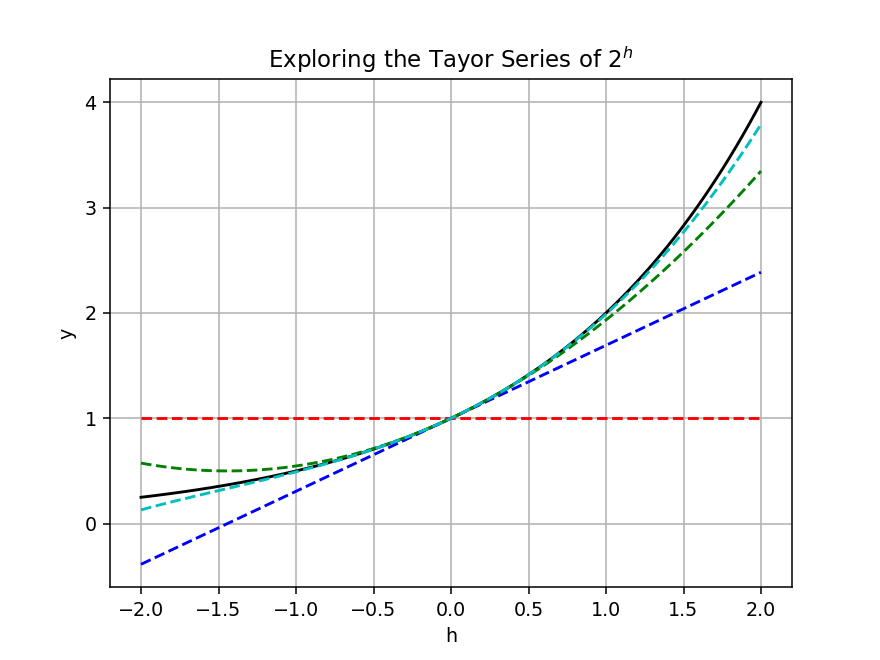

In [14]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAAA3AAAAKUCAYAAABFSNr3AAAgAElEQVR4XuydB3iVRdbHTxIg9N5EQZoIRGooigJSxGBDbKgIKIvYZUVFXNuuDSsqClZckeJHcVVApQgIggiEIr0ISkeE0FtI+Z4zcGMIuck955Z5J/m/z7PPSu6ceWd+Z2bu+d9pUenp6emEBwRAAARAAARAAARAAARAAARAwPMEoiDgPO8jFBAEQAAEQAAEQAAEQAAEQAAEDAEIODQEEAABEAABEAABEAABEAABEHCEAAScI45CMUEABEAABEAABEAABEAABEAAAg5tAARAAARAAARAAARAAARAAAQcIQAB54ijUEwQAAEQAAEQAAEQAAEQAAEQgIBDGwABEAABEAABEAABEAABEAABRwhAwDniKBQTBEAABEAABEAABEAABEAABCDg0AZAAARAAARAAARAAARAAARAwBECEHCOOArFBAEQAAEQAAEQAAEQAAEQAAEIOLQBEAABEAABEAABEAABEAABEHCEAAScI45CMUEABEAABEAABEAABEAABEAAAg5tAARAAARAAARAAARAAARAAAQcIQAB54ijUEwQAAEQAAEQAAEQAAEQAAEQgIBDGwABEAABEAABEAABEAABEAABRwhAwDniKBQTBEAABEAABEAABEAABEAABCDg0AZAAARAAARAAARAAARAAARAwBECEHCOOArFBAEQAAEQAAEQAAEQAAEQAAEIOLQBEAABEAABEAABEAABEAABEHCEAAScI45CMUEABEAABEAABEAABEAABEAAAg5tAARAAARAAARAAARAAARAAAQcIQAB54ijUEwQAAEQAAEQAAEQAAEQAAEQgIBDGwABEAABEAABEAABEAABEAABRwhAwDniKBQTBEAABEAABEAABEAABEAABCDg0AZAAARAAARAAARAAARAAARAwBECEHCOOArFBAEQAAEQAAEQAAEQAAEQAAEIOLQBEAABEAABEAABEAABEAABEHCEAAScI45CMUEABEAABEAABEAABEAABEAAAg5tAARAAARAAARAAARAAARAAAQcIQAB54ijUEwQAAEQAAEQAAEQAAEQAAEQgIBDGwABEAABEAABEAABEAABEAABRwhAwDniKBQTBEAABEAABEAABEAABEAABCDg0AZAAARAAARAAARAAARAAARAwBECEHCOOArFBAEQAAEQAAEQAAEQAAEQAAEIOLQBEAABEAABEAABEAABEAABEHCEAAScI45CMUEABEAABEAABEAABEAABEAAAg5tAARAAARAAARAAARAAARAAAQcIQAB54ijUEwQAAEQAAEQAAEQAAEQAAEQgIBDGwABEAABEAABEAABEAABEAABRwhAwDniKBQTBEAABEAABEAABEAABEAABCDg0AZAAARAAARAAARAAARAAARAwBECEHCOOArFBAEQAAEQAAEQAAEQAAEQAAEIOLQBEAABEAABEAABEAABEAABEHCEAAScI45CMUEABEAABEAABEAABEAABEAAAg5tAARAAARAAARAAARAAARAAAQcIQAB54ijUEwQAAEQAAEQAAEQAAEQAAEQgIBDGwABEAABEAABEAABBwmsXr2a4uLiaNq0aXTFFVc4WAMUGQRAQEMAAk5DDTYgAAIgAAIgAAIgYJnAqFGjqEePHpSUlERlypSxXBq8HgRAIFIEIOAiRRrvAQEQAAEQAAEQAIEQEnjkkUdo0qRJ9Ntvv4UwV2QFAiDgdQIQcF73EMoHAiAQFIHq1avT5s2b6ffffyf+70g9tt4brvr56jNr1iy6/PLLw/Ua5JvHCeS1fpHZXVu2bKEnn3ySZsyYQX/99RelpaXRc889R//+97/D5tU2bdrQueeeS9dccw0NHjyYeEklMx42bBi1a9cubO9FxiAAAnYJQMDZ5Y+3g4CzBDiInz17dq7lb9SoES1btizXdOFKYCtgtPVeDce3336b9u/fT3feeadfkesVARcVFaWpYsQFvKqQITbavXs3DRkyhL7//nszQ3Ps2DEqV64cVapUiZo1a0Zt27alrl27UvHixUP8Zv/ZudQvJFCSk5Opfv36tHHjRipVqhRdeOGFVLBgQerdu7f5n78nPT2d5s+fTxMnTqS5c+fSmjVr6ODBg1S6dGlq0qQJ9erVi26//XbKrt2zLb+Ll07WrVuX+vbtS7GxsfTYY4/RkSNHaOvWrZIqIC0IgIBDBCDgHHIWigoCXiLgE3BVq1alatWq+S3aBRdcQP/973+tFd1WwNihQwfavn27+TWefyH38hOIOAskTSTqeNlll2X7mnnz5pm/X3TRRSaozfpMmDCBKleuHIkieuIdLAp4Vob3RnHwz23wnHPOMYE9izkWHPz89NNP5I9pOCriUr+Q1J+XMV533XWG86pVq7Jtg9nlx+NDx44dMz6qWbOmEWS8YoB9x8/VV19NX375pRFnmZ9169YZ4XbDDTeYz30Pz7498MADxtdFixaVVANpQQAEHCEAAeeIo1BMEPAaAZ+AC/cSoWDrbUvABVvuSNoHIs4CSRPJMmd9l2+GAks8iQ4fPkx16tShnTt3mpMJ33vvPfNv33PixAliTp999hnxHqqWLVvadF2eePdrr71GTzzxBN188800bty4gOv0ww8/mJmzf/7zn3TrrbdSxYoVM2xHjhxJd999N7G/BgwYQK+++uoZ+Y4ZM4a6d+9uZu1YyPmeF198kbg8PJOHBwRAIG8SgIDLm35FrUAg7AQg4MKOOGIvCEScBZImYgXO5kUQcH9DYQHRrVs3szRy165dVKxYMZuuyRfv/s9//mP2uvGSRxbGgT4ssooUKWKWW2b3vPzyy/TUU09R2bJlzb666OjojGS8VJJnlv/4448zTFlEst95dhUPCIBA3iQAAZc3/YpagUDYCWgEXL9+/cyeHF7mtmjRIipcuPAZ5fzll1+odevWxHs7eH/dpZdemvF5ZgHBS4w4YOIAhWcbeL8J/4p97733nhHgsHFOM3AcPL311lv0v//9z+xd4ad27dpmSRLPTJQoUeIsjlnL8dJLL9GcOXNMcPXmm2+aX9Jzem9me15+ykHf9OnTzR60GjVqmP0yjz766Fn18BWEl2U+++yzZl8TL7HiPPiX+3/9619033330YgRI8ySVd7PltvDgeZdd93lN1nm2dVgys2HOXzxxRembEuWLDEzAzzTwMvp+NCHzLMHuZXZ3+eBCriVK1ea5WbMnANf3idWsmRJio+PN+2H94Rlfvbs2WOWxaWkpJhlbf6WC3O75vbNB0fMnDkzI4twtjF/LAYNGmTaA+9z434mfTT+CrZfcBk17+VZxldeeYWmTJlCfIgICxxuW7x0m5cmcj/2J478cZH4jPsvj0XZPeeff/5Z4krqC+4v3Db5YVHG+xd9D7c1Hgt5/Mr81KpVyyy75DaJBwRAIG8SgIDLm35FrUAg7AQ0Ao6XArVo0YKWL19u9mjw0i7fw0FT48aNTZCc3bJMX4DIv0i/8MILZl9PvXr1iANsPmWSn9tuu41Gjx59xoZ/fwKOgz0O8DZs2GCCPj6AgPPk/SscSLIo5OVN55133hksfflx0MZliYmJMeU4cOAAPfjggyaI58ffe31/Z+HI9Tx58qR5959//knbtm0ztlnZ+Aqwfv16I3BZdHBQykKYD6ZYu3YtXXzxxUYAslAKVMCxCGQBmpiYaJZpZd0/lvkABm25jx49SjfddJMRnPxUqVLFBNjMnffo8OwDC6rOnTsH1WYDFXDsc953xKKN94SxSGcRwMKYn4EDBxILoMwPz2bxrBYH6+yz7B4+cIIP6+F7uXhZGz/hbmP+gA0dOtS0Rd4LuGnTJjN7E+ij9Vew/ULzXj6kg8cTFjbcH/jHF55tZF/y3/iHoH379pkDQQJ9pD779NNPif/Hdlwen3jk93H7Gj9+fKCvzjYd72Vs1aqV+YzHGG63/HDdWLzxLNzTTz+dYctp+O/Dhw/P8ceZoAoFYxAAAesEIOCsuwAFAAE3CWgEHNeUj7nmmQEWHrzxnw9a4OeOO+4w4uuSSy4xM2ssjDI/vgCRA7Vrr73WBE2+wyr4F2g+qY1FyEcffWT2jfgef0KKD27ggy/4lEwWEPyrNT8sLHgWhoUcn9L3448/ZlsOLh8vl+JfuX1L1LhOLEj4yU3AcT3YnoWc7xRAFgk8m8YPi7LM+5Y4YOO9SjyjwgEdB4YshvhZunSp4cizgCwIAxVwWRnltH8sM39JuXmGj2f6mjdvTh9//LHhzQ+X8/nnnyfer8MBJx/IUKFCBXVnCFTA8ZIzDvT5x4LMD8908A8ALJI5aGZB7HtYyPNeMmbAgijriYC+WRIWCjt27MhoA+FuY/5g8SElPKuZmppq6sn7p7j85cuXz5Wv1l++9qHtF5r38mz3O++8Y36I4R8uMtePfxDhv/HMvOQgD63PfDNx0iWUuTnkoYceMj90ZT3Nl33Ms4zffvstXXXVVRnZcB9u3769GROytvHc3oXPQQAE3CEAAeeOr1BSEPAUgUCvEWCB4ltW6KvA+++/T/fff78JuHg2jgPknj17ml+XeRaDZ5KyPr4AkYN8nnHzCSVfumeeecaIAT7FjYMbX5CdnZDi5Zlcfp55Y6GWdQnfihUrTMDkW8rJdy1lFTsNGzY0ywGzCs2s6bLeP+crT1xcHP36669n2Xfp0sUcKc5H+/tm8zhPXpbHSw45GOX68a/7mR9eEtipUyfzp3AKOEm5WazzrB77mZlmXv7lK/v1119P33zzjZkJ5GV/2idQAZdT/j6hxkspuY36Hm4HLPpYvHEa9kPmh2e7eNaL2zT/Pz+RaGM51eWNN94wwo3LnrlN8o8nHODzPqmsgi4Yf/nataZfaN+bkJBAU6dOpa+//pq43wT7BOOzcAi4xYsXmx8SePkui1Hfjztcz7Fjx5p/8+xx5tNVeRk3L0vmpeWFChUKFgnsQQAEPEoAAs6jjkGxQMDrBAK9RoBFCAeLWR9f4M6zSRzcHzp06IzlZ1nT+wLE7Ja4cVpeVugTCDx7xUsg+clOwHEefKIbL9v77rvvskV95ZVX0rRp00wwxEslMwfBLCBff/11s3zJ35PbDFx2wpbz8u1fYlHw7rvvZmTPwTi/k5cj+luW5XtnOAWcpNy81JX36/Xp08fMvmX38L443q/HM0TMW/tIBBwvr+OAmGczud0cP37cvJZncHk5Kc908n7MzA8LTF6qxjO9PFPse9iGxTQv1eOAu2nTpuajSLSx3FjxDDMH9Lw/jGeHMz/8QwD7hk9O9D3B+MvX9jT9Qvtenmn/5JNPzI8//P/SvW5Z+QXjs1ALOJ5B5OWhvDSTVwRk3eeWm+/xOQiAQN4mAAGXt/2L2oFA2Ahol1D6CrR3717iX+t5yRk/vISSj8329/gCxM8//5x69OiRbTKeneM9cTyjw3cy8ZOdkOKAiH+1f/zxx81x29k9LM44+M0aPPnymzx5sjkoILfy+puB82fPS0P/8Y9/GFGT+f48n+DlYDfznpfM7/fN3oVTwEnKzcKdlywyM3934fHhLTwLyvsIeSZG+wQq4Hjmgvny/jt/D8+28VLazA+3Uz7AhEUCz3r49lWxEGRRl3WJWyTaWKCs+M43ntlmgckimQWdT7TyDxn84wA/wfgrmH6hfS/P3vPSXK4f932ekeODj3jps+ZgnGB8FkoBx/vY+IASXgbJB5jw7Ltv71ugPkc6EACBvE0AAi5v+xe1A4GwEQhWwHHBWAD5ZsB4+VLmpYpZC+4LEDn45Nmx7B5ersdiIPNBEtkJON9BFrzMjE98zO7hz1jgcVpenuh7Mp+2xwy0As7ffjPfyZBZ99L4ypx1aWXm9/v2EYZTwEnKzbNqvOQwkCfYE/sCEXAspjmw54Cfl0nyviveZ8gHmfBSWF4iyXsh/ZXFJ5B9yyW5Xr468l5I3q/keyLRxgLhml0aPn2T90xyX+G6848evNwuGH8F0y+CeS/PovKBQtxHfZeTc50bNGhgTqfMvD8sN17B+CxUAo6XPjIPngHm5co8LpYrVy63ouNzEACBfEYAAi6fORzVBYFQEQhWwPFhI/fcc4/Zh8anPnJgzTME/g4c8NoMXG4XRue2hFIihNhnXpmBk5TbN6OR27K6ULTJQAQcB/S8JJavieCDa7I+LAZ42Zo/Acezj3yADs+K8FJLXkrLey55Vo5n6DKf9hjMbE6gYigYbnz4he8AId+BF8H4K9Ay5zQjHkw74SWiCxYsMFd68GFALE5ZlPOBSHwwUiBPMD4LhYDjkzh5WTfXgX9YYPGWeX9bIHVAGhAAgfxBAAIuf/gZtQSBkBMIRsDxHjUOgjlg4SV2vL+Ig0gWdB988EG2Zc1tDxyfwMhHePMTij1wvgMS/O2Bi7SA8+2B4+VmHKBm9/DhLzy7Ip2B89kFcgqlRMD5DpbhPUq81y2cTyACjtsX/3CQdbbMVy7ec/jwww/7FXB8qiOLOz6mng+g4X1JPPvDh0nwUsrMTyD7qYJtY8Hw5D7Cy1b54dke3vcXjL+CEXDBvDc7BvyDEItTvrqCr8LgI/UDeYLxWbACjpe08o8DPGPNLFl4Zr3CJJA6IA0IgED+IAABlz/8jFqCQMgJaAUcL3Pik9VYsPHF08OGDTNHyPPhDyzo/J0o5wsQWaTxzEfWS8D5QAbeH8ZihC/lDuYUSv71npdg8Ql+/Gs4373me4IJVDmP3Oz9LaH0nULJVxZw/bKe6Mh3m/ESMH6kAo7voVuzZo1ZzurvPjZNuVnk8FHmPKvK+fu7BDsUjTMQAceXOvMS1KyinN/PATTvyeS9bzkt5/SJDV4uyddgsGDm5Xs+9r665HaiYSjamD9u/GMGnzCZ9bqDzOlZ1PDhMjwDzgdmcPpg/JVb+8jafzLvDQ3mvf4Y8Im07KucDirKahuMz4IRcHylBs+wc/9j0cZjTnYn8YainyAPEACBvEEAAi5v+BG1AIGIE9AKON5zNnjwYPPrPy+Z9F0H4FtSyfs9+HAC3x1nWQM/Xq7GwQ6fOufb2M+HlvAsCAfhPIPHMy05BYz8GYuyuXPnGoHBy+l4KRw/LI54KRWfjJnTPXCRnoHLfA8c31XFs3C+qwT4gAr+9Z4Dcc09cGzLywNzOtQltwDdn/D03e/FB4PwSZRZ9w3yTBDPXvFF2OxX7ROIgPvqq6/M8km+P5BFFx+AwQ+fRMkzNSyCuQ3lJOBYsPE+ORY+fLw7p2Uxkp1YCncb88eKRSoLNL7WgOubWezzDyhjxowxV3vwYRnMnLn4Hq2/cmsfufVHzXu5n3Mf5fbLe/l8D9/lx3vfuC+ziOP7BgN9tD7TCjie1eX7B/lkWV4uyeKN73fDAwIgAAI5EYCAQ/sAARBQEQj0GgHOnIUSP3wCHi8bYxHG+1WyXjTr24PCsxmcNnNQ7AsQ+Uh/Dsg4gOaZIz6AgYNqfm655Rb6v//7v2ztsp4Gycdz831efKca58UHoLBI4pkRXoLFe1A4oM+6jCnYQDU3e39CiOvHgSkHmCw4mCGXmY+x59MbeQkci1AWQzmd1Jmds5kZB5H8sNBi8czs+SRM/h8/2nKzIOLDVXx7zngGlfNiockzqUlJSSZ/Fnc8I6R9AhFwHCzz6X68PI3Tc6DMM5orV640/+YLk/ni59wOVPFdMcFl5cD9ueeey7bY4W5j/ljx5daZ716sWrWqEQd8QAaXyXcCJ/c/vkfNt/SY89P6K7f24Surv72hmvdy+X13KbKo5gvhuT1xn+a+zCeDsiCSnOCo9ZlWwPlOMfX1MX+ntfLnvMSXf+jAAwIgAAIQcGgDIAACKgKBXuTNmXMwxUKLlyXyHVz+Tn/kqwU46OI9RlkPNMgcIHKgxgETB+IclLLY4sCbZxxYjGV+/AWMnObgwYNmNpDFBZ9AyA8HgnzXGi+3y/yrftYANNIzcL73b9u2zQgGXm7Fd49xwMfClWca+ORK3lOoudj4ww8/NCKKZ8R8AT6/hzkHI+B85eblhry0k4U7L/HjoJrL7pt5Y1GU9XJ2ScMMRMBxflw3rhPPYPJ1AHzwCB89/9RTT5n/5qVruQk4tu3WrZtpa/zDQE5LQ8PZxvzxYXH8888/mx9B+MeTrVu3mn7HP0zwcfvcx2688UZzHUeBAgWyzUbqr2AFnKadcB/kcvI4wP2CxxhuQzy7z32Y71LUtCmNz7QCzveDTSBtPbcxJ5A8kAYEQCBvEICAyxt+RC1AIM8TCDRAzPMgcqig7xoFXlLJQTqe8BDgmTreA9epUyczg4UHBEAABEAABCJJAAIukrTxLhAAATUBCLic0S1cuNAso+RZJN4L529mRe0AGGYQ8C3d45k4PhUUDwiAAAiAAAhEkgAEXCRp410gAAJqAhBwZE5I5KPR+Vj+0qVLZ7CcN28e3X777WZ/Ex+FPmjQIDVnGOZMYOTIkYY/7yvjQzJ4LyIeEAABEAABEIgkAQi4SNLGu0AABNQEIODIXB7NJyfyfi8+XIVPoeQLpHn/Dz+tWrUypyv6uwxdDT+fG/L+MT7ldP/+/ebQDH6kB8Xkc4SoPgiAAAiAQAgJQMCFECayAgEQCB8BCDgyh5a8+eab5nAKPsGR/82HNPBpnCww7r33XoqNjQ2fE/JpznzKKR9uwstS+aTP/v37n3FVRT7FgmqDAAiAAAhYIgABZwk8XgsCIAACIAACIAACIAACIAACUgIQcFJiSA8CIAACIAACIAACIAACIAAClghAwFkCj9eCAAiAAAiAAAiAAAiAAAiAgJQABJyUGNKDAAiAAAiAAAiAAAiAAAiAgCUCEHCWwOO1IAACIAACIAACIAACIAACICAlAAEnJYb0IAACIAACIAACIAACIAACIGCJAAScJfDBvDYuLo6SkpKoVq1awWQDWxAAARAAARAAARAAARAIKYGNGzdS2bJladWqVSHNF5n9TQACzsHWwJf3HjlyhBo2bBjx0h88eNC8s2TJkhF/t8svBDe598BMzowtwE3ODczkzNDWwExHQGeFPirnZpPZ8uXLqVixYrRz5055wWEREAEIuIAweSvRZZddZgo0d+7ciBfsp59+Mu9s3bp1xN/t8gvBTe49MJMzYwtwk3MDMzkztDUw0xHQWaGPyrnZZGYzTpWTctMCAs5Bv9nsGDYHBAddlVFkcJN7D8zkzBBUg5mOgM4KfVTODczkzDCuucfMZpyqo+WeFQScez4jmx0DXz66BgNucm5gJmeGQAfMdAR0Vuijcm5gJmeGcc09ZjbjVB0t96wg4NzzGQScgz7Dl7bcaWAmZ4ZAB8x0BHRW6KNybmAmZ4ZxzT1mEHA6n0msIOAktDyS1mbHwJePrhGAm5wbmMmZIdABMx0BnRX6qJwbmMmZYVxzj5nNOFVHyz0rCDj3fIYZOAd9hi9tudPATM4MgQ6Y6QjorNBH5dzATM4M45p7zCDgdD6TWEHASWh5JK3NjoEvH10jADc5NzCTM0OgA2Y6Ajor9FE5NzCTM8O45h4zm3GqjpZ7VhBw7vkMM3AO+gxf2nKngZmcGQIdMNMR0Fmhj8q5gZmcGcY195hBwOl8JrGCgJPQ8khamx0DXz66RgBucm5gJmeGQAfMdAR0Vuijcm5gJmeGcc09ZjbjVB0t96wg4NzzGWbgHPQZvrTlTgMzOTMEOmCmI6CzQh+VcwMzOTOMa+4xg4DT+UxiBQEnoeWRtDY7Br58dI0A3OTcwEzODIEOmOkI6KzQR+XcwEzODOOae8xsxqk6Wu5ZQcC55zPMwDnoM3xpy50GZnJmCHTATEdAZ4U+KucGZnJmGNfcYwYBp/OZxAoCTkLLI2ltdgx8+egaAbjJuYGZnBkCHTDTEdBZoY/KuYGZnBnGNfeY2YxTdbTcs4KAc89nmIFz0Gf40pY7DczkzBDogJmOgM4KfVTODczkzDCuuccMAk7nM4kVBJyElkfS2uwY+PLRNQJwk3MDMzkzBDpgpiOgs0IflXMDMzkzjGvuMbMZp+pouWcFAeeezzAD56DP8KUtdxqYyZkh0AEzHQGdFfqonBuYyZlhXHOPGQSczmcSKwg4Ca0g095///30/vvvm1z27dtHpUuXVuVos2Pgy0flMgI3OTcwkzNDoANmOgI6K/RROTcwkzPDuOYeM5txqo6We1YQcBHy2Y8//kjt27enokWL0pEjRyDgIsTdK6/Bl7bcE2AmZ4ZAB8x0BHRW6KNybmAmZ4ZxzT1mEHA6n0msIOAktJRpWbA1bNiQGjVqRElJSTR79mwIOCVLV83wpS33HJjJmSHQATMdAZ0V+qicG5jJmWFcc48ZBJzOZxIrCDgJLWXaBx98kEaPHk2rV6+m2267DQJOydFlM3xpy70HZnJmCHTATEdAZ4U+KucGZnJmGNfcYwYBp/OZxAoCTkJLkZZn29q1a0effPIJ9e7dmy6//HIIOAVH103wpS33IJjJmSHQATMdAZ0V+qicG5jJmWFc0zEbMGAAXXLJJdS1a1ddBkFYQcAFAS9AUwi4AEFpkh09etQsnaxRowZNnz7dZCERcL4OkPXdy5cvp+rVq9PQoUM1xQrK5uDBg8a+ZMmSQeWT34zBTe5xMJMzYwtwk3MDMzkztDUw0xHQWaGPyritWbOG7rnnHoqNjaU77riDevXqJcsgyNQPPPCAiRPnzp0bZE4w90cAAi6MbePhhx+m4cOH08qVK42Ig4ALI2yPZ40vH7mDwEzODEE1mOkI6KzQR+XcwEzODOOajFl6ejo98sgjtGTJEmPYo0cPuvvuu2WZBJkaAi5IgAGYQ8AFAEmThJdJtG3blgYPHkz//Oc/M7KQzMD5e6/NqWks/9C0BsI1AgpsaGsKaIS2pqGGtqahhramoYa2pqGGtiahNm3aNLryyiuNCc+CbdmyhUqVKiXJIui0NuPUoAvvSAYQcGFwVEpKCtWrV4/KlStHP//8M0VHR0PAhYGzS1niS1vuLTCTM2MLcJNzAzM5M7Q1MC+qIKMAACAASURBVNMR0FmhjwbGLS0tjeLj42nZsmXGgA/Re/fddwMzDmEqCLgQwvSTFQRcGBjv37+fypQpE1DOv//+u9nPJnlsdgwMohJP/Z0W3OTcwEzODEE1mOkI6KzQR+XcwEzODONa4MzGjBlD3bt3NwaVKlWiUaNGUceOHQPPIEQpbcapIaqC57OBgAuDi44dO0YPPfRQtjl/++23tGvXLrMmuVChQvTqq6+amTrJY7Nj4MtH4ikIOB2tU1Zoazp64CbnBmZyZuijYKYjoLNCH82dW3JyMtWtW5d4YoCff/3rX5SQkECtW7fO3TjEKWzGqSGuimezg4CLsGuwBy7CwD3yOnz5yB0BZnJmCKrBTEdAZ4U+KucGZnJmGNcCY8ZLJfnwPH4aNGhAQ4YMoZiYGAi4wPA5lwoCLsIug4CLMHCPvA5f2nJHgJmcGQIdMNMR0Fmhj8q5gZmcGca13Jnx6aa1atWiPXv2mMS82qtEiRLmvzEDlzs/F1NAwEXYaxBwEQbukdfhS1vuCDCTM0OgA2Y6Ajor9FE5NzCTM8O4ljuz5557jp5//nmTkE9AnzVrVsYdbBBwufNzMQUEnINes7m2GF8+ugYDbnJuYCZnhkAHzHQEdFboo3JuYCZnhnEtZ2Z8rkLt2rXpyJEjJuH8+fPp4osvtrqP3Gacqmth7llBwLnnM7LZMfDlo2sw4CbnBmZyZgh0wExHQGeFPirnBmZyZhjXcmbGl2YPGzbMJLrhhhvoyy+/NP9ts63ZjFN1Lcw9Kwg493wGAeegz2wOpA7isv7l4yoz21/arnJD/9R5Dtzk3MBMzgzjmn9mv/32m7l3mO8f5gNLVq1aRRdeeKH171AIOF07l1hBwEloeSStzY6BLx9dIwA3OTcwkzNDoANmOgI6K/RROTcwkzPDuOafWbdu3WjcuHEmQd++fenDDz/MSGyzrdmMU3UtzD0rCDj3fIYZOAd9ZnMgdRCX9V8PXWWGQEfnOfRPcNMRkFuhrcmZYVzLnhnvdWvVqpX5sEiRIsSzcVWqVIGA0zUx56wg4JxzGUHAOegzfGnLnQZmcmYIdMBMR0BnhT4q5wZmcmYY185mlp6ebmLBn3/+2Xz4zDPPZJxC6Utts61hBk7XziVWEHASWh5Ja7Nj2BwQPIJfVQxwk2MDMzkzBDpgpiOgs0IflXMDMzkzjGtnM/vf//5HN954o/mgUqVKtGHDhox73yDgdG3MNSsIONc8RpiBc9BlVk+DcpEXvrD1XkOAKGcHZnJm6KNgpiOgs0If/ZtbcnIyxcXFmSWT/PC+N97/lvWxyczmRIOuhblnBQHnns+whNJBn9kcSB3EZYoMZjrPgZucG5jJmaGPgpmOgM4KffRvbkOGDKF+/fqZP/AJlMuXL6cCBQpAwOmalrNWEHAOus7mLxsYRHUNBtzk3MBMzgxBNZjpCOis0Efl3MBMzgzj2t/M9u/fby7t3rt3r/nj5MmT6eqrr84Wqs22ZjNO1bUw96wg4NzzGWbgHPSZzYHUQVymyGCm8xy4ybmBmZwZ+iiY6QjorNBHT3F74okn6LXXXjP/3b59e/rhhx8oKioKAk7XrJy2goBz0H02f9nAIKprMOAm5wZmcmYIqsFMR0BnhT4q5wZmcmYY104x++OPP6hu3bp04sQJI9oWL15MTZo08QvUZluzGafqWph7VhBw7vkMM3AO+szmQOogLlNkMNN5Dtzk3MBMzgx9FMx0BHRW6KNE3bt3pzFjxhiAPXr0oM8//zxHmDaZQcDp2rnECgJOQssjaW12DJsDgkfwq4oBbnJsYCZnhqAazHQEdFboo3JuYCZnhnGNKDExkZo3b27gFS5cmNatW0fVqlWDgNM1pzxhBQHnoBsh4NxzGr605T4DMzkzBDpgpiOgs0IflXMDMzmz/D6u8aXd7dq1o9mzZxt4Tz75JL388su5grTZ1mzGqbmCySMJIOAcdKTNjmFzQHDQVRlFBje598BMziy/Bzo6YliuC25aAnI7jGtyZvl9XMt8aXf58uXN/W+lSpXyC3Lr8eNUtXBhq9sQbMapuhbmnhUEnHs+wx44B32GL22508BMziy/Bzo6YhBw4KYlILfDuCZnlp/HNT6wpH79+rRp0yYD7v3336d7773XL8S1R45Q48REuq1SJbpp924qGRVFrVu31kEPwgoCLgh4AZpCwAUIykvJbHYMfPnoWgK4ybmBmZxZfg50dLROWaGt6eiBm5wbmMmZ5ec++vrrr9OAAQMMtLi4OFq2bFm2l3bz52np6XT5smX004EDJn2XqCh6NDoaAk7X5DxvBQHneRedXUAIOPechi9tuc/ATM4sPwc6OloQcOAWDAG5LcY1ObP8Oq7t3r3bXNp96NAhA23atGl0xRVX+AX44Y4ddO/69ebzcgUK0H/T0qg0ZuB0Dc4BKwg4B5yUtYgQcO45DV/acp+BmZxZfg10dKT+tkJb0xEENzk3MJMzy6/jGi+V/PDDDw2wq6++miZPnuwX3nZearlwIR1MTTVpPq9bl6pv2GD+G0sodW3O61YQcF73UDblg4Bzz2n40pb7DMzkzPJroKMjBQEHbsESkNtjXJMzy4/j2vLly80l3WlpaWbJ5IoVK8wl3tk9fEpl15Ur6Zu9e83HncqUoSkNG9LcuXMh4HTNzQkrCDgn3HRmISHg3HMavrTlPgMzObP8GOjoKJ1phbamowhucm5gJmeW38Y1FmS8VHLGjBkGVr9+/ejtt9/2C+7Lv/6im1atMp8XjY6mlc2bU40iRazu7bUZp+pamHtWEHDu+QynUDroM3xpy50GZnJm+S3Q0RE62wptTUcS3OTcwEzOLL+Na5MmTaLrrrvOgCpTpoy5NqBs2bLZgtt38iTVX7SIdiUnm88H16pFj1Stav7bZluDgNO1c4kVBJyElkfS2uwYNgcEj+BXFQPc5NjATM7M9pe2rsT2rdDWdD4ANzk3MJMzy0/jWnJyMl100UW04fT+tSFDhtBDDz3kF1qftWtp+K5d5vPmJUrQ/KZNKSYqCgJO18ycsoKAc8pdpwoLAeee0/ClLfcZmMmZ5adAR0cneyu0NR1NcJNzAzM5s/w0rr311lvUv39/A4n3vPFeuIIFC2YLjS/srrNwIR3nfXJRUZQYH0+NihfPSGuzrdmMU3UtzD0rCDj3fAYB56DPbA6kDuKy/uuhq8zyU6ATSh+hf+pogpucG5jJmeWXcW3Pnj3m2oADp+9x+/bbb+mqq67KERhf3P2PdeuofZky9EKNGmektdnWIOB07VxiBQEnoeWRtDY7hs0BwSP4VcUANzk2MJMzyy+Bjo6Mfyu0NR1RcJNzAzM5s/wyrmW+NqBTp040ZcoUijq9HDInaqnp6eYS74LR0RBwuublpBUEnINug4Bzz2n40pb7DMzkzPJLoKMjAwEHbqEmIM8P45qcWX4Y15YuXUrx8fHEJ1DytQG8dLJevXo6WKetbLY1m3FqUNAcMoaAc8hZvqLa7Bg2BwQHXZVRZHCTew/M5MzyQ6Cjo5KzFdqajiq4ybmBmZxZXh/XWLTxZdvz5s0zcB555BEaPHhwtqCOpabSpL176eYKFXKdnbPZ1mzGqboW5p4VBJx7PsMeOAd9ZnMgdRCXKTKY6TwHbnJuYCZnhj4KZjoCOqu83EfHjBlD3bt3N2AqVqxI69evp1KlSmULauDGjfTq1q2UULYsfVSnDlUtXNgvUJvMIOB07VxiBQEnoeWRtDY7hs0BwSP4VcUANzk2MJMzQ1ANZjoCOiv0UTk3MJMzy8vj2uHDh+nCCy+kHTt2GDDDhw+n3r17Zwtp8aFD1HLxYko9/emPjRtT29KlIeB0Tcp5Kwg4B10IAeee0/ClLfcZmMmZ5eVAR0cjMCu0tcA4ZU0FbnJuYCZnlpfHtaeeeopefvllA6VZs2a0YMECis5yGAl/lpyWRs0XL6blR46YtPdWqULv16mTI0ybbc1mnKprYe5ZQcC55zMsoXTQZzYHUgdxmSKDmc5z4CbnBmZyZuijYKYjoLPKi31048aNVL9+feLLu/mZP38+XXzxxdkCev6PP+i5P/4wn1WNjaWVzZtTyQIFIOB0zSlPWEHAOehGm79s5MVBNBJNANzklMFMzgxBNZjpCOis0Efl3MBMziyvjmtdunShiRMnGiC9evWizz77LFs4yw8fpmaLF9PJ9HTz+fcNGlBCuXK5grTZ1mzGqbmCySMJIOAcdKTNjmFzQHDQVRlFBje598BMziyvBjo6EoFboa0FzipzSnCTcwMzObO8OK7xHW+dO3c2MEqUKEHr1q2jc8455yw4J9PSqOWSJbT08GHzWc9KlWhEgNcL2GxrNuNUXQtzzwoCzj2fYQmlgz6zOZA6iMsUGcx0ngM3OTcwkzNDHwUzHQGdVV7qo7xksmHDhka08fP666/TY489li2YF/74g549vXSySqFCZulkmYIFA4JokxkEXEAuCioRBFxQ+OwY2+wYNgcEO7RD81Zwk3MEMzkzBNVgpiOgs0IflXMDMzmzvDauvfHGG/T4448bEHXq1KEVK1ZQoUKFzgKTdenk5AYN6OoAlk76MrLZ1mzGqboW5p4VBJx7PsMMnIM+szmQOojLFBnMdJ4DNzk3MJMzQx8FMx0BnVVe6aPbtm2junXr0pHTp0l+9913GUsps5L5du9eumPNGtqfkkK9KlWizwJcOgkBp2tjrllBwLnmMSIIOAd9lle+fCKJHsx0tMFNzg3M5Mwg4MBMR0BnlVf66K233kpjx441EK6//nr66quvcgSy48QJevr33+nNWrUCXjoJAadrY65ZQcC55jEIOAc9htkkjdPyyhe2pu7B2ICbnB6YyZlBwIGZjoDOKi/00RkzZlDHjh0NgCJFitDq1aupevXqOiABWNlkhiWUATgoyCQQcEECtGFus2PYHBBssA7VO8FNThLM5MwQVIOZjoDOCn1Uzg3M5MzywrjGB5c0atSI1q5dawC8+OKLxJd4h/Ox2dZsxqnhZOqlvCHgvOSNAMtis2PYHBACxOPJZOAmdwuYyZnlhUBHV+vgrNDWdPzATc4NzOTM8sK49uqrr9LAgQNN5WvXrk0rV66k2NjYs2C8tmUL8W1vj553HhWIjtbBOm1ls63ZjFODguaQMQScQ87yFdVmx7A5IDjoqowig5vce2AmZ5YXAh1drYOzQlvT8QM3OTcwkzNzfVzbunWrObjk6NGjpvLff/89JSQknAXi18OHqfnpC7tblChBsxo3pqIxMTpglg8CsxmnqoE5ZggB55jDuLg2Owa+fHQNBtzk3MBMzsz1QEdX4+Ct0NZ0DMFNzg3M5MxcH9duvvlmmjBhgqn4DTfcQF9++eVZEE6kpVGLxYtp+enTKe+sXJn+W7euDtZpK5ttzWacGhQ0h4wh4Bxylq+oNjuGzQHBQVdlFBnc5N4DMzkz1wMdXY2Dt0Jb0zEENzk3MJMzc3lcmzZtGl155ZWm0nxwCe+Bq1at2lkQntq0iV7essX8vWpsLK1o3pxKFSiggwUBFxQ3V4wh4FzxVKZyQsC55zR8act9BmZyZi4HOrrahsYKbU3HEdzk3MBMzszVce3EiRPUsGFDWr9+van0yy+/TE8++eRZAH45cIAuXbqU0k5/Mr1hQ+pYtqwOVCYrm23NZpwaNDhHMoCAc8RRmYtps2PYHBAcdFVGkcFN7j0wkzNzNdDR1TR0VmhrOpbgJucGZnJmro5rLNh8J03WqVOHli9fftbBJUdTU6lJYiKtP3bMgLm/ShUaWqeODlIWK5ttzWacGhJ4DmQCAeeAk7IW0WbHsDkgOOgqCLggnIa2poMHbnJuYCZn5mpQratp6KzQ1nQsXeO2adMmiouLo+PHj5sKT506lTp16nRW5f+5YQO9s327+XutwoXp1+bNqVgQB5dkfoFNZjbjVF0Lc88KAs49n+EQEwd9ZnMgdRCXKTKY6TwHbnJuYCZnhj4KZjoCOiuX+mh6ejpdddVVNGXKFFPZW265hcaOHXtWxWft20ftf/3V/D2Kv/OaNKFLS5XSAcrGyiYzCLiQudFvRhBw4Wcc8jfY7Bg2B4SQg4xghuAmhw1mcmYIqsFMR0BnhT4q5wZmcmaujWvjx483oo2fkiVL0po1a6hKlSpnVDw5LY0uXLiQ/jg9Q/d41ar0Wq1aOjh+rGy2NZtxakghejgzCDgPO8df0Wx2DJsDgoOuyigyuMm9B2ZyZq4FOroaht4KbU3HFNzk3MBMzsylce3gwYPmzredO3eair777rv04IMPZlvpaUlJ9I9166hkTAwtjo+nwiFaOul7mc22ZjNO1bUw96wg4NzzGZZQOugzmwOpg7hMkcFM5zlwk3MDMzkz9FEw0xHQWbnSR/v160dDhgwxlWzWrBn98ssvFJODMNt/8iTtPnmS6hQtqgOTg5VNZhBwIXfnWRlCwIWfccjfYLNj2BwQQg4yghmCmxw2mMmZIagGMx0BnRX6qJwbmMmZuTKuLV68mFq0aEFpaWkUHR1NCxcupPj4eF2FQ2Bls63ZjFNDgM6JLCDgnHDTmYW02TFsDggOuiqjyOAm9x6YyZm5EujoahY+K7Q1HVtwk3MDMzkzF8a11NRUatmyJbGI4+fhhx+md95554zK8uEmK44coYbFi+sgCK1stjWbcaoQk7PJIeAcdJ3NjmFzQHDQVRBwQTgNbU0HD9zk3MBMzsyFoFpXq/Baoa3p+HqdG+91Y9HGDx9YwgeX8AEmmZ8Ru3bRnWvXUv/zzqOXatQI+Z63rGRtMrMZp+pamHtWEHDu+Qx74Bz0mc2B1EFcpshgpvMcuMm5gZmcGfoomOkI6Ky83Ed37NhhDi45dOiQqRyfQnnTTTedUdE/jh2jhomJdCg11fx9RN261LNyZR2MAK1sMoOAC9BJQSSDgAsCni1Tmx3D5oBgi3co3gtucopgJmeGoBrMdAR0Vuijcm5gJmfm9XGNrwxg0cYP3/82efJkiorim91OPanp6dRu2TL66cAB8+8ry5Sh7xs2PCONjkrOVjbbms04NRwsvZgnBJwXvZJLmWx2DJsDgoOuyigyuMm9B2ZyZl4PdHQ1Cr8V2pqOMbjJuYGZnJmXxzUWa9dee62pVJEiRWjVqlVUo0aNMyr5+pYtNGDTJvO3MgUK0MrmzalKbKwOhMDKZluzGacKEDmdFALOQffZ7Bg2BwQHXQUBF4TT0NZ08MBNzg3M5My8HFTrahMZK7Q1HWcvcuMlk/Xr16dt27aZSr3yyiv0xBNPnFHBXw8fpuaLF9PJ9HTz93H169PNFSvqIAitbDKzGacKMTmbHALOQdfZ7Bg2BwQHXQUBF4TT0NZ08MBNzg3M5Mwg4MBMR0Bn5cU+yoeW8OEl/DRq1IgWLVpEBQsWzKjg8dRUarFkiTl5kp87KlWikfXq6QAorGwysxmnKlA5aQIB56DbbHYMmwOCg66CgAvCaWhrOnjgJucGZnJmEHBgpiOgs/JaH+ULulu1akV8NQDf+bZgwQJzcXfm57HffqM3T8/OnRcbSyuaNaPSmQSejkRgVu8tfI+2bNpC1557LbVu3TowoxCmshmnhrAans4KAs7T7sm+cDY7htcGUVfcB25yT4GZnBmCajDTEdBZoY/KuYGZnJnXxrXk5GRzQffKlStNZR555BEaPHjwGRX7ISmJrli+PONvMxo1ovZlyugqL7Qav2o8dZvQjdIpne6qcRcN7zE87AemZC2izThViMvZ5BBwDrrOZsfAl4+uwYCbnBuYyZl5LdDR1SDyVmhrOubgJucGZnJmXhvXXnrpJXr66adNRc4//3wj5IpnuZx76Pbt1G/DBuJLA/jetzdr19ZVXGg1+4/Z1GlUJ0pOTTaWCZUT6Lu+30HACTm6kBwCzgUvZSkjBJx7TsOXttxnYCZn5rVAR1eDyFuhremYg5ucG5jJmXlpXFu/fj01bNiQTpw4YSry/fffU0JCQraVWnjwIL22ZQuNrl+fYqOjdRUXWg1fMpz6Tu5Laelp1LJsSxrUcBC1a9tOmEvwyW3GqcGX3o0cIODc8NMZpbTZMfDlo2sw4CbnBmZyZl4KdHSlt2OFtqbjDm5ybmAmZ+aVcS0tLY3at29Ps2fPNpXo3r07jRo1SlehMFp9vfZrGjx/MD1V/SkqWqAo9sCFkbXNrCHgbNJXvhsCTgnOohm+tOXwwUzOzCuBjq7k9qzQ1nTswU3ODczkzLwyrn3yySd09913mwqUK1eO1qxZQxUqVNBVKMxWfLjK3LlzzVtwiEmYYVvKHgLOEvhgXgsBFww9O7b40pZzBzM5M68EOrqS27NCW9OxBzc5NzCTM/PCuLZz506qV68eHThwwFRgxIgR1LNnz4zKnExLoy4rV1Kfc86hGyIo6o6dPEa/7/+d6leofxZYm23NZpyqa2HuWUHAueczstkxbA4IDroqo8jgJvcemMmZeSHQ0ZXarhXamo4/uMm5gZmcme1xjWezbrjhBvr6669N4a+44gqaOnXqGQeDPL1pE720ZYv5/PGqVem1WrV0FRVYpaSl0M3jb6YZm2bQV92+og41O5xhbbOt2YxTBQidTgoB56D7bHYMmwOCg66CgAvCaWhrOnjgJucGZnJmtoNqXYntW6Gt6Xxgk9u4ceOoW7dupuBFixalFStWUM2aNf/+ft+/ny5ftozSTv9l0kUX0TXly+sqGqAVi8p7Jt9DHy/5+FS5Chal3/v9ThWLVfRE3GEzTg0QofPJIOAcdKHNjmFzEHXQVZ4YSF3lhram8xy4ybmBmZwZBByY6QjorGz10T179lD9+vXpr7/+MgV/++23qV+/fhmV2H/yJDVOTKTNp0+lvL9KFRpap46ukgKrZ2c9Sy/MeSHDYsT1I6hno7+XdNrunzbjVAFGp5NCwDnoPpsdw9Yg6qCbzigyuMk9CGZyZra/tHUltm+FtqbzAbjJuYGZnJnNcY1PmhwzZowpdKtWrWjOnDkUExNj/s2zYN1Wr6bxp8VdvaJFKTE+noqe/lxX09ythi0aRg9890BGwtc6vkaPX/r4WYY225rNODV3gnkjBQScg3602TFsDggOuiqjyOAm9x6YyZnZDHR0pfWGFdqazg/gJucGZnJmtsa1iRMnUpcuXUyBY2NjadmyZVS3bt2MCgzfuZP6rFtn/l0oKooWxsdToywXeutq699qwuoJdMv4Wyid0k2i/hf3pzc6vZHtRd0225rNODXUzL2aHwScVz2TQ7lsdgybA4KDroKAC8JpaGs6eOAm5wZmcma2gmpdSb1jhbam80Wkue3fv98sneTTJ/kZNGgQDRw4MKPwa48cofjFi+lo2qmdb0Nq16aHzjtPV7kArWb9PosSRidQcmqysejeoDt93vVzio7K/pLwSDPLXA2bcWqAOJ1PBgHnoAttdgybA4KDroKAC8JpaGs6eOAm5wZmcmYQcGCmI6CzinQf7dOnDw0fPtwUtmnTprRgwQIqUKCA+feJtDS6eMkSWnb4sPn3NeXK0cSLLsp2FkxX27Otlu5cSm0/a0uHkg+ZD6+sdSVNvG0iFYop5PcVkWYGARcqbweWDwRcYJw8lQoCzlPuCKgwNgfSgArowURgpnMKuMm5gZmcGQQcmOkI6Kwi2UenT59OnTp1MgVl0ZaYmEiNGjXKKPgnO3bQ3evXm3+fU6gQ/dqsGVUo5F9I6Wp8plXXsV3p67WnrjFoXqU5zew1k4oXKp5j1pFklrUgNuPUUPB2IQ8IOBe8lKWMNjuGzQHBQVdlFBnc5N4DMzkzBNVgpiOgs0IflXMDMzmzSI5rhw8fposuuog2b95sCvrMM8/Q888/f0ah+fCSodu304BNm2hSgwbUoUwZXaUEVkeSj9BN42+ijUkbaV7veVShWIVcrW22NZtxaq5g8kgCCDgHHWmzY9gcEBx0FQRcEE5DW9PBAzc5NzCTM4tkUK0rnTet0NZ0fokUtwceeICGDRtmChkXF0eLFy82B5hk9+xOTqaKYZ55y/xe3vu29+heOqfEOQFBjBSz7ApjM04NCE4eSAQB56ATbXYMmwOCg66CgAvCaWhrOnjgJucGZnJmEHBgpiOgs4pEH50xYwZ17NjRFDA6Oprmz59PLVq00BU4SKvjKccpJiqGCsYUVOcUCWb+CmczTlUDc8wQAs4xh3FxbXYMmwOCg66CgAvCaWhrOnjgJucGZnJmEHBgpiOgswp3Hz148CA1aNCAtmzZYgrIJ07yyZO+Z8SuXXRJyZJUp2hRXQUEVilpKXTjuBspLT2Nxt40looW1L0z3MxyqpLNOFWA2umkEHAOus9mx7A5IDjoKgi4IJyGtqaDB25ybmAmZwYBB2Y6AjqrcPfRvn370scff2wKl3Xp5LwDB6jt0qVUODqa3q9Th3pUrqyrRABWvL+u98Te9Nmyz0zqy6tfTjN6zvB7VUBOWYabGQRcAA4NYxIIuDDCDVfWEHDhIhu+fG0OpOGrVXhzBjMdX3CTcwMzOTMIODDTEdBZhbOPTpkyhTp37mwKFhMTY64MiI+PN/9OOnmSGicm0tYTJ8y/e1euTMMzXeatq41/qwHTB9DrP7+ekWBU11HUvWF31WvCySy3AtmMU3MrW175HALOQU/a7Bg2BwQHXZVRZHCTew/M5MwQVIOZjoDOCn1Uzg3M5MzCOa7xhd186uT27dtNwTKfOsmzYdevXEkT9+41n9UrWpQWxcdTsZgYXSVysXp17qs0cMbfl4W/feXb1O/ifup32WxrNuNUNTDHDCHgHHMYF9dmx7A5IDjoKgi4IJyGtqaDB25ybmAmZxbOoFpXGjes0NZ0fgoXtzvvvJNGjBhhCsV3vS1cuJAKnT5Zcsi2bdTvt9/MZ7x8clHTpnRR8ZzvXtPVjujjxR9T38l9M8yfav0Uvdj+RW12xi5czAIplM04NZDy5YU0EHAOetFmx7A5IDjoKgi4IJyGtqaDB25yiILjtQAAIABJREFUbmAmZ2Y7QNSV2L4V2prOB+HgNmnSJLruuutMgbJe2L340CG6ZMkSOpmebj7/qE4durtKFV3hc7Eav2o8dZvQjdLp1Lvujb+Xhl09jKKiooJ6XziYBVogm3FqoGV0PR0EnIMetNkxbA4IDroKAi4Ip6Gt6eCBm5wbmMmZQcCBmY6AzirUfXTv3r1m6eSuXbtMgfiybl4+yc/BlBRqmphIG48fN/++tWJFGlOvXtCCKruaT9s4ja4Zcw2dTDtpPu4W141G3zCaYqKDX6YZamYSz9mMUyXldDktBJyD3rPZMWwOCA66CgIuCKehrenggZucG5jJmUHAgZmOgM4q1H309ttvpy+++MIUhg8s4TvfChYsSLzv7fY1a+j/du82n9UqXJiWNGtGJQsU0BU8B6uDJw5S9ber077j+0yqhNoJ9M2t31ChmEIheVeomUkKZTNOlZTT5bQQcA56z2bHsDkgOOgqCLggnIa2poMHbnJuYCZnBgEHZjoCOqtQ9tGxY8fSrbfeagrC+90WL15sZuP4GfPnn9R9zRrz3wWjomh+06YUX6KErtABWE3fOJ26ju1KjSo3ouk9pqvvfMvuVaFkFkBVzkhiM06VltXV9BBwDnrOZsewOSA46CoIuCCchramgwducm5gJmcGAQdmOgI6q1D1UT5tki/s3rfv1KzXa6+9Ro8//nhGoQ6lpNC969fTmN276e3atanfeefpCiywWrxjMdUsU5PKFCkjsMo9aaiY5f6ms1PYjFM15XXRBgLOQa/Z7Bg2BwQHXQUBF4TT0NZ08MBNzg3M5Mwg4MBMR0BnFYo+yssjExISaNq0aaYQrVu3plmzZpm73zI/nG5KUhIllC0b8n1vqWmpIdnfFgjFUDAL5D3ZpbEZp2rL7JodBJxrHsM1Ag56zO5xvk4Cs3wEsqvMEFTrPGcz0NGV2BtW4Cb3A5jJmYVqXBs6dCg9+OCDpgAlSpSg5cuXU/Xq1XUFUljtObqHOo3sRM+1fY661O2iyEFmYrOtQcDJfKVJDQGnoWbZxmbHsDkgWMYe1OvBTY4PzOTMQhXo6N7srhXams534CbnBmZyZqEY19atW0dNmjShY8eOmQJ8+umndNddd5n/np6URJeULEnFw3BQia+2fGBJ+xHtafHOxRQTFUMju46k2xrcpoMRoJXNtmYzTg0Qj/PJIODC5ML9+/fTs88+ay6F/P3334n/XalSJbNRtn///tSxY0f1m212DJsDghqYBwzBTe4EMJMzC0Wgo3ur21Zoazr/gZucG5jJmQU7rqWkpNCll15q4jF+unTpQl999ZVZHrno4EG6dOlSql2kCE2Ii6P6xYrpCpiD1bGTxyhhdALN2TzHpCpRqATN7DWTmlVpFvJ3Zc7QZluzGaeGFaqHMoeAC5MzfvvtN2rcuDFdcsklVLt2bSpTpgzt2LGDvv76azpw4AANGjSIBg4cqHq7zY5hc0BQwfKIEbjJHQFmcmbBBjq6N7pvhbam8yG4ybmBmZxZsOMa3/H23HPPmRdXrFiRVqxYYf5/38mT1HTxYvrj9H1vPStVohH16ukK6McqOTXZnDL53YbvTIrCBQrT1DumUpvz24T0PdllZrOt2YxTww7WIy+AgAuTI1JTU819IgWyTMnv3LnTTOPzjNyePXuoePHi4hLY7Bg2BwQxKA8ZgJvcGWAmZxZsoKN7o/tWaGs6H4KbnBuYyZkFM64tWrTI/JDOMRk/33zzDV133XUmPuu6ciV9s3ev+fsFRYpQYnx8SO974wNLuv+vO41dNda8o0B0AXPP21UXXKWDILSy2dZsxqlCTM4mh4Cz4LobbrjBTN+vXbuWLrzwQnEJbHYMmwOCGJSHDMBN7gwwkzMLJtDRvS1vWKGt6fwIbnJuYCZnph3Xjh49Sk2bNiXe/8bPP/7xD/rkk0/Mfw/eupUe3bjR/HdsVBQtiI+nRoof1P3VhgVi30l96ZOlp94XRVH0xY1fULeLuukAKKxstjWbcaoClZMmEHARdltSUhI1bNiQDh48SLt376bChQuLS2CzY9gcEMSgPGQAbnJngJmcmTbQ0b0p71ihrel8CW5ybmAmZ6Yd1+6991768MMPzQtr1KhBv/76qzl98qf9+6ndsmV0ak6O6KM6dejuKlV0BcvGisVb/6n96e0Fb2d8+vG1H1Ofpn1C9o5AMrLZ1mzGqYGwyQtpIODC7EUWacOGDaO0tDTi5ZM8fc8XSPIJSD169FC93WbHsDkgqGB5xAjc5I4AMzkzbaCje1PesUJb0/kS3OTcwEzOTDOucax1/fXXm5dFR0fTnDlzzEEmu06cMPvediYnm8968L63unVDet/bqOWjqMdXf8d3b3Z6k/pf0l9X8SCsbLY1m3FqEMicMoWAC7O7Vq5cSQ0aNMh4C+95++CDD6h79+65vtnXAbIm9N1dwneaRPrhmUN+SpYsGelXO/0+cJO7D8zkzNgC3OTcwEzODG0NzHQEdFaSPsrnC/AVAXxgHD933nkn9e7dm1J4ZiwtjZadLkJNIvogOpoKR0XpCuXH6mTaSXpx9Ys0a/csuqvGXeZ/Nh4Js1CX74EHHjBx4ty5c0OdNfI7TQACLkJNgY+x3bx5s1l//eqrr5qrBN54440c3w4BFyHnROA1NgfSCFQvLK8AMx1WcJNzAzM5Mwg4MNMR0FkF2kd5tdNjjz1GiYmJ5kVxcXH07rvvmgPlPk5Lo5Hp6ebvfFnAR9HRVDXE4s1Xu5S0FJrz1xxqV7FdSGf3JPQCZSbJM9C0EHCBktKng4DTs1NbPvTQQ/Tee+/RzJkzqV27duJ8bE5N25ySF4PykAG4yZ0BZnJmbAFucm5gJmeGtgZmOgI6q0D76FtvvWV+IOeHVzzxvreaNXmujWjNkSN046pVtOboUfpfXBx1rVBBV5hsrHjfG98r56UnUGbhKLPNODUc9fFinhBwFrwyceJEc5EkX/T9n//8R1wCmx3D5oAgBuUhA3CTOwPM5MwQVIOZjoDOCn1Uzg3M5MwCHdeWLVtGLVu2pOTT+9tGjBhBPXv2POOFh1NSaPLevXRrpUq6gmRjNWH1BHpv4XvmioBShUuFLN9gM7LZ1mzGqcFyc8UeAs6Cp3gP3H333Ud8ueQzzzwjLoHNjmFzQBCD8pABuMmdAWZyZoEGOrqc864V2prOt+Am5wZmcmaBjGt8ZUCzZs1ozZo15gW33norjRkzJuyzYt+u/5auH3s98ZLJ+HPiaVqPaVS2SFldJUNsZbOt2YxTQ4zRs9lBwIXJNfxLEE/bZz3sY+vWrcQNe8uWLbRgwQJq0aKFuAQ2O4bNAUEMykMG4CZ3BpjJmQUS6OhyzdtWaGs6/4KbnBuYyZkFMq7xnis+8ZufatWqmaWTpUqVoun79tEVZcqERcj9sOkHumbMNXQi9YR5b0LtBPq629cUWyBWV8kQW9lsazbj1BBj9Gx2EHBhcs0///lPGj58uNnjVr16dYqNjaVNmzbRt99+SydOnKABAwaYw0w0j82OYXNA0LDyig24yT0BZnJmgQQ6ulzzthXams6/4CbnBmZyZrmNa5MmTaLrrrvOZMxXBsyaNYvatGlD72/fTvdv2EC3Vaxo7norXqCA7uXZWM3ZPIcSRiXQsZRj5tN21dvRt7d/S0UKFgnZO4LNyGZbsxmnBsvNFXsIuDB5io9OZQE3f/582rFjBx07dowqVKhgZtzuuece6ty5s/rNNjuGzQFBDcwDhuAmdwKYyZnlFujocsz7VmhrOh+Dm5wbmMmZ5TSubdu2jRo1akRJSUkm43/961/00ksv0c8HDtDly5bRydOnTobysu4F2xZQx5Ed6XDyYfPOVlVb0dQ7plLxQsV1lQuTlc22ZjNODRNOz2ULAec5l+ReIJsdw+aAkDsZ76YAN7lvwEzODAIOzHQEdFboo3JuYCZn5m9cS01Npfbt25tLuvm5+OKLzX/vTUs747LumytUoLH164dkGeXSnUup/eftaf/x/eadvO9tRs8Znjq8xEfYZluzGafqWph7VhBw7vnM7KHjx8YFiTYHBAddlVFkcJN7D8zkzCDgwExHQGeFPirnBmZyZv7GNT7F+9///rfJkPe78dkDVapVow6//kpzT1/iHVe0KP3StGlIlk+u2r2K2n7WlvYe22ve2aBiA5rVaxaVK1pOV6kwW9lsazbj1DBj9Uz2EHCecUXgBbHZMWwOCIET8l5KcJP7BMzkzCDgwExHQGeFPirnBmZyZtmNa7Nnzzazb3xxNz/jx4+nm266iR7esIHe3b7d/K1kTAwlxsfTBUWL6l6ayYpPmYwbFkfr9643f61bvi792OtHqlQ8dNcRBF3ILBnYbGs249RQc/RqfhBwXvVMDuWy2TFsDggOuiqjyOAm9x6YyZlBwIGZjoDOCn1Uzg3M5Myyjmt79+41+962nxZqfK4AX880ctcu6rl2bcYLJl50EV1bvrzuhdlY8d63K0ddaWbc5tw5h84teW7I8g5HRjbbms04NRwsvZgnBJwXvZJLmWx2DJsDgoOugoALwmloazp44CbnBmZyZvixAMx0BHRWvj7K8U+XLl2IT57kJy4ujhYtWkRrU1Ko1dKldPz0jNyz559P/6lRQ/eyHKyW7Fxi7nmrXrp6yPMOdYY2xzWbcWqoOXo1Pwg4r3omh3LZ7Bg2BwQHXQUBF4TT0NZ08MBNzg3M5Mwg4MBMR0Bn5eujvM/t4YcfNpkUKVLEiLdadetS/UWL6Pfjx83frypbliY1aEDRUVG6l522OpFywjN3umkqYnNcsxmnali5aAMB56DXbHYMmwOCg66CgAvCaWhrOnjgJucGZnJmEHBgpiOgs+I+umHDBrrvvvsoOTnZZPLhhx9S3759zX9P2L2b7ly7lioXKkSL4uOpTMGCuhedttpxaAe1H9GeBl42kO5sfGdQedkytjmu2YxTbfGO9Hsh4CJNPATvs9kxbA4IIUBnLQtwk6MHMzkzBNVgpiOgs0IflXMDMzkztpgyZQr16dMnY9/bzTffTGPHjj3jaoAVh0/dy9ageHD3sf15+E9z2uS6vetMfp91+Yx6Ne6lK7hFK5ttzWacahF5RF8NARdR3KF5mc2OYXNACA09O7mAm5w7mMmZQcCBmY6Azgp9VM4NzOTM0tPTqUOHDjRr1ixjXL16dVq6dCmVLl1anlkuFn8d+YvajWhHq/5aZVKWK1LOXBXQoFKDkL8r3BnabGs249Rwc/VK/hBwXvGEoBw2O4bNAUGAyHNJwU3uEjCTM4OAAzMdAZ0V+qicG5jJmQ0bNoweeOABY1iwYEGaN28eRdetS0dTU6l1CEXcnqN7zLLJFbtXmHeVLlyaZvacSU3OaSIvtAcsbLY1m3GqB9BHpAgQcBHBHNqX2OwYNgeE0FKMbG7gJucNZnJmEHBgpiOgs0IflXMDMxmzJUuW0CWXXJKx723IkCF0yz33ULPFi2lXcjK9W7s23Xtu8Mf57z26lzp83oF+/fNXU8CSsSXphx4/UPNzm8sK7KHUNtuazTjVQy4Ia1Eg4MKKNzyZ2+wYNgeE8NCMTK7gJucMZnJmEHBgpiOgs0IflXMDs8CZHThwgJo2bUqbNm0yRpdffjlN+eEH6rh8Oc09cMD8rU6RIrS0WTMqGhMTeMZZUiYdS6KOn3ekpbuWmk9KFCpB03tMp5bntVTn6QVDm23NZpzqBfaRKAMEXCQoh/gdNjuGzQEhxBgjmh24yXGDmZwZBByY6QjorNBH5dzALDBmvO+NDyr58ssvjcG5555LH3/8MU2qVYve37HD/K1kTAwtaNqU6hYrFlim2aTad2wfXTHyClq8c7H5tHih4jT1jqnUqmordZ5eMbTZ1mzGqV7hH+5yQMCFm3AY8rfZMWwOCGFAGbEswU2OGszkzCDgwExHQGeFPirnBmaBMXv33Xcz7nsrVKgQDR06lNZdcAG9kZ5uMuAb3iZedBFdU758YBn6SfXyTy/TUzOfMp8WK1iMptwxhS6rdllQeXrF2GZbsxmneoV/uMsBARduwmHI32bHsDkghAFlxLIENzlqMJMzg4ADMx0BnRX6qJwbmOXOLDExkVq1akUnT540ifkQk5S4OHokLY1ST5u/UL06PV29eu6Z5ZIiLT2N+k7qS1+s/IK+7/49tTm/TdB5eiUDm23NZpzqFf7hLgcEXLgJhyF/mx3D5oAQBpQRyxLc5KjBTM4MAg7MdAR0Vuijcm5gljOzpKQkio+Ppz/++MMk7NatG7386afUdOFCOrXrjeimChVoXP36Z9wBJ/fE3xYs4tbtWUf1KtQLJhvP2dpsazbjVM85IkwFgoALE9hwZmuzY9gcEMLJNNx5g5ucMJjJmUHAgZmOgM4KfVTODcz8M0tLS6NrrrmGvv/+e5PoggsuoFkLFlDCb7/RyiNHzN+aFC9Oc5s0UR9acuD4AUpOTaYKxSrIneeYhc22ZjNOdcxN6uJCwKnR2TO02TFsDgj2iAf/ZnCTMwQzOTMIODDTEdBZoY/KuYGZf2bPP/88PffccyZBkSJFaMGCBfR1iRL07OnZuLJEtOzii6lq4cJy8ETE4i1hdAIdTj5s7nfL6yLOZluzGaeqGoeDRhBwDjrNZsewOSA46KqMIoOb3HtgJmcGAQdmOgI6K/RROTcwy57Z1KlTqXPnzsSnT/IzatQo6t69O6WkpVH/jRvpg+3b6Z3oaLqvjW6PGou3K0ddSQu2LzD5tzi3Bf3yj19CtgxT3hLCb2GzrdmMU8NP1htvgIDzhh9EpbDZMWwOCCJIHksMbnKHgJmcGQQcmOkI6KzQR+XcwOxsZps3bzb3vfH+N37uv/9+c+pk5ueLOXPovKgoat26tRh6VvFWpEARmnTbJOpQs4M4L5cMbLY1m3GqSz4KpqwQcMHQs2Rrs2PYHBAs4Q7Ja8FNjhHM5Mwg4MBMR0BnhT4q5wZmZzI7ceKEEWWLFi0yH7Ro0YLmzJlDsbGxZyTUcsuv4s32d4HNOFXeK920gIBz0G82O4Z2EHUQc0iLDG5ynGAmZ2b7S1tXYvtWaGs6H4CbnBuYncnsvvvuow8++MD8sVy5cjR54UJ69ehR+qBOHapUqFBGYg23/cf3U8KohIxlk/ll5s0HTcNM3qKzt7AZp4aqDl7PBwLO6x7Kpnw2O4bNAcFBVwX15eNyfUNRdrQ1HUVwk3MDMzkz/FgAZjoCf1t9/vnn1KtXL/OHqKgo+nrqVHquTBladvgwVYuNpW8bNKCLihc3n0v76L5j+6jTqE6UuCPR2Oc38aZhFqw/M9vbjFNDWQ8v5wUB52Xv+CmbzY4hHUQdxBuWIoObHCuYyZnZ/tLWldi+FdqazgfgJucGZqeYLV26lC699FI6duyY+fd/XniBFnfpQhP37jX/LlegAC2Ij6daRYqIBVzSsSS6YuQVtGTnkgzxNvn2ydS+Rnu5wxy2sNnWbMapDrtMVHQIOBEubyS22TFsDgjeoK8rBbjJuYGZnBkEHJjpCOis0Efl3MCMaM+ePdSsWTPiw0v4ueqqq6j+O+/QG9u2mX8XjIqiGY0aUevSpTMAS7it3bOW2vy3Df119C8qWrAofXf7d9S2elu5sxy3kDALdVVtxqmhrotX84OA86pnciiXzY5hc0Bw0FWqLx+X6xnKsqOt6WiCm5wbmMmZ4ccCMNMQSElJoYSEBJoxY4Yxr1WrFj08ZQr1Oy3e+G+f1a1LvSpXPiN7aR9d8ecKuu7/rqPPr/+cWp8vP7lSUzev2UiZhbL8NuPUUNbDy3lBwHnZO37KZrNj2BwQHHQVBFwQTkNb08EDNzk3MJMzg4ADMw2BAQMG0Ouvv25MixUrRu/OmUN9Dx2ilNP3vz1ZrRq9XLPmWVlr+mhyajIVivn7IBRNeV220TALVX1txqmhqoPX84GA87qHsimfzY5hc0Bw0FUQcEE4DW1NBw/c5NzATM4MAg7MpATGjh1Lt956a4bZO19+Sf+uWJH2paSYv91QvjyNj4uj6KgokYDbdXgXTfltCt3Z+E5pkfJ0epvjms04NU87NVPlIOAc9LTNjmFzQHDQVRBwQTgNbU0HD9zk3MBMzgwCDswkBJYvX06XXHIJHT161Jg9/PTTNOWaa2j96UNM4osXp9lNmlCxmJhss/XXR7cd3EYdPu9A6/eup7evfJv6XdxPUqw8ndbmuGYzTs3TToWAc9u9NjuGzQHBZa+Bm9x7YCZnhqAazHQEdFboo3Ju+ZFZUlISNW/enDZt2mSAderUid4YP546r1xJ25OT6dxChWhhfDxVyXJ5d2a62XHbvH8ztf+8PW3adyrfskXK0roH11H5ouXljsmDFjbbms04NQ+6MtsqYQbOQU/b7Bg2BwQHXZVRZHCTew/M5Mwg4MBMR0BnhT4q55bfmKWmptLVV19NU6dONbBq1KhBiYmJVLZsWdp2/DjdtmYNDaldm5qUKJEjzKzcNiZtNOJty4Etxo5F2w89fqBGlRvJnZJHLWy2NZtxah5151nVgoBz0NM2O4bNAcFBV0HABeE0tDUdPHCTcwMzOTP8WABmgRDIfGhJkSJFaP78+dSo0d8iKz093VzinduTuY+u27POLJvcfmi7MatUrBLN6DmD4irG5ZZNvvrc5rhmM07NL06GgHPQ0zY7hs0BwUFXQcAF4TS0NR08cJNzAzM5Mwg4MMuNwKhRo6hHjx4Zyd4cO5b633JLbmbZfu7ro2UvLGvE259H/jTpqpSoQjN7zqQLy1+oyjcvG9kc12zGqXnZp5nrBgHnoKdtdgybA4KDroKAC8JpaGs6eOAm5wZmcmYQcGCWE4GFCxdSmzZt6MSJEybZra++Sl+2bEn9zjuPXq1ZM9uTJnPKj/vob4d+owGrBtCeo3tM0mqlqhnxVqtsLZ0z8riVzXHNZpyax92aUT0IOAc9bbNj2BwQHHQVBFwQTkNb08EDNzk3MJMzg4ADM38EduzYQc2aNaOdO3eaJG169qRf+/ShA6mp5t9v1KpFj1atKgL45fQv6c6Fd9LhlMPGrmaZmka8nV/6fFE++SmxzXHNZpyaX3wMAeegp212DJsDgoOugoALwmloazp44CbnBmZyZhBwYJYdgePHj1Pbtm2JZ+D4uaBFCzrx1lu0JTnZ/Lt5iRL0Y+PGVNTPdQH+qM6ZM4eG/jaUxm0dR3XK1TF73s4reZ7OCfnEyua4ZjNOzSfuJQg4Bz1ts2PYHBAcdBUEXBBOQ1vTwQM3OTcwkzODgAOzrAT4QJJevXrRyJEjzUelKlemqhMm0MqTJ82/z4+NpQXx8VSpUCExPO6jnP+8qHnUu0lvqlS8kjiP/GZgc1yzGafmFz9DwDnoaZsdw+aA4KCrIOCCcBramg4euMm5gZmcGQQcmGUl8MYbb9Djjz9u/hxVoAA1nzqVFkZHnxJzMTE0r2lTiitWLGBwyanJVCjmlNhDHw0YmyfiDptxqpyUmxYQcA76zWbHwCCqazDgJucGZnJmCHTATEdAZ4U+KueWV5l9//335r43niXj55IJE2h+uXLmvwtFRdHUhg3p8jJlAgY2btU4enrm02apZNVSVSHgAib3d0Kbbc1mnKpA5aQJBJyDbrPZMWwOCA66yhO/hLnKDW1N5zlwk3MDMzkz/FgAZj4CK1eupFatWtGhQ4fMn5q+9RYtadw4A9AX9erRrZUCX/L4+a+f013f3EVp6Wl0QdkL6Ke7fqL1S9eb/Fq3bq0Dnw+tbI5rNuPU/OJqCDgHPW2zY9gcEBx0FQRcEE5DW9PBAzc5NzCTM4OAAzMmsHv3bmrRogVt3rzZAGl088306/33Z8B5vWZNeqxatYBhDV04lB78/sGM9J1rd6Yvb/mSEn9JhIALmOKphDbHNZtxqhCTs8kh4Bx0nc2OYXNAcNBVEHBBOA1tTQcP3OTcwEzOzHaAqCuxfau81Nb4xMkOHTrQzz//bMDWqFGDFixYQOOSk+mhDRvowXPPpXdq16aoqKiAwL8y9xV6csaTGWm71u1KX9z4BcUWiLUqRgIqvAcT2WxrNuNUD7oiLEWCgAsL1vBmarNj2BwQwks1vLmDm5wvmMmZIagGMx0BnRX6qJxbXmHGe9169OhBo0ePNhBKlixphFxcXJz5988HDlDLkiUpJgDxxnk9NfMpGjR3UAbQHg170KddPqUC0QXM3/IKN3mL0VvYZGYzTtUTc8sSAs4tf5nS2uwYNgcEB12VUWRwk3sPzOTMEOiAmY6Azgp9VM4trzB78cUX6ZlnnjEAoqKj6btvv6WEhAQxEN7n9vD3D9PQRUMzbO9rdh+9d9V7FB116gRLjGtirNaZ2YxTdbTcs4KAc89nEHAO+iyvfGlHEj2Y6WiDm5wbmMmZIajOv8zGjRtH3bp1OwWgdGmqPWoUTWjblhoVLy6CkpKWQn0m9qERv47IsHvi0idoUIdBZy27RB8VoYWAk+NyzgICzjmXYQbOQZdh+YfCafjCVkDDUiMVNLQ1FTaMawpsrre1RYsWUZs2bYj3v1HhwlRh9Gj6q2xZKhkTQ5MaNKA2pUsHTOXPw39Sy09a0uYDpw5Aebn9y/Rk67/3wGXOyHVuAUMJYUKbzDADF0JH+skKAi78jEP+Bpsdw+aAEHKQEcwQ3OSwwUzODLMiYKYjoLNCH5Vzc5kZnzTZsmVL+vPPP4kKFKByH35Ie2vWNBBYwM1p0kQ8C7cxaSO1+awNDbx0ID3U8iG/QF3mJm8lobGwycxmnBoaet7PBQLO+z46q4Q2O4bNAcFBV2UUGdzk3gMzOTMIODDTEdBZoY/KubnKbP/+/XTppZfS6tWriaKiqOSgQXSwZUsDQHNRd2ZyB08cpJKxJXOE6So3eQsJnYVNZjbj1NAR9HZOEHDe9k+2pbPZMWwOCA66CgIuCKehrenggZucG5jJmeHHgvzDLDk5mTp37kwzZ840lS7y6KN07JprzH/zBQHj6tenmyr219LuAAAgAElEQVRWzBXIzkM7acyKMdT/kv4BXy3gyxR9NFe8ZyWwycxmnCon5aYFBJyDfrPZMWwOCA66CgIuCKehrenggZucG5jJmUHA5Q9mfMR/79696bPPPjMVLtC9O6X06ZNR+aEXXED3n3turjB+3/c7XTHyCtq4byM9f/nz9EzbUydYBvqgjwZK6u90NpnZjFPlpNy0gIBz0G82O4bNAcFBV0HABeE0tDUdPHCTcwMzOTMIuPzB7IUXXqBnn332VGU7dyYaMCCj4k+ffz69UKNGriBW7V5FnUZ1oh2Hdpi0ZQqXobUPrqWKxXKftfNljj6aK+azEthkZjNOlZNy0wICzkG/2ewYNgcEB10FAReE09DWdPDATc4NzOTMIODyPrNRo0aZy7rN06IFRb3yCqWfvpi7zznn0Ed16uS6FHLh9oXUeXRnSjqWZLKpXLwyTbtjGjWo1EAEEH1UhMsktsnMZpwqJ+WmBQScg36z2TFsDggOugoCLginoa3p4IGbnBuYyZnZDhB1JbZv5Upb+/HHH6lTp0508uRJA63Po4/Ssttuo8RDh+jG8uVpbFwcxZwWc/6oTt84nbqO7UpHTh4xSWqUrkHTe0ynWmVriR3hCjdxxcJoYJOZzTg1jEg9lTUEnKfcEVhhbHYMmwNCYHS8mQrc5H4BMzkzBNVgpiOgs0IflXNzgRmfNMknTvLJk/xce+219NVXX9HR9HR6ZcsWerZ6dYqNjs6x8uNWjaM7/ncHnUw7JQDjKsTRtB7TqEqJKnJolmeTVAX2gJHNtmYzTvUA+ogUAQIuIphD+xKbHcPmgBBaipHNDdzkvMFMzgwCDsx0BHRW6KNybl5ntm3bNmrVqhVt3brVVC4+Pp5mz55NxYoVC7iy7y96nx747gFKp3Rj06pqK5p02yQqW6RswHlkTeh1buqKhdHQJjObcWoYkXoqawg4T7kjsMLY7Bg2B4TA6HgzFbjJ/QJmcmYQcGCmI6CzQh+Vc/MyM55xa926Na1cuZKoQgUq2asXrerfn84755yAK7p051Jq+lHTjPSda3em8TePp2KFAheA2b3My9wChhPhhHPm/MRX9hmfRvqxGadGuq623gcBZ4t8EO+12TEwiOocB25ybmAmZwYBB2Y6Ajor9FE5N68yO3HiBCUkJBDvfaNSpSjmvfco9bzzqGv58jSmXj0qHBMTcGVfmvMSPT3rabq9we30WZfPqGBMwYBt/SX0KregKxaGDDZtInrpJaJdu3bRwIEbIODCwNgLWULAecELwjJAwAmBeSA5vnzkTgAzOTMIODDTEdBZoY/KuXmRWVpaGt1+++00duxYomLFKOqddyi91qmDRioULEi/NG1KNYsUCbiyfHfc12u/pi51u1B0VM575QLN1IvcAi17pNOxBm/XjigmJp1Gj15E3bq1iHQRyGacGvHKWnohBJwl8MG81mbHwCCq8xy4ybmBmZwZBByY6QjorNBH5dy8yOzRRx+lwYMHExUuTPTGG0RxcaZiJWNiaFbjxtS0RAm/FT2cfJg2799McRVP2YTr8SK3cNVVkm96OtGxY0RFi/5txX9r1YooMTGNBg5cTy+8UFeSZUjS2oxTQ1IBBzKBgHPASVmLaLNjYBDVNRhwk3MDMzkzCDgw0xHQWaGPyrl5jRkLNxZwVLAg0aBBfGqJqVTR6Gia1qgRXVqqlN9K/nXkL7pqzFX0x/4/aF7veVSnXB05kAAtvMYtwGKHLVlaGtE33xC98gpR3bpEI0ac+arly4nWr19AlSolYwll2LxgN2MIOLv8VW+HgFNhs2qELx85fjCTM4OAAzMdAZ0V+qicm5eYffHFF2bpJPH+tn//m+iyy0yFCkVF0eQGDeiKsv5PjWTR1mlkJ9qQtMHY1C1fl1bct4IKRBeQQwnAwkvcAihu2JIkJxONGUP06qtEa9eeek2BAkS//UZ0/vlnvtYmM5txatjgeyxjCDiPOSSQ4tjsGDYHhEDYeDUNuMk9A2ZyZhBwYKYjoLNCH5Vz8wqzKVOmmPvdUlJTif71L6KOHU1l+KiS8XFx1LVCBb+VW/7nckoYlUA7D+80aUrGlqRvbv2GLq9+uRxIgBZe4RZgcUOe7MgRok8+IXrzTaLTNzxkvOPcc4lGjjy17y3zY5OZzTg15PA9miEEnEcdk1OxbHYMmwOCg67KKDK4yb0HZnJmEHBgpiOgs0IflXPzArNffvmFOnToQEePHiXq14/o+uszKjKybl26o3JlvxWbs3kOXffFdXTgxAGTpnLxyjSl+xRqVLmRHIbAwgvcBMUNWdKkJKKhQ4neeYdo794zs61Th+iJJ4i6dyeKjT37lTaZ2YxTQwbf4xlBwHncQdkVz2bHsDkgOOgqCLggnIa2poMHbnJuYCZnhh8L3GS2evVqsycqiZUBEV143320sVs3SklPp2EXXED38XSOn2fC6gnU/X/dKTk12aSoXbY2TbtjGtUoU0MHQ2CVH/vozp1ELNIOHz4TFG9TfPLJU7o7p9sdbDKzGacKmpXTSSHgHHSfzY5hc0Bw0FUQcEE4DW1NBw/c5NzATM4MAs49Zlu2bKFWrVrR9u3bTeEbNGhAc+bMoZ9SUmj9sWP0aNWqfiv17oJ3qd+UfpRO6SZN/Dnx9F3376hisYo6EEKr/NpHeWXrjBmnYLVvf0q4dehA5oLu3B6bzGzGqblxySufQ8A56EmbHcPmgOCgqyDggnAa2poOHrjJuYGZnBkEnFvM/vrrLzPztm7dOlPwGjVq0Lx58+icc87JtSIfL/6Y+k7um5HuylpX0oRbJlDxQsVztQ1VgrzeR5cuJeL72x555ExiM2cSvfce0cCBRC2E17nZZGYzTg1Vm/N6PhBwXvdQNuWz2TFsDggOugoCLginoa3p4IGbnBuYyZlBwLnD7NChQ9S+fXtKTEwkuvFGKr1nDy365BOqXbt2QJVIOpZEl316Ga3Zs4Z6NupJn1z7CRWMKRiQbagS5cU+yve1zZ596iqAqVNPzaqtXn3qWoBQPDaZ2YxTQ8HOhTwg4FzwUpYy2uwYNgcEB10FAReE09DWdPDATc4NzOTMIODcYHb8+HG6+uqraSZP5dxwA9FDD1FhIprYsGGO1wRkrd2WA1to9PLRNPCygRQVyPo9HR6/Vnmpj/IdbpMmnRJuv/xyZpXvvpvoo49CA88mM5txamjoeT8XCDjv++isEtrsGDYHBAddBQEXhNPQ1nTwwE3ODczkzCDgvM/s5MmTdOONN9IkVgvXXEPEF3affh4691wacsH/s3ce4FEVXRj+0hMIJaEEQu8dpKkgCAiIgAjSqyAgCthAaTYQRQVEBZQivUkTEETAnyogIEWK9Cq9BCQEQnryP7MLW0JI9szuZu4k5z6Pz/+TzJk7835nJvPtvTtTKsVOXL93HUEBQfD18pXrpBuiMsIYjYsDFi40n+EmnrTZXjlzmrw13n4byJ3bNQBVMlO5TnUNPePXwgbO+BqxgdNQo+RNVjmR6oqPmckpx9zo3JgZnRkbOGMzS0xMRLdu3fCTOPW5SRNg8GDA09PU6B758mFGmTLwTOFJ2rGwY2i6oCnqFqmLua3mKnnalhJZnceoeFVy8mRgzBjg/Hn73oWGmr/39vrrQLZscjn1uCiVzNjAuVbLlGpjA+d+xi6/g8qBoXJCcDnIdKyQudFhMzM6M15UMzM5AnJRPEbp3NKDWVJSEvr27YupU6cCjRubd8B4YN465s2L+eXKwSsF8ybOeGu5qCXCo8NNHRtZfyQ+rvcxvZNuiEgPbm5otqXKli2BVausdxAPP4Wn7tYt5TPcXNEWlcxUrlNdwU6HOtjA6aBSsjaqHBgqJwQNpbI0mbnR1WNmdGZs4JiZHAG5KB6jdG7uZibM25AhQzB27FhA7EEv9p1/YN5a586NReXLw+fBv21bv/jwYrzyyyuWM96K5iyKtV3WomxuF+2oQUdlF+Fubk42zy5cHLEXHGxfo/iuW61aQNWqZknE1xFTO8PNFe1RyUzlOtUV7HSogw2cDiqxgdNQJfsmq5xIdYXHzOSUY250bsyMzow/LDAms1GjRuGjjz4yHxYmnMIDl/By7txYnIJ5E4Zv3M5xGLR+kKVD1fJXw2+df0O+wHxynXRDlA5j9PRpQPjmOXOAnTvNZs32EibuqaccO8PNFQhVMmMD5woFU6+DDZz7Gbv8DioHhsoJweUg07FC5kaHzczozHhRzczkCMhF8Rilc3Mns4kTJ+JtsQtG9ermnTIemLeWuXJhSYUK8E325C0hMQEDfh+AibsnWjrStGRTLGm3JF3PeHOEoju5OXL/1MocOGDeUXLpUkDsMCmu9u2BxYudrdm5eJXMVK5TnaOmTzQbOH20srRU5cBQOSFoKJWlycyNrh4zozNjA8fM5AjIRfEYpXNzF7Np06ahT58Hh237+aHg3Lm4lDcvWuTKhZ9TMG+RsZHovLwzVp2wfjGrd9XemPziZHh7etM75uYId3GTbbbYmGTbNrNxW7vWvhbhm8V322bMsLy9Knsbp+JUMlO5TnUKmkbBbOA0EuthU1UODJUTgoZSsYFzQjTONTl4zI3OjZnRmfGHBcZhNnfuXPTo0QPidUhxde/eHd9Pm4Zxly9jaOHC8Ev25E2Uqze7HrZd2GbpxGcNPsOHdT80zK6TyekaZYyKJ2y//WY2bjt22LcyIADo3dt8WkORInL54coolcxUrlNdydDIdbGBM7I6j2mbyoGhckLQUCo2cE6IxrkmB4+50bkxMzozNnDGYLZ48WJ07twZ4tgAcXXs2BHz58+HVxo7ZCw7ugztlrYzPW2b8dIMdKvSTa5D6RRllDEqdo4U33OzvcQZbm++aT7DLU+edALiwG1UMlO5TnUATYYowgZOQxlVDgyVE4KGUrGBc0I0zjU5eMyNzo2Z0ZmxgVPPbMWKFWjXrh0S6tc37TjZ8u+/sXTBAvj4+DjUuB92/4DyecqjQbEGDpVXWcgoY/TQIaBKFTOJ/PmBgQMB8eZq9uwq6aR8b5XMVK5TjaeEe1rEBs49XN1aq8qBoXJCcCtUN1fO3OiAmRmdGS+qmZkcAbkoHqN0bq5i9ttvv+Hll19GnDBvQ4aYNixpkjMnVlau/Mgrk6KV/4b/C3E0gK6Xq7g52v/wcPPh2889Z9450vYST9uEiXvlFfed4eZoO1Mrl97MbNuicp3qCnY61MEGTgeVkrVR5cBQOSFoKJWlycyNrh4zozNjA8fM5AjIRfEYpXNzBbP169ejRYsWiBHmTbzT9+A7bi8+2LDE9jtv4vtuw7cMx+g/R+N/Xf+HekXr0RttgAhXcHOkG9euAd99ZzZvERFA8+bA6tWORBqvTHoxS6nnKtepxlPCPS1iA+cerm6tVeXAUDkhuBWqmytnbnTAzIzOjA0cM5MjIBfFY5TOzVlmmzZtwosvvoioBg3Mu2U8MG8pHRUQHR+Nnit7YuHhhaaGBvkHYf/r+1EkpwF22CCic5ZbWrc7e9b83bZZs4CYGPvSJ08CpUqlVYPxfu9uZqn1WOU61XhKuKdFbODcw9WttaocGConBLdCdXPlzI0OmJnRmbGBY2ZyBOSieIzSuTnDzGLexCHdwrw9uNrkzo2FyQ7pDosMQ6vFrbDjonWrxAFPD8DYxmPh5elFb7jiCGe4pdZ08Z02saOkOLPt4RluD8u3aGE+C71WLcWdl7y9u5g50hyV61RH2pcRyrCB01BFlQND5YSgoVSWJjM3unrMjM6MDRwzkyMgF8VjlM5NltnmzZvRvHlzRDVtCrz1luXG7fPkwfxy5eBjc1TAsbBjaP5Tc5wLP2cq5+XhhYlNJ6Jvzb70BhskQpbb45p//Djw/vvmIwFsL7F5Z6dO5jdTK1UySOclm+FqZpRmqFynUtqpc1k2cBqqp3JgqJwQNJSKDZwTonGuycFjbnRuzIzOjD8sSD9mW7ZsQbNmzRDVsiXw+uuWG3fKmxdzy5aFt41523h2I9osaYM7MXdM5bL5ZsOSdkvwQskX5BpskChXj9HTp4EyZaxP3fz9gV69zA82ixUzSKedbIarmVGao3KdSmmnzmXZwGmonsqBoXJC0FAqNnBOiMa5JgePudG5MTM6MzZw6cPsjz/+MJm3+9myAXPmWLY97JEvH6aXKQMvDw9LQ2b8PQNv/PYG4hPjTT8rnKMwVndajUohmj9KAuDMGI2PB8LCzNv+214dOgC//w70728+wy0kRE5To0Y5w8zZPqlcpzrbdl3i2cDpopRNO1UODJUTgoZSsYFzQjTONTl4zI3OjZnRmbGBcz8zi3m7f990s9JduuDf115Dr/z58X2pUvC0MW8rj680feft4VUztCZWdVqFfIH55BpqsCiZMRodDcyebd6cpHBhYPNm+05dvgwEBgI5chissy5qjgwzF90aKtepruqD0ethA2d0hVJon8qBoXJC0FAqNnBOiMa5JgePudG5MTM6MzZw7mWW3LzVqFED4viAi97eqJg1KzxszJtoiXjqJr739r8z/0Prcq0x7+V5yOKTRa6RBoyijNE7d4ApU4BvvwWuX7d2ZudO4OmnDdg5NzWJwszVTVC5TnV1X4xaHxs4oyqTSrtUDgyVE4KGUrGBc0I0zjU5eMyNzo2Z0ZmxgXMfsw0bNqBFq1aILlQIOH4c1atXN5m3oKCgVG8aHh2OWftn4Z2n34Gnh6dcAw0a5cgYFWZt/Hjghx/MZ7jZXpUrAxMmAPX0PAZPShVHmElV7ECQynWqA83LEEXYwGkoo8qBoXJC0FAqNnBOiMa5JgePudG5MTM6MzZw7mG2bt06tGzbFrEDBwLPPouSc+di9/jxj5i3PZf3mM5zy5s1r1xDNItKbYyeOwd8/TUwcyYgXpu0verUMR8FIDbvTPbQUjMC9OaqnNdUrlPppPSMYAOnoW4qB4bKCUFDqdjAOSEa55ocPOZG58bM6MzYwLme2a+//oo2Xbog7oMPLO/6+Xl44NRTT6GQ2CbxwbXo8CL0+KUHqodWx8ZXNsLf2/o7uVYZP+pxY1S8Lik2J4mKsu9D8+bA0KGAMHCZ9VI5r6lcp2YWvdnAaai0yoGhckLQUCo2cE6IxrkmB4+50bkxMzozNnCuZbZs2TJ06NkTCSNHAlWqmCoX+0v+WLo0eoeGmv6dmJSI4ZuH4/Ntn1tu/kGdDzCq4Si5xmgUldoYFdv/i6dv4jSFjh2BIUMA8cpkZr9Uzmsq16mZRXc2cG5S+vLly1iyZAl+++03nDhxAtevX0eePHlQr149fPDBB6hYsaL0nVUODJUTgjQwAwQyN7oIzIzOjBfVzEyOgFwUj1E6t5SYLVq0CF369UPil1+aDycD4O3hgQXlyqF9XvMrkvdi7+GVFa9gxfEVlps2LdkUi9ouQna/7PSGaBaxdes2/PVXEM6dq2j6jpvt65AnTgDffQcMGgQUL65Zx9zYXJXjU+U61Y1IDVU1Gzg3yTF06FCMHj0apUqVQv369REcHIzDhw9jzZo18PX1xdq1a9GgQQOpu6scGConBClYBglibnQhmBmdGRs4ZiZHQC6KxyidW3Jmc+fORY9Bg5A0ejRQtKipQn8PDyyrWBHNcuUy/ft8+Hm0XNQSB68ftNxwwNMDMKbxGHh7etMboVGEOMPt55+Bjz++h9OnA00t37ABaNhQo04oaqrK8alynaoId7rflg2cm5AvX77c9MStbt26dndYunQp2rdvjzJlyuD48eNSd1c5MFROCFKwDBLE3OhCMDM6MzZwzEyOgFwUj1E6N1tmkyZNQv9Ro8wHlT14TTKblxdWV6qEZ3PmNFX+54U/0XpJa9yIvGH6t4+nD6a8OAU9q/ak31yjCLEZiTi3XKA5c8a+4e3aAYsXZ75NSajyqRyfKtepVE66lmcDp0A5Yd5OnjyJsLAw5M6dm9wClQND5YRABmWgAOZGF4OZ0ZmxgWNmcgTkoniM0rk9ZLZz504M+eYbYNIkIDjYVFEub2/8XqUKqmfLZvr37AOz0efXPohLjDP9O0+WPFjeYTnqFM64O3OI7f+nTgUEmmvX7Pnmzx+Fjz8OQI8eQEAAnX1mi1A5PlWuUzOLzmzgFCgtvv925MgR3L59GzkffMpGaYbKgaFyQqAwMlpZ5kZXhJnRmbGBY2ZyBOSieIzSuW3duhXTp0/HvHnzzLtufPKJ6XCyUF9frK9SBeWzZjVVejfmLsr9UA6X7142/btS3kpY1WkViuY0v2aZEa/PPzcfByB2lrS9KlUCWrU6jgYNwtCggf1bTRmRg6v6pHJ8qlynuoqf0ethA5fOCu3btw81atQw/bdnzx6pu6scGConBClYBglibnQhmBmdGRs4ZiZHQC6KxyiNW1JSkukrFD+LL3U9uF4Tm5e89RY+KlIERZM9VhJnvdWdVRcvlHwB81vPR6Cv+TtgGfV66y3g+++tvXvmGfMZbs2aAdu3bzP9IvnXUjIqC1f0S+X4VLlOdQU7HepgA5eOKt27dw+1atUyPX3bsGEDnnvuuVTv/nAAJC906NAhFC1aFD+IrZjS+YoQ7zcAyJ494+965Uq0zI1Ok5nRmYkI5kbnxszozDjXaMwSEhLw9ddf47fffwfEzhwQW953RN++feGRygnTJ++eRMnAkvD08KTd0OClz58PQKFCUaaHkA+va9f80Lmz+IA7HF26XESVKub1BueanJgq57X+/fub1onbt2+XazxHpUmADVyaiFxTIDY2Fi1btsS6devw6aef4hPx2kQaFxu4tAjp83uVE6k+lOxbyszklGNudG7MjM6MF9WOM4uLi8OoUaOwKU8eQHxwO2AAenbsiO7du1vM27awbRBmrVfxXo5XrGHJw4ezYf78QtixIxe++OII6tT5z64XN274Im/e2Ed6xmOULrZKZmzg6HpRI9jAUYlJlI+Pj0e7du3wyy+/4L333jN9CufMpfLRtMpH8s4wUx3L3OgKMDM6MxHB3OjcmBmdGeeaY8wiIyPxcuvWWF+smPmUaQAFbtzA6TZt4O/lBfFa5edbP8cnW8wf6s5tNRfdqnRzrHJNSiUlAeLB41dfAX/8YW30008DO3Y4tpskj1G62CqZqVyn0knpGcEGzs26CfPWqVMn0zvvb731FiZMmOD0HVUODJUTgtPgFFbA3OjwmRmdGS+qmZkcAbkoHqOpc/vvv//Q9KWXsLtePaBxY0vhlzw8sPzZZxEVF4kev/TAsmPLLL9rUqIJ1nZZm+prlXJqpX9UQgKwbJnZuO3fb39/sdFm377AZ58Bvr5pt41zLW1GyUuoZKZynUonpWcEGzg36ibeee/atSsWLVqEN954A5MnT3bJ3VQODJUTgkvgKaqEudHBMzM6MzZwzEyOgFwUj9HHc7t8+TIatWyJ4+KpW40aloKveHigl4cHQiuGotWiVjgSdsTyu341+uG7F76Dj5ePnCAGiYqJAebOBcaMAU6ftm+UeIv03XeBfv0AyibcnGt0cVUyU7lOpZPSM4INnJt0S0xMNL3fPn/+fPTq1QvTpk1z2SdqKgeGygnBTVKlS7XMjY6ZmdGZsYFjZnIE5KJ4jKbM7dSpU3iubVtcevNNoFQpUyHPpCR8X7o0Kp49i79u/YVRJ0YhPDrc9DtxOPf3zb5Hn+p95IQwWNTIkcDw4faNKlwYGDQI6NkTyJKF3mDONb2YqVyn0knpGcEGzk26DR8+HCNHjjSd8yZenfS03WrpwT179Ohh2k2SeqkcGDyJUtUyl2dudG7MjM6Mc42ZyRGQi+Ix+ii3/fv3o9Grr+K/IUOA/PlNBfwALKpQAS1z58Yb89/AtLPTkIQk0+/yB+bHsvbLUKtQLTkRDBglDuAWSxvxJK58eWDoUPPX/3yceLDIuUYXWiUzletUOik9I9jAuUk3Yc7mzJmTau2bN29G/fr1yS1QOTBUTghkUAYKYG50MZgZnRkbOGYmR0AuiseoPTfxN73FoEGI/PhjIEcO0y+ze3hgzRNPoHb27Oi6oit++ucnS1CtgrXwc/ufEZotVE4AxVEXLgDjxomz2YC2be0b8913QPHiwIsvms8rd/biXKMTVMlM5TqVTkrPCDZwGuqmcmConBA0lMrSZOZGV4+Z0ZmxgWNmcgTkoniMWrktWbIE3bp1Q2xoKCA2K8uWDaFeXlhfrRrKZ81qKjhpzyT0X9Pf9P/7VOuDCU0nwM9bPJ/T6zp2DBg9GliwwHykXeXKwIEDju0mKdtTzjU6OZXMVK5T6aT0jGADp6FuKgeGyglBQ6nYwDkhGueaHDzmRufGzOjM+MMCK7Px48djwIABpiMBxFW2XTtkee89rHriCRTwsxo08fvWM1qbDuYe23GsHHSFUbt3A19+Cfzyi30jxBO2PXuAatXc1zgeo3S2KpmpXKfSSekZwQZOQ91UDgyVE4KGUrGBc0I0zjU5eMyNzo2Z0ZmxgQPEZmVDhw3DWLHd4oOradOmEE/j/AP8cezmMVQKqWQHV7dcE550wwazcdu82T5PxPb/3bsDgwcDJUvK5ZCjUbpxc7Rf7iynkpnKdao7mRqpbjZwRlLDwbaoHBgqJwQH8RiyGHOjy8LM6Mx4Uc3M5AjIRWXmMRobG4vuffpgkfii15EjwJIlpp2nxY7Td+PvosvyLth2fhv+6v0XKuStoOWHeUePAq+8AuzbZ58fgYHAG28AAwYA4o3R9Lgyc67J8lXJTOU6VZaXbnFs4HRTDIDKgaFyQtBQKi3/aBuFM+eanBLMjc6NmdGZZeYPC+7evYuXunXDFnE4dwWzOXv54EEse/ttHLx+EK0Xt8a58HOmn5cKLoVDfQ/B39vf9G+dcu32bUBs/3/vnjk/cucG3nkH6N8fCAqSyxnZKJ24yfbR1XEqmalcp7qao1HrYwNnVGVSaZfKgaFyQtBQKjZwTojGuSYHj7nRuTEzOjPdzIhcDx+NunLlChr26IHj4t3BAgVMBcQZbzPKlm9pth0AACAASURBVIXnjfV4Y/UbiIqPMv08wDsA01pMQ5fKXQz/t0CYtHPngEr2b3yazm5bsgR4/32gVy+5M9xcwZ7HKJ2iSmYq16l0UnpGsIHTUDeVA0PlhKChVIb/o21kppxrcuowNzo3ZkZnlhkN3OHDh/HcwIEIEwd0Z89uNmmJiVhaqTx+/WsEpu6bagFZPKg4lrdfjir5qtjBNVqu3boFTJxo/i84GDh+HPDysjb57l3A39+5M9zksss+ymjcXNEnd9ehkpnKdaq7uRqlfjZwRlGC0A6VA0PlhEBAZLiizI0uCTOjM8uMi2o5Srw4ZG40Ahs3bsSLP/yA6L59LW4mD4A5ZULxyeou2Htlr6XC5qWaY+7LcxEcEPzITYwyr128CHzzDfDjj8D9+9ZmLl4MtG9PY5MepY3CLT366qp7qGSmcp3qKn5Gr4cNnNEVSqF9KgeGyglBQ6ksTWZudPWYGZ0ZGzhmJkdALiqzjNFZc+ag144dSOrUyQKqgo8PhuW+i7dXdsF/Uf+Zfu4BD3zW4DMMqzsMnh4pn16tmpl4wiY2zZw/H4iLs9f9+eeBkSOBp56Sywd3Rqnm5s6+uatulcxUrlPdxdNo9WZKA/fRRx+hV69eKFasmNH0cKg9KgeGygnBITgGLcTc6MIwMzozNnDMTI6AXFRGH6Pi3LZPP/sMnyYmAvXrWyA1DQzE0qpV0XfVq5h3aJ7p57mz5MZPrX9C4xKNU4Wpipk4p+2rr4AVK4AHx9WZTacH0KYNMHQoUL26XB6kR5QqbunRN3fdQyUzletUd/E0Wr2Z0sB5enrCw8MD9evXR8+ePdGmTRv4i5e8NblUDgyVE4Im8qTYTOZGV4+Z0ZmxgWNmcgTkojLyGBXHBPTp0wdz5swxH3bWo4cJ0oD8+fF16dLw9PBAZGwknp7xNLL4ZMHP7X5GoRyF0gSpgll0tHm/lf/MDwpNl4+PuVtik5LSpdNstvICKrgp77STDVDJTOU61Uls2oRnSgO3Zs0azJw5E6tXr0ZcXByyZ8+Ozp0749VXX0WNGjUML57KgaFyQjC8MKk0kLnR1WNmdGZs4JiZHAG5qIw6Rm/duoXWrVtj69atFjBl58zBWw3qoV+hInawLkdcNj198/P2cwiiKmYjRgCffgpkzWo9w+3BJpoOtVt1IVXcVPfbmfurZKZyneoMM51iM6WBeyiQmKTnzp2LWbNmQewuJZ7KVaxYEb1790aXLl0QLLZkMuClcmConBAMKIXDTWJuDqOyFGRmdGZs4JiZHAG5qIw4Rk+cOIGm7dvj3KFDJihiXTBu3DgkPpWEWQdmYkevHcjuZ96BUuZyJ7PYWGDBAvN/a9YAvr7WFordJidNMp/hZtClTao43clNRkcdYlQyU7lO1UEbV7QxUxs4W4B79uzBjBkzsHjxYkRERMDX1xctW7Y0fVeusTis00CXyoGhckIwkATkpjA3MjKtDryl9859EZxrdLbMjM4sI35YsGnzZjRftAjRL7wA9OuHrHfvYtq8aVgauxQrjq8wQepQoQMWtlloMnYylztyTZzhNn06MG4ccOmSuVUzZwKvvirTQmPGuIObMXvqulapZKZyneo6gsauiQ1cMn3Wrl1rMm3Xrl0z/UZM0sWLF4fY+KS7eGHcAJfKgaFyQjAAeukmMDc6OmZGZ5YRF9VyFGhRnGs0Xg9LZyRuk2bOxJvnzyOpQQNT97wvXsTUQj4YdehDnL191gKoa+WumPHSDPh62TzeIuBzJTPxVO3774EJE+y/3yaa89JLwMqVhIYZvKgruRm8qy5rnkpmKtepLgNo8IrYwAG4cuUKZs+ebXqV8uzZsxCbnDRv3hxdu3bF33//bXoyd/PmTQwfPhyffPKJcklVDgyVE4Jy8E40gLnR4TEzOjM2cMxMjoBcVEYYowkJCXhzxAhMEV8IK1vWAuKpxKv4e2cvxMVHmX7m5+WHCU0n4LVqr0k/fXPV+BRP2R6e4RYZaa+d+Br/sGFAq1aAZ8onGciJrTgqI+RaeiNUyUzlOjW9Oau6X6Y1cPHx8Vi5cqXJnK1fvx5iEhfHCoinb2Izk/z581s0uXv3Lho1aoQLFy7g6tWrqrSy3FflwFA5ISgH70QDmBsdHjOjM3PVAlHuzvpGca7Jaac7N/F1iabvvYcdTZoAuXObIHgkJqLy3T9w8MBIC5TiQcVNu0xWzV9VDpRNlLPMPvgA+PrrR89wa9TIfBTAc8+ZjwbIaJez3DIaD0f6o5KZynWqI2wyQplMaeAGDhyI+fPnQ2xi4uPjY/qu22uvvWYyaY+7RowYgc8++8xk9FRfKgeGyglBNXdn7s/c6PSYGZ0ZGzhmJkdALkrnMXr69Gk8++WXuNqhg2W3D9+4GOS6MAFXL62xAGlXvh2mtZiGHP455CAli3KWmTBvYut/k9n0AFq3BoYMAWrWdEnzDFuJs9wM2zE3NkwlM5XrVDciNVTVmdLAiVcky5QpY9ptUnyvLfeDT95SU0YMhE2bNpleo1R9qRwYKicE1dyduT9zo9NjZnRmbOCYmRwBuShdx+j/Nm3CS+vWIaZZM0vHC8TFIfjyN/jn/DrTz8R33L5t8i361ujr1CuTyck6ykwctr1lC/DUU0CWLNZaIiKAUqWA5s2BwYPt3vqUE1GTKEe5adKddGmmSmYq16npAtcAN8mUBk4kdd26dQ2AX64JKgeGyglBjpYxopgbXQdmRmfGBo6ZyRGQi9JxjE6aNAlv7t+PpC5dLJ2u5+mJX2vXxpXwM6gxrQZCsoZgSbslqJa/mhyYVKLSYpaYCKxaBXz5JbB7NzBxIvDmm/YV3r9vb+pc3kgDVpgWNwM2WXmTVDJTuU5VDj6dGpApDVw6sXXbbVQODJUTgtuApkPFzI0OmZnRmbGBY2ZyBOSidBqjsbGxeOeddzBlyhQgMBCYPBkoWBADg4MxtlIleD744ti289tQJV8Vp856S43m45jFxQE//QSMHg0cO2atoXBh4PRpwMdHTqOMEqVTrhmFuUpmKtepRuHv7nawgXM3YTfUr3JgqJwQ3IAy3apkbnTUzIzOjA0cM5MjIBelyxi9fv062rZti+3bt5s76gGUHtwYQU9Vxs5WY136imRaJJMzE0/TxBlu4rttFy/aR4uNMQcONB++7eeXVs0Z+/e65JqRVFDJTOU61UgauLMtbODcSddNdascGConBDfhTJdqmRsdMzOjM2MDx8zkCMhF6TBGd+7ejRemT0fE7NnmrRsDgRKDSuBM0hlTp79v+j36P9lfDoBE1ENmFSvWtZzhdvOmfUWlS5s3Juna1bK/isSdMlaIDrlmNOIqmalcpxpNB3e1hw2cu8i6sV6VA0PlhOBGpG6vmrnRETMzOjM2cMxMjoBclNHH6Ph58zAgPBxJlSoBa9ciYO338Ovgi/D4cEuHxSYlk5pPkgMgEfWQ2ZEjddG3r30F1atbz3Dz8pKoPAOHGD3XjIheJTOV61QjauGONrGBcwdVN9epcmConBDcjNWt1TM3Ol5mRmfGBo6ZyRGQizLqGI2Li0PnUaPwc4UKQJ481s7tex24d9L072y+2TDlxSnoXKmzXOeJUWJXSfE1u4fMatasi6JFgevXzWe3icO3GzbMmGe4EVGlWNyoueaKvrmrDpXMVK5T3cXTaPWygTOaIg60R+XAUDkhOIDGsEWYG10aZkZnxgaOmckRkIsy4hgV33erM3YsTovDuR/u/BEXCZz4Ari1w9TR6vmrY1HbRSgZXFKu44Sov/8GvvrKfE6bOL/NltmKFYD4ntuTTxIqzKRFjZhrRpdCJTOV61Sj6+Kq9rGBcxXJdKxH5cBQOSGkI2KX34q50ZEyMzozNnDMTI6AXJTRxujmHTvQfONGRNkeExT5L3DkYyDqkqmTA58eiC8afgE/b/ftCiKetv3xh/kogP/9z8w2JAQ4dw7Yu3eb6d86H2Ukly3ORRkt15zrTfpEq2Smcp2aPnTV34UNnHoNyC1QOTBUTghkUAYKYG50MZgZnRkbOGYmR0AuyihjNCkpCcOnTcNn4olbsWKWzniFbUXC8S+BxGjT2W5zWs1Bk5JN5DrrQJQ4w231arNx27XLPiAgwGzmkpLYwDmA8pEiRsk1mbarilHJTOU6VRXv9L4vG7j0Ju6C+6kcGConBBegU1YFc6OjZ2Z0ZmzgmJkcAbkoI4zRyMhIvPj559hSpw6QNau5IwkJGJwzJ2r4n0P7n9uhacmmmN1qNvJmzSvX0TSixOaWixaZz3A7csS+cFCQ+SDut98Gcue2f4XSLY3JoJUaIdd0Q6uSmcp1qm46ybaXDZwsOYVxKgeGyglBIXKnb83c6AiZGZ0ZGzhmJkdALkr1GD19+jRat26Nf8Rhaj/8YDoszT8yEiurVcPz+fObOrX+zHo0LN4Qnh6ecp1MI+rkSeD554Hz5+0Lhoaaz3Dr0wfIls36O9XM3AIhHSplbnTIKpmpXKfSSekZwQZOQ91UDgyVE4KGUlmazNzo6jEzOjM2cMxMjoBclMoxunLlSnTv3h137twBggEMaopc5Trg8AsdkS8dT70WT99KlbIaOPH/Bw8GunVL+fBtlczkVDZGFHOj66CSmcp1Kp2UnhFs4DTUTeXAUDkhaCgVGzgnRONck4PH3OjcmBmdmaoPC8QRAb2+/BLzhg83N7oq4NHMA0k+SfDy9MFfvXaiemh1uQ6lEXX1KnDoECA2uLS9vv8emDnTfBRA69ZAame4ca7JScPc6NxUMlO5TqWT0jOCDZyGuqkcGConBA2lYgPnhGica3LwmBudGzOjM1Nh4M5euIC6s2bhSr16wLdjgIC1QDlr2/NkyYOFbRaaXpl05XX6NDB2LDB7NpAli/lpW/bs1jvEx5tNmzjnLa2Lcy0tQin/nrnRualkpnKdSielZwQbOA11UzkwVE4IGkrFBs4J0TjX5OAxNzo3ZkZnlt4Gbt66deh57hziyz1wbAkxwL7XgKiLpsY3K9UMM1+aiZDAELnOpBB14ID5DLelSwGxw+TDS5i599+Xuw3nGnOTI0CPUplrKtepdFJ6RrCB01A3lQND5YSgoVRs4JwQjXNNDh5zo3NjZnRm6WXg4uPj0XXiRCwuXhzIkcPa0ItLgHPT4O/ljXHPj0PfGn3h4cgjsDS6Ks5w27bNfBTAunX2hcVTts6dgaFDgfLljctMrmXGjuIxStdHJTOV61Q6KT0j2MBpqJvKgaFyQtBQKjZwTojGuSYHj7nRuTEzOrP0MHDnL19G3dmzcfGZZ6wNjIsATowGbu1AtfzVMO/leSifR9JN2XRbGDdxhpt44rZjhz0Pf3+gd2/zU7ciReRYPYziXJPjx9zo3FQyU7lOpZPSM4INnIa6qRwYKicEDaViA+eEaJxrcvCYG50bM6Mzc7eBm7luHV6/eBHxYlvHh1fEUeDoSHjGhmFYnWH4pN4n8PXylWt8sqiEBPNTNXEswMNLPPB7eIZbXhcdIce5JicXc6NzU8lM5TqVTkrPCDZwGuqmcmConBA0lIoNnBOica7JwWNudG7MjM7MXQYuNjYWbSZOxOqyZa0HcwN48f59FPVcjzUnV5meutUuVFuu0Q+ixHfaPJMdDSd2kuzVC8iXz3yG2+uv229W4tQNHwRzrslRZG50biqZqVyn0knpGcEGTkPdVA4MlROChlKxgXNCNM41OXjMjc6NmdGZucPAnT17Fp06dcJuscXjhx+aGuV97x6mFCuGXhUqICouCglJCQj0DZRrMABxbNykScD06cDu3UCuXNaqYmOBBQuATp0A8dqkOy7ONTmqzI3OTSUzletUOik9I9jAaaibyoGhckLQUCo2cE6IxrkmB4+50bkxMzozVxu4pUuXonfv3ojwjABaAWgyBHl9KuKvJq1QNFDesD3s2bVrwHffAZMnAxER5p+OGAE8PE5OjgA9inONzszVuSbXAv2iVOaaynWqfkrJtZgNnBw3pVEqB4bKCUEpdCdvztzoAJkZnRkvdJiZHAG5KFeM0bv37qHbyJFYKfbmryaMGwA/AJ6+KJwtFMf6H0EWnyxyDQRw9qz5DLdZs4CYGPtqXn4ZWL5cumqpQFcwk7qx5kHMjS6gSmYq16l0UnpGsIHTUDeVA0PlhKChVJYmMze6esyMzowNHDOTIyAX5ewYXbdnD9rs2YP7YqOSX/sBuU5bGhLkH4Qfmv2AjhU7Sh0PcOiQeUfJxYvtz3ATN2jRwnwUQG3nvkYnBc1ZZlI3zQBBzI0uokpmKtepdFJ6RrCB01A3lQND5YSgoVRs4JwQjXNNDh5zo3NjZnRmznxYkJiYiFenT8fckBDr2W6R580HcyfFoWnJppj+0nSEZguVapjY7n/cOPtQcYab+G7b4MFApUpS1bokiHNNDiNzo3NTyUzlOpVOSs8INnAa6qZyYKicEDSUig2cE6JxrsnBY250bsyMzkzWwJ26eBH1ly7FlWrifckHV3wkcOo7ZA3fhW+f/wa9q/WWeur2sLolS4AOHcz/EpuRiJ0l33sPKFZMrp+ujOJck6PJ3OjcVDJTuU6lk9Izgg2chrqpHBgqJwQNpWID54RonGty8JgbnRszozOTMXBjVq3CsLt3kViggPWGdw4Dx0fhufzlMeOlGSias6jDjYmPB5YuBerVA0JtHtaJM92efhp4/nng7bcB8aDPKBfnmpwSzI3OTSUzletUOik9I9jAaaibyoGhckLQUCo2cE6IxrkmB4+50bkxMzozioG7decOGs2ahQPi3UXxLqO4EhOAC3OR5coKfN14NF6v8To8PZIdzPaYZkVHA7NnmzcnEZuUiFcmxf+3vZKSAA8PuX65M4pzTY4uc6NzU8lM5TqVTkrPCDZwGuqmcmConBA0lIoNnBOica7JwWNudG7MjM7MUQO3cetWNDt1CrElSlhu4nfrFuaUK4Ot5ybj/drvo1iQY+82ijPcpkwBvv0WuH7d2mZxysCFC0BQkFw/0jOKc02ONnOjc1PJTOU6lU5Kzwg2cBrqpnJgqJwQNJSKDZwTonGuycFjbnRuzIzOLC0DFxsbi+HDh+OryV8Bo94CKrQ23aT6tWtY36oVgggnZQuzNn68+QBuYeJsr8qVzTtKtmsHeHvL9SM9ozjX5GgzNzo3lcxUrlPppPSMYAOnoW4qB4bKCUFDqdjAOSEa55ocPOZG58bM6MxSM3BHjhxBl65dcND7INAYQIAfUGE0Ps1TAZ/UbeTwzc6fB8aMAWbOBMRrk7ZXnTrAsGFA06bGfFXycZ3kXHNYfruCzI3OTSUzletUOik9I9jAaaibyoGhckLQUCo2cE6IxrkmB4+50bkxMzqzlAxcfHw8usyZg2U/TUVC4T2AzX4kgb7Z8EuHFWhYvKHDN/vtN+DFF+2LN29ufuImDJyOF+eanGrMjc5NJTOV61Q6KT0j2MBpqJvKgaFyQtBQKjZwTojGuSYHj7nRuTEzOrPkBm7H8eN4cfMm3C5XHoi6BuzrBSTcN1XcrFQzTGk+BYVyFEr1RrGxgK+vtYjYiOSJJ4DDh4GOHYEhQwDxyqTOF+eanHrMjc5NJTOV61Q6KT0j2MBpqJvKgaFyQtBQKjZwTojGuSYHj7nRuTEzOrOHBi4hIQGzL1zAnOCcQGB2a0VnJiNn2P8woekEdK3c9bHnugmTtm4d8NVXQIUK5u+52V67dwO5cwPFi8u10WhRnGtyijA3OjeVzFSuU+mk9IxgA6ehbioHhsoJQUOp2MA5IRrnmhw85kbnxszozETEtKVLMfjKFYRXqWKtICEKODsVbXP6YmLTCcgXmC/FysUZbj//bDZuBw+ai/j5Af/+C+RLOUSukQaL4lyTE4S50bmpZKZynUonpWcEGzgNdVM5MFROCBpKxQbOCdE41+TgMTc6N2ZGYyaeuvVZtAgzxf79OXJYg8MPIveFmZj+/Ei0LNsyxUrFZiRz5pjPbTtzxr5I3rzA4sVA/fq09uhUmnNNTi3mRuemkpnKdSqdlJ4RbOA01E3lwFA5IWgoFRs4J0TjXJODx9zo3JiZ48x2njyJFps24VbZstagmBiEXPsVLXPFY0yj0cjhb2PqHpSKiACmTgW++Qa4ds3+fkWLAoMGAa++CgQEON4WHUtyrsmpxtzo3FQyU7lOpZPSM4INnIa6qRwYKicEDaViA+eEaJxrcvCYG50bM0ubWWJiIiZMmID3L+5GQos+loDAf//Fb/XqoVbhgvDx8kmxInHItnjLMjzc/tcVK5p3lOzQQY8z3NKmlHYJzrW0GaVUgrnRualkpnKdSielZwQbOA11UzkwVE4IGkrFBs4J0TjX5OAxNzo3ZpY6s5MnT6JT/074O//fQAlPoOokwK8Inv/3PIaWLYsG9eqlWoHYqKR2bWDXLnMx8f/FGW7NmgGennS9dI7gXJNTj7nRualkpnKdSielZwQbOA11UzkwVE4IGkrFBs4J0TjX5OAxNzo3ZpYys5jYWAyaNBGTVw5F/DPxwMMHbAGF0KVMB7we/JIpsG7dupYKjhwBduwAXnvNvs5Vq4ApU8zGTZzh5uFB1ykjRHCuyanI3OjcVDJTuU6lk9Izgg2chrqpHBgqJwQNpWID54RonGty8JgbnRsze5TZkt270f3EIUSHhAD7egCx/5kKZfHMgnFNx6FP9T74c/ufFgMnnq59+SUgjJq3N3D6NFCkCF2LjB7BuSanMHOjc1PJTOU6lU5Kzwg2cBrqpnJgqJwQNJSKDZwTonGuycFjbnRuzMzK7Pa9e3j+pznYW6I08PA7bWFbgKOfomWJlpjccjLyZ8tvCti6dRv27MmJ1asrYcsWe+5vvw2MH0/XIqNHcK7JKczc6NxUMlO5TqWT0jOCDZyGuqkcGConBA2lYgPnhGica3LwmBudGzMzM/tuwwa8f/s6EvIUsEKMvY0c/87FT/X7oFnppqafJyQAy5YBH310D6dOBdoBFycL9O0LDBgA5Df7PL5sCHCuyaUDc6NzU8lM5TqVTkrPCDZwGuqmcmConBA0lIoNnBOica7JwWNudG6Zndmpa9fQfOVKnCpTxh7e1XXoH+SJsQ0/RoBPAMRmJNOnA2PGmF+RtL3y5AHeeQfo1w8ICqJrkFkiMnuuyerM3OjkVDJTuU6lk9Izgg2chrqpHBgqJwQNpWID54RonGty8JgbnVtmZSaOBnjj558x3dcXSTlzWsB53L2KEmG/YFWLESiXp5wd0EaNgI0brT/Kly8aH37oj549gSxZ6OwzW0RmzTVndWZudIIqmalcp9JJ6RnBBk5D3VQODJUTgoZSsYFzQjTONTl4zI3OLTMyO3r0KF6Y9gEutnzXCiw+HrWvXMHils1QIHsuREZ6QLwSaXsJ8yZMXPnywMsvn0DDhmFo0KAOHXomjciMueYKqZkbnaJKZirXqXRSekawgdNQN5UDQ+WEoKFUbOCcEI1zTQ4ec6Nzy0zMoqKiMOCLAfjx0o9IKpoEVBwN5HoS2S9exLyqVfFSxYoQB29//TUwcyawdy9QtqyVqXiNctMmoEED4M8/t5l+YXuMAJ1+5orITLnmSmWZG52mSmYq16l0UnpGsIHTUDeVA0PlhKChVGzgnBCNc00OHnOjc8sszL5fvRwfze2JO2XvAF4POPnnR5l8nXGk2xicOO5p+n7bggVAfLz59+LVyBkzUmaaWbjRM+rxEcxMjiZzo3NTyUzlOpVOSs8INnAa6qZyYKicEDSUig2cE6JxrsnBY250bhmd2Y7Tp9B8+28IL1wR2NcbuH/eBMkvwQ9fNfoKT/u9jdFfeeKXX+zZeXoCnTsDc+emfPB2RudGz6S0I5hZ2oxSKsHc6NxUMlO5TqWT0jOCDZyGuqkcGConBA2lYgPnhGica3LwmBudW0ZlFhkdjcaLfsTOAqUAnwAzmPD9wIGBaB76Il4tOBuTxuUyvRJpe/n6At27A4MGAaVKPZ5nRuVGzyDHI5iZ46xsSzI3OjeVzFSuU+mk9IxgA6ehbioHhsoJQUOp2MA5IRrnmhw85kbnlhGZjdu4EUPCryAhVyErkIRo5Lj4K1Y36IpfJtbCuHH2rMSGJW+8YT7DLTQ0bY4ZkVvavXauBDOT48fc6NxUMlO5TqWT0jOCDZyGuqkcGConBA2lYgPnhGica3LwmBudW0ZitvPMGbTftAmXkj0687zxJ4blzoGRDfrB08MTu3YBtWqZWeXObT7DrX9/2hluGYkbPWvkIpgZc5MjQI9SmWsq16l0UnpGsIHTUDeVA0PlhKChVGzgnBCNc00OHnOjc8sIzG5HRqL1kkXYkr8A4O9vgeB55xoKnTyM+Q0GoU6NHHZwunUDnnwS6NVL7gy3jMCNni3ORTAzOX7Mjc5NJTOV61Q6KT0j2MBpqJvKgaFyQtBQKjZwTojGuSYHj7nRuenMLCkpCZMWT8J7+6chpul31s7HxKLoTj/cnlIbd677oH17YPFiOpvUInTm5loSjtfGzBxnZVuSudG5qWSmcp1KJ6VnBBs4DXVTOTBUTggaSsUGzgnRONfk4DE3Ojddme06sAsdJ3XE+XznzccClBkC5HsBgfviETexNmLOZ7E+ifMEzpwBihal83lchK7cXEeAXhMzozMTEcyNzk0lM5XrVDopPSPYwGmom8qBoXJC0FAqNnBOiMa5JgePudG56cbs2NXLaLVkLE5eGQ9YPRqQVAAex8YhaUkHOwiNGwPDhgH166d8HACdmDlCN26y/XRlHDOTo8nc6NxUMlO5TqWT0jOCDZyGuqkcGConBA2lYgPnhGica3LwmBudmy7M7sfEoPHiidiRrzTgmx048C5w5yCQ5AHs7wlsHAVEhpgAeHgArVubjVv16nQmjkTows2RvqRXGWYmR5q50bmpZKZynUonpWcEGzgNdVM5MFROCBpKxQbOCdE41+TgMTc6Nx2YvfXrXPyQmISkHEWsHYw4jjzbxyBs3jLgWlXTz318HdTdMAAAIABJREFUgFdeMZ/hVqYMnQUlQgdulP6kR1lmJkeZudG5qWSmcp1KJ6VnBBs4DXVTOTBUTggaSsUGzgnRONfk4DE3OjcjM/vlwAG8tm8fbpYoYdcxz1sH8H72LPiq0Wto0cIDW7YAr78ODBwIFChAZyATYWRuMv1JjxhmJkeZudG5qWSmcp1KJ6VnBBs4DXVTOTBUTggaSsUGzgnRONfk4DE3OjcjMjt06RI6rF2L48WLA15ih5IHV+RVNI44iVVth8Dfx3xcwLlzQPbsQK5c9L47E2FEbs70Jz1imZkcZeZG56aSmcp1Kp2UnhFs4DTUTeXAUDkhaCgVGzgnRONck4PH3OjcjMTszt07aDT3U+wt0Qjwt9mh5J4X8Pt9YE51HNyeG5Ur0/vp6ggjcXN139xVHzOTI8vc6NxUMlO5TqWT0jOCDZyGuqkcGConBA2lYgPnhGica3LwmBudmxGYxcfHY8DUAZhyegri8+UBaswFvLyBeA9gVSgwpwgQ4Wv6XtuUKeYdJVVfRuCmmgH1/syMSsxcnrnRualkpnKdSielZwQbOA11UzkwVE4IGkrFBs4J0TjX5OAxNzo3lcwSExMxcuk3GPPnJ4jKFWVtfPG+wI22wHdPA5eyoEYN846SrVoBnp70ProjQiU3d/QnPepkZnKUmRudm0pmKtepdFJ6RrCB01A3lQND5YSgoVRs4JwQjXNNDh5zo3NTxWzkhqX47PZ1xPsCOPCWteE3SwMbRwPHWqJRIw8MHQo895xrz3CjU3o0QhU3V7RdVR3MTI48c6NzU8lM5TqVTkrPCDZwGuqmcmConBA0lIoNnBOica7JwWNudG7pzWzBvi3oc3wP7heoaW3s4Y/gcf4okrZ8YTrTrU0rXwwZAtS0KULvmXsj0pube3uTPrUzMznOzI3OTSUzletUOik9I9jAaaibyoGhckLQUCo2cE6IxrkmB4+50bmlF7M9//6Lrht+x8niJQFPm50lY8PxxIXt+K78R5gzPScGDwbKlqX3I70j0otbevfLnfdjZnJ0mRudm0pmKtepdFJ6RrCB01A3lQND5YSgoVRs4JwQjXNNDh5zo3NzN7OT166h8+rfsK9QEcDP29rAhCiEXtyBtc/3QOVQ+3Pe6L1I/wh3c0v/Hrn/jsxMjjFzo3NTyUzlOpVOSs8INnAa6qZyYKicEDSUig2cE6JxrsnBY250bu5idu2/a3huxXQcy/8UkMXH2rB4AEdOov6BOtg8qzy9wQaJcBc3g3TPLc1gZnJYmRudm0pmKtepdFJ6RrCB01A3lQND5YSgoVRs4JwQjXNNDh5zo3NzNbP/Iv7DK+N7Y83d/yGp8qtAwTbmRiUC2JgXuVYXwoc9suG114DAQHp7jRLham5G6Zc728HM5OgyNzo3lcxUrlPppPSMYAOnoW4qB4bKCUFDqdjAOSEa55ocPOZG5+YqZmF3w9FvSh8su/47krJFmBviEwTUXAjsyY/8awri857B6NIF8POjt9NoEa7iZrR+ubM9zEyOLnOjc1PJTOU6lU5Kzwg2cBrqpnJgqJwQNJSKDZwTonGuycFjbnRuzjK7c/8emiwbj79ylwLOTARubbc24sIzCL32ESb0fMF0hpuXzd4l9JYaK8JZbsbqTfq0hpnJcWZudG4qmalcp9JJ6RnBBk5D3VQODJUTgoZSsYFzQjTONTl4zI3OTZaZMG4Nf5qEffkLAVnzm2987yywrzdwqSZKXBiMSe+1RuPGHvDwoLfL6BGy3IzeL3e2j5nJ0WVudG4qmalcp9JJ6RnBBk5D3VQODJUTgoZSsYFzQjTONTl4zI3OjcrsfkwMOs7aiF9D4oGg7HY39Ag/hQHRYXi92lCULu1Jb4xGEVRuGnXNbU1lZnJomRudm0pmKtepdFJ6RrCB01A3lQND5YSgoVRs4JwQjXNNDh5zo3NzlFlkdAxa/7gF6/P6ISmf/X08Is7h5ejbWNLmHXhlpPckU8HpKDe6Ihk3gpnJacvc6NxUMlO5TqWT0jOCDZwbdZs/fz7EANq7dy8OHz6M2NhYrFixAq3EFyGcuFQODJUTghPIlIcyN7oEzIzOTEQwNzq3tJiF341Aw2+/wd/lawG5k+0+cvU+ih25icMfdUIWf5ujAujN0C4iLW7adSgdGszM5CAzNzo3lcxUrlPppPSMYAPnRt2KFi2K8+fPI0+ePPD398fFixfZwLmRt5GrVjmRGplLam1jZnLKMTc6t8cxu/7ff3jxk4+x1285EHwfeHIx4ONvvsEZf9Q+5YdlAyojX0gG2pmEgI9zjQDrQVFmRmfGH0zpx4wNnJxmlCg2cBRaxLIbNmxA6dKlUbhwYYwYMQKffvopGzgiw4xSnP9o05VkZnRmvNBxDbOTNy6h908fYvuVFUjKetdaabE+gEcb1D8VjOUDqyIoZ+Y0bg+B8Bil5xszozPjeU0/Zmzg5DSjRLGBo9ByoiwbOCfgZYBQ/qNNF5GZ0ZnxQsc5ZtmK5UfrDfNxLrQqEH8H2PPqg9O3AY8rVfB8tp74+dN+CMzqLXejDBbFY5QuKDOjM+N5TT9mbODkNKNEsYGj0HKiLBs4J+BlgFD+o00XkZnRmfFCR47ZyJlL8eXdC4iuUA7wzmKt5OhI+P1zGa1zDcCc4X3g45Oxd5Wk0uMxSiXG31GlEzNHcK7RyalkxgaOrhc1gg0clZhkeRkD93AAJL/loUOHIL5f98MPP0i2Rj4sIiICJZYuRYllyxyqZN+8eYjLlctSNnjHDpT+/HOHYo+PHInwGjUsZf2uXEHV3r0dir3QoweutG9vV/bJNm3gGRWVZvzN+vVxevBgu3IV3n8f2Y4eTTM2qkgRHJw82a5cse+/R8hvv5l/lsZhULt+/dXupF8RV8xBnQ9NnIj7JUpY7h149Cgqvv9+mm0WBc4MGICwxo0tZQUnwcuR62qrVjjfp49d0aq9esHv6tU0wyOqVMHRL7+0K1d61CgE//knkJSUKrP47Nmxd9Eiu9iCCxZA/OfI9ffcuYjNndtSNGjnTpT57DNHQnH8008RXrOmNTevXUPVnj0dinUmN2/Vq4dTQ4bY5+agQch25Ij1Z4/hlmJu/vCDNTfTaP2uVasAb+uTp5A1ayBy25Hrn/HjEVmqlDU3jx1DxffecyQUZ959F2HPP2/NzZgYPPnyyw7FXmvZEv++/rpd2Sd694b/lSumn20IqYl3X34HJxvnBHwf5NuD0tmv7MMLEXfxZoWGlnhLbqZx9/hs2bB38WK7UgUWLkShefMcavffc+YgNk8eudwcMQLhTz5pzc3r11H1VfEkMe0rpdys2a4dvCIjUw62ybVbzz6LU0OHpp6bj2lCVKFCODh1qt1vi02ahJDVq9NuNIC/Vq1Ckk1u5l27FsUnTnQo9p/vvkNk6dLW3Dx+HBUHDnQo9uw77+BGkyaWsh4xMXgqrdx8wMyUm2+8YZ+bffrA/9KlNO8dUakSjo4ebVeu9BdfIHi7zQHyj6klITAQe5Yskc/N2bMRmzevNTf/+gtlPv00zTaLAseT5abv9euo5mBunmrfHudat0b27NZjO1LNTZsWpZibgwcj2+HDabY7umBBHPjxR7tyRSdPRj7xt9qB669ffkGSr6+lZN5161B8wgQHIoF/vv0WkWXKWMpmPXEClQYMcCj27Ntv43Tt2qaytswcCnZBof79+5vuu92BnHTB7TJlFWzg0kn2jGTgSi1YgNILFzpEbtfy5YizWSTn2roV5T/6yKHYw2PH4vZTT1nK+l++jJqdOjkUe+7113GpSxe7srWbNIGXAwbuRqNGOPHJJ3axlfv1Qw4HJvvIYsUgFl+2V8lx45B/5UqH2r1t82Y7A5dv5UqUGjfOodi/p0+3W4iIP05P9OvnUOyJYcNwo2lTS1lh4J6xWZikVsnldu1w9q237IrU6NQJAZcvp3nv8GrVIBZQtle5jz5C7q1b04yNy5EDJsNrcxWeNQtFZs1KM1YU+GvZMrtFcq5t21D+ww8dij08ZgxuP/20paz4cOHJjh0dij3Xpw8ude1qV7ZWkybwdiQ3GzbEieHD7XOzf3/k+OefNO8dWbQohGm1vUp88w1Cf/klzVhRYNumTXYGjpKb+6dNwz2bhYgwnE/07evQfU8OHYrrzZpZczMmBs/YfNiQam62bQuxkLG9RG7OzVUZo15+CxefDQBsH6olJSLPuV0YPXseXr4XAGE87XLz44+R+48/0mx3XPbs2JXMfBSaMwdFZ8xIM9aUmz//bLdIDt62DRUczc3Ro3G7Vi1rbl69iic7dHDovinmZtOm8H6cgbOpNey550wLdNur8ptvIsehQ2ne+37hwtg3f759bn77LUJXrEgzVhTYvmmTnYETi+tSY8c6FLv/xx9xr2xZS1nxQd0TyYzV4yo6OXgwrr/4ouXXwsDVcTQ327SBMIC2V/UuXZDl4sU02x3+xBP4J5kJKPvJJ8izZUuasXGBgdi1Zo1dOVJuLl2K2JAQS7z4sK3CsGFp3lcUOPLVV/jvgakQ//a7dg1PJvug9XEVnejWDac7dLAzI7WaNYP3vXtp3jusQQPTh252ufnWW8hx8GCasSnm5nffIXT58jRjTbm5YYOdgRMfSpQeM8ah2P1Tp+JeuXKWsoHHjqFqsg+kUsvNU88+a/o1GziHcGtXiA1cOkkmY+Ae1zSVj6bFI/mC8+ejWLJP8B6L8dgxIJ/NgUliUdOtm2PUly4FGjWylj13DqhWzbFYsch99137sgULAg4sRNC2LTBtmn3sCy8Af/2V9r3FZLtjh325995D3INP8HxsPiVOsbKbN+0MHGbOBBx8UgGxsKxc2Vrt7t2AgyYM4ilf587WWMFJ8HLkEgvxL76wLyl0EnqldYk/MMnN7SuvAL/+irj4eFP0Y5kFBwNnztjfQXwq/dVXad3V/Hvx1Co01FpWPCVNZqweW5HIf9uF2vnzwBNPOHZf8eFA8k9RCxUCHFiIQDwVnT7d/j7CeO/aZfnZY7mJRerOnfax4gmtg6YCYWF2Bg7CKDv4pALigwlbPnv2ADZP1VIFJ57y2X4YI4yurW6pBYuF+IMnvAkJiXhtzLdYdvonRLQfAfhls0bGe6DIptt4b9MPeOvEXvPP69Qx5aHd1b07IJ5EpnUFBQFnz9qXEoYi+Th5XD3iw6ICBay/FQvuZB9IPbYJ4qm07bi/cAGoUiWtFpt/n1JuFikCRESkGG+Xa61bP5pLyXLzsY0QT8CSz6+DBj2a64+r4MYNwMfmCAfxIVry+f9xseKDiapVrb/du9d+bKdGTpgo279n0dFA/vypsrYw69//0blKPNU/fTptrZ55Bkj+dLJHj0fn0pRqypED+Pdf+998/TUwalTa9xUlxIdFtn8b1q0DHPxgFclzU5hV279ZqbTgbOfOuNyxI+rWrWstlUpu2lUlnoqKv6W2V/Pmj/6tTun+4s0B8bfU9hJv6CRfIzyu7deuAX42R4+ID9GSGffHdnvjRvs1z99/Aw2tbwSkKtj48dhWrJipiB0zx1R2upTKdarTjdekAjZw6SRURjJwqiaEdJLKLbdR+S66WzqUDpUyMznIzM2e272oe+gx7gMsv7YGSXkeGP4iPYCi3YEoT+TenYh3Q6PwbNlAJQsdOZWNEcW5RteBmdGZiQjmRuemkhkbOLpe1Ag2cFRikuXZwEmCyyBhKidSXREyMznlmJuZ24FLp9Fxw3ycyBkCHHobSDI/0TVdccWQK8cwrGr2EmpXCOHFoVyqMTcJbjw+JaCxgZOCpjLX2MBJSUYKYgNHwiVfmA2cPLuMEKlyItWVHzOTUy6zc5u5cxPeO7YT4YWrAd4BZojHvwKu/w78VxRV7rfFiuFDUaygdXOlzM5MLtP4qYgMN841GWqcazLUVOYaGzgZxWgxbOBovKRLs4GTRpchAlVOpLoCZGZyymVGbomJiRi3fgc+OxaBu1X8AQ/77f69L27C63dj8UW3kciezboj3EPCmZGZXHbZRzE3OkVmRmcmIpgbnZtKZmzg6HpRI9jAUYkRyk+fPt2yheqBAwdw8OBBNGjQAIULFzbV0rt3bzzuqIDUbqNyYKicEAjoDVeUudElYWZ0ZpltoRNx/z7eXLYBC2P9EF/CZqMAASIpEf5X96J/UF6Mfr4bvLy8HguUc41zTY4APYpzjc4ss81rcoQejVKZayrXqa7iZ/R62MC5UaEePXpgTrIt5W1vN2vWLIgy1EvlwFA5IVA5Gak8c6OrwczozDLLQufQ2UN47cfB2F2zNZDLeoaXiViUJ7xPHMEH+Srh0451HILIueYQpkcKMTc6N2ZGZ5ZZ5jU5Mo+PUplrKtepruZo1PrYwBlVmVTapXJgqJwQNJTK0mTmRlePmdGZZfSFztyNc/HByrG4nPMY4JUAFGwHlHhw1uENP+Td7o9JzYuiTZMgEjzONRIuntfkcJmiONfk4DE3OjeVzFSuU+mk9IxgA6ehbioHhsoJQUOpeKHjhGica3LwMhq3sLu30fHXydjiE4DEEx8BCfetYLyyAoWmoeyuKpjXpxRqVLU5C4yAL6MxI3TdqaLMjY6PmdGZsfHVj5nKdaocLf2i2MDpp5nle3Pbt29P99bzHx855MyNzo2Z0ZllpIXOqiM70G/POlzO/wTgF2yGcWo8cOUXIN4PHoc7omG2bvjx04Z4cF6tHDB+KsLcpAnQA3leozPLSPOaXO/lolTmGhs4Oc0oUWzgKLQMUlblwFA5IRgEv1QzmBsdGzOjM9N9oSN2k/zujz8w7vQZXClRDPBMtvHIrQN4Zu/vKBc1CZ8PK4aQEDlGyaM41+Q4Mjc6N2ZGZ6b7vCbXY+ejVOaaynWq8+T0qIENnB462bVS5cBQOSFoKJWlycyNrh4zozPTdaHzz5V/8cnmP/Gblzfi8j3qyrxuHkHT+GgsaPkGsgdklQOTShTnmhxS5kbnxszozHSd1+R66roolbmmcp3qOoLGrokNnLH1SbF1KgeGyglBQ6nYwDkhGueaHDxduCUkJmDK71MwdvNYnK/1PhBU0b7D0Z7AsbOocLAcDs9+Sg6Gg1G6MHOwO+lWjLnRUTMzOjM2cPoxU7lOlaOlXxQbOP004+/AaagZ/9Gmi8bM6Mx0WOj8c+k4Plo8BOuur0Ns1lhzJ/M1B8q8b/7/57MAv4aizL+58clAf7RvD3h7y7FwNIpzzVFS9uWYG50bM6Mz02Fek+uVe6NU5hobOPdqK2pnA+d+xi6/g8qBoXJCcDnIdKyQudFhMzM6M6MudGLjYzHo9xmY8d91ROarDuzpDsTdtnYwPgjIPQmY3QTPBObAsKGeaNYM8PCQY0CN4lyjEjOXZ250bsyMzoxzTT9mKtepcrT0i2IDp59m/AROQ834jzZdNGZGZ2a0hc7ZsBto/tu3OB5cAshe0tqhsz8CFxcC1ysB+/oAh7qiecOcGDoUqOPY2dtycB4Txbkmh5O50bkxMzozo81rcj1I/yiVucYGzv16s4FzP2OX30HlwFA5IbgcZDpWyNzosJkZnZkRFjoJCQkY/8cfmHjmDP4tXBjw87PvSGICsp3dhKE+oRj9Tl80b+ZpMm6VK8v11xVRnGtyFJkbnRszozMzwrwm12q1USpzTeU6VS319Ls7G7j0Y+2yO6kcGConBJcBVFARc6NDZ2Z0ZqoWOolJifh5zzJ8dOQozmUpi/iU9ve/dwPlb57GtGfboHbxMqbO3bkD5Mgh109XRnGuydFkbnRuzIzOTNW8JtdS40SpzDWV61TjKODelrCBcy9ft9SucmConBDcAjOdKmVudNDMjM4svRc6By8fxIgVI7DuyjpE+0UDlccBQdWsDY/zAHbkBLYlovTlKjh62BNeyY52k+ula6M41+R4Mjc6N2ZGZ5be85pcC40XpTLXVK5TjaeEe1rEBs49XN1aq8qBoXJCcCtUN1fO3OiAmRmdWXosdG7cu4H31k/FihtnEHltjn0j8zYCyn0InM0KrMkHrA8BInyRNy/w7rvAwIGPvlEp10vXRnGuyfFkbnRuzIzOLD3mNblWGTtKZa6pXKcaWxXXtY4NnOtYpltNKgeGygkh3QC74UbMjQ6VmdGZuWuhExUXhW/+nIPxZ48gLO8TQGAJc+P+6gxEXzX//yuVgKO9gHutgAOFxSbHKFoUGDQIePVVICBArj/pEcW5JkeZudG5MTM6M3fNa3It0SdKZa6pXKfqo5BzLWUD5xw/JdEqB4bKCUEJbBfdlLnRQTIzOjNXL3Ru3LmD4evXY1HEbYQXKw54JHv/8cRsBG+6hv82jwPCKlgaXLEiTBuTdOjg/jPc5CjZR3GuyVFkbnRuzIzOzNXzmlwL9ItSmWsq16n6KSXXYjZwctyURqkcGConBKXQnbw5c6MDZGZ0Zs4udBISE7DhzGYsO3wKm8K8cKZgQSBLlkca4hFxFVVvX8fEui1QKU8JiM0mw8OB2rWBYcNgOsPN01Ou/SqiONfkqDM3OjdmRmfm7Lwmd0f9o1Tmmsp1qv7KOdYDNnCOcTJUKZUDQ+WEYCgRiI1hbkRgfEgwHdiDCGquiR0kt5/fjombJ2LNv2tw39cbqLUM8PS2b8P9+8hy/A5ejCmHhUMqw9PGoS1YAJOJq1tXutlKA6nMlDbWQDdnbnQxmBmdGRs4/ZipXKfK0dIvig2cfprxQd4aasZ/tOmiMTM6M0cXOuJJ246LO/DdroVYd2kX7t/bb3+ziqOAXLWBhAQEn76FoN1P4My8EkCcl8monT4N+PjItc+IUZxrcqowNzo3ZkZn5ui8Jldzxo1SmWts4NyfV2zg3M/Y5XdQOTBUTgguB5mOFTI3OmxmRmeW1kLn76t/46ttU7Dqzh3E5H0GyFEZiDgG7O9nvdkFICRncxQt/BoSfmuEveuz2jXE1xfYsgWoVUuufUaM4lyTU4W50bkxMzqztOY1uRozfpTKXFO5Ts34ypp7yAZOQ6VVDgyVE4KGUlmazNzo6jEzOrPHLXTOXL2KTzdtws8JtxFVqNyjm5H8+gryno1B16rdUSz4fcycmRf7kz2Uy5YN6NvXfBxA/vxybTNqFOeanDLMjc6NmdGZsYHTj5nKdaocLf2i2MDppxm/QqmhZvxHmy4aM6MzExFrNq3Bzls7sS/2KHLgBWy8l4iwYsUA8egs2eURGY5yYdcxplINFAuohpYtPUyvR9peefKYTVu/fkDOnHJtMnoU55qcQsyNzo2Z0ZmxgdOPGRs4Oc0oUWzgKLQMUlblwOA/PnJJwNzo3JiZ48zO3j6LX0/8iuVHlmP7xe1I9EgEQpoAZYc+Wkl0JEpcu4J+xcvgzWeega+X+WiAqCiYzm27ccMcUqQI8P77QM+eKW5E6XjjNCjJuSYnEnOjc2NmdGZs4PRjpnKdKkdLvyg2cPppxk/gNNSM/2jTRWNmj2cmNiHZeWmnybStOL4GpzyDgbvHgJgwa5B3IPD0csDLB4iJQdGrV/FKgQIYVK8eou744vjxR3eN/OorYP586xluGWmjktQykHONPj55Uc3M5AjIRfEYpXNTyYwNHF0vagQbOCoxA5RXOTBUTggGQC/dBOZGR8fMUmYWnxiPAt+WxA3/okCe+kCupwCvAODsj8DFhUA0gJNAwPkAlOo0Ak0qVMbQevUQHBCACxeAceOAadOA7NmBc+eAgADrfWJjzQdv63SGGz2zHo3gXJOjyNzo3JgZnRl/WKAfM5XrVDla+kWxgdNPM34Cp6Fm/EebLlpmZybOZ9t7ZS/ux91H/aL18c/Zsxi9dSvWRUbiVpkSgLe/PdSrJxAwagBqhdZCowaNMHDgQPj5+ZnKHDsGjB4NiPPa4uOtYZMmmTcmyexXZs81Wf2ZG50cM6MzYwOnHzM2cHKaUaLYwFFoGaSsyoHBf3zkkoC50bllRmaXIi7hf2f+h/Vn12P9mfW4FXULQXnbIyGpHiJKlkxxIxLExaHg1atolzcvRtWrh71795pg161bF7t3A19+Cfzyiz1/8YStbVvgww+BypXp2mS0iMyYa67QkLnRKTIzOjM2cPoxU7lOlaOlXxQbOP004ydwGmrGf7TpomUGZvdi72Hr+a0ms/b7md9x7OaxR0FV/ALIlezQtdhYFL5+HR1CQjCoTh3kyZLFErd16zbs3ZsTq1dXwubN9tWJjSi7dwcGDQJKlaJrklEjMkOuuUM75kanyszozNjA6ceMDZycZpQoNnAUWgYpq3Jg8B8fuSRgbnRuGZ3ZyD9G4rOtn0F8pw1ZigC565j/9/gXZliJAC4DyPoC8PIQeERHo8TNm+hUsCAGPP00gvyTvUL5APHmzdvRqVMNXL9u/X1gIPD668DAgUBoKF2LjB6R0XPNXfoxNzpZZkZnxgZOP2Yq16lytPSLYgOnn2b8BE5DzfiPNl20jMAsJj4Ge67swa5Lu/Berffg4eFhAnHpyhX0WTMea/3uALmeAbIUsgKa1gn4+xrwL1CmSBk0bd8eBZo2Rb+aNZFF7DCS7EpKAh5Ua/qN4LZsWSjGjy+BXLmAd94B+vcHgoPpGmSWiIyQayq0Ym506syMzowNnH7M2MDJaUaJYgNHoWWQsioHBv/xkUsC5kbnpiOz6Pho/HXpL/xx/g9s+XeLaat/8TNxLai/DL8evor19+/jlnh/8TGnYhdbtQpv5MuHli1bokyZMo8Fd+8e8OOPwKxZwJ9/mneVfLjQiY72xMmTz6BHDyBrVjr7zBahY64ZQSPmRleBmdGZsYHTj5nKdaocLf2i2MDppxk/gdNQM/6jTRdNB2YRMREmo7b9wnbTf2LXyLjEuEc7m6MyUGEM4GPeFTL5FXjrFup6eOCtatXQpEgReNo+UktW+NYtYOJE83///Wf+5dix5kO3eaFDzzNmJseMuclx02Fek+uZe6OYG52vSmZs4Oh6USPYwFGJGaC8yoGhckIwAHrpJjA3OjqjMRPb+otqeCCHAAAgAElEQVT/vD2trzFuOrcJDec2tOmcB5CtNBBzC4i9CcQAuAjgalZg6C/mQ9bElZiIkJs30Sx7drxTsyaqiHcd07guXgS++cb81O3+ffvCLVtad5o0Gre0+mWE3zMzORWYG50bM6Mz4w8L9GOmcp0qR0u/KDZw+mnGT+A01Iz/aNNFU80sLDLM8v018Srk7su7sbjtYrxQ8gVLZ8LCwxDyfXEkBVUDgp8Ggp4E/HMB66cDcxYAVx9sRgIgx8SJyBcSgg4FC6Jf1aoIecwmJMlJHT8OjBkDzJ8PcWKA3dW4MTBsGFC/vvV7cKq50ZVWH8HM5DRgbnRuzIzOjA2cfszYwMlpRoliA0ehZZCyKgcG//GRSwLmRueWnszEq5D7ruwzGTbTf5f34Pyd8480+uNnP0bHkI6Y/8cfWH7lCk4GByOpckXAy8e+7NGjCBwyBI0bN0bz5s3RrFkz5MuXz7KJiaM0xGuR4qmb2Kjk4SXermzTBhg6FKhe/dGa0pObo/0wejlmJqcQc6NzY2Z0Zmzg9GOmcp0qR0u/KDZw+mnGT+A01Iz/aNNFcxezpKQkOyN17d41hI4LRRJsXFIKzfVK8oJntj6Iy/cMUKBAyh1KTES+O3fwQvbsmPzMM/B38Cnb4+iIDUp69jT/1scHeOUV8xluqextYtqFUlziIG++HCPAzBzjlLwUc6NzY2Z0Zmzg9GPGBk5OM0oUGzgKLYOUVTkwxB+f4xHH0axuM4RmCyU/UTAIwnRvBv/RpiN3lllCYgJO/3cah64fMv934xAOXDuAwbUHo/+T/S0NEoYu5OsQhN0Ps2tkTq9C8L4YhVuHbiHpQhJwHcDwkcIZ2ZXzjolB5ZgYdCpWDN3KlEGIOC2beCUmmr/DVq8eTFv/P7xiY4EqVYBmzYABA4CCBdOu2Fluad8h45VgZnKaMjc6N2ZGZ8YGTj9mKtepcrT0i2IDp59myp/Avbz9ZdyKvYXggGBUzFsRlfJWMv8XUgnlcpdDUECQhlTd22T+o03nS2EmDsPeeHYjjoQdwZEbR/DPjX9w+MZhRMVHPXLjnk/0xIyWM+wMXOu5rXHq6iWERxXFNc/CSChdDYhLALp3t49v3ty03WOuu3fxXNas6FWxIp7LnRs+np70DgIQBm3BAmD0aODECWD4cGDECPuqEhIALy/Hq6dwc7zWjF2Smcnpy9zo3JgZnRkbOP2YsYGT04wSxQaOQssgZVUOjNWbVqPFthapksgXmM9k5LpU6oJe1XoZhJraZvAfbTr/5MyESTt3+xyO3zyOwjkKo0q+KpZKxdO2wC8DLWeuPe5uHvBAy7ItMb7WeKzfuBHL9u/H9uho3C1bFqhUyfyeou3VsSPyJCaavsvWpEkTPPncc/DPlQtFAwLoHbKJiIwEpk0Dxo0DLl2y/kIctn3+PBAYKF895xqdHTOjM+NFNTOTIyAXxWOUzk0lM5XrVDopPSPYwGmom8qBsWz9Mkw7Ow3XcR3Hwo4hJkHsk57yJTZ8GNlgpN0vWyxsgaw+WVEmVxmUzlUaJYNLokRwCeQKyJWhX8dUOZHqlOJim/7LEZdNrz6u/WstLkVdQlSWKJy4ecL0s4dnrL371Lv49oVv7bpWbWo17L+23/Kz7H7ZUTmkMirnrYxiWYoh+kI0zu06h/+dvYRLYvePGjUA4Zgec+W9fx+j8+TBK9Wrw1PyCVvyqsW5beL8tgkTrGe4PSwjPOSQIUDnzoDEW5iWW3Gu0TOemdGZsYFjZnIE5KJ4jNK5qWSmcp1KJ6VnBBs4DXVTOTBsJwTxROTUrVOmV9UevrJ27OYx088SkhKwsM1CdKzY0UI4Jj4GAaMCUtwsQiy2iwcVR4mgEqb/GhVvhMYlGmuoTspNVjmRGg3ineg7OBd+Djn9c6JozqKW5omnaEGjg3A39m6aTW5asinWdFljV27q3qkIjw5HhbwVEOoTinN/n8OGrVuxddMmHD182FpWfIdtpP0HC+KXvnFxeNLLCx1LlECLkBAUdnIDEtvGXb5s3k1y6lRAPH2zvWrWNO8o2aoV4AqfyLmWZvo8UoCZ0ZmxgWNmcgTkoniM0rmpZKZynUonpWcEGzgNdVM5MByZEGITYk1PS/IH5rf7PtzRsKOoMKmCQ8QH1R6EMY3H2JVtt7Sd6d8FsxVEwez2/4kNVXySb+Xu0J3Sp5Aj3NKnJe69i3iCdua/M7h89zL+396dwEdVnf0D/wWyQCAkQXZkk03WsogKyqZo3VqVukCr1VqXF1tcqiJaKdbXT9W61iK+/2qr9n3dcSmtO1VZRBYRRBEFQVmUTSABErYQ/p/nTieZCSG5z8mdOXPu/G4/0yC5Z+bc73POnfNw7z1nXfE6rNuxDmuL13o/5b/lz8V7i71K3HLiLfjDyX+Iq1DXP3f12k51W4tGLXB0s6O9q7eDjxyMX/T/RcVuW7duxaxZs/D+zJl4Y+VKrGzSJDLHft++wPjxwIoVlW/ZqBHwj3942VKXsjKc3aYNzmnbFsc1aWL8LFttqi+8AFx4Yfxeo0ZF1nAbObJyDbfa3sfP79Olrfmx8LsPzfxKxe9HN70bzfRmUoJuejebZjbHqXopN0swgXMwbjY7Rl1OCDLb36aSTVixdYX3ktviVm1fhdXbV3s/d+3bVRGNKadPOWSmwNw/5B72GSd5tqlZbjO0zmuNn/T4CX43/HdxkV28YTEy62WieaPm3n7y52RudXFLZj2r+yy5cvp96fde7DaXbMamXf/5WbIJP+r2IwzvOLyi2P4D+5F9p79ZGOXqrFyljd3GvjTWe85Nbq3N3pWNtg3b4qzBZ3m328ZOjrN582YvYZs5cybe+fRTfCkPjUnCNmAAkJ8ffxiPP472s2dj5MiR3uvkk0/G8txcDMjLwxFVn3kLCLvqxCPy33KL5KpVwOjRkVsl5cpbIjaX21oiPPy8J838KB26D930bjTTmzGBc8/M5jjVTMu9Ukzg3IuZ9VkohSzoNaYkuZNp3L1kbtsqDGo7yBu0RzdJGlrd38pXtK4+5mo8cuYjcfv2ebSPd6tndCtsUOglckfkHgH5s8yoKS+ZTfOKgVfElZWEQp69kts8G2c3Rm5WLupl6GYdtPmlLbe6luwr8W5NlCR5596d3lUwud1QXid1Osm7fTW6bdi5AfKsoiRtW3dvjUusqwbgv0f+N24bdlvcX8uU/JLoVbeJn0xA0qmgk/e5vxn8m8PGNGomXwRr1qzx/gVWkjb5+aXck3jllZGE7XBrsgHIKS/HLwsKMKV//4Q/YymLbb//PnDXXUC/fsAf4y8gY+ZMoGXLSCKXyM1mW0vkcSXyvWlmpks3vRvN9GZM4NwzYwJnFjNNKSZwGq0U2ddmx7D15SO35kkSJ7fgye1563esj3vJLXqSeMikKneMuAOThk+Ki1ar+1p5V5Bq207tfCreuuituN3Ofu5sTP9yetzfSRInk7E0ym7k/ZT/lts6X77w5bj9Xlz2ImasnoHNmzYjMyMTHdp18K7+yUuuGmZkeP/v/bx16K3Irl959eqj7z7Cy8tfhhy7PB8miZjcniovSSijf5Zjfvi0h9GpsFPFZ89fP99LwiRhq24q/dhKPjP6GYztM7birySpk2fR/GzjjhmHqWdOjdv1qn9ehdKyUrRr0s57ScLWLj/yMz8nv9ZE6sCBA1i2bBmefPJJfPrpp1i+Zg2+/f57YPv2ys+Rh8WmTwfkdsiYrd7Bg/hBTg7ObNUKpzZtiuMTeFtk9GNlDTe5I/Puu4EFCyJ/KxcE164FCv0x+qH2vY+tPuq7gim4I83MgkI3vRvN9GZSgm56N5tmNsepeik3SzCBczBuNjuGzRNCbaGSq3hyZUkSovwG8bfRXfnPK7Fh1wZsKdniXR2Sq32xt2xG37u62/pGPDkCM9fMrO3jvatYq65ZFbff9W9ej4fmP1RrWdmh5NYSLxGMbn/9+K+4/J+X+yq74PIF3lXL6Lbw24U49vFjfZWdesZUjBs0rmJfccz67ywvcZTbFmWGULla2bJxS7TIbeH9bNmoJeSZtJ7Ne3qThtRlKy0txcKFC/HBBx9gzpw5+OCjj7CjXTugf//ISy5ZySrXU6ZUfMxRRx2FfbffjvXt2qFLZiZOa9kSpxQWYnhBAfIzk3N77P79wDPPRNZwW748XkASN6nysGF1kTErm8p91OyIEl+KZmbGdNO70UxvxgTOPTOb41QzLfdKMYFzL2ahvIXSRhjk2a7te7Zj2+5tFa/muc0xuN3guOpMeGcClmxcgh17d6Bkf4mX+MktifLn0v2lFfv2at4Ln10dM9shgPGvj8eUhZWJR03HWXprKRpmVa4v9sTiJ3DZ9Mt80bx/yftxz6LJYtbHPX6cd8tnXk5e5Gd25Ke85EqYzAIpr9O6nIaBbQbGfY6YyD716ylWkPZVU1n3bD3mzp1b8fr4s89woEuXyoStZ89D5tHP+e47XDZnDoYNG+bdvtu2bVt8UVKCvMxMtM3J8fnJwexWWgo8/jhw333AunXx79mmDXDDDZG7O+uylltdasoBol6PZnozDqppZiZgVop9VO9m04wJnD5e2hJM4LRiKbC/zY5h84SQAvSHVEGuUu3ev9u7TVH+LFelYjeZqEVu+1y8dLG3tEL3Ht0hE33I7ZAH5X8Hvf/3isjC57EJkzwPuODbBaifUd975k5uu5RbLKMvmXUz+me5+hd79S5VrPbu3YvFixfjww8/xLx587yf62KzngkTItMw1jBlf9P69XFy06Z4ukePhM0S6ddr9WrguOMAuaMzduvWDZBDuegiIMn55CFVZx/1G83K/WimN2MCRzMzAbNS7KN6N5tmNsepeik3SzCBczBuNjuGzROCg6GqqHI6uEky+s0332D+/PneSxK2jz/+GPtkCsbu3YFmzYBZs+LDKJerzjor7u+a1K/v3QrZYds2DMzIwM+HDkW9jIyUCL9MVPKDHwCffhqpjkx8KWu4nXsuUD/4i5VGx5wObc0IpoZCNDMTpZvejWZ6M/5jgXtmNsepZlrulWIC517MeAulgzEL45d2UVERPvroo4pkbcGCBZDp/b1MRhI2mYpRXr17Aw0bAkVF3hz6PXv0wAknnIAhQ4Zga//+mFxcjBPz8zGysBAnFRSgf+PGyKxXz/pD6ytXAgsXAj/9aXyDk+fe/vrXSOIma7mlSG6ZVv9YEPQpIIz9M2ij6t6PbnplmunNmMC5Z8YEzixmmlJM4DRaKbKvzY7BLx+zRuC62549e7BkyRJIkiYTjsjPFdHFsWUtNZloRC5NyatXr0jCVs32QffuGNK6dcVv9paXQxZkyJJZJatstswWL44sBTBtWuRRvDVrItP/Rze5CpdqSVssnS03s56RGqVoZhYHuundaKY3YwLnnpnNcaqZlnulmMC5FzNegXMwZi59ae/fvx+fffaZd3Ut+lq6dCnKysqql7/kEuDSSw8blYb16uGE/HwMz8/HL1q39j3pSDLNJCmTddpkKYC34leR8K60SULnypZMN1dMaqsnzWoTqv73dNO70UxvxgTOPTMmcGYx05RiAqfRSpF9bXYMfvmYNYJUddu3bx8+//xzLFq0yHteTRK2Tz75BDL5SMWWmxu5qiZX1+R2yFtuAXbvRocOHTBo0CAcMWoU/p/cMvmfLTeasBUUYERBAQbl5SG7mitstUkmw0zWcPvXvyKJ24cfxtdILiJecUVkVsn27Wurber8PhluqXO0wdSEZmaOdNO70UxvxgTOPTOb41QzLfdKMYFzL2a8AudgzFLhS1tug5SFsWVWyGjCJlfWJImL25o0Afr2rXzJFP8xM3TcsWcPrhowAC1aRGbc3H3gAM5ftsx7jk0StoF5eYHMFplIM0ncnn46sobbsmXxh19QAIwfD1xzTWTeFde2RLq5ZuG3vjTzKxW/H930bjTTmzGBc8+MCZxZzDSlmMBptFJkX5sdg18+Zo0g2W7FxcXeM2uSrEVfcqXtgMwIWd0mC5hdcEHkKlvHjjUe5OQOHXB7p05mEIpSiTSTWyaHDAHmzauskBD85jeRNdzy8hQVTbFdE+mWYocaWHVoZkZJN70bzfRmTODcM7M5TjXTcq8UEzj3YsYrcA7GLFFf2jJ1/9q1a71kLfqSWyC//vrrwyu1awds3w7s2oXCwkIMGDAAnYYOxePDh1dbpkVWFobKM2wFBd6rd6NGSZnWP0gzuSO06vps06cDZ58NdO0aWcPt4ovtr+EWRNMO0i2I+rjwHjQzixLd9G4005sxgXPPjAmcWcw0pZjAabRSZF+bHYNfPmaNIAi3kpISLFu2zHtGTW59jP6Uq22H3eTZM7kFsm9f5AwahIO9emFfo0YYt3MnburdGx07dkRGRoa3oHjruXOxaf9+dMjJwbCCAgzLz/d+dm3Y0Nsn2VsQZhs2AA8+GJn2/+OPgQ4dKo9CbqN87TXgjDNSZw23IIyDcAuiHi69B83MokU3vRvN9GZM4NwzszlONdNyrxQTOPdixitwDsZM86UttzmuXr3ae14t9rVy5Uov0apxk8tMRx+NpiNGIHPAABS1bYt91awwfWmrVnhCpv6P2WYVFaFDgwbeKxU2jVnV+q5aBfzxj8CTTwLRR/x+/Wvgz39OhSNLbB3q4pbYmqXuu9PMLDZ007vRTG/GBM49MyZwZjHTlGICp9FKkX1tdgx++Zg1gurcJBnbuHGjN2W/vCRZk59yla20tNTXBzVo0AC9e/dGv3790LN/f0zs2RNVpiSJex9ZbU0Wyj6/RQvcnOJTK5q0tSVLIhOTvPACIFfYYrcxYwBZhNvCxURfsQxqJxO3oD7b1fehmVnk6KZ3o5nejAmce2Y2x6lmWu6VYgLnXsx4Bc7BmE2fPt17Li0zM9NL0OQlydq2bdt8H03bI49Et6FDkTd4MEo7d8bQVq3w2x/8APVjrrAN/OgjfLxrV8V7NqhXD8c3aeI9wyazRA5u0gR5mZm+P9Pmjn4HOnJRcvbsyFIAb7wRX2Oh+dnPIs+4yUoI6bD5dUsHC7/HSDO/UvH70U3vRjO9GRM498yYwJnFTFOKCZxGK0X2tdkx+OVz+EYQvaImsz3Ka/ny5V6iJn/+/vvvfbeevLw89OnTB7379MERxxyDPV27Ym1+Pubv3o31MeuznVJYiLdl1siYbfLXX2Pxrl1esiZJm0zpb7IGm+/KJnBHv21NZo6U59xiN7kL9PLLgRtvjH/uLYHVTZm39uuWMhVOgYrQzCwIdNO70UxvxgTOPTOb41QzLfdKMYFzL2a8Amc5ZvKM2jfffIMvvvjCS9LkZzRhKyoq8l27nJwc9OjRw7sFMvrq1asXXsvMxOvbtmHujh0oKis77Ps1rl8f2084AZkGi2T7rqTFHf0OdP79b2DUqEhFZQ23X/0qsobbf5aps3gEdj7ar5ud2qXmp9LMLC5007vRTG/GBM49MyZwZjHTlGICp9FKkX1tdox0+vLZuXMnvvzyy4qXJGryWrFiBfbGXAmrrVlkZ2fjyCOP9GZ8HDFiBCRJ69mzJ47o2BEby8rQp3HjuLc4+9NPMX3r1mrfVqbwj15dk5/tU2TCkdoMTH5fta3t3g088UQkWevWrfId5RbKc84BTjwRuOoqQNYhT+ctnfpoUHGmmZkk3fRuNNObMYFzz8zmONVMy71STODcixmvwAUYs7KyMu9qmiRqkpjJK5q0fffdd6pPkglF5IqavCRBk5f8uUuXLvjwww+x6eBB7OveHXOKizG7uBiflZSgR24uPj/22LjPuXftWkxYvRpZGRkYlJdX8fzakPx8NM3KUtXJ5Z2jA52+fYdi6lTgoYeAzZuBX/wC+NvfXD6yxNadA0S9L830ZhxU08xMwKwU+6jezaYZEzh9vLQlmMBpxVJgf5sdw+YJwZS+vLwc3377rZecyVT80Zf896pVqyBJnGZr2rRpRaJ29NFHQ16SqHXo0KFiQpHygwexvLQUs4uKvIRtxubN2HSYD9kyZAiaZWdX/Hbdnj34Zs8eHJOXh4bVLAGgqavL+7766jy8+GJb/Otf7bBjR+WRyBws33wDtG3r8tElru4u9tHEafh7Z5r5c6q6F930bjTTm/EfC9wzszlONdNyrxQTOPdixitw1cRMkrT169fjq6++qnhJohb97z179qgiLTM7HnXUUejevbuXoMlPeUmi1qxZs1rf6/qvvsJD69fXuF/b7GwMLSjAXZ06oWPDhrW+Z7rssHo1cO+9cpWtHPv2ycIHlduwYcAttwA//GH4lwMwjTcHiHo5munNOKimmZmAWSn2Ub2bTTMmcPp4aUswgdOKpcD+NjuGzROCPHcmtzvKVTNJzORn9CVT9GueS4uGsWXLlujWrZuXnMnP6Ktz586QZ9cOt+0sK/MmGZErbDJt/z/79EH9mAXGntm0CT9bvjyueCcAp7Zu7T3DJi9ZMDsj7IuSKfrLypXA5MnA888fuobbWWdFErchQxRvmKa72uyjrpLTzCxydNO70Uxvxn8scM/M5jjVTMu9Ukzg3ItZaK/AyTT8mzdv9tZLk5ckZ6tXr654yRU22Ue7FRYWomvXrt5LErTon+Vnfn6+r7fbtG9f5Nm1oiLv+bUlu3Yhdp3oT445Bn1jJiOR2yAv+Pxz7/k1eWV8/jnyMzIwdOhQX5+XjjvNmwcMHlx55PXrH8RJJ23B/fe3QJ8+6ShidswcIOrdaKY346CaZmYCZqXYR/VuNs2YwOnjpS3BBE4rlgL72+wYdT0hFBcXe1fRokla1Z+lpaVGwnJboyRkMmFI1Zc8s2ayLd21Cw+vX+8lbCtkCsQatke6dsXVNTyUVVc3k/qnchnJw3fuPHTGyJEjAUnkLrsMGDZsAdq02cukVxlItjUlGGQh+NleIf4Di86ObjovJr16r2gJtjW9nU0zm+NUvZSbJZjAORg3mx2jphOCXB2TddDWrFnjJWnyM/rnaNKmWSctNjT16tVDu3btvOfS5PZGSdLkZ/TVpA5zx8uEI5+XlKBTw4ZoFDNpyKyiIgxfsqTaFtIyK8t7fk2ursntkH0bNapxPTabJ9JUauIyX8yLLwJ33w0cfXTkdsnY7YsvgMJCoGVLDqpN48a2ppejmd6MyQjNzATMSrGP6t1smtkcp+ql3CzBBM7BuNnqGLKA9T/+8Q9s3LgRclUrmqCtXbvW+7P83BE7XaDStqCgAJ06dfKSNPkpyZn8WV7t27ev8Zk0zUeVlZdj8a5dmFVcDEnS5NbIbWVleK1PH5xxxBEVb7XnwAHkz5mDfQcPonODBhUJmyRtXRo2VD2/ZvNEqrFJ1L4yh8yTT0YmJ5FJSmST9cclYevatfpPTXcz01jQTS9HM70ZEziamQmYlWIf1bvZNLM1TtUruVuCCZyDsbPVMSZMmIB7ZQRuuOXm5nqJmSxoHX3Jf0df8qxaIra95eVYuGOHl7DNLCryJh/ZdeDAIR81sX173HXUUXF/P2PbNvRs1AhtcnLqVDWbJ9I6VbyOhSWff/RR4MEHgU1V1lHo1CmyMPfw4Uzg6sgcVzxd21pdDGlmpkc3vRvN9Gb8xwL3zGyNU82k3CzFBM7BuNnqGFOmTMH48eMPK5aXl+clZrIeWvSn/FlekqTJc2rJnnXxu717cdS8edhbw+QnmRkZ3pprl7ZqhavatElIi0i3L21J1v70J3gLcBcXx5PKhCQTJwIXXADImm6H29LNLKiGRze9JM30ZhxU08xMwKwU+6jezaaZrXGqXsndEkzgHIydrY4xY8YMXHvttZCp9wcOHOglZvKS2xvlp8zomOwETcInU/p/IFfXiou959HOjLkNUp7LO/LDD/Hdvn0VkW5Qrx4GN2niPb82vKAAxzVpEvfsWyKahM0TaSKOp6b3lORNrq5VnfflxBMjidsZZ/hbwy2dzIKMEd30mjTTmzGBo5mZgFkp9lG9m00zW+NUvZK7JZjAORg7mx3D5gkhGqodZWXec2tyO+T7RUVYtHMnojdEXtyyJf7eo0dcVK/68kus27sXw/LzMaygwLvali0PYCVxSwW3JB4uZN22116LfOKZZ0YSN0ngNFu6mWlsatqXbnpJmunNmMDRzEzArBT7qN7NppnNcapeys0STOAcjJvNjmHrhPDm1q34938Sto937oxbgy02hO1zcrAmdjGxFImvLbdEH/7cucC77wK33Rb/SR98ADzySCRx69vXrBZhNTPT8F+Kbv6tonvSTG/GBI5mZgJmpdhH9W42zWyOU/VSbpZgAudg3Gx2jGScEGRa/3oZGXGRGbRoET6ShcOq2ZplZXlX10YUFHi3RPZp1MjKrZw1NaVkuCWrKcvjhG++GVkKYNasyKd+8ol5ona4eofJLFmx4aDaTJptjW5mAvpSbGt6M57X3DOzOU4103KvFBM492IGmx0jEV8+pQcOYG5xMd4tKsJ7RUUozMzE61Uu29y0ahXuW7fOi1bzrCwvUZOETV49cnMPSfhSLayJcEv2McrEndE13CRhi90uvTQyo2SQWxjMgvTw+1508ytVuR/N9GYcVNPMTMCsFPuo3s2mmc1xql7KzRJM4ByMm82OEcQJQab1n79jB97dvt1L2ubt2IH9MbNENqxXD9tPPBE5Mc+pyXNusp8kbD1zc1PuClttzSgIt9o+I1G/lzXc/v534I9/BFativ+UFi2A664Dxo0DCgqCrYHLZsFK6N6NbjovJiJ6r2gJtjW9Hc30Zuyj7pnZHKeaablXigmcezFz9grcS1u24C/ffYfZxcXYXV5+WPmmmZmY078/ejRq5GB0qq+yq1/aDzwQWXx748b44+rYEZgwAZArbw0bJiZMrpolRsP/u9LNvxUTEb1VbAm2Nb0fzfRmTODcM2MCZxYzTSkmcBqtFNnXZsfw8+UjU/d/vWcPjqoysr9/3TrcWPUSDoD8+vW9WyJHyquw0HuGreozcClCb1wNP27Gb57AggqOLGUAACAASURBVBdeCLzwQuUH9O4dmZhE/r6mNdyCqJKrZkEce13eg256PZrpzTioppmZgFkp9lG9m00zm+NUvZSbJZjAORg3mx3jcCcEWTB7xvbt+Pf27d5PWXdt05AhaJGdXSG8eOdODFi0CLn16nlrsJ1cWOglbf3z8lC/yqQlDoalxirbPJH6tZSrbK1axe+9eDEwYAAwZAhwyy2RJQGSFSoXzPzaJnM/uum1aaY3YwJHMzMBs1Lso3o3m2Y2x6l6KTdLMIFzMG42O0b0hNBv8GBvHTZJ1t7Zvh2fl5YeIvlcz564UB6S+s8ms0vKgtuycHay12GzHWabJ9Lajn3ZMuCee4BnngFmzwaqrsKwdCnQp0/yErdofVPZrDZTm7+nm16fZnozJnA0MxMwK8U+qnezaWZznKqXcrMEEzgH42azYzw5axYeLC/H5xkZKIuZeCSWURYA6Ne4MW5t3x7nxSRwDlIHVmWbJ9LDHcS8ecBddwHTp1fucfbZwKuvBnbYdXqjVDSr0wElqTDd9NA005sxgaOZmYBZKfZRvZtNM5vjVL2UmyWYwDkYN5sd4+VZs/CTaiYgOapBA4wqLPRecltks5hbJx0kDrzKNk+ksQcjOffbb0cSt5kz4w9TQvaLXwBTpwIxE4AGbuH3DVPFzG99U2U/uukjQTO9GRM4mpkJmJViH9W72TSzOU7VS7lZggmcg3Gz2THkhPDzAwdQnJnpPcMmCdsphYWHTFjiIGtCq2zzRCoHJmu4vfRSZPFtea4tdmvcOLIMwPXXA61bJ5RB9ea2zVSVTaGd6aYPBs30ZkzgaGYmYFaKfVTvZtPM5jhVL+VmCSZwDsbNZseQE8LmgwdxztChoZ94JMimYfNEKsdx882Rddxit+bNgWuvBa6+GigsDPJog3kv22bBHEXy34VuenOa6c2YwNHMTMCsFPuo3s2mmc1xql7KzRJM4ByMm82OYfOE4GCoKqps2+2LL4CePQG5hbJDB+DGG4HLLgNyc1NX1bZZ6srUXDO66SNHM70ZEziamQmYlWIf1bvZNLM5TtVLuVmCCZyDcbPZMWyeEBwMVdITuC1bgD//GTj5ZGD48HgxuQon67iNGQNkZaW+JtuaWYzopnejmd6MCRzNzATMSrGP6t1smtkcp+ql3CzBBM7BuNnsGDZPCA6GKmkJ3Nq1wP33A489BuzeHUngZsxwWUyWNJjtHcDQoUPdPpAk155uenCa6c2YwNHMTMCsFPuo3s2mmc1xql7KzRJM4ByMm82OYfOE4GCoEp7ALV8eWcPt6aeBsrJ4Ifnd0Ue7q8a2ZhY7uundaKY3YwJHMzMBs1Lso3o3m2Y2x6l6KTdLMIFzMG42O4bNE4KDoUpYArdgQWQpgKprtmVkAOefD0ycCPTv77IYr8CZRo99VC9HM70ZEziamQmYlWIf1bvZNLM5TtVLuVmCCVyC4zZnzhz8/ve/x4IFC1BeXo6BAwfitttuw6hRo4w/2WbHsHlCMAZLgYJBuS1bBlxzDfDuu/EHJWu4XXIJcNNNQNeuKXDAAVQhKLMAquLUW9BNHy6a6c2YwNHMTMCsFPuo3s2mmc1xql7KzRJM4BIYt7feegtnnnkmGjdujLFjxyInJwfPP/88Nm3ahGnTpmH06NFGn26zY9g8IRhhpUihoNzWrAG6dKm8XVLWcLvqKuA3vwHatEmRgw2oGkGZBVQdZ96GbvpQ0UxvxgSOZmYCZqXYR/VuNs1sjlP1Um6WYAKXoLjt27cP3bp1w+bNm7Fw4UL06tXL+6QNGzagX79+yMjIwOrVq5FrMI+7zY5h84SQoFAl5W1N3PbtAzZuBNq3j6+iXGl7/fXIGm6/+lVqruEWBKqJWRCf6/p70E0fQZrpzZjA0cxMwKwU+6jezaaZzXGqXsrNEkzgEhS3119/3bv6dvnll+MxmRowZrvzzjsxadIkPPfcc7jwwgvVNbDZMWyeENRQKVRA47ZrF/CXvwAPPAC0awfMnQvIs23RbfNmQK68GeT+KSRSe1U0ZrW/W/rsQTd9rGmmN2MCRzMzAbNS7KN6N5tmNsepeik3SzCBS1DcJk6ciHvuuce7ZfKCCy6I+5T58+fj+OOPx7hx4zB16lR1DWx2DJsnBDVUChXw47Z1a2QNN3lt21ZZ+ffeA0aMSKGDSVJV/JglqSpOfQzd9OGimd6MCRzNzATMSrGP6t1smtkcp+ql3CzBBC5BcTvvvPPw0ksvYdGiRRgwYEDcp2zduhXNmjXDKaecgrfffltdA5sdw+YJQQ2VQgVqclu3LnK1Ta66lZbGV/rYYyO/O+GEFDqYJFWFbc0Mmm56N5rpzZjA0cxMwKwU+6jezaaZzXGqXsrNEkzgEhS3U089Fe+88w5WrlyJLjLrRMy2f/9+ZGdn49hjj4VcjTvcFu0AVX+/dOlSdOzYEY888kiCan/4t92xY4f3yyZNmiT9s13+wOrc1qxpiGefPRJvv90CZWX14g5v0KDt+NnP1qF//+K42yddNtDWnW1NKxbZn256N5rpzdjWaGYmYFaKfVTvZtPsV7/6lTdOlJnYuSVGgAlcYly9q2szZszAV199hc6dO8d9SllZGbKyspjAJcg+Fd+26om0pKQ+zj33OOzZU7+iuhkZBzFixPf46U/Xo3v3Xal4GEmtk80vn6QeaMAfRjc9KM30ZkzgaGYmYFaKfVTvZtOMCZw+XtoSTOC0Yj735y2UPqHSZLfqbmW4+mrg0UeBrKzKNdy6dUsTEB+HafP2Dx/VS9ld6KYPDc30ZlKCbno3munN2NbcM+MtlGYx05RiAqfRUuzLSUwUWCHetbwcePVVeb5tE269dQWGDRtacbRffw1MmRJZw61t2xAjGB4aBzpmcHTTu9FMb8ZBNc3MBMxKsY/q3WyaMYHTx0tbggmcVszn/n6WEXj22WcxZswYn+9YuZvNjmHzhKCGslhA1nB7+mngnnuAL7+MVOSeez7DhAm9LdbKrY9mWzOLF930bjTTmzGBo5mZgFkp9lG9m00zm+NUvZSbJZjAJShuspB3165dsWXLlmoX8paPlYW8GzVqpK6BzY5h84SghrJQoKQEkGX/7r8fWL8+vgLDh3+P999vZqFWbn4k25pZ3Oimd6OZ3owJHM3MBMxKsY/q3Wya2Ryn6qXcLMEELoFxe/PNN3HWWWehcePGGDt2LHJycrx14TZt2oRp06Zh9OjRRp9us2PYPCEYYSWpkKzbJrdDPvwwIOu5xW7duwPnnrsCp5yyGSeddGKSauT+x7CtmcWQbno3munNmMDRzEzArBT7qN7NppnNcapeys0STOASHDeZQvX222/3lgs4ePAgBg4ciEmTJmHUqFHGn2yzY9g8IRiDJbjg5MmRK25y9S12O+YYYOJE4JxzgLlzZ3u/Gjq08hm4BFfL+bdnWzMLId30bjTTmzGBo5mZgFkp9lG9m00zm+NUvZSbJZjAORg3mx3D5gkhVUN1003AffdV1u7kk4FbbgFOOgkVa7jRTR89munNOKimmZmAWSn2Ub0bzfRmPK+5Z2ZznGqm5V4pJnDuxQw2O0a6f/ksWQL06QPUr1y+Dd99B8hSf2ecEbniNmjQoY0q3d1MuhnNTNQ4tbuJGtuaiRrbmoka25qJGtuaiZrNtmZznGpi5WIZJnAORs1mx7B5QrAVqoMHgfffB+66C3jnHeD554ELLoivzZYtQPPmh69hOrrVNV40MxOkm96NZnozXhWhmZmAWSn2Ub2bTTOb41S9lJslmMA5GDebHcPmCSHZoZI13KZPB+6+G5g/v/LT+/cHFi2qvD3ST73Syc2Ph599aOZHiVd7zZTiS7GtmSnSTe9GM70Z/7HAPTOb41QzLfdKMYFzL2a8hTLBMdu/H3jmmcgabsuXx39YYSEwfjzw298C2dn+K8Ivbf9W0T1ppjfjQIdmZgJmpdhH9W4005vxvOaeGRM4s5hpSjGB02ilyL42O0aYv3xKS4G//jUyIcnatfHBbtMGuOEG4MorgcaN9Q0hzG56DX8laObPqepedNO70UxvxkE1zcwEzEqxj+rdbJrZHKfqpdwswQTOwbjZ7Bg2TwiJDtUf/hC5sha7desGTJgAXHQRkJNjXoMwu5mr1FySZmaydNO70UxvxgSOZmYCZqXYR/VuNs1sjlP1Um6WYALnYNxsdgybJ4REh0oW4O7QIbKe24ABkaUAzj03fsZJ0zqE2c3UpLZyNKtNqPrf003vRjO9GRM4mpkJmJViH9W72TSzOU7VS7lZggmcg3Gz2TFsnhCCCtVXXwF//KMsqg1cfHH8u/7lL0CnToCss56REdQncgpkE8kwtDWT465rGbrpBWmmN2MCRzMzAbNS7KN6N5tmNsepeik3SzCBczBuNjuGzRNCXUO1eHFkRslp0wCZYbJ7d2DZsmCusNVWN5fdaju2RP2eZmaydNO70UxvxgSOZmYCZqXYR/VuNs1sjlP1Um6WYALnYNxsdgybJwSTUMkabrNmRdZwe+ut+HfIzAQ+/BA45hiTd9aVcc1Nd3SJ2ZtmZq5007vRTG/GBI5mZgJmpdhH9W42zWyOU/VSbpZgAudg3Gx2DJsnBE2o5Arbv/4VSdzmzYsv2bAhcMUVkVkl27fXvKv5vq64mR9h8CVpZmZKN70bzfRmTOBoZiZgVop9VO9m08zmOFUv5WYJJnAOxs1mx7B5QvAbKrkt8sILI7dHxm4FBZE13K65BmjWzO+7BbOfC27BHGlw70IzM0u66d1opjdjAkczMwGzUuyjejebZjbHqXopN0swgXMwbjY7hs0Tgt9Q7dwZubJWVBQp0bp15RpueXl+3yXY/VxwC/aI6/5uNDMzpJvejWZ6MyZwNDMTMCvFPqp3s2lmc5yql3KzBBM4B+Nms2PYPCFUFypJ0mRWyarPsU2aBDz3HHDzzZGZJuuyhlsQTSTV3II4pkS/B83MhOmmd6OZ3owJHM3MBMxKsY/q3Wya2Ryn6qXcLMEEzsG42ewYNk8IsaHasAF46CHg0UeBwsJIEpeVVbnH7t1AdnZyZpj004RSxc1PXVNlH5qZRYJuejea6c2YwNHMTMCsFPuo3s2mmc1xql7KzRJM4ByMm82OYfOEIKFatQq4917gySeBvXsrg/fUU8DPf566wbTtlroyh68ZzcyiRje9G830ZkzgaGYmYFaKfVTvZtPM5jhVL+VmCSZwDsbNZsewdUJYsgS45x7ghRcia7jFbj/+MTB5MjBgQOoG05Zb6orUXjOa1W5U3R5007vRTG/GBI5mZgJmpdhH9W42zWyOU/VSbpZgAudg3Gx2jGSfEGbPjiwF8MYb8YGqXx/46U8jz7j16pX6QUy2W+qL1F5DmtVuxATOzKhqKbY1M0e66d1opjfjPxa4Z2ZznGqm5V4pJnDuxQw2O0Yyv3zkFskOHYBNmyqD1KABcPnlwI03Rn7nypZMN1dMaqsnzWoTqv73dNO70UxvxkE1zcwEzEqxj+rdbJrZHKfqpdwswQTOwbjZ7BjJPiHcfTdwyy1Afj7w619H1nBr0cK9oCXbzT2hQ2tMM7Mo0k3vRjO9GRM4mpkJmJViH9W72TSzOU7VS7lZggmcg3Gz2TEScUKQGSNlUpK//x14912gYcPKoBQXA489Blx5JdCkiYPB+k+VE+Hmroa/mtPMn1PVveimd6OZ3owJHM3MBMxKsY/q3Wya2Ryn6qXcLMEEzsG42ewYQZ4QJDmbOjWyHMDmzZFAyH+PG+dgUGqpcpBu4dOp/ohoZhZpuundaKY3YwJHMzMBs1Lso3o3m2Y2x6l6KTdLMIFzMG42O0YQJ4SNG4E//SmSrO3YER+Ac84BXnnFwaAwgQs8aEG0tcAr5cAb0k0fJJrpzZjA0cxMwKwU+6jezaaZzXGqXsrNEkzgHIybzY5RlxPC6tXAffcBf/tb/BpuEoJhwyLPuv3wh0BGhoNBYQIXeNDq0tYCr4xDb0g3fbBopjdjAkczMwGzUuyjejebZjbHqXopN0swgXMwbjY7hukJYcIE4P77D13D7ayzIonbkCEOBkJRZVM3xUeEbleamYWUbno3munNmMDRzEzArBT7qN7NppnNcapeys0STOAcjJvNjmF6QpgyBRg/PoIta7iNHQtIUtenj4MBMKiyqZvBR4WmCM3MQkk3vRvN9GZM4GhmJmBWin1U72bTzOY4VS/lZgkmcA7GzWbHqO2EcPBgZNHtoUOBvLxK3NJSoEcP4Ec/Am64AejUyUH4OlS5Nrc6vHVoi9LMLLR007vRTG/GBI5mZgJmpdhH9W42zWyOU/VSbpZgAudg3Gx2jMOdEMrKgBdfBGTdtqVLgXvvjSy2Hbvt2wdkZzsIHkCVbZ5IA6i+lbegmRk73fRuNNObMYGjmZmAWSn2Ub2bTTOb41S9lJslmMA5GDebHaPqCWHPnsgabpKwySQl0a11a+Drr4GcHAeBE1BlmyfSBBxOUt6SZmbMdNO70UxvxgSOZmYCZqXYR/VuNs1sjlP1Um6WYALnYNxsdozoCeEHPxiKRx8FHnwQ2LQpHvGoo4CbbgIuuyx9r7hVbVY2T6QONnGvyjQzixzd9G4005uxj9LMTMCsFPuo3s2mmc1xql7KzRJM4ByMm82OMX36PLz4Yhv885/tIQtxx259+wITJwLnnw9kZjoIm8Aq2zyRJvCwEvrWNDPjpZvejWZ6MyZwNDMTMCvFPqp3s2lmc5yql3KzBBM4B+Nms2PccssK3H13tzi1E0+MLAVw+unhXMMtiCZi80QaRP1tvAfNzNTppnejmd6MCRzNzATMSrGP6t1smtkcp+ql3CzBBM7BuNnsGO++OwdjxgzCli05OPPMyBU3SeC41Sxg80TqamxoZhY5uundaKY3YwJHMzMBs1Lso3o3m2Y2x6l6KTdLMIFzMG42O4acEObPL8Spp/aG3DLJzZ+AzROpvxqm3l40M4sJ3fRuNNObMYGjmZmAWSn2Ub2bTTOb41S9lJslmMA5GDebHcPmCcHBUFVUmW766NFMb8ZBNc3MBMxKsY/q3WimN+N5zT0zm+NUMy33SjGBcy9msNkx+OVj1mDopnejmd6MAx2amQmYlWIf1bvRTG/G85p7ZjbHqWZa7pViAudezJjAORgzfmnrg0YzvRkHOjQzEzArxT6qd6OZ3oznNffMmMCZxUxTigmcRitF9rXZMfjlY9YI6KZ3o5nejAMdmpkJmJViH9W70UxvxvOae2Y2x6lmWu6VYgLnXsx4Bc7BmPFLWx80munNONChmZmAWSn2Ub0bzfRmPK+5Z8YEzixmmlJM4DRaKbKvzY7BLx+zRkA3vRvN9GYc6NDMTMCsFPuo3o1mejOe19wzszlONdNyrxQTOPdixitwDsaMX9r6oNFMb8aBDs3MBMxKsY/q3WimN+N5zT0zJnBmMdOUYgKn0UqRfW12DH75mDUCuundaKY340CHZmYCZqXYR/VuNNOb8bzmnpnNcaqZlnulmMC5FzNegXMwZvzS1geNZnozDnRoZiZgVop9VO9GM70Zz2vumTGBM4uZphQTOI1Wiuxrs2Pwy8esEdBN70YzvRkHOjQzEzArxT6qd6OZ3oznNffMbI5TzbTcK8UEzr2Y8QqcgzHjl7Y+aDTTm3GgQzMzAbNS7KN6N5rpzXhec8+MCZxZzDSlmMBptFJkX5sdg18+Zo2Abno3munNONChmZmAWSn2Ub0bzfRmPK+5Z2ZznGqm5V4pJnDuxYxX4ByMGb+09UGjmd6MAx2amQmYlWIf1bvRTG/G85p7ZkzgzGKmKcUETqOVIvva7Bj88jFrBHTTu9FMb8aBDs3MBMxKsY/q3WimN+N5zT0zm+NUMy33SjGBcy9mvALnYMz4pa0PGs30Zhzo0MxMwKwU+6jejWZ6M57X3DNjAmcWM00pJnAarRTZ12bH4JePWSOgm96NZnozDnRoZiZgVop9VO9GM70Zz2vumdkcp5ppuVeKCZx7MeMVOAdjxi9tfdBopjfjQIdmZgJmpdhH9W4005vxvOaeGRM4s5hpSjGB02ilyL42Owa/fMwaAd30bjTTm3GgQzMzAbNS7KN6N5rpzXhec8/M5jjVTMu9Ukzg3IsZr8A5GDN+aeuDRjO9GQc6NDMTMCvFPqp3o5nejOc198yYwJnFTFOKCZxGK0X2tdkx+OVj1gjopnejmd6MAx2amQmYlWIf1bvRTG/G85p7ZjbHqWZa7pViAudezNC6dWuUlJSgb9++Sa/9jh07vM9s0qRJ0j/b5Q+kmz56NNObSQm66d1opjdjW6OZmYBZKfZRvZtNs6VLl6JRo0bYsGGDvuIs4UuACZwvptTaqVevXti2bRs6d+6c9IpJp5TNRvKY9IMN8APppsekmd5MStBN70YzvRnbGs3MBMxKsY/q3WyarVq1Ck2bNsWyZcv0FWcJXwJM4HwxcaeoAC+Lm7UFuundaKY3kxJ007vRTG/GtkYzMwGzUuyjejea6c1cKsEEzqVopUBdeUIwCwLd9G4005txUE0zMwGzUuyjejea6c14XqOZmUC4SzGBC3d8Az86fvmYkdJN70YzvRkHOjQzEzArxT6qd6OZ3oznNZqZCYS7FBO4cMc38KPjl48ZKd30bjTTm3GgQzMzAbNS7KN6N5rpzXheo5mZQLhLMYELd3wDPzp++ZiR0k3vRjO9GQc6NDMTMCvFPqp3o5nejOc1mpkJhLsUE7hwxzfwo+OXjxkp3fRuNNObcaBDMzMBs1Lso3o3munNeF6jmZlAuEsxgQt3fHl0FKAABShAAQpQgAIUoECIBJjAhSiYPBQKUIACFKAABShAAQpQINwCTODCHV8eHQUoQAEKUIACFKAABSgQIgEmcCEKJg+FAhSgAAUoQAEKUIACFAi3ABO4cMeXR0cBClCAAhSgAAUoQAEKhEiACVyIgslDoQAFKEABClCAAhSgAAXCLcAELtzx5dFRgAIUoAAFKEABClCAAiESYAIXomDyUChAAQpQgAIUoAAFKECBcAswgQt3fI2P7ttvv8ULL7yA1157DV9++SU2bdqE5s2bY/jw4bj11lvRu3dv1XsvW7YMv/3tbzFr1izs3bsXvXr1wg033IALL7xQ9T6pvvP//d//Yfbs2fjoo4/w2WefYd++fXjllVdwzjnnqKresWNHrFmzptoy4njnnXeq3i/Vdw7KTY4zXdqaHOucOXPw+9//HgsWLEB5eTkGDhyI2267DaNGjfId8rC2tSBs0qktRRtMXd3C2p4O16GCOnelU1sLwizd2lmQY7J0amu+vwgd3JEJnINBS0aVJ06ciHvuuQddu3bFiBEj0LRpUy8hef3115GdnY033ngDI0eO9FWVJUuWYOjQoSgrK8OYMWPQrFkzvPzyy1i9ejUefPBBXHfddb7ex4Wdol8qkuw2aNAA69atM07gioqKqrUZNmwYTjrpJBc4fNcxKLd0amtvvfUWzjzzTDRu3Bhjx45FTk4Onn/+ee8fW6ZNm4bRo0f78hf7sLW1IGzSqS1FG0oQbmFsTzV1pCDOXenW1oIwS7d2FtSYLN3amq8vQUd3YgLnaOASXW1JsCQJkcQrdnvxxRdxwQUXoHv37vjiiy98VWPw4MGYP38+3n777YorAzt37sRxxx2Hr7/+GitXrsSRRx7p671SfacZM2agW7duaN++PW6//Xbv6ojpFTg51m+++SbVDzmQ+gXlli5tTa7sSjvbvHkzFi5c6F3Rlm3Dhg3o168fMjIyvH8gyc3NrTU+MhAKU1sLyiZd2lK0gQTlFrb2VFsHCuLclW5tLQizdGtnQY3J0q2t1dZ/Xf49EziXo2ep7pK8rVixAlu2bPGuptW0ff75597gUm7peuedd+J2ldsoLr74Ytx99924+eabLR1N4j6WCZyZralbOrU1uRIuV98uv/xyPPbYY3HQcnvtpEmT8Nxzz/m6RTlsA6EgbNKpLUUbTxBu8l5ha0+as5jJuSsd21qsqYlZurezqm3S75gs3duapi+7sC8TOBeilGJ1lOff5B7q7du3o6CgoMba/c///A/GjRvn3Y45YcKEuH3lVq9WrVrh9NNP927NDNtm+sUU/XKSZwUluZV73+UW1hNPPFH97KGLpqZu6dTWorfTyC2TckU8dpOr3ccff7zX76ZOnVprE5ABd5jaWhA26dSWog0kCDeeu/R3XaRjWwsqgQvTeavWE3UNO/gdk6V7W6uLcSqWZQKXilFJ4TotWrQIxxxzjPeSW7dq22688Ubcf//9eOmll6p9JicvLw+tW7f2ruiFbTNNRKKDoOomMfnxj3+Mp556qtbE2WVLU7d0amvnnXee16ekPw4YMCAu3Fu3bvWujJ9yyinebcu1bYebDMDVthaETTq1pWj7CMKN5y59ApeObS2oBC5dvyNj/TRjsnRva7V9F7r2eyZwrkXMYn137doFuX9arr7JPex+JtK48sorvVu85PbJ6mbGa9u2rTe5iVyNC9tmmoiIgzw7J5OVyO2nDRs2xNKlS73b4t57773QXrGMxt/ULZ3a2qmnnur1KXl+tEuXLnFdZ//+/d5EQ8cee6z37GltW9jaWhA26dSWou0jCDeeu/QJXDq2tSASuLCdt2o7T1f3e+2YLN3bmolxKpdhApfK0QmgbjJVv9xm4HebMmVKtbvKA+5nn3023nzzTS+5+N3vfufrLa+44go8/vjjXsJ38sknH1ImFRO4oMxME5HDwUoMZFD+ySefeNPGDxo0yFcMkrWTbbd0amtydU361FdffYXOnTvHhVj+QSQrK8t3Aldd+0j1tlZTmw7CxsW2VNd+HoSbq+euutrV5R+f0rGtBZHAhe28pW2DJmOydG9rWuNU358JXKpHqI71kynGS0pKfL/LwYMHD9lXBoTnn38+Xn31VW/ttvvuu8/3+7l4yT4IMwEKOoGT93zggQe8GPzpT3/CNddc4zsOydjRtls6tbWglVBaWQAACClJREFUbnerqV2kclurqd5B2LjYlurax4NwC2N70rianPPTsa0lKoFL9e9ITVuqaV/TMVm6t7Wg/FPlfZjApUokUrQecqKQNaZkXanx48fj4YcfVtU0nR+aNfkyrw33f//3f/Hzn/8cd911F2TSgTBupm7p1NaCmnCipvbjalsLwiad2lK0DQThFsb2pDnHmpy70rGtJTKBc/W85bed1WVMlu5tza+xK/sxgXMlUhbqeeDAAVx00UXedOT/9V//hUcffVRdCz/T1oY1GTH5Mq8N+Nprr/WS6GeeecZLrMO4mbqlU1vzM+X7s88+izFjxhg3EVfbWhA26dSWog0kCLeaGpur7UnTgUzOXenY1hKZwIW5ndV1TJbubU3Tl13YlwmcC1GyUMfy8nJccsklkLXafvnLX3oTkcjiwDVtq1atgkygIM/kyDM40S1dF47082VenZnMyCnLBlRdY2/mzJmQiQZkUhNZAL2wsNBCy0j8R5q6Sc3Spa3J8w9du3b11mKsbiFvsZCFvBs1alQRsHRpa1obnrciTSQIN567ap7EhG3t0O+P2s736XLequ2bVTsmY1urTdT93zOBcz+GCTmCyZMn44477vCmq5dbJ+vVq3fI51x66aUVi7bKL6PTkUtyEV3MVf5+yZIl3hpm8q9HckVAEpNXXnkFcoJ58MEHcd111yXkGGy8qUzYMmfOHO+j5bhlwpGRI0eiffv23t/JwstiEd2qM3vooYe82yNl0pdOnTqhQYMG+Oyzz7wp4TMzM/H00097zySGaQvCLd3amkwodNZZZ0GePZSrsTk5OZB14WRGV7nlefTo0XFNJJ3amsaG563KZlJXN567aj7ns61F2prmfJ9O562avtO1YzK2tTCNkKo/FiZw4Y+x0RFKcibrjdW0yZT2I0aMqDEZif5SEpDbbrsNchVJZsWU6fFlMo663OJldGAJLlSb2xNPPAHZp6YETmaYlMRW1nfZuHEj9uzZg5YtW2L48OGQh5D79euX4KNI/tsH4ZZubU2OV/6xQP4FW5YLkAmIBg4c6C03Ud2SHdV9oYe5rfm1OdxAR3zT5bwV2+Pr4hbm9nS4s6Lm3MW2FlGsqxnbWfWtMXZMxraW/HFMsj+RCVyyxfl5FKAABShAAQpQgAIUoAAFDAWYwBnCsRgFKEABClCAAhSgAAUoQIFkCzCBS7Y4P48CFKAABShAAQpQgAIUoIChABM4QzgWowAFKEABClCAAhSgAAUokGwBJnDJFufnUYACFKAABShAAQpQgAIUMBRgAmcIx2IUoAAFKEABClCAAhSgAAWSLcAELtni/DwKUIACFKAABShAAQpQgAKGAkzgDOFYjAIUoAAFKEABClCAAhSgQLIFmMAlW5yfRwEKUIACFKAABShAAQpQwFCACZwhHItRgAIUoAAFKEABClCAAhRItgATuGSL8/MoQAEKUIACFKAABShAAQoYCjCBM4RjMQpQgAIUcFfg/fffx8iRIzF58mTcfvvt7h4Ia04BClCAAmknwAQu7ULOA6YABShAASZwbAMUoAAFKOCqABM4VyPHelOAAhSggLEAEzhjOhakAAUoQAHLAkzgLAeAH08BClCAAskXYAKXfHN+IgUoQAEKBCPABC4YR74LBShAAQo4JBCbwJ122mm49dZbsWDBAmRlZeGMM87AQw89hObNmzt0RKwqBShAAQqkiwATuHSJNI+TAhSgAAUqBKIJ3Omnn4733nsPp5xyCrp164YPPvgA8+bNw/HHH4+5c+ciIyODahSgAAUoQIGUEmACl1LhYGUoQAEKUCAZAtEETj5r2rRp+MlPfuJ9bHl5uZfMvfvuu14CN3jw4GRUh59BAQpQgAIU8C3ABM43FXekAAUoQIGwCEQTuBEjRnhX4GK3p556CpdeeikefvhhjB8/PiyHzOOgAAUoQIGQCDCBC0kgeRgUoAAFKOBfIJrAXX/99XjggQfiCs6YMcO7CnfHHXdg0qRJ/t+Ue1KAAhSgAAWSIMAELgnI/AgKUIACFEgtgZpmoeQMlakVK9aGAhSgAAXiBZjAsUVQgAIUoEDaCTCBS7uQ84ApQAEKhEaACVxoQskDoQAFKEABvwJM4PxKcT8KUIACFEg1ASZwqRYR1ocCFKAABRIuwAQu4cT8AApQgAIUSJAAE7gEwfJtKUABClAgdQWYwKVubFgzClCAAhSoWYAJHFsIBShAAQqknQATuLQLOQ+YAhSgQGgEmMCFJpQ8EApQgAIUoAAFKEABClAg7AJM4MIeYR4fBShAAQpQgAIUoAAFKBAaASZwoQklD4QCFKAABShAAQpQgAIUCLsAE7iwR5jHRwEKUIACFKAABShAAQqERoAJXGhCyQOhAAUoQAEKUIACFKAABcIuwAQu7BHm8VGAAhSgAAUoQAEKUIACoRFgAheaUPJAKEABClCAAhSgAAUoQIGwCzCBC3uEeXwUoAAFKEABClCAAhSgQGgEmMCFJpQ8EApQgAIUoAAFKEABClAg7AJM4MIeYR4fBShAAQpQgAIUoAAFKBAaASZwoQklD4QCFKAABShAAQpQgAIUCLsAE7iwR5jHRwEKUIACFKAABShAAQqERoAJXGhCyQOhAAUoQAEKUIACFKAABcIuwAQu7BHm8VGAAhSgAAUoQAEKUIACoRFgAheaUPJAKEABClCAAhSgAAUoQIGwCzCBC3uEeXwUoAAFKEABClCAAhSgQGgEmMCFJpQ8EApQgAIUoAAFKEABClAg7AJM4MIeYR4fBShAAQpQgAIUoAAFKBAagf8PanpMpsZKjTMAAAAASUVORK5CYII="
display.Image(b64decode(base64_data), width=400, height=200)